In [1]:
getwd()

[1] "/ceph/projects/010_SweMaMi/delaram.bameri/R_notebook"

# librarys

In [1]:
library(tidyverse)
library(dplyr)


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
library(tibble)
library(ggplot2)
#library(psych)   ## just commented these two libraries because I don't have them in my env 
#library(ggpp)    ## but you can use them as you like! /Luisa

Warning message:
“package ‘psych’ was built under R version 4.2.3”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message:
“package ‘ggpp’ was built under R version 4.2.3”

Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate




In [2]:
#library(magrittr)
#library(ggpmisc)
library(scatterplot3d)
#library(GGally)
library(PerformanceAnalytics)
library(ggcorrplot)
#library(factoextra)
library(pheatmap)
library(ggpubr)

ERROR: Error in library(scatterplot3d): there is no package called ‘scatterplot3d’


In [3]:
library(readxl)
library(openxlsx)

ERROR: Error in library(openxlsx): there is no package called ‘openxlsx’


# reading the main file "21MARCH23_SweMaMi.csv"
## report: At first, a data frame named “meta_sept” created from the "21MARCH23_SweMaMi.csv" file contained 5446 study cases with  516 variable for each (5446 * 516)

In [13]:
#meta_21march <- read.csv( file =  "21MARCH23_SweMaMi.csv", header = TRUE, sep = ",", quote = "\"" )
meta_sept <- read_excel("230920_swemami_cleaned.xlsx", sheet = 1)
#the main file name : meta_21march
#head(meta_21march)
dim(meta_sept)
#tail(meta_21march)
#class(meta_21march$Depression_score_sum_Q1)



Warning message:
“Expecting logical in IH1751 / R1751C242: got '(2018-11-01) Missade sjukdomar i sjukdomshistorien: fibromyalgi, total IgA bris, anti IgA positiv, ibs, migrän Hade svår preeklampsi i föra graviditeten, där av blodtrycksänkande en kost period. Börjar med trombyl imorgon i preventivt syfte.'”
Warning message:
“Expecting logical in IH2414 / R2414C242: got '(2019-06-24) Enkät 1 har kommit in vid två tillfällen med drygt 2 veckor emellan. Den första från 190608 finns registrerad (den andra verkar vara samma).'”
Warning message:
“Expecting logical in IH3231 / R3231C242: got '(2019-04-18) Q1 deltagaren har försökt (eller så har någon bugg orsakat) att det finns två stycken svar med 6-7h mellanrum.'”
Warning message:
“Expecting logical in IH3371 / R3371C242: got '(2018-09-26) Meddelat via mail 180926 att hon fått Levaxin utskrivet efter att hon besvarat q1'”
Warning message:
“Expecting logical in IH3409 / R3409C242: got '(2019-03-01) Meddelaäter järntabletter, Niferex.,(2019-03

[1] 5440  516

# filtering meta data
## based on : Depression_score , noNA , antidep consumption , pregnancy_age for both TP1 & 2 
## report:  filtering the data for individuals in both Q1 and Q2 was done based on depression score, sertraline consumption during pregnancy and age of pregnancy for timepoint 1 and timepoint2

In [14]:
length(which(is.na(meta_sept$Depression_score_sum_Q1)))
length(which(is.na(meta_sept$Depression_score_sum_Q2)))

[1] 574

[1] 2205

In [15]:
delaram_filt_meta <- meta_sept %>%  filter( (Depression_score_sum_Q1 < 13) )
dim(delaram_filt_meta)
length(which(is.na(delaram_filt_meta$Depression_score_sum_Q1)))
length(which(is.na(delaram_filt_meta$Depression_score_sum_Q2)))


[1] 4344  516

[1] 0

[1] 1570

In [16]:

filt_q1q2 <- delaram_filt_meta %>% filter( is.na(Depression_score_sum_Q2) | Depression_score_sum_Q2 < 13 )

In [17]:
dim(filt_q1q2)
#table(filt_q1q2$Depression_score_sum_Q2)

[1] 4179  516

In [18]:
length(which(is.na(filt_q1q2$Depression_score_sum_Q1)))
length(which(is.na(filt_q1q2$Depression_score_sum_Q2)))
# so here remaining individuals are 4176 , in which 2609 ( has score for both dep Q1 nad Q2 )  and 1570 only have dep score Q1


[1] 0

[1] 1570

# report on filtering - depression score:
## In details, filtering out individuals with both “Depression_score_sum_Q1” >=13 or "NA"s for this variable, was leading to 4344 remaining cases. However for Depression_score_sum_Q2” only those with Depression_score_sum_Q2” >=13 was filtered. Noticing the fact that "NA"s data was kept for this variable assumed as non depressed individuals, leading to the 4179 remaining individuals.

## filtering was done based on : 1) dep score q1 , q2 < 13  ( kept Q2 dep_score with NA )
### so here remaining individuals are 4176 , in which 2609 ( has score for both dep Q1 nad Q2 )  and 1570 did not have data for Q2.

In [19]:
length(which(is.na(filt_q1q2$Q1_X77_during_Antidepressiv...t.ex.Citalopram..Sertralin)))
length(which(is.na(filt_q1q2$`Q2_X15..Antidepressiva.läkemedel..t.ex.Citalopram..Sertralin`)))

[1] 48

[1] 1496

In [20]:
 
# filter out positive sertralin consumption ( assumed : those with the answer 1 are positive) for both questionnaire in "filt_noNA" dataframe , without NAs FOR q1 , I kept NAs for q2 in terms of serteralin: :
filt_noNA_nosertralin <- filt_q1q2 %>% filter( (Q1_X77_during_Antidepressiv...t.ex.Citalopram..Sertralin == "0") & ( (`Q2_X15..Antidepressiva.läkemedel..t.ex.Citalopram..Sertralin` == "0") | is.na(`Q2_X15..Antidepressiva.läkemedel..t.ex.Citalopram..Sertralin`) )) 
dim(filt_noNA_nosertralin)
# checking for NAs , just combined codes to remove NA ( i had 130 NAs) in the command above 
sum(is.na(filt_noNA_nosertralin$Q1_X77_during_Antidepressiv...t.ex.Citalopram..Sertralin))
sum(is.na(filt_noNA_nosertralin$`Q2_X15..Antidepressiva.läkemedel..t.ex.Citalopram..Sertralin`))

# as result remaing ind are 3881 ( however , 1396 ind have no information about serteralin= NA )

[1] 3881  516

[1] 0

[1] 1396

# report on filtering - serteralin consumption 
## excluding positive Sertralin consumption (as “1”) for both TP1(excluidng NAs) and TP2 (no NAs excluded) led to 3881 remaining individuals.
## filtering was done based on : 1) Q1 ( 0 , excluding NA )  , Q2 ( 0 , kept NA)
## remaining individuals are 3881 , in which 2485 (had data for both Q1,Q2 ) and 1396 with no data for Q2.

In [21]:
# the same result for both codes: 
#class(filt_noNA_nosertralin$Q1_X17_Pregnancy_week)
# creating another df named"filt_pregnancy_timepoint" containg only women with tha age of pregnancy >= 12: 
filt_pregnancy_timepoint1 <- filt_noNA_nosertralin %>% filter( Q1_X17_Pregnancy_week >= 11 & Q1_X17_Pregnancy_week <= 18 )
#in case of setting the week of pregnancy to 11, the remaining individuals would be : 2829
# but in case of 12 , it would be 2219
dim(filt_pregnancy_timepoint1)

[1] 2829  516

# report on filtering - pregnancy week TP1:
## in terms of filtering for timepoint 1 of pregnancy week between 11 - 18 ,remaining individuals was 2829 
### however remaining individuals assuming TP1 between (12 - 18) was 2219
## and as the result we considered 11-18 week as the time point 1 (TP1 = 11-18) with 2829 remaing case studies.

In [22]:
#checking how many of each unique variants do we have in this column , for TP2: 
table(filt_pregnancy_timepoint1$`Q2_X20..Vilken.graviditetsvecka.är.du.i.idag`)
sum(is.na(filt_pregnancy_timepoint1$`Q2_X20..Vilken.graviditetsvecka.är.du.i.idag`))
# 879 individuals with NA as tp2: 


 18  20  25  26  27  28  29  30  31  32  33  34  35  38 
  1   1  16  69 458 850 337 152  34  22   5   2   2   1 

[1] 879

In [23]:
Meta_filtered <- filt_pregnancy_timepoint1 %>% filter( (`Q2_X20..Vilken.graviditetsvecka.är.du.i.idag` >= 26 & `Q2_X20..Vilken.graviditetsvecka.är.du.i.idag` <= 32) | is.na(`Q2_X20..Vilken.graviditetsvecka.är.du.i.idag`) )

dim(Meta_filtered)
#remaing ind : 2801 

[1] 2801  516

In [24]:
Meta_filtered1 <- filt_pregnancy_timepoint1 %>% filter( (`Q2_X20..Vilken.graviditetsvecka.är.du.i.idag` >= 26 & `Q2_X20..Vilken.graviditetsvecka.är.du.i.idag` <= 32)  )

dim(Meta_filtered1)

#removing ind with no data on Q2_TP2_ WEEK OF PREGNANCY : 1922

[1] 1922  516

# report on filtering - pregnancy week TP2:
## remaining individuals based on pregnancy week between 26 - 32 was 2801 ( noticing we kept "NA"s on TP2 preg week) - saved as df "Meta_filtered"
### in case of excluding NAs data , remaining individuals in terms of pregnancy week between 26 - 32 (TP2) was 1922 - saved as df "Meta_filtered1"

In [25]:
# checking if kit1.faecal_sample_barcode and kit2 are the same:
#class(Meta_filtered$kit1.faecal_sample.barcode)
#class(Meta_filtered$kit2.faecal_sample.barcode)
#head(Meta_filtered$kit1.faecal_sample.barcode)
sum(is.na(Meta_filtered$kit1.faecal_sample.barcode))
sum(is.na(Meta_filtered$kit2.faecal_sample.barcode))
sum(is.na(Meta_filtered1$kit1.faecal_sample.barcode))
sum(is.na(Meta_filtered1$kit2.faecal_sample.barcode))


[1] 55

[1] 769

[1] 2

[1] 8

#  kit 1 faecal sample barcodes :
## i will work on Meta_filtered , as i'm focusing on kit 1 in time point 1: so i will exclude NAs for kit1_faecal_barcode (55) from "Meta_filtered" for this column , resulting to 2746 remaing individuals with data on kit1_faecal_barcode.
### resulting : from 2801 to 2746

In [26]:
#creating a filtered df named" Meta_filtered_noNa_kit1" based on kit1 without NAs
Meta_filtered_noNa_kit1 <- Meta_filtered[!is.na(Meta_filtered$kit1.faecal_sample.barcode),]
dim(Meta_filtered_noNa_kit1)
#class(Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode)
sum(is.na(Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode))

[1] 2746  516

[1] 0

#  kit2 faecal sample barcodes :
## As i'm focusing on kit2 in time point 2 ( so i need to be sure that i have data for preg week on TP2), so i will exclude NAs (8) from "Meta_filtered1" for this kit2_faecal_barcode , resulting to the remaining 1914 individuals with data on kit2_faecal_barcode
## resulting from 1922 to 1914

In [27]:
#creating a filtered df named" Meta_filtered_noNa_kit2" based on kit2 without NAs
Meta_filtered_noNa_kit2 <- Meta_filtered1[!is.na(Meta_filtered1$kit2.faecal_sample.barcode),]
dim(Meta_filtered_noNa_kit2)
#class(Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode)
sum(is.na(Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode))
sum(is.na(Meta_filtered_noNa_kit2$kit1.faecal_sample.barcode))

[1] 1914  516

[1] 0

[1] 2

## adding X to the sample id for kit1 , kit2 barcode

In [28]:
#head(Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode)
Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode <- gsub("*^","X",Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode)


In [29]:
head(Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode)
#creating vector for kit1_faecal barcode as  "kit1_id"
kit1_id <- Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode
length(kit1_id)

[1] "X100000138809" "X100000193686" "X100000100813" "X100000408612"
[5] "X100000192320" "X100000139714"

[1] 2746

In [30]:
#head(Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode)
Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode <- gsub("*^","X",Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode)

In [31]:
head(Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode)
#creating vector for kit2_faecal barcode as  "kit2_id"
kit2_id <- Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode
length(kit2_id)

[1] "X100000102237" "X100000401804" "X100000162736" "X100000191231"
[5] "X100000426234" "X100000418321"

[1] 1914

# Taxa data
## finding overlaps between kit1 ,kit 2 barcodes and sample ids in taxa data 
#### creating csv files for taxa based on existed overlaps "taxa_kit1.csv" & "taxa_kit2.csv"
#### creating csv files for taxa based on existed overlaps "meta_kit1.csv" & "meta_kit2.csv"

In [32]:
taxa_merged_fecal1 <- read.table("filtered_fecal_merg.tsv", stringsAsFactors = F, sep = "\t" , header = T)
#taxa_merged_fecal1 <- taxa_merged_fecal[,-1] ## removing the row numbers
dim(taxa_merged_fecal1)
head(taxa_merged_fecal1)
#nrow(taxa_merged_fecal)
#ncol(taxa_merged_fecal)

[1]  986 2431

X100000108314 X100000113721 X100000119938
Bifidobacterium adolescentis 10.85667      1.08542       0.95796      
Phocaeicola coprocola         7.26150      0.00000       0.00000      
Ruminococcus bromii           7.15309      4.15831       0.00000      
Blautia faecis                6.63709      0.00675       0.98958      
Collinsella aerofaciens       5.08575      0.99899       0.00000      
GGB3005 SGB3996               3.99243      0.00000       0.00000      
                             X100000133767 X100000114964 X100000115602
Bifidobacterium adolescentis 3.29066       1.04279       0.00342      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00000       0.00004       4.12237      
Blautia faecis               1.05389       3.89369       1.25599      
Collinsella aerofaciens      0.00000       0.00000       0.53319      
GGB3005 SGB3996              0.18666       0.00210       0.00000      
                             X100000109137 X100000132999 X100000115640
Bifidobacterium adolescentis 1.59562       10.08413      2.73331      
Phocaeicola coprocola        0.00000        0.00000      0.00000      
Ruminococcus bromii          0.00000        0.00000      1.67296      
Blautia faecis               1.11204        0.11738      2.15151      
Collinsella aerofaciens      2.37159        4.45273      0.52111      
GGB3005 SGB3996              0.00000        0.00000      0.00027      
                             X100000132937 ⋯ X100000182673 X100000179338
Bifidobacterium adolescentis 2.14813       ⋯ 1.02429       2.81730      
Phocaeicola coprocola        0.00000       ⋯ 0.00000       1.72074      
Ruminococcus bromii          0.00046       ⋯ 0.00000       1.93596      
Blautia faecis               0.35125       ⋯ 0.84181       0.64640      
Collinsella aerofaciens      3.07642       ⋯ 0.33667       0.75756      
GGB3005 SGB3996              0.01191       ⋯ 0.02661       0.00000      
                             X100000192566 X100000190081 X100000168349
Bifidobacterium adolescentis 5.87263       0.99670       3.08176      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          9.21525       0.94263       0.00159      
Blautia faecis               1.87386       0.49947       1.87099      
Collinsella aerofaciens      2.44902       1.99363       0.00000      
GGB3005 SGB3996              0.03592       0.15761       0.00000      
                             zymomock_seq.y.y.y.y X100000185650 X100000179741
Bifidobacterium adolescentis 0                    22.20128      1.68556      
Phocaeicola coprocola        0                     0.00079      0.00000      
Ruminococcus bromii          0                     0.00022      0.00000      
Blautia faecis               0                     0.33108      0.53859      
Collinsella aerofaciens      0                     1.87118      1.41651      
GGB3005 SGB3996              0                     0.00177      0.00018      
                             X100000180204 X100000178669
Bifidobacterium adolescentis 1.17518       0.05425      
Phocaeicola coprocola        0.00000       0.00000      
Ruminococcus bromii          0.00000       0.00041      
Blautia faecis               1.32258       0.81941      
Collinsella aerofaciens      4.02467       0.00000      
GGB3005 SGB3996              0.00000       0.00833

In [33]:
#creating vector of the columns names as "col_name_taxa"
col_name_taxa <- colnames(taxa_merged_fecal1)
#length(col_name_taxa)

#col_name_taxa , it also counts clade_name for the number of columns put as vector : 2439 : so there are 2438 sample id

In [34]:
#comparing vectors "col_name_taxa" and "kit1_id"
overlap_kit1 <- intersect(kit1_id, col_name_taxa)
length(overlap_kit1)

[1] 596

# from 2746 individuals with kit1.barcode data , 596 overlaps were found in taxa data ("merged_fecal_taxa_all.tsv")

In [35]:
#comparing vectors "col_name_taxa" and "kit2_id"
overlap_kit2 <- intersect(kit2_id, col_name_taxa)
length(overlap_kit2)

[1] 551

# from 1914 individuals with kit2.barcode data , 552 overlaps were found in taxa data ("merged_fecal_taxa_all.tsv")

In [36]:
head(taxa_merged_fecal1)[1:10]

X100000108314 X100000113721 X100000119938
Bifidobacterium adolescentis 10.85667      1.08542       0.95796      
Phocaeicola coprocola         7.26150      0.00000       0.00000      
Ruminococcus bromii           7.15309      4.15831       0.00000      
Blautia faecis                6.63709      0.00675       0.98958      
Collinsella aerofaciens       5.08575      0.99899       0.00000      
GGB3005 SGB3996               3.99243      0.00000       0.00000      
                             X100000133767 X100000114964 X100000115602
Bifidobacterium adolescentis 3.29066       1.04279       0.00342      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00000       0.00004       4.12237      
Blautia faecis               1.05389       3.89369       1.25599      
Collinsella aerofaciens      0.00000       0.00000       0.53319      
GGB3005 SGB3996              0.18666       0.00210       0.00000      
                             X100000109137 X100000132999 X100000115640
Bifidobacterium adolescentis 1.59562       10.08413      2.73331      
Phocaeicola coprocola        0.00000        0.00000      0.00000      
Ruminococcus bromii          0.00000        0.00000      1.67296      
Blautia faecis               1.11204        0.11738      2.15151      
Collinsella aerofaciens      2.37159        4.45273      0.52111      
GGB3005 SGB3996              0.00000        0.00000      0.00027      
                             X100000132937
Bifidobacterium adolescentis 2.14813      
Phocaeicola coprocola        0.00000      
Ruminococcus bromii          0.00046      
Blautia faecis               0.35125      
Collinsella aerofaciens      3.07642      
GGB3005 SGB3996              0.01191

In [37]:
#a <- col_name_taxa[overlap_kit1]
#just creating a df named "taxa_kit1_df" which has over laps to the sample id to "Meta_filtered_noNa_kit1"
taxa_kit1_df <- taxa_merged_fecal1[,overlap_kit1]
dim(taxa_kit1_df)
head(taxa_kit1_df)[,1:10]
#ncol(taxa_kit1_df)



[1] 986 596

X100000138809 X100000192320 X100000100011
Bifidobacterium adolescentis 7.79522       4.68091       0.08734      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.01009       0.00000       6.63387      
Blautia faecis               2.68812       0.82717       2.29555      
Collinsella aerofaciens      3.45598       3.18562       0.00000      
GGB3005 SGB3996              0.01379       0.18281       0.03064      
                             X100000422199 X100000165195 X100000130728
Bifidobacterium adolescentis 1.68173       2.26766       0.79777      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00000       1.75482       1.42186      
Blautia faecis               0.62183       0.57314       0.40553      
Collinsella aerofaciens      2.96210       1.35638       0.08336      
GGB3005 SGB3996              0.00000       0.00000       0.05045      
                             X100000404515 X100000165638 X100000194805
Bifidobacterium adolescentis 1.50316       0.03625       4.68378      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00030       0.03223       0.00490      
Blautia faecis               0.97368       0.18258       0.60399      
Collinsella aerofaciens      0.94845       0.87911       1.75376      
GGB3005 SGB3996              0.00000       0.00636       0.00000      
                             X100000100752
Bifidobacterium adolescentis 3.61138      
Phocaeicola coprocola        1.09016      
Ruminococcus bromii          0.02079      
Blautia faecis               0.41201      
Collinsella aerofaciens      1.46659      
GGB3005 SGB3996              0.00000

In [41]:
#write.csv(taxa_kit1_df, file = "taxa_kit1_28sep.csv" , row.names= TRUE )

**I changed a little bit how you read in the table, so you don't need the following two blocks anymore**

In [156]:
#just creating a df named "meta_kit1_df" which has the sample id and microbiome composition in "taxa_filtered_noNa_kit1"

meta_kit1_df <- Meta_filtered_noNa_kit1[ Meta_filtered_noNa_kit1$kit1.faecal_sample.barcode %in% overlap_kit1, ] 
dim(meta_kit1_df)
head(meta_kit1_df)


[1] 596 516

Studienummer Prev_RPL Prev_IUFD Prev_PTB Prev_miscarriage_numb
1 S61c0f74     0        0         0        2                    
2 S6d2ebc4     1        0         0        5                    
3 Se7016b4     0        0         0        0                    
4 S51dc4d6     0        0         0        1                    
5 S9ebff15     0        0         0        0                    
6 Sbe33a40     0        0         0        1                    
  Q1_Datum...6        Q1_Personnummer Avbruten_graviditet Q1_Age Swedish_born ⋯
1 2020-04-07 12:39:47 P6d2ebc4        No                  41     0            ⋯
2 2019-02-26 08:19:28 P6d2ebc4        No                  39     0            ⋯
3 2018-02-16 10:54:19 Pe7016b4        No                  36     1            ⋯
4 2021-01-18 22:34:39 P51dc4d6        No                  29     1            ⋯
5 2019-10-16 20:57:16 P9ebff15        No                  30     0            ⋯
6 2019-01-17 08:40:56 Pbe33a40        No                  40     1            ⋯
  kit3.infant_faecal_sample.barcode kit3.faecal_sample.barcode
1 NA                                NA                        
2 100000329092                      100000418567              
3 100000302002                      100000116753              
4 100000337257                      100000430071              
5 100000323670                      100000404362              
6 100000310830                      100000161456              
  kit2.faecal_sample.barcode kit1.faecal_sample.barcode
1 NA                         X100000138809             
2 100000401804               X100000192320             
3 100000104323               X100000100011             
4 100000426234               X100000422199             
5 100000181126               X100000165195             
6 100000159316               X100000130728             
  kit3.salival_sample.barcode kit2.salival_sample.barcode
1 NA                          NA                         
2 22210                       17856                      
3 10806                       1028                       
4 NA                          NA                         
5 18993                       20881                      
6 16412                       14905                      
  kit1.salival_sample.barcode kit3.vaginal_sample.barcode
1 12388                       NA                         
2 20293                       FF05024968                 
3 1141                        FF02014773                 
4 NA                          FF09073337                 
5 21298                       FF01570862                 
6 12876                       FF03818329                 
  kit2.vaginal_sample.barcode kit1.vaginal_sample.barcode
1 NA                          FF00619940                 
2 FF01570767                  FF01572430                 
3 FF00941088                  FF00940867                 
4 FF06581589                  FF04761481                 
5 FF03815396                  FF03817101                 
6 FF02556489                  FF00531402

In [39]:
#just creating a df named "taxa_kit1_df" which has over laps to the sample id to "Meta_filtered_noNa_kit1"
taxa_kit2_df <- taxa_merged_fecal1[,overlap_kit2]
dim(taxa_kit2_df)
head(taxa_kit2_df)[,1:10]
#ncol(taxa_kit1_df)

#taxa_kit2_df <- taxa_merged_fecal[,overlap_kit2]
#dim(taxa_kit2_df)
#head(taxa_kit2_df)

[1] 986 551

X100000401804 X100000191231 X100000418611
Bifidobacterium adolescentis 2.36142       0.34804       14.22753     
Phocaeicola coprocola        0.00000       0.00000        0.00000     
Ruminococcus bromii          0.00134       6.32179        0.00067     
Blautia faecis               1.67937       0.25064        0.14013     
Collinsella aerofaciens      3.16566       1.01030        1.58902     
GGB3005 SGB3996              0.10437       0.00000        0.00000     
                             X100000112397 X100000407400 X100000105399
Bifidobacterium adolescentis 1.76350       3.19941       0.99099      
Phocaeicola coprocola        0.00000       0.00000       1.29538      
Ruminococcus bromii          4.07643       0.00149       0.20292      
Blautia faecis               0.48815       0.57604       0.88917      
Collinsella aerofaciens      0.67991       2.55979       1.03678      
GGB3005 SGB3996              0.00144       0.00000       0.00000      
                             X100000425800 X100000416426 X100000173237
Bifidobacterium adolescentis 9.62971        0.13152      6.10406      
Phocaeicola coprocola        0.90191        0.00000      0.00000      
Ruminococcus bromii          4.09241       12.96206      1.73366      
Blautia faecis               0.90161        0.46974      0.33373      
Collinsella aerofaciens      2.84758        1.10137      0.87843      
GGB3005 SGB3996              0.00021        0.01039      0.04875      
                             X100000102220
Bifidobacterium adolescentis 7.94082      
Phocaeicola coprocola        0.00000      
Ruminococcus bromii          0.00000      
Blautia faecis               0.38329      
Collinsella aerofaciens      1.35204      
GGB3005 SGB3996              0.01055

In [42]:
#write.csv(taxa_kit2_df, file = "taxa_kit2_28sep.csv" , row.names= TRUE )

In [167]:
#just creating a df named "meta_kit1_df" which has the sample id and microbiome composition in "taxa_filtered_noNa_kit1"

meta_kit2_df <- Meta_filtered_noNa_kit2[ Meta_filtered_noNa_kit2$kit2.faecal_sample.barcode %in% overlap_kit2, ] 
dim(meta_kit2_df)
head(meta_kit2_df)


[1] 552 516

Studienummer Prev_RPL Prev_IUFD Prev_PTB Prev_miscarriage_numb
1 S6d2ebc4     1        0         0        5                    
2 S38b2e0d     0        0         0        1                    
3 Se221218     0        0         0        0                    
4 S9dfd050     0        0         0        1                    
5 Sbda0d71     0        0         0        1                    
6 Sbe29366     0        0         0        2                    
  Q1_Datum...6        Q1_Personnummer Avbruten_graviditet Q1_Age Swedish_born ⋯
1 2019-02-26 08:19:28 P6d2ebc4        No                  39     0            ⋯
2 2019-11-27 08:33:02 P38b2e0d        No                  37     1            ⋯
3 2020-06-22 13:01:53 Pe221218        No                  34     1            ⋯
4 2018-03-10 17:53:33 P9dfd050        No                  26     1            ⋯
5 2020-04-09 07:34:14 Pbda0d71        No                  30     1            ⋯
6 2018-02-07 22:32:23 Pbe29366        No                  39     1            ⋯
  kit3.infant_faecal_sample.barcode kit3.faecal_sample.barcode
1 100000329092                      100000418567              
2 100000328491                      100000406229              
3 100000331910                      100000428535              
4 100000303986                      100000128442              
5 100000329146                      100000424698              
6 100000301951                      100000116463              
  kit2.faecal_sample.barcode kit1.faecal_sample.barcode
1 X100000401804              100000192320              
2 X100000191231              100000184424              
3 X100000418611              100000407707              
4 X100000112397              100000103487              
5 X100000407400              100000194805              
6 X100000105399              100000100752              
  kit3.salival_sample.barcode kit2.salival_sample.barcode
1 22210                       17856                      
2 21901                       13740                      
3 NA                          NA                         
4 NA                          9371                       
5 NA                          18901                      
6 10534                       1351                       
  kit1.salival_sample.barcode kit3.vaginal_sample.barcode
1 20293                       FF05024968                 
2 20909                       FF05044356                 
3 18809                       FF06033019                 
4 7317                        FF02014975                 
5 19998                       FF06579628                 
6 1172                        FF02014777                 
  kit2.vaginal_sample.barcode kit1.vaginal_sample.barcode
1 FF01570767                  FF01572430                 
2 FF01571312                  FF01572012                 
3 FF06039842                  FF05043352                 
4 FB02845748                  FF00652205                 
5 FF05043339                  FF01570529                 
6 FF00940913                  FF00657493

In [32]:
# in both meta_kit1_df and meta_kit2_df , i have only those samples which has the overlaps to taxa df and we had microbiome composition for them

In [168]:
# write all filtered dataframe i created as csv files : 
#at first for both meta_kit1_df and meta_kit2_df

#write.csv(meta_kit1_df, file = "meta_kit1_230921.csv" , row.names= FALSE )
#write.csv(meta_kit2_df, file = "meta_kit2_230921.csv" , row.names= FALSE )

### choosing intreseted variables among all ~ 600 variables for each cases

In [160]:
#for both taxa_kit1_df and taxa_kit2_df: 

#write.csv(taxa_kit1_df, file = "taxa_kit1_230921.csv" , row.names= FALSE )
#write.csv(taxa_kit2_df, file = "taxa_kit2_230921.csv" , row.names= FALSE )

In [11]:
#creating a new dataframe so i could work for analysing data: 

meta_kit1 <- read.csv( file =  "meta_kit1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit1)


[1] 596 516

In [41]:
meta_kit2 <- read.csv( file =  "meta_kit2_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit2)
head(meta_kit2)

[1] 552 516

Studienummer Prev_RPL Prev_IUFD Prev_PTB Prev_miscarriage_numb
1 S6d2ebc4     1        0         0        5                    
2 S38b2e0d     0        0         0        1                    
3 Se221218     0        0         0        0                    
4 S9dfd050     0        0         0        1                    
5 Sbda0d71     0        0         0        1                    
6 Sbe29366     0        0         0        2                    
  Q1_Datum...6        Q1_Personnummer Avbruten_graviditet Q1_Age Swedish_born ⋯
1 2019-02-26 08:19:28 P6d2ebc4        No                  39     0            ⋯
2 2019-11-27 08:33:02 P38b2e0d        No                  37     1            ⋯
3 2020-06-22 13:01:53 Pe221218        No                  34     1            ⋯
4 2018-03-10 17:53:33 P9dfd050        No                  26     1            ⋯
5 2020-04-09 07:34:14 Pbda0d71        No                  30     1            ⋯
6 2018-02-07 22:32:23 Pbe29366        No                  39     1            ⋯
  kit3.infant_faecal_sample.barcode kit3.faecal_sample.barcode
1 100000329092                      100000418567              
2 100000328491                      100000406229              
3 100000331910                      100000428535              
4 100000303986                      100000128442              
5 100000329146                      100000424698              
6 100000301951                      100000116463              
  kit2.faecal_sample.barcode kit1.faecal_sample.barcode
1 X100000401804              100000192320              
2 X100000191231              100000184424              
3 X100000418611              100000407707              
4 X100000112397              100000103487              
5 X100000407400              100000194805              
6 X100000105399              100000100752              
  kit3.salival_sample.barcode kit2.salival_sample.barcode
1 22210                       17856                      
2 21901                       13740                      
3    NA                          NA                      
4    NA                        9371                      
5    NA                       18901                      
6 10534                        1351                      
  kit1.salival_sample.barcode kit3.vaginal_sample.barcode
1 20293                       FF05024968                 
2 20909                       FF05044356                 
3 18809                       FF06033019                 
4  7317                       FF02014975                 
5 19998                       FF06579628                 
6  1172                       FF02014777                 
  kit2.vaginal_sample.barcode kit1.vaginal_sample.barcode
1 FF01570767                  FF01572430                 
2 FF01571312                  FF01572012                 
3 FF06039842                  FF05043352                 
4 FB02845748                  FF00652205                 
5 FF05043339                  FF01570529                 
6 FF00940913                  FF00657493

In [42]:
meta_kit2_x <- read.csv( file =  "meta_kit2_551.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit2_x)
head(meta_kit2_x)

[1] 551  30

kit2.faecal_sample.barcode stress_sum_score_Q2 Depression_score_sum_Q2
1 X100000401804              7                   11                     
2 X100000191231              0                    0                     
3 X100000418611              8                    7                     
4 X100000112397              6                   NA                     
5 X100000407400              6                    6                     
6 X100000105399              2                    2                     
  Q2_gi_medication Q1_Age BMI_prior Prev_miscarriage_numb Primipara
1 0                39     23        5                     0        
2 0                37     21        1                     0        
3 0                34     32        0                     1        
4 0                26     31        1                     0        
5 0                30     21        1                     0        
6 0                39     24        2                     0        
  bristol_rating_Q2 TTP_months ⋯ Q2_X34.Probiotics_recently
1 Slow              15         ⋯ Nej                       
2 Slow              12         ⋯ Nej                       
3 Fast              20         ⋯ Nej                       
4 Fast               0         ⋯ Nej                       
5 Various            0         ⋯ Nej                       
6 Fast               3         ⋯ Nej                       
  Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Nej                                                       
2 Nej                                                       
3 Nej                                                       
4 Nej                                                       
5 Ja                                                        
6 Nej                                                       
  Q1_X68_Diagnosed_eating_disorder Q2_dietscore Q2_dailyfiber ses_score
1 Nej                              0            1             3        
2 Nej                              1            1             3        
3 Nej                              3            1             3        
4 Nej                              1            1             3        
5 Ja                               2            1             2        
6 Nej                              3            0             3        
  smoke_kit2_binary alcohol_kit2_binary hyperemesis_binary
1 0                 0                   0                 
2 0                 0                   0                 
3 0                 0                   0                 
4 0                 0                   0                 
5 0                 0                   0                 
6 0                 0                   0                 
  vaginal_bleeding_binary
1 0                      
2 0                      
3 0                      
4 0                      
5 0                      
6 0

In [44]:
#one individual was deleted : 
a<- meta_kit2$kit2.faecal_sample.barcode
b <- meta_kit2_x$kit2.faecal_sample.barcode
overlap_kit1 <- intersect(a, b)
length(overlap_kit1)

[1] 551

In [45]:
meta_kit2_df <- meta_kit2[ meta_kit2$kit2.faecal_sample.barcode %in% overlap_kit1, ] 
dim(meta_kit2_df)
head(meta_kit2_df)

[1] 551 516

Studienummer Prev_RPL Prev_IUFD Prev_PTB Prev_miscarriage_numb
1 S6d2ebc4     1        0         0        5                    
2 S38b2e0d     0        0         0        1                    
3 Se221218     0        0         0        0                    
4 S9dfd050     0        0         0        1                    
5 Sbda0d71     0        0         0        1                    
6 Sbe29366     0        0         0        2                    
  Q1_Datum...6        Q1_Personnummer Avbruten_graviditet Q1_Age Swedish_born ⋯
1 2019-02-26 08:19:28 P6d2ebc4        No                  39     0            ⋯
2 2019-11-27 08:33:02 P38b2e0d        No                  37     1            ⋯
3 2020-06-22 13:01:53 Pe221218        No                  34     1            ⋯
4 2018-03-10 17:53:33 P9dfd050        No                  26     1            ⋯
5 2020-04-09 07:34:14 Pbda0d71        No                  30     1            ⋯
6 2018-02-07 22:32:23 Pbe29366        No                  39     1            ⋯
  kit3.infant_faecal_sample.barcode kit3.faecal_sample.barcode
1 100000329092                      100000418567              
2 100000328491                      100000406229              
3 100000331910                      100000428535              
4 100000303986                      100000128442              
5 100000329146                      100000424698              
6 100000301951                      100000116463              
  kit2.faecal_sample.barcode kit1.faecal_sample.barcode
1 X100000401804              100000192320              
2 X100000191231              100000184424              
3 X100000418611              100000407707              
4 X100000112397              100000103487              
5 X100000407400              100000194805              
6 X100000105399              100000100752              
  kit3.salival_sample.barcode kit2.salival_sample.barcode
1 22210                       17856                      
2 21901                       13740                      
3    NA                          NA                      
4    NA                        9371                      
5    NA                       18901                      
6 10534                        1351                      
  kit1.salival_sample.barcode kit3.vaginal_sample.barcode
1 20293                       FF05024968                 
2 20909                       FF05044356                 
3 18809                       FF06033019                 
4  7317                       FF02014975                 
5 19998                       FF06579628                 
6  1172                       FF02014777                 
  kit2.vaginal_sample.barcode kit1.vaginal_sample.barcode
1 FF01570767                  FF01572430                 
2 FF01571312                  FF01572012                 
3 FF06039842                  FF05043352                 
4 FB02845748                  FF00652205                 
5 FF05043339                  FF01570529                 
6 FF00940913                  FF00657493

In [46]:
#write.csv(meta_kit2_df, file = "meta_kit2_31oct_551.csv" , row.names= FALSE )

In [47]:
meta_kit2 <- read.csv( file =  "meta_kit2_31oct_551.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit2)
head(meta_kit2)

[1] 551 516

Studienummer Prev_RPL Prev_IUFD Prev_PTB Prev_miscarriage_numb
1 S6d2ebc4     1        0         0        5                    
2 S38b2e0d     0        0         0        1                    
3 Se221218     0        0         0        0                    
4 S9dfd050     0        0         0        1                    
5 Sbda0d71     0        0         0        1                    
6 Sbe29366     0        0         0        2                    
  Q1_Datum...6        Q1_Personnummer Avbruten_graviditet Q1_Age Swedish_born ⋯
1 2019-02-26 08:19:28 P6d2ebc4        No                  39     0            ⋯
2 2019-11-27 08:33:02 P38b2e0d        No                  37     1            ⋯
3 2020-06-22 13:01:53 Pe221218        No                  34     1            ⋯
4 2018-03-10 17:53:33 P9dfd050        No                  26     1            ⋯
5 2020-04-09 07:34:14 Pbda0d71        No                  30     1            ⋯
6 2018-02-07 22:32:23 Pbe29366        No                  39     1            ⋯
  kit3.infant_faecal_sample.barcode kit3.faecal_sample.barcode
1 100000329092                      100000418567              
2 100000328491                      100000406229              
3 100000331910                      100000428535              
4 100000303986                      100000128442              
5 100000329146                      100000424698              
6 100000301951                      100000116463              
  kit2.faecal_sample.barcode kit1.faecal_sample.barcode
1 X100000401804              100000192320              
2 X100000191231              100000184424              
3 X100000418611              100000407707              
4 X100000112397              100000103487              
5 X100000407400              100000194805              
6 X100000105399              100000100752              
  kit3.salival_sample.barcode kit2.salival_sample.barcode
1 22210                       17856                      
2 21901                       13740                      
3    NA                          NA                      
4    NA                        9371                      
5    NA                       18901                      
6 10534                        1351                      
  kit1.salival_sample.barcode kit3.vaginal_sample.barcode
1 20293                       FF05024968                 
2 20909                       FF05044356                 
3 18809                       FF06033019                 
4  7317                       FF02014975                 
5 19998                       FF06579628                 
6  1172                       FF02014777                 
  kit2.vaginal_sample.barcode kit1.vaginal_sample.barcode
1 FF01570767                  FF01572430                 
2 FF01571312                  FF01572012                 
3 FF06039842                  FF05043352                 
4 FB02845748                  FF00652205                 
5 FF05043339                  FF01570529                 
6 FF00940913                  FF00657493

In [37]:
#start some statistics for meta_kit1:
#head(meta_kit1)
 #tail(meta_kit1)
 #dim(meta_kit1)
 #str(meta_kit1)
 #names(meta_kit1)

In [170]:
summary(meta_kit1$stress_sum_score_Q1)
sum(is.na(meta_kit1$stress_sum_score_Q1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   5.000   4.685   6.000  12.000 

[1] 0

In [39]:
#summary(meta_kit1$stress_sum_score_Q2)
#sum(is.na(meta_kit1$stress_sum_score_Q2))

In [40]:
#meta_kit1_intrests <- meta_kit1 %>% 
#select(stress_sum_score_Q1 , stress_sum_score_Q2 , Q1_Age , BMI_prior , Q1_X17_Pregnancy_week , Q1_X20_First_pregnancy , Q1_X46_Antibiotics_during_this_pregnancy , `Q2_X6..Har.du.hittills.tagit.antibiotika.vid.nägot.tillfälle.u` , Q1_X73.6_Pregnancy_problems_hyperemesis , Prev_miscarriage_numb , Q1_X21.3_Early_miscarriages , Primipara ,Q1_X73.8_Pregnancy_problems_vaginal_bleeding , Q1_X19_Natural_conception)

# meta_kit1_intrests1 and meta_kit2_intrests2
## variable selection for meta kit 1 and kit 2

In [12]:
summary(meta_kit1$PUQUE_rating_Q1) #Q2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   5.034   6.000  15.000 

In [13]:
#as now i am working on the kit1 meta data which has overlap to the taxa df( kit1 barcode matched to taxa data sample ids, 492 cases ) , i will only look for q1 stress score and other criteria for TP1:
meta_kit1_intrests1 <- meta_kit1 %>% 
select(kit1.faecal_sample.barcode,
       stress_sum_score_Q1,
       Depression_score_sum_Q1, 
       Q1_during_gi_medication,  #Q1_X75_prior_Magsyrehämmandet.ex..Omeprazol.eller.likna ## replace with Q1_during_gi_medication
       Q1_Age, 
       BMI_prior , #BMI_prior_groups
       Prev_miscarriage_numb, 
       Primipara, 
       bristol_rating_Q1, 
       Q1_X17_Pregnancy_week, 
       TTP_months ,#Q1_X18_Months_to_get_pregnant,   ###??????????????
       Q1_X19_Natural_conception , 
       Q1_X20_First_pregnancy ,
       Q1_X46_Antibiotics_during_this_pregnancy ,  #Q1_X46_Antibiotics_during_this_pregnancy
       Q1_X48..Tarminfektion..bakterier..t.ex..salmonella.eller.campylo, 
       Q1_Smoking_checked , #Q1_X54_Smoking,  ##??????????
       Q1_X64_Alcohol_during_pregnancy, 
       Q1_X68_Diagnosed_eating_disorder,
       Q1_X73.6_Pregnancy_problems_hyperemesis,
       PUQUE_rating_Q1,
       Q1_X73.8_Pregnancy_problems_vaginal_bleeding , 
       `Q1_X77_during_Opioider..smärtlindrande..t.ex.morf`, 
       Q1_X86_Probiotics_recently, ## just use the binary variable Q1_X86_Probiotics_recently, otherwise it's too much variation
      `Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`,
       Q1_dietscore, 
       Q1_dailyfiber, 
       ses_score , 
    
 )

In [14]:
dim(meta_kit1_intrests1)

[1] 596  27

In [48]:

meta_kit2_intrests2 <- meta_kit2 %>% 
select(kit2.faecal_sample.barcode,
       stress_sum_score_Q2,
       Depression_score_sum_Q2,
       PUQUE_rating_Q2,
       Q2_gi_medication,
       Q1_Age , 
       BMI_prior , 
       Prev_miscarriage_numb , 
       Primipara ,
       bristol_rating_Q2, 
       TTP_months ,# Q1_X18_Months_to_get_pregnant ,  ###???????
       Q1_X19_Natural_conception , 
       Q1_X20_First_pregnancy ,  
       Q2_X6.Antibiotics_during_pregnancy ,  #Q2_X6..Har.du.hittills.tagit.antibiotika.vid.nägot.tillfälle.u, 
       Q2_X8..Tarminfektion..bakterier..t.ex..salmonella.eller.campylob, 
       Q2_X13.6.Pregproblem_hyperemesis_grav , # Q2_X13.6..Vilken.vilka.graviditetsrelaterade.komplikationer.har, 
       Q2_X13.8.Pregproblem_vaginal_bleeding , # Q2_X13.8..Vilken.vilka.graviditetsrelaterade.komplikationer.har, #vaginal bleeding
       `Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`,
       `Q2_X20..Vilken.graviditetsvecka.är.du.i.idag`,
       `Q2_X25..Röker.snusar.du.nu`, #smoke
       Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra , #should i use this column for alcohol?
       Q2_X34.Probiotics_recently , # Q2_X34..Har.du.de.senaste.dagarna.ätit.produkter.med.extra.till, #probiotic #Q2_X35..Vad.har.du.ätit..produkter.med.extra.tillskott.av.sä.k
       `Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`,
       Q1_X68_Diagnosed_eating_disorder,
       Q2_dietscore, 
       Q2_dailyfiber, 
       ses_score

 )

In [49]:
dim(meta_kit2_intrests2)

[1] 551  27

In [50]:
#write.csv(meta_kit1_intrests1, file = "meta_kit1_intrests1_modified_puque.csv" , row.names= FALSE )
#write.csv(meta_kit2_intrests2, file = "meta_kit2_intrests2_modified_puque.csv" , row.names= FALSE )


# metadata_selected variables
## reading df from  selected csv file "meta_kit1_intrests1.csv" and "meta_kit2_intrests2.csv"
### chose ~ 26 variable for each kit 1 & 2

In [16]:
meta_kit1_intrests1_col <- read.csv( file =  "meta_kit1_intrests1_modified_puque.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit1_intrests1_col)
#head(meta_kit1_intrests1_col,7)

[1] 596  27

In [51]:

meta_kit2_intrests2_col <- read.csv( file =  "meta_kit2_intrests2_modified_puque.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit2_intrests2_col)
#head(meta_kit2_intrests2_col,7)

[1] 551  27

In [50]:
#checking how many of each unique variants do we have in this column  
#table(meta_kit1_intrests1_col$Q1_X64_Alcohol_during_pregnancy)
#unique(meta_kit1_intrests1_col$Q1_X64_Alcohol_during_pregnancy)

In [51]:
#table(meta_kit1_intrests1_col$Q1_X54_Smoking)
#unique(meta_kit1_intrests1_col$Q1_X54_Smoking)


# descriptive-statistics kit1
#### mean, sd , freq

In [189]:
#checking mean , SD , max , min , median

In [51]:
unique(meta_kit1_intrests1_col$Q1_Smoking_checked)
sum(is.na(meta_kit1_intrests1_col$Q1_Smoking_checked))
table(meta_kit1_intrests1_col$Q1_Smoking_checked)

[1] "Rökt tidigare"            "Nej, jag har aldrig rökt"
[3] "Feströkare"               NA                        
[5] "Röker nu"

[1] 1


              Feströkare Nej, jag har aldrig rökt                 Röker nu 
                      31                      419                        1 
           Rökt tidigare 
                     144 

In [52]:
meta_kit1_intrests1_col$Q1_Smoking_checked[is.na(meta_kit1_intrests1_col$Q1_Smoking_checked)] <- 0
sum(is.na(meta_kit1_intrests1_col$Q1_Smoking_checked))

[1] 0

In [53]:
smoke_kit1 <- meta_kit1_intrests1_col$Q1_Smoking_checked
length(smoke_kit1)


[1] 596

In [54]:

for(i in 1:length(smoke_kit1) ) {
    s <- smoke_kit1[i]
  if( s ==  "Röker nu"){
       smoke_kit1[i] <- 1
      }else if (s ==  "Feströkare"){
       smoke_kit1[i] <- 1
     } else { smoke_kit1[i] <- 0 }
  }  
#length(s)

In [55]:
meta_kit1_intrests1_col$smoke_kit1_binary <- smoke_kit1 
table(meta_kit1_intrests1_col$smoke_kit1_binary)



  0   1 
564  32 

In [56]:
unique(meta_kit1_intrests1_col$Q1_X64_Alcohol_during_pregnancy)
meta_kit1_intrests1_col$Q1_X64_Alcohol_during_pregnancy[is.na(meta_kit1_intrests1_col$Q1_X64_Alcohol_during_pregnancy)] <- 0
sum(is.na(meta_kit1_intrests1_col$Q1_X64_Alcohol_during_pregnancy))

[1]  0  1 NA

[1] 0

In [57]:
meta_kit1_intrests1_col$smoke_kit1_binary <- smoke_kit1 

In [58]:
dim(meta_kit1_intrests1_col)
#head(meta_kit1_intrests1_col)

[1] 596  27

In [59]:
meta_kit1_intrests1_col$Q1_X73.6_Pregnancy_problems_hyperemesis[is.na(meta_kit1_intrests1_col$Q1_X73.6_Pregnancy_problems_hyperemesis)] <- 0
meta_kit1_intrests1_col$Q1_X73.8_Pregnancy_problems_vaginal_bleeding[is.na(meta_kit1_intrests1_col$Q1_X73.8_Pregnancy_problems_vaginal_bleeding)] <- 0
meta_kit1_intrests1_col$Q1_X68_Diagnosed_eating_disorder[meta_kit1_intrests1_col$Q1_X68_Diagnosed_eating_disorder == 99 ] <- NA

In [60]:
#write.csv(meta_kit1_intrests1_col, file = "meta_kit1_intrests1_modifiedcolumns.csv" , row.names= FALSE )
#write.csv(meta_kit2_intrests2, file = "meta_kit2_intrests2_modified.csv" , row.names= FALSE )

In [32]:
meta_kit1_intrests1_col<- read.csv( file =  "meta_kit1_intrests1_modifiedcolumns.csv", header = TRUE, sep = ",", quote = "\"" )

In [31]:
dim(meta_kit1_intrests1_col)

[1] 596  27

In [25]:
##kit 1: 
# stress_sum_score_Q1 ,Depression_score_sum_Q1, Q1_Age , BMI_prior , Prev_miscarriage_numb , Q1_X17_Pregnancy_week , Q1_X18_Months_to_get_pregnant , 
selected_columns <- c("stress_sum_score_Q1" ,"PUQUE_rating_Q1", "Depression_score_sum_Q1" , "Q1_Age" , "BMI_prior" , "Prev_miscarriage_numb" , "Q1_X17_Pregnancy_week" , "TTP_months")

In [26]:
##kit 1: 

descriptive_kit1_total <- meta_kit1_intrests1_col %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#dim(descriptive_kit1_total)
#write.csv(descriptive_kit1_total, file = "descriptive_kit1_230921_puque.csv" , row.names= FALSE )

head(descriptive_kit1_total)

stress_sum_score_Q1_Mean stress_sum_score_Q1_SD stress_sum_score_Q1_Min
1 4.684564                 2.574829               0                      
  stress_sum_score_Q1_Max stress_sum_score_Q1_Median PUQUE_rating_Q1_Mean
1 12                      5                          5.033557            
  PUQUE_rating_Q1_SD PUQUE_rating_Q1_Min PUQUE_rating_Q1_Max
1 2.216564           3                   15                 
  PUQUE_rating_Q1_Median ⋯ Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD
1 4                      ⋯ 13.40268                   2.016468                
  Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                           6.911864        11.50739      0             
  TTP_months_Max TTP_months_Median
1 132            3

In [36]:
desc <- read.csv( file =  "descriptive_kit1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
write.xlsx(desc, "table1.xlsx", rowNames = TRUE)

In [27]:
## kit1
#Primipara

# try to group them by Primipara and check 

 meta_kit1_intrests1_col %>%
group_by(Primipara) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Primipara:
meta_kit1_intrests1_col %>%
  group_by(Primipara) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))



Primipara stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0         4.787234                 2.612766              
2 1         4.558052                 2.526439              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      5                         
2 0                       12                      5                         
  PUQUE_rating_Q1_Mean PUQUE_rating_Q1_SD PUQUE_rating_Q1_Min
1 5.231003             2.319354           3                  
2 4.790262             2.061329           3                  
  PUQUE_rating_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD
1 15                  ⋯ 13.41033                   1.942469                
2 15                  ⋯ 13.39326                   2.107726                
  Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 11                        18                       
2 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                           4.576687         6.334177     0             
2 13                           9.795455        15.227421     0             
  TTP_months_Max TTP_months_Median
1  40            2                
2 132            4

Primipara n   freq     
1 0         329 0.5520134
2 1         267 0.4479866

In [24]:
summary(meta_kit1_intrests1_col$PUQUE_rating_Q1)
table(meta_kit1_intrests1_col$PUQUE_rating_Q1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   5.034   6.000  15.000 


  3   4   5   6   7   8   9  10  11  12  13  14  15 
184 124  97  62  48  40  12   9  11   3   2   2   2 

In [267]:
## kit1
#bristol rating

# try to group them by bristol rating and check 

meta_kit1_intrests1_col %>%
group_by(bristol_rating_Q1) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of bristol_rating_Q1:
meta_kit1_intrests1_col %>%
  group_by(bristol_rating_Q1) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

# here there is one variable with "" , should i ignore this one?

bristol_rating_Q1 stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 Fast              4.598802                 2.719984              
2 Normal            4.796875                 2.566776              
3 Slow              4.525000                 2.634913              
4 Various           4.864286                 2.345087              
5 NA                5.000000                       NA              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      5                         
2 0                       12                      5                         
3 0                       11                      5                         
4 0                       11                      5                         
5 5                        5                      5                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.736527                     3.316995                  
2 4.968750                     3.167098                  
3 5.262500                     3.127254                  
4 5.642857                     3.335166                  
5 7.000000                           NA                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
4 0                           12                          ⋯
5 7                            7                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.37725                   1.992809                 11                       
2 13.28906                   1.916166                 11                       
3 13.45000                   2.015038                 11                       
4 13.49286                   2.150778                 11                       
5 12.00000                         NA                 12                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           8.121212       
2 18                        13                           5.539683       
3 18                        13                           8.056604       
4 18                        13                           5.453237       
5 12                        12                           1.000000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 15.168480     0              132            3                
2  8.187455     0               45            3                
3 11.221163     0               72            3                
4  8.916052     0               66            3                
5        NA     1                1            1

bristol_rating_Q1 n   freq       
1 Fast              167 0.280201342
2 Normal            128 0.214765101
3 Slow              160 0.268456376
4 Various           140 0.234899329
5 NA                  1 0.001677852

In [268]:
## kit1
#Q1_X19_Natural_conception

# try to group them by Q1_X19_Natural_conception and check 

meta_kit1_intrests1_col %>%
group_by(Q1_X19_Natural_conception) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_X19_Natural_conception:
meta_kit1_intrests1_col %>%
  group_by(Q1_X19_Natural_conception) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))


Q1_X19_Natural_conception stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0                         4.604651                 2.943703              
2 1                         4.698039                 2.510292              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      4                         
2 0                       12                      5                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.034884                     3.145296                  
2 5.490196                     3.257589                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.67442                   2.025960                 11                       
2 13.35686                   2.013242                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        14                           18.476744      
2 18                        13                            4.938492      
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 16.402817     0               72            13               
2  9.100837     0              132             2

Q1_X19_Natural_conception n   freq     
1 0                          86 0.1442953
2 1                         510 0.8557047

In [269]:
## kit1
#Q1_X20_First_pregnancy

# try to group them by Q1_X20_First_pregnancy and check 

meta_kit1_intrests1_col %>%
group_by(Q1_X20_First_pregnancy) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_X20_First_pregnancy:
meta_kit1_intrests1_col %>%
  group_by(Q1_X20_First_pregnancy) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X20_First_pregnancy stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 Ja                     4.391534                 2.482949              
2 Nej                    4.820639                 2.608204              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      4                         
2 0                       12                      5                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.015873                     3.098517                  
2 5.614251                     3.294434                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.44974                   2.139761                 11                       
2 13.38084                   1.958920                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           7.748663       
2 18                        13                           6.523573       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 10.88680      0               66            3                
2 11.77722      0              132            3

Q1_X20_First_pregnancy n   freq     
1 Ja                     189 0.3171141
2 Nej                    407 0.6828859

In [271]:
## kit1

# try to group them by "Q1_X46_Antibiotics_during_this_pregnancy": 
meta_kit1_intrests1_col %>%
group_by(Q1_X46_Antibiotics_during_this_pregnancy) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of antibiotic:
meta_kit1_intrests1_col %>%
  group_by(Q1_X46_Antibiotics_during_this_pregnancy) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X46_Antibiotics_during_this_pregnancy stress_sum_score_Q1_Mean
1 Ja                                       5.37931                 
2 Nej                                      4.64903                 
  stress_sum_score_Q1_SD stress_sum_score_Q1_Min stress_sum_score_Q1_Max
1 2.678136               0                       11                     
2 2.566830               0                       12                     
  stress_sum_score_Q1_Median Depression_score_sum_Q1_Mean
1 6                          6.241379                    
2 5                          5.382716                    
  Depression_score_sum_Q1_SD Depression_score_sum_Q1_Min
1 3.842016                   0                          
2 3.207751                   0                          
  Depression_score_sum_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean
1 12                          ⋯ 13.58621                  
2 12                          ⋯ 13.39330                  
  Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 2.146712                 11                        18                       
2 2.011141                 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                           11.344828       24.69135      0             
2 13                            6.682709       10.37902      0             
  TTP_months_Max TTP_months_Median
1 132            3                
2  78            3

Q1_X46_Antibiotics_during_this_pregnancy n   freq      
1 Ja                                        29 0.04865772
2 Nej                                      567 0.95134228

In [275]:
## kit1
sum(is.na(meta_kit1_intrests1_col$Q1_Smoking_checked))
# try to group them by smoking:

meta_kit1_intrests1_col %>%
group_by(Q1_Smoking_checked) %>%
 summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of smoking:
meta_kit1_intrests1_col %>%
  group_by(Q1_Smoking_checked) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

[1] 0

Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `across(...)`.
ℹ In group 4: `Q1_Smoking_checked = "Röker nu"`.
Caused by warning in `fn()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


Q1_Smoking_checked       stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0                        0.000000                       NA              
2 Feströkare               4.774194                 2.860183              
3 Nej, jag har aldrig rökt 4.694511                 2.524946              
4 Röker nu                 2.000000                       NA              
5 Rökt tidigare            4.687500                 2.650950              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                        0                      0                         
2 0                       10                      6                         
3 0                       12                      5                         
4 2                        2                      2                         
5 0                       12                      5                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 2.000000                           NA                  
2 6.161290                     2.956313                  
3 5.267303                     3.229670                  
4 2.000000                           NA                  
5 5.770833                     3.310755                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 2                            2                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
4 2                            2                          ⋯
5 0                           12                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 12.00000                         NA                 12                       
2 13.67742                   2.271374                 11                       
3 13.47733                   2.013433                 11                       
4 12.00000                         NA                 12                       
5 13.14583                   1.964613                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 12                        12                           1.000000       
2 18                        13                           6.709677       
3 18                        13                           6.306220       
4 12                        12                                NaN       
5 18                        12                           8.807143       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1        NA       1               1            1               
2  9.114799       0              40            2               
3 10.840550       0             132            3               
4        NA     Inf            -Inf           NA               
5 13.625461       0              78            3

Q1_Smoking_checked       n   freq       
1 0                          1 0.001677852
2 Feströkare                31 0.052013423
3 Nej, jag har aldrig rökt 419 0.703020134
4 Röker nu                   1 0.001677852
5 Rökt tidigare            144 0.241610738

In [276]:
## kit1

# try to group them by smoke_kit1_binary:

meta_kit1_intrests1_col %>%
group_by(smoke_kit1_binary) %>%
 summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of smoke_kit1_binary:
meta_kit1_intrests1_col %>%
  group_by(smoke_kit1_binary) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

smoke_kit1_binary stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0                 4.684397                 2.560744              
2 1                 4.687500                 2.856091              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      5.0                       
2 0                       10                      5.5                       
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.390071                     3.255323                  
2 6.031250                     2.999832                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.39007                   2.003631                 11                       
2 13.62500                   2.254029                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           6.923077       
2 18                        13                           6.709677       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 11.632183     0              132            3                
2  9.114799     0               40            2

smoke_kit1_binary n   freq      
1 0                 564 0.94630872
2 1                  32 0.05369128

In [277]:
## kit1

# try to group them by Q1_X68_Diagnosed_eating_disorder:

meta_kit1_intrests1_col %>%
group_by(Q1_X68_Diagnosed_eating_disorder) %>%
 summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_X68_Diagnosed_eating_disorder:
meta_kit1_intrests1_col %>%
  group_by(Q1_X68_Diagnosed_eating_disorder) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X68_Diagnosed_eating_disorder stress_sum_score_Q1_Mean
1 Ja                               4.27500                 
2 Nej                              4.70073                 
3 Vet inte                         5.62500                 
  stress_sum_score_Q1_SD stress_sum_score_Q1_Min stress_sum_score_Q1_Max
1 2.320339               0                       11                     
2 2.591266               0                       12                     
3 2.615203               2                       11                     
  stress_sum_score_Q1_Median Depression_score_sum_Q1_Mean
1 4                          5.575000                    
2 5                          5.370438                    
3 5                          8.375000                    
  Depression_score_sum_Q1_SD Depression_score_sum_Q1_Min
1 2.725826                   1                          
2 3.260141                   0                          
3 3.420004                   4                          
  Depression_score_sum_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean
1 11                          ⋯ 13.57500                  
2 12                          ⋯ 13.36861                  
3 12                          ⋯ 14.87500                  
  Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 1.933344                 11                        17                       
2 2.010730                 11                        18                       
3 2.474874                 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13.5                         3.375000         3.887439     0             
2 13.0                         7.154982        11.830830     0             
3 15.0                         8.125000        12.755251     0             
  TTP_months_Max TTP_months_Median
1  16            2                
2 132            3                
3  36            2

Q1_X68_Diagnosed_eating_disorder n   freq      
1 Ja                                40 0.06711409
2 Nej                              548 0.91946309
3 Vet inte                           8 0.01342282

In [278]:
## kit1

# try to group them by opioid :

meta_kit1_intrests1_col %>%
group_by(Q1_X77_during_Opioider..smärtlindrande..t.ex.morf) %>%
 summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_X77_during_Opioider..smärtlindrande..t.ex.morf:
meta_kit1_intrests1_col %>%
  group_by(Q1_X77_during_Opioider..smärtlindrande..t.ex.morf) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X77_during_Opioider..smärtlindrande..t.ex.morf stress_sum_score_Q1_Mean
1 0                                                 4.684564                
  stress_sum_score_Q1_SD stress_sum_score_Q1_Min stress_sum_score_Q1_Max
1 2.574829               0                       12                     
  stress_sum_score_Q1_Median Depression_score_sum_Q1_Mean
1 5                          5.424497                    
  Depression_score_sum_Q1_SD Depression_score_sum_Q1_Min
1 3.242989                   0                          
  Depression_score_sum_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean
1 12                          ⋯ 13.40268                  
  Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 2.016468                 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                           6.911864        11.50739      0             
  TTP_months_Max TTP_months_Median
1 132            3

Q1_X77_during_Opioider..smärtlindrande..t.ex.morf n   freq
1 0                                                 596 1

In [280]:
## kit1 

# try to group them by Q1_X86_Probiotics_recently :

meta_kit1_intrests1_col %>%
group_by(Q1_X86_Probiotics_recently) %>%
 summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_X86_Probiotics_recently:
meta_kit1_intrests1_col %>%
  group_by(Q1_X86_Probiotics_recently) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X86_Probiotics_recently stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 Ja                         4.732558                 2.456322              
2 Nej                        4.659449                 2.587363              
3 NA                         9.000000                 0.000000              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       10                      5                         
2 0                       12                      5                         
3 9                        9                      9                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.488372                     2.852220                  
2 5.403543                     3.308668                  
3 8.000000                     1.414214                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 7                            9                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.48837                   1.858172                 11                       
2 13.38386                   2.040105                 11                       
3 14.50000                   3.535534                 12                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13.5                         6.258824       
2 18                        13.0                         7.047714       
3 17                        14.5                         0.500000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1  9.9068915    0               48            2.0              
2 11.7767120    0              132            3.0              
3  0.7071068    0                1            0.5

Q1_X86_Probiotics_recently n   freq       
1 Ja                          86 0.144295302
2 Nej                        508 0.852348993
3 NA                           2 0.003355705

In [281]:
##kit1

# try to group them by "Q1_during_gi_medication":
meta_kit1_intrests1_col %>%
group_by(Q1_during_gi_medication) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_during_gi_medication:
meta_kit1_intrests1_col %>%
  group_by(Q1_during_gi_medication) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_during_gi_medication stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0                       4.671743                 2.580999              
2 1                       6.200000                 0.836660              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      5                         
2 5                        7                      6                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.397631                     3.236853                  
2 8.600000                     2.509980                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 5                           11                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.4044                    2.015343                 11                       
2 13.2000                    2.387467                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           6.912821       
2 17                        12                           6.800000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 11.52607      0              132            3                
2 10.13410      0               24            1

Q1_during_gi_medication n   freq       
1 0                       591 0.991610738
2 1                         5 0.008389262

In [283]:
## kit1

# try to group them by "Q1_X64_Alcohol_during_pregnancy":
meta_kit1_intrests1_col %>%
group_by(Q1_X64_Alcohol_during_pregnancy) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of alcohol:
meta_kit1_intrests1_col %>%
  group_by(Q1_X64_Alcohol_during_pregnancy) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X64_Alcohol_during_pregnancy stress_sum_score_Q1_Mean
1 0                               4.683656                
2 1                               4.703704                
  stress_sum_score_Q1_SD stress_sum_score_Q1_Min stress_sum_score_Q1_Max
1 2.582804               0                       12                     
2 2.446580               0                        9                     
  stress_sum_score_Q1_Median Depression_score_sum_Q1_Mean
1 5                          5.432337                    
2 5                          5.259259                    
  Depression_score_sum_Q1_SD Depression_score_sum_Q1_Min
1 3.277013                   0                          
2 2.458777                   1                          
  Depression_score_sum_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean
1 12                          ⋯ 13.39719                  
2 10                          ⋯ 13.51852                  
  Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 2.016759                 11                        18                       
2 2.045076                 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                           6.950266        11.57235      0             
2 14                           6.111111        10.21813      0             
  TTP_months_Max TTP_months_Median
1 132            3                
2  48            3

Q1_X64_Alcohol_during_pregnancy n   freq      
1 0                               569 0.95469799
2 1                                27 0.04530201

In [284]:
 
## kit1

# try to group them by "ses_score ":
meta_kit1_intrests1_col %>%
group_by(ses_score) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of ses_score :
meta_kit1_intrests1_col %>%
  group_by(ses_score) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

ses_score stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 1         5.250000                 3.086364              
2 2         4.592357                 2.377662              
3 3         4.664160                 2.593477              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      5.5                       
2 0                       12                      5.0                       
3 0                       12                      5.0                       
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 6.250000                     3.628590                  
2 5.324841                     3.230894                  
3 5.380952                     3.204149                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.02500                   2.056728                 11                       
2 13.45223                   2.048908                 11                       
3 13.42105                   2.000793                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           6.230769       
2 18                        13                           5.365385       
3 18                        13                           7.589873       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1  8.945630     0               36            3                
2  9.070396     0               66            2                
3 12.506806     0              132            3

ses_score n   freq      
1 1          40 0.06711409
2 2         157 0.26342282
3 3         399 0.66946309

In [285]:
## kit1

# try to group them by "daily fiber":
meta_kit1_intrests1_col %>%
group_by(Q1_dailyfiber) %>%
 summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of ses_score :
meta_kit1_intrests1_col %>%
  group_by(Q1_dailyfiber) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_dailyfiber stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0             5.284091                 2.634645              
2 1             4.580709                 2.552676              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       12                      5                         
2 0                       12                      5                         
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 6.204545                     3.122624                  
2 5.289370                     3.247351                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.51136                   2.207585                 11                       
2 13.38386                   1.983237                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           7.670455       
2 18                        13                           6.778884       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 13.00903      0               72            3                
2 11.23266      0              132            3

Q1_dailyfiber n   freq    
1 0              88 0.147651
2 1             508 0.852349

In [287]:
## kit1

# try to group them by "diarrhea":
meta_kit1_intrests1_col %>%
group_by(`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of diarrhea :
meta_kit1_intrests1_col %>%
  group_by(`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))


Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Ja                                                        
2 Nej                                                       
3 NA                                                        
  stress_sum_score_Q1_Mean stress_sum_score_Q1_SD stress_sum_score_Q1_Min
1 4.736196                 2.6053796              0                      
2 4.648019                 2.5713423              0                      
3 6.500000                 0.5773503              6                      
  stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 11                      5.0                       
2 12                      5.0                       
3  7                      6.5                       
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 5.957055                     3.407236                  
2 5.219114                     3.165011                  
3 5.750000                     2.872281                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 4                           10                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.44785                   2.037165                 11                       
2 13.36830                   2.003390                 11                       
3 15.25000                   2.217356                 13                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13                           6.123457       
2 18                        13                           7.238208       
3 18                        15                           4.250000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1  9.348176     0               66            3                
2 12.272414     0              132            3                
3  3.774917     1                8            4

Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré n   freq       
1 Ja                                                         163 0.273489933
2 Nej                                                        429 0.719798658
3 NA                                                           4 0.006711409

In [288]:
## kit1

# try to group them by "Q1_dietscore":
meta_kit1_intrests1_col %>%
group_by(Q1_dietscore) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_dietscore :
meta_kit1_intrests1_col %>%
  group_by(Q1_dietscore) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))


Q1_dietscore stress_sum_score_Q1_Mean stress_sum_score_Q1_SD
1 0            3.961039                 2.556939              
2 1            4.672646                 2.288931              
3 2            4.726115                 2.834339              
4 3            4.960000                 2.707714              
5 4            5.057143                 2.400280              
6 5            7.500000                 2.886751              
  stress_sum_score_Q1_Min stress_sum_score_Q1_Max stress_sum_score_Q1_Median
1 0                       10                      4.0                       
2 0                       11                      5.0                       
3 0                       12                      4.0                       
4 0                       12                      5.0                       
5 0                       11                      5.0                       
6 4                       11                      7.5                       
  Depression_score_sum_Q1_Mean Depression_score_sum_Q1_SD
1 4.675325                     3.242163                  
2 5.322870                     3.093697                  
3 5.324841                     3.361197                  
4 5.990000                     3.364986                  
5 6.485714                     3.061828                  
6 6.000000                     2.000000                  
  Depression_score_sum_Q1_Min Depression_score_sum_Q1_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
4 0                           12                          ⋯
5 0                           12                          ⋯
6 3                            7                          ⋯
  Q1_X17_Pregnancy_week_Mean Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min
1 13.53247                   1.950603                 11                       
2 13.45740                   2.052624                 11                       
3 13.28025                   1.904227                 11                       
4 13.48000                   2.100890                 11                       
5 13.20000                   2.285504                 11                       
6 12.50000                   1.290994                 11                       
  Q1_X17_Pregnancy_week_Max Q1_X17_Pregnancy_week_Median TTP_months_Mean
1 18                        13.0                         7.693333       
2 18                        13.0                         5.954338       
3 18                        13.0                         7.585987       
4 18                        13.0                         6.710000       
5 18                        12.0                         8.914286       
6 14                        12.5                         5.750000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 11.158530     0               66            4                
2  8.487861     0               48            3                
3 14.739205     0              132            3                
4 10.587104     0               66            3                
5 14.841063     0               72            3                
6  6.652067     0               15            4

Q1_dietscore n   freq       
1 0             77 0.129194631
2 1            223 0.374161074
3 2            157 0.263422819
4 3            100 0.167785235
5 4             35 0.058724832
6 5              4 0.006711409

In [289]:
## kit1
#Q1_X73.6_Pregnancy_problems_hyperemesis,
       #Q1_X73.8_Pregnancy_problems_vaginal_bleeding

# try to group them by "Q1_X73.6_Pregnancy_problems_hyperemesis":
meta_kit1_intrests1_col %>%
group_by(Q1_X73.6_Pregnancy_problems_hyperemesis) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_dietscore :
meta_kit1_intrests1_col %>%
  group_by(Q1_X73.6_Pregnancy_problems_hyperemesis) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))


Q1_X73.6_Pregnancy_problems_hyperemesis stress_sum_score_Q1_Mean
1 0                                       4.563353                
2 Ja                                      7.000000                
3 Nej                                     5.156250                
4 Vet inte                                5.000000                
  stress_sum_score_Q1_SD stress_sum_score_Q1_Min stress_sum_score_Q1_Max
1 2.560285               0                       12                     
2 1.957890               5                       12                     
3 2.583333               0                       11                     
4 2.449490               2                        9                     
  stress_sum_score_Q1_Median Depression_score_sum_Q1_Mean
1 5                          5.288499                    
2 7                          7.230769                    
3 5                          5.875000                    
4 5                          8.333333                    
  Depression_score_sum_Q1_SD Depression_score_sum_Q1_Min
1 3.209879                   0                          
2 2.681848                   4                          
3 3.461810                   0                          
4 2.250926                   6                          
  Depression_score_sum_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean
1 12                          ⋯ 13.39571                  
2 12                          ⋯ 13.23077                  
3 12                          ⋯ 13.40625                  
4 12                          ⋯ 14.33333                  
  Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 2.016858                 11                        18                       
2 1.535895                 11                        16                       
3 2.098516                 11                        18                       
4 2.250926                 12                        17                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                            6.577909        9.992653     0             
2 13                           11.153846       14.536426     0             
3 13                            9.093750       19.588399     0             
4 14                            2.666667        3.386247     0             
  TTP_months_Max TTP_months_Median
1  78            3                
2  48            5                
3 132            3                
4   9            2

Q1_X73.6_Pregnancy_problems_hyperemesis n   freq      
1 0                                       513 0.86073826
2 Ja                                       13 0.02181208
3 Nej                                      64 0.10738255
4 Vet inte                                  6 0.01006711

In [290]:
## kit1


# try to group them by "Q1_X73.8_Pregnancy_problems_vaginal_bleeding":
meta_kit1_intrests1_col %>%
group_by(Q1_X73.8_Pregnancy_problems_vaginal_bleeding) %>%
  summarise(across(
    .cols = all_of(selected_columns) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of Q1_dietscore :
meta_kit1_intrests1_col %>%
  group_by(Q1_X73.8_Pregnancy_problems_vaginal_bleeding) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))


Q1_X73.8_Pregnancy_problems_vaginal_bleeding stress_sum_score_Q1_Mean
1 0                                            4.573930                
2 Ja                                           4.894737                
3 Nej                                          5.523810                
  stress_sum_score_Q1_SD stress_sum_score_Q1_Min stress_sum_score_Q1_Max
1 2.562928               0                       12                     
2 2.157538               0                        9                     
3 2.663112               0                       12                     
  stress_sum_score_Q1_Median Depression_score_sum_Q1_Mean
1 5                          5.289883                    
2 5                          5.157895                    
3 5                          6.603175                    
  Depression_score_sum_Q1_SD Depression_score_sum_Q1_Min
1 3.208118                   0                          
2 2.891811                   1                          
3 3.429190                   0                          
  Depression_score_sum_Q1_Max ⋯ Q1_X17_Pregnancy_week_Mean
1 12                          ⋯ 13.39494                  
2 12                          ⋯ 13.21053                  
3 12                          ⋯ 13.52381                  
  Q1_X17_Pregnancy_week_SD Q1_X17_Pregnancy_week_Min Q1_X17_Pregnancy_week_Max
1 2.012062                 11                        18                       
2 2.043389                 11                        17                       
3 2.070197                 11                        18                       
  Q1_X17_Pregnancy_week_Median TTP_months_Mean TTP_months_SD TTP_months_Min
1 13                            6.559055        9.983144     0             
2 13                           15.105263       30.129157     0             
3 14                            7.285714       12.558802     0             
  TTP_months_Max TTP_months_Median
1  78            3                
2 132            6                
3  66            3

Q1_X73.8_Pregnancy_problems_vaginal_bleeding n   freq      
1 0                                            514 0.86241611
2 Ja                                            19 0.03187919
3 Nej                                           63 0.10570470

# descriptive-statistics kit2
#### mean, sd , freq

In [22]:
## kit 2 

meta_kit2_intrests2_col <- read.csv( file = "meta_kit2_intrests2_modified.csv", header = TRUE, sep = ",", quote = "\"" )
dim(meta_kit2_intrests2_col)
unique(meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`)
sum(is.na(meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`))
table(meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`)

[1] 552  26

[1] "Nej"           "Ja, ibland"    "Ja, varje dag" NA

[1] 1


   Ja, ibland Ja, varje dag           Nej 
            3             1           547 

In [23]:
meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`[is.na(meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`)] <- 0
sum(is.na(meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`))

[1] 0

In [24]:
unique(meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`)
smoke <- meta_kit2_intrests2_col$`Q2_X25..Röker.snusar.du.nu`
for(i in 1:length(smoke)){
    smoke_bin <- smoke[i]
  if( smoke_bin ==  "Ja, ibland"){
       smoke[i] <- 1
      }else if (smoke_bin ==  "Ja, varje dag"){
       smoke[i] <- 1
      } else { smoke[i] <- 0 }
  }  
 
#smoke # viewing the whole vector

[1] "Nej"           "Ja, ibland"    "Ja, varje dag" "0"

In [26]:
meta_kit2_intrests2_col$smoke_kit2_binary <- smoke
dim(meta_kit2_intrests2_col)

[1] 552  27

In [27]:
unique(meta_kit2_intrests2_col$Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra)
sum(is.na(meta_kit2_intrests2_col$Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra))
alcohol_kit2 <- meta_kit2_intrests2_col$Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra


[1] "Aldrig"                              "2-4 gånger i månaden"               
[3] "1 gång i månaden eller färre gånger"

[1] 0

In [28]:
for(i in 1:length(alcohol_kit2)){
    alcohol_bin <- alcohol_kit2[i]
  if( alcohol_bin ==  "Aldrig"){
        alcohol_kit2[i] <- 0
      } else {  alcohol_kit2[i] <- 1 }
  }  
 
 #alcohol_kit2 # viewing the whole vector

In [40]:
meta_kit2_intrests2_col$alcohol_kit2_binary <- alcohol_kit2
dim(meta_kit2_intrests2_col)
table(meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav)
unique(meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav)
unique(meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding)
table(meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding)

[1] 552  28


       0       Ja      Nej Vet inte 
     448       10       92        2 

[1] "0"        "Nej"      "Vet inte" "Ja"

[1] "0"        "Nej"      "Ja"       "Vet inte"


       0       Ja      Nej Vet inte 
     446       15       90        1 

In [39]:
sum(is.na(meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav))
sum(is.na(meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding))

[1] 0

[1] 0

## as we have 448 ,446 NAs respectively for hyperemesis and vaginal bleeding , i assumed NA as 0

In [32]:
meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav[is.na(meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav)] <- 0

In [33]:
meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding[is.na(meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding)] <- 0

In [41]:
hyperemesis <- meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav


In [44]:
meta_kit2_intrests2_col$Q1_X68_Diagnosed_eating_disorder[meta_kit2_intrests2_col$Q1_X68_Diagnosed_eating_disorder == 99 ] <- NA

In [42]:
for(i in 1:length(hyperemesis)){
    al <- hyperemesis[i]
  if( al ==  "Ja"){
        hyperemesis[i] <- 1
      } else {  hyperemesis[i] <- 0 }
  }  
unique(hyperemesis)

[1] "0" "1"

In [43]:
meta_kit2_intrests2_col$hyperemesis_binary <- hyperemesis
dim(meta_kit2_intrests2_col)

[1] 552  29

In [45]:
vaginal_bleeding <- meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding
for(i in 1:length(vaginal_bleeding)){
    vb <- vaginal_bleeding[i]
  if( vb ==  "Ja"){
        vaginal_bleeding[i] <- 1
      } else {  vaginal_bleeding[i] <- 0 }
  }  
unique(vaginal_bleeding)

[1] "0" "1"

In [48]:
meta_kit2_intrests2_col$vaginal_bleeding_binary <- vaginal_bleeding
dim(meta_kit2_intrests2_col)

[1] 552  30

In [61]:
#write.csv(meta_kit1_intrests1, file = "meta_kit1_intrests1_modified.csv" , row.names= FALSE )
write.csv(meta_kit2_intrests2_col, file = "meta_kit2_intrests2_modifiedcolumns.csv" , row.names= FALSE )

In [43]:
meta_kit2_intrests2_col <- read.csv( file =  "meta_kit2_intrests2_modifiedcolumns.csv", header = TRUE, sep = ",", quote = "\"" )

In [44]:
selected_columns2 <- c("stress_sum_score_Q2" , "Depression_score_sum_Q2" , "Q1_Age" , "BMI_prior" , "Prev_miscarriage_numb" , "Q2_X20..Vilken.graviditetsvecka.är.du.i.idag" , "TTP_months")

In [45]:
## kit 2 


descriptive_kit2_total <- meta_kit2_intrests2_col %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#dim(descriptive_kit1_total)
write.csv(descriptive_kit2_total, file = "descriptive_kit2_230921.csv" , row.names= FALSE )
#descriptive_kit1_total
head(descriptive_kit2_total)


stress_sum_score_Q2_Mean stress_sum_score_Q2_SD stress_sum_score_Q2_Min
1 4.505435                 2.75496                0                      
  stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 14                      4                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.761538                     3.225151                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max
1 0                           12                         
  Depression_score_sum_Q2_Median ⋯
1 4                              ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.14493                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.066233                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.826325       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.000458      0              72             2

In [47]:
desc1 <- read.csv( file =  "descriptive_kit2_230921.csv", header = TRUE, sep = ",", quote = "\"" )
write.xlsx(desc1, "table2.xlsx", rowNames = TRUE)

In [66]:

## kit2

# try to group them by Primipara: 

meta_kit2_intrests2_col %>%
group_by(Primipara) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq  Primipara:
meta_kit2_intrests2_col %>%
  group_by(Primipara) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Primipara stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0         4.594306                 2.708288              
2 1         4.413284                 2.804568              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       12                      4                         
2 0                       14                      4                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.899628                     3.338094                  
2 4.613546                     3.099364                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.10676                                         
2 28.18450                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.026083                                       
2 1.106839                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  3.928058       
2 28                                                  7.788104       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1  5.556588     0              36             2                
2 11.203831     0              72             3

Primipara n   freq    
1 0         281 0.509058
2 1         271 0.490942

In [67]:

## kit2

# try to group them by bristol_rating_Q2: 

meta_kit2_intrests2_col %>%
group_by(bristol_rating_Q2) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq  bristol_rating_Q2:
meta_kit2_intrests2_col %>%
  group_by(bristol_rating_Q2) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

bristol_rating_Q2 stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                 4.600000                 3.130495              
2 Fast              4.595588                 2.816298              
3 Normal            4.658333                 2.781982              
4 Slow              4.202312                 2.838603              
5 Various           4.686441                 2.517288              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                        8                      6.0                       
2 0                       14                      4.0                       
3 0                       12                      4.5                       
4 0                       12                      4.0                       
5 0                       11                      5.0                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.200000                     2.949576                  
2 5.023810                     3.345359                  
3 4.436975                     3.134387                  
4 4.487654                     3.336673                  
5 5.250000                     2.983208                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 2                            9                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
4 0                           12                          ⋯
5 0                           11                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.60000                                         
2 28.19118                                         
3 28.16667                                         
4 28.15607                                         
5 28.03390                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 0.8944272                                      
2 1.0921586                                      
3 1.1400526                                      
4 1.0365027                                      
5 1.0121670                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 28                                              
2 26                                              
3 26                                              
4 26                                              
5 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 30                                              
2 32                                              
3 32                                              
4 31                                              
5 30                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  14.600000      
2 28                                                   6.985185      
3 28                                                   4.571429      
4 28                                                   6.216374      
5 28                                                   4.820513      
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 28.840943     0              66             1                
2 11.375534     0              72             2                
3  6.268797     0              36             2                
4  8.462024     0              67             3                
5  7.104655     0              42             2

bristol_rating_Q2 n   freq       
1 0                   5 0.009057971
2 Fast              136 0.246376812
3 Normal            120 0.217391304
4 Slow              173 0.313405797
5 Various           118 0.213768116

In [68]:

## kit2

# try to group them by Q1_X19_Natural_conception: 

meta_kit2_intrests2_col %>%
group_by(Q1_X19_Natural_conception) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq  Q1_X19_Natural_conception:
meta_kit2_intrests2_col %>%
  group_by(Q1_X19_Natural_conception) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X19_Natural_conception stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                         4.24000                  2.603740              
2 1                         4.54717                  2.778288              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       11                      4                         
2 0                       14                      4                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.161765                     3.108055                  
2 4.851770                     3.236114                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 27.90667                                         
2 28.18239                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 0.961043                                       
2 1.077981                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 30                                              
2 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  16.706667      
2 28                                                   4.097458      
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 14.679249     0              72             14               
2  6.181185     0              67              2

Q1_X19_Natural_conception n   freq     
1 0                          75 0.1358696
2 1                         477 0.8641304

In [69]:

## kit2

# try to group them by Q1_X20_First_pregnancy: 

meta_kit2_intrests2_col %>%
group_by(Q1_X20_First_pregnancy) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq  Q1_X20_First_pregnancy:
meta_kit2_intrests2_col %>%
  group_by(Q1_X20_First_pregnancy) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X20_First_pregnancy stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 Ja                     4.355000                 2.874070              
2 Nej                    4.590909                 2.685346              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       14                      4                         
2 0                       12                      5                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.666667                     3.158287                  
2 4.814371                     3.265293                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.15000                                         
2 28.14205                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.097049                                       
2 1.049892                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  7.045226       
2 28                                                  5.129310       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 10.067598     0              67             3                
2  8.263872     0              72             2

Q1_X20_First_pregnancy n   freq     
1 Ja                     200 0.3623188
2 Nej                    352 0.6376812

In [72]:
## kit2

# try to group them by smoke_kit2_binary: 

meta_kit2_intrests2_col %>%
group_by(smoke_kit2_binary) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of smoke_kit2_binary:
meta_kit2_intrests2_col %>%
  group_by(smoke_kit2_binary) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

smoke_kit2_binary stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                 4.509124                 2.756728              
2 1                 4.000000                 2.828427              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       14                      4                         
2 0                        6                      5                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.765504                     3.2365108                 
2 4.250000                     0.9574271                 
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 3                            5                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.15146                                         
2 27.25000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0650067                                      
2 0.9574271                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 28                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28.0                                                5.834559       
2 27.5                                                4.333333       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.015549      0              72             2                
2 6.658328      0              12             1

smoke_kit2_binary n   freq       
1 0                 548 0.992753623
2 1                   4 0.007246377

In [73]:
## kit2

# try to group them by smoking: 

meta_kit2_intrests2_col %>%
group_by(`Q2_X25..Röker.snusar.du.nu`) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of smoking:
meta_kit2_intrests2_col %>%
  group_by(`Q2_X25..Röker.snusar.du.nu`) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Warning message:
“There were 4 warnings in `summarise()`.
The first warning was:
ℹ In argument: `across(...)`.
ℹ In group 1: `Q2_X25..Röker.snusar.du.nu = "0"`.
Caused by warning in `fn()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


Q2_X25..Röker.snusar.du.nu stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                          6.000000                       NA              
2 Ja, ibland                 3.333333                 3.055050              
3 Ja, varje dag              6.000000                       NA              
4 Nej                        4.506399                 2.758513              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 6                        6                      6                         
2 0                        6                      4                         
3 6                        6                      6                         
4 0                       14                      4                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1      NaN                           NA                  
2 4.000000                     1.000000                  
3 5.000000                           NA                  
4 4.765504                     3.236511                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 Inf                         -Inf                        ⋯
2   3                            5                        ⋯
3   5                            5                        ⋯
4   0                           12                        ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 27.00000                                         
2 27.66667                                         
3 26.00000                                         
4 28.15356                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1        NA                                      
2 0.5773503                                      
3        NA                                      
4 1.0648398                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 27                                              
2 27                                              
3 26                                              
4 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 27                                              
2 28                                              
3 26                                              
4 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 27                                                  40.000000      
2 28                                                   4.333333      
3 26                                                        NaN      
4 28                                                   5.771639      
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1       NA       40              40           40               
2 6.658328        0              12            1               
3       NA      Inf            -Inf           NA               
4 8.903509        0              72            2

Q2_X25..Röker.snusar.du.nu n   freq       
1 0                            1 0.001811594
2 Ja, ibland                   3 0.005434783
3 Ja, varje dag                1 0.001811594
4 Nej                        547 0.990942029

In [76]:
## kit2

# try to group them by antibiotic: 

meta_kit2_intrests2_col %>%
group_by(Q2_X6.Antibiotics_during_pregnancy) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of antibiotic:
meta_kit2_intrests2_col %>%
  group_by(Q2_X6.Antibiotics_during_pregnancy) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))


Q2_X6.Antibiotics_during_pregnancy stress_sum_score_Q2_Mean
1 Ja                                 4.544118                
2 Nej                                4.500000                
  stress_sum_score_Q2_SD stress_sum_score_Q2_Min stress_sum_score_Q2_Max
1 2.452132               0                       10                     
2 2.797144               0                       14                     
  stress_sum_score_Q2_Median Depression_score_sum_Q2_Mean
1 5                          4.632353                    
2 4                          4.780973                    
  Depression_score_sum_Q2_SD Depression_score_sum_Q2_Min
1 3.180652                   0                          
2 3.234829                   0                          
  Depression_score_sum_Q2_Max ⋯
1 12                          ⋯
2 12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.13235                                         
2 28.14669                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 0.9448116                                      
2 1.0830758                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  7.208955       
2 28                                                  5.633333       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 11.047470     0              67             2                
2  8.672837     0              72             2

Q2_X6.Antibiotics_during_pregnancy n   freq     
1 Ja                                  68 0.1231884
2 Nej                                484 0.8768116

In [77]:

## kit2

# try to group them by Q2_gi_medication: 

meta_kit2_intrests2_col %>%
group_by(Q2_gi_medication) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of PPI:
meta_kit2_intrests2_col %>%
  group_by(Q2_gi_medication) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q2_gi_medication stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                4.491803                 2.751646              
2 1                7.000000                 2.645751              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       14                      4                         
2 4                        9                      8                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.746615                     3.21630                   
2 7.333333                     4.50925                   
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 3                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.14754                                         
2 27.66667                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.066279                                       
2 1.154701                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 29                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.812500       
2 27                                                  8.333333       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.021243      0              72             2                
2 3.214550      6              12             7

Q2_gi_medication n   freq       
1 0                549 0.994565217
2 1                  3 0.005434783

In [78]:
## kit2

# try to group them by alcohol: 

meta_kit2_intrests2_col %>%
group_by(Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of alcohol:
meta_kit2_intrests2_col %>%
  group_by(Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra
1 1 gång i månaden eller färre gånger                             
2 2-4 gånger i månaden                                            
3 Aldrig                                                          
  stress_sum_score_Q2_Mean stress_sum_score_Q2_SD stress_sum_score_Q2_Min
1 5.000000                 2.249183               0                      
2 3.500000                 4.949747               0                      
3 4.492481                 2.766823               0                      
  stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1  9                      4.5                       
2  7                      3.5                       
3 14                      4.0                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 5.277778                     3.25044                   
2 2.000000                          NA                   
3 4.748503                     3.22686                   
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           11                          ⋯
2 2                            2                          ⋯
3 0                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.44444                                         
2 29.50000                                         
3 28.12970                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.041618                                       
2 2.121320                                       
3 1.061260                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 27                                              
2 28                                              
3 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 30                                              
2 31                                              
3 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28.0                                                3.277778       
2 29.5                                                1.500000       
3 28.0                                                5.929791       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 5.108304      0              18             1.5              
2 2.121320      0               3             1.5              
3 9.106719      0              72             2.0

Q2_X28..Hur.ofta.har.du.druckit.en.alkoholhaltig.dryck.sedan.gra n  
1 1 gång i månaden eller färre gånger                               18
2 2-4 gånger i månaden                                               2
3 Aldrig                                                           532
  freq       
1 0.032608696
2 0.003623188
3 0.963768116

In [79]:
## kit2

# try to group them by alcohol_kit2_binary: 

meta_kit2_intrests2_col %>%
group_by(alcohol_kit2_binary) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of alcohol:
meta_kit2_intrests2_col %>%
  group_by(alcohol_kit2_binary) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

alcohol_kit2_binary stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                   4.492481                 2.766823              
2 1                   4.850000                 2.455391              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       14                      4.0                       
2 0                        9                      4.5                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.748503                     3.226860                  
2 5.105263                     3.247131                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           11                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.1297                                          
2 28.5500                                          
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.061260                                       
2 1.145931                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 31                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.929791       
2 28                                                  3.100000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.106719      0              72             2.0              
2 4.887147      0              18             1.5

alcohol_kit2_binary n   freq      
1 0                   532 0.96376812
2 1                    20 0.03623188

In [80]:

## kit2

# try to group them by Q1_X68_Diagnosed_eating_disorder: 

meta_kit2_intrests2_col %>%
group_by(Q1_X68_Diagnosed_eating_disorder) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of eating disorder:
meta_kit2_intrests2_col %>%
  group_by(Q1_X68_Diagnosed_eating_disorder) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q1_X68_Diagnosed_eating_disorder stress_sum_score_Q2_Mean
1 Ja                               4.666667                
2 Nej                              4.450902                
3 Vet inte                         7.000000                
  stress_sum_score_Q2_SD stress_sum_score_Q2_Min stress_sum_score_Q2_Max
1 2.654328               0                       14                     
2 2.736613               0                       12                     
3 3.585686               3                       13                     
  stress_sum_score_Q2_Median Depression_score_sum_Q2_Mean
1 5.0                        5.186047                    
2 4.0                        4.717622                    
3 6.5                        5.166667                    
  Depression_score_sum_Q2_SD Depression_score_sum_Q2_Min
1 3.354143                   0                          
2 3.202872                   0                          
3 4.355074                   1                          
  Depression_score_sum_Q2_Max ⋯
1 12                          ⋯
2 12                          ⋯
3 12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.02222                                         
2 28.15431                                         
3 28.25000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0332845                                      
2 1.0746422                                      
3 0.7071068                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
3 28                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 30                                              
2 32                                              
3 30                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                   6.244444      
2 28                                                   5.619433      
3 28                                                  16.250000      
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 10.783311     0              67              3               
2  8.613689     0              72              2               
3 15.294724     1              42             12

Q1_X68_Diagnosed_eating_disorder n   freq      
1 Ja                                45 0.08152174
2 Nej                              499 0.90398551
3 Vet inte                           8 0.01449275

In [81]:
sum(is.na(meta_kit2_intrests2_col$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`))

meta_kit2_intrests2_col$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`[is.na(meta_kit2_intrests2_col$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`)] <- 0
table(meta_kit2_intrests2_col$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`)

[1] 18


  0   1 
550   2 

In [82]:

#opioid 
meta_kit2_intrests2_col %>%
group_by(`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of alcohol:
meta_kit2_intrests2_col %>%
  group_by(`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf
1 0                                                             
2 1                                                             
  stress_sum_score_Q2_Mean stress_sum_score_Q2_SD stress_sum_score_Q2_Min
1 4.509091                 2.755175               0                      
2 3.500000                 3.535534               1                      
  stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 14                      4.0                       
2  6                      3.5                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.760618                     3.216350                  
2 5.000000                     7.071068                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           10                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.14364                                         
2 28.50000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0675310                                      
2 0.7071068                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 28                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 29                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28.0                                                5.844037       
2 28.5                                                1.000000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.01222       0              72             2                
2 0.00000       1               1             1

Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf n  
1 0                                                              550
2 1                                                                2
  freq       
1 0.996376812
2 0.003623188

In [83]:

## kit2
#probiotic 
# try to group them by Q2_X34..Har.du.de.senaste.dagarna.ätit.produkter.med.extra.till: 

meta_kit2_intrests2_col %>%
group_by(Q2_X34.Probiotics_recently) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of alcohol:
meta_kit2_intrests2_col %>%
  group_by(Q2_X34.Probiotics_recently) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `across(...)`.
ℹ In group 3: `Q2_X34.Probiotics_recently = NA`.
Caused by warning in `fn()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


Q2_X34.Probiotics_recently stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 Ja                         4.381579                 2.529649              
2 Nej                        4.520000                 2.791851              
3 NA                         7.000000                       NA              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       12                      4                         
2 0                       14                      4                         
3 7                        7                      7                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.500000                     2.988240                  
2 4.803571                     3.262805                  
3      NaN                           NA                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1   0                           12                        ⋯
2   0                           12                        ⋯
3 Inf                         -Inf                        ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.26316                                         
2 28.12632                                         
3 28.00000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.226033                                       
2 1.039739                                       
3       NA                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
3 28                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
3 28                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  3.693333       
2 28                                                  6.171975       
3 28                                                  3.000000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 4.168652      0              18             2                
2 9.513604      0              72             2                
3       NA      3               3             3

Q2_X34.Probiotics_recently n   freq       
1 Ja                          76 0.137681159
2 Nej                        475 0.860507246
3 NA                           1 0.001811594

In [84]:
## kit2

# try to group them by socioeconomic score: 

meta_kit2_intrests2_col %>%
group_by(ses_score) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of socioeconomic score:
meta_kit2_intrests2_col %>%
  group_by(ses_score) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

ses_score stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 1         4.729730                 2.883368              
2 2         4.514286                 2.775758              
3 3         4.480000                 2.740857              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       10                      5.0                       
2 0                       12                      4.5                       
3 0                       14                      4.0                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 5.114286                     2.877616                  
2 4.684211                     3.301442                  
3 4.755682                     3.234866                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           10                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.32432                                         
2 28.07143                                         
3 28.15467                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.179785                                       
2 1.135705                                       
3 1.027730                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
3 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 30                                              
2 32                                              
3 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  4.000000       
2 28                                                  5.891304       
3 28                                                  5.978552       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 7.242730      0              36             2.0              
2 9.579239      0              67             2.5              
3 8.934323      0              72             3.0

ses_score n   freq      
1 1          37 0.06702899
2 2         140 0.25362319
3 3         375 0.67934783

In [85]:

## kit2

# try to group them by daily fiber: 

meta_kit2_intrests2_col %>%
group_by(Q2_dailyfiber) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on dailyfiber:
meta_kit2_intrests2_col %>%
  group_by(Q2_dailyfiber) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q2_dailyfiber stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0             5.189873                 2.948602              
2 1             4.391121                 2.707743              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       12                      5                         
2 0                       14                      4                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 5.319444                     3.236353                  
2 4.671875                     3.217947                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.07595                                         
2 28.15645                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 0.9970746                                      
2 1.0779206                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  4.397436       
2 28                                                  6.063966       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.282493      0              66             2                
2 8.940697      0              72             3

Q2_dailyfiber n   freq     
1 0              79 0.1431159
2 1             473 0.8568841

In [86]:

## kit2

# try to group them by Q2_dietscore: 

meta_kit2_intrests2_col %>%
group_by(Q2_dietscore) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on dailyfiber:
meta_kit2_intrests2_col %>%
  group_by(Q2_dietscore) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q2_dietscore stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0            4.650794                 2.857693              
2 1            4.225131                 2.476542              
3 2            4.358491                 2.781683              
4 3            5.057471                 2.966308              
5 4            4.978261                 3.172725              
6 5            4.166667                 2.041241              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       11                      4.0                       
2 0                       12                      4.0                       
3 0                       13                      4.0                       
4 0                       14                      5.0                       
5 0                       11                      5.0                       
6 1                        7                      4.5                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.934426                     3.395432                  
2 4.437158                     3.049975                  
3 4.653333                     3.434891                  
4 5.256098                     3.078443                  
5 5.230769                     3.248170                  
6 6.000000                     2.645751                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
4 0                           12                          ⋯
5 0                           11                          ⋯
6 3                           10                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.25397                                         
2 28.18325                                         
3 28.08176                                         
4 28.21839                                         
5 27.91304                                         
6 28.16667                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.1495897                                      
2 1.0774883                                      
3 1.0730800                                      
4 1.0829040                                      
5 0.8386785                                      
6 0.9831921                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
3 26                                              
4 26                                              
5 26                                              
6 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
3 32                                              
4 32                                              
5 30                                              
6 30                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.016393       
2 28                                                  5.529101       
3 28                                                  5.880503       
4 28                                                  6.275862       
5 28                                                  7.488889       
6 28                                                  3.000000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1  6.551060     0              30             2.0              
2  8.287099     0              66             2.0              
3  8.819114     0              67             3.0              
4  9.816561     0     

Q2_dietscore n   freq      
1 0             63 0.11413043
2 1            191 0.34601449
3 2            159 0.28804348
4 3             87 0.15760870
5 4             46 0.08333333
6 5              6 0.01086957

In [87]:
## kit2

# try to group them by diarrhea: 

meta_kit2_intrests2_col %>%
group_by(`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq of diarrhea:
meta_kit2_intrests2_col %>%
  group_by(`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Ja                                                        
2 Nej                                                       
3 NA                                                        
  stress_sum_score_Q2_Mean stress_sum_score_Q2_SD stress_sum_score_Q2_Min
1 4.381295                 2.641354               0                      
2 4.567568                 2.800375               0                      
3 3.166667                 2.041241               0                      
  stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 11                      5.0                       
2 14                      4.0                       
3  6                      3.5                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.938931                     3.274037                  
2 4.731070                     3.219419                  
3 2.833333                     1.940790                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           12                          ⋯
3 1                            6                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.06475                                         
2 28.16708                                         
3 28.50000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.064640                                       
2 1.067476                                       
3 1.048809                                       
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
3 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 32                                              
3 30                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28.0                                                5.579710       
2 28.0                                                5.950372       
3 28.5                                                3.166667       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 8.895018      0              72             3.0              
2 9.091712      0              67             2.0              
3 4.578937      0              12             1.5

Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré n   freq      
1 Ja                                                         139 0.25181159
2 Nej                                                        407 0.73731884
3 NA                                                           6 0.01086957

In [88]:
## kit2

# try to group them by bristol: 

meta_kit2_intrests2_col %>%
group_by(bristol_rating_Q2) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on bristol:
meta_kit2_intrests2_col %>%
  group_by(bristol_rating_Q2) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

bristol_rating_Q2 stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                 4.600000                 3.130495              
2 Fast              4.595588                 2.816298              
3 Normal            4.658333                 2.781982              
4 Slow              4.202312                 2.838603              
5 Various           4.686441                 2.517288              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                        8                      6.0                       
2 0                       14                      4.0                       
3 0                       12                      4.5                       
4 0                       12                      4.0                       
5 0                       11                      5.0                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.200000                     2.949576                  
2 5.023810                     3.345359                  
3 4.436975                     3.134387                  
4 4.487654                     3.336673                  
5 5.250000                     2.983208                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 2                            9                          ⋯
2 0                           12                          ⋯
3 0                           12                          ⋯
4 0                           12                          ⋯
5 0                           11                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.60000                                         
2 28.19118                                         
3 28.16667                                         
4 28.15607                                         
5 28.03390                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 0.8944272                                      
2 1.0921586                                      
3 1.1400526                                      
4 1.0365027                                      
5 1.0121670                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 28                                              
2 26                                              
3 26                                              
4 26                                              
5 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 30                                              
2 32                                              
3 32                                              
4 31                                              
5 30                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  14.600000      
2 28                                                   6.985185      
3 28                                                   4.571429      
4 28                                                   6.216374      
5 28                                                   4.820513      
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 28.840943     0              66             1                
2 11.375534     0              72             2                
3  6.268797     0              36             2                
4  8.462024     0              67             3                
5  7.104655     0              42             2

bristol_rating_Q2 n   freq       
1 0                   5 0.009057971
2 Fast              136 0.246376812
3 Normal            120 0.217391304
4 Slow              173 0.313405797
5 Various           118 0.213768116

In [93]:
meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav[meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav == 99 ] <- NA
table(meta_kit2_intrests2_col$hyperemesis_binary)
table(meta_kit2_intrests2_col$Q2_X13.6.Pregproblem_hyperemesis_grav)


  0   1 
542  10 


       0       Ja      Nej Vet inte 
     448       10       92        2 

In [94]:
meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding[meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding == 99 ] <- NA

In [95]:
## kit2
#'Q2_X13.6..Vilken.vilka.graviditetsrelaterade.komplikationer.har', 'Q2_X13.8..Vilken.vilka.graviditetsrelaterade.komplikationer.har'

# try to group them by hyperemesis: 

meta_kit2_intrests2_col %>%
group_by(Q2_X13.6.Pregproblem_hyperemesis_grav) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on hyperemesis:
meta_kit2_intrests2_col %>%
  group_by(Q2_X13.6.Pregproblem_hyperemesis_grav) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n) , na.rm = TRUE)

Q2_X13.6.Pregproblem_hyperemesis_grav stress_sum_score_Q2_Mean
1 0                                     4.466518                
2 Ja                                    4.300000                
3 Nej                                   4.717391                
4 Vet inte                              4.500000                
  stress_sum_score_Q2_SD stress_sum_score_Q2_Min stress_sum_score_Q2_Max
1 2.7642241              0                       14                     
2 2.4060110              1                        9                     
3 2.7905889              0                       13                     
4 0.7071068              4                        5                     
  stress_sum_score_Q2_Median Depression_score_sum_Q2_Mean
1 4.0                        4.712589                    
2 4.5                        5.222222                    
3 5.0                        4.932584                    
4 4.5                        6.000000                    
  Depression_score_sum_Q2_SD Depression_score_sum_Q2_Min
1 3.220553                   0                          
2 4.055175                   0                          
3 3.204392                   0                          
4       NA                   6                          
  Depression_score_sum_Q2_Max ⋯
1 12                          ⋯
2 11                          ⋯
3 12                          ⋯
4  6                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.18304                                         
2 28.30000                                         
3 27.95652                                         
4 27.50000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0649921                                      
2 0.9486833                                      
3 1.0783896                                      
4 0.7071068                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 27                                              
3 26                                              
4 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 30                                              
3 32                                              
4 28                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28.0                                                5.689189       
2 28.0                                                3.200000       
3 28.0                                                6.780220       
4 27.5                                                6.000000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 8.939615      0              72             2                
2 2.529822      1               9             3                
3 9.770480      0              67             3                
4 4.242641      3               9             6

Q2_X13.6.Pregproblem_hyperemesis_grav n   freq        na.rm
1 0                                     448 0.811594203 TRUE 
2 Ja                                     10 0.018115942 TRUE 
3 Nej                                    92 0.166666667 TRUE 
4 Vet inte                                2 0.003623188 TRUE

In [97]:
## kit2
#
# try to group them by hyperemesis_binary: 

meta_kit2_intrests2_col %>%
group_by(hyperemesis_binary) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on hyperemesis:
meta_kit2_intrests2_col %>%
  group_by(hyperemesis_binary) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n) , na.rm = TRUE)

hyperemesis_binary stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                  4.509225                 2.762789              
2 1                  4.300000                 2.406011              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       14                      4.0                       
2 1                        9                      4.5                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.753425                     3.213004                  
2 5.222222                     4.055175                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 0                           11                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.14207                                         
2 28.30000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0688506                                      
2 0.9486833                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 30                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.875233       
2 28                                                  3.200000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.070890      0              72             2                
2 2.529822      1               9             3

hyperemesis_binary n   freq       na.rm
1 0                  542 0.98188406 TRUE 
2 1                   10 0.01811594 TRUE

In [96]:
## kit2
# meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding
# try to group them by vaginal bleeding: 

meta_kit2_intrests2_col %>%
group_by(meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on vaginal bleeding:
meta_kit2_intrests2_col %>%
  group_by(meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding
1 0                                                            
2 Ja                                                           
3 Nej                                                          
4 Vet inte                                                     
  stress_sum_score_Q2_Mean stress_sum_score_Q2_SD stress_sum_score_Q2_Min
1 4.443946                 2.747869               0                      
2 5.400000                 3.089152               0                      
3 4.655556                 2.748487               0                      
4 5.000000                       NA               5                      
  stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 14                      4.0                       
2 11                      6.0                       
3 13                      4.5                       
4  5                      5.0                       
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.704057                     3.213795                  
2 5.785714                     2.887069                  
3 4.883721                     3.351623                  
4 4.000000                           NA                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 1                           10                          ⋯
3 0                           12                          ⋯
4 4                            4                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.18610                                         
2 27.93333                                         
3 27.98889                                         
4 27.00000                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0679749                                      
2 0.7988086                                      
3 1.0861171                                      
4        NA                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
3 26                                              
4 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 29                                              
3 32                                              
4 27                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.651584       
2 28                                                  4.733333       
3 28                                                  6.887640       
4 27                                                  5.000000       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 8.950398      0              72             2                
2 6.649024      0              24             2                
3 9.624115      0              67             3                
4       NA      5               5             5

meta_kit2_intrests2_col$Q2_X13.8.Pregproblem_vaginal_bleeding n   freq       
1 0                                                             446 0.807971014
2 Ja                                                             15 0.027173913
3 Nej                                                            90 0.163043478
4 Vet inte                                                        1 0.001811594

In [100]:
## kit2
#
# try to group them by vaginal_bleeding_binary 

meta_kit2_intrests2_col %>%
group_by(vaginal_bleeding_binary) %>%
  summarise(across(
    .cols = all_of(selected_columns2) , 
    .fns = list(Mean = mean, SD = sd , Min = min , Max = max , Median = median ), na.rm = TRUE, 
    .names = "{col}_{fn}"
    ))

#freq based on vaginal bleeding:
meta_kit2_intrests2_col %>%
  group_by(vaginal_bleeding_binary) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

vaginal_bleeding_binary stress_sum_score_Q2_Mean stress_sum_score_Q2_SD
1 0                       4.480447                 2.744073              
2 1                       5.400000                 3.089152              
  stress_sum_score_Q2_Min stress_sum_score_Q2_Max stress_sum_score_Q2_Median
1 0                       14                      4                         
2 0                       11                      6                         
  Depression_score_sum_Q2_Mean Depression_score_sum_Q2_SD
1 4.733202                     3.231951                  
2 5.785714                     2.887069                  
  Depression_score_sum_Q2_Min Depression_score_sum_Q2_Max ⋯
1 0                           12                          ⋯
2 1                           10                          ⋯
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Mean
1 28.15084                                         
2 27.93333                                         
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_SD
1 1.0727129                                      
2 0.7988086                                      
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Min
1 26                                              
2 26                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Max
1 32                                              
2 29                                              
  Q2_X20..Vilken.graviditetsvecka.är.du.i.idag_Median TTP_months_Mean
1 28                                                  5.857143       
2 28                                                  4.733333       
  TTP_months_SD TTP_months_Min TTP_months_Max TTP_months_Median
1 9.060702      0              72             2                
2 6.649024      0              24             2

vaginal_bleeding_binary n   freq      
1 0                       537 0.97282609
2 1                        15 0.02717391

In [101]:
meta_kit1_intrests1_col$Q1_X73.6_Pregnancy_problems_hyperemesis[meta_kit1_intrests1_col$Q1_X73.6_Pregnancy_problems_hyperemesis == 99 ] <- NA

In [102]:
write.csv(meta_kit2_intrests2_col, file = "modified_meta2_230921.csv" , row.names= FALSE )
write.csv(meta_kit1_intrests1_col, file = "modified_meta1_230921.csv" , row.names= FALSE )

# correlation kit1 

In [10]:
kit1_cor <- read.csv( file =  "modified_meta1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit1_cor)

[1] 596  27

In [29]:
kit1_cor <- read.csv( file =  "meta_kit1_intrests1_modified_puque.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit1_cor)

[1] 596  27

In [30]:
#sum(is.na(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis))
colnames(kit1_cor)

[1] "kit1.faecal_sample.barcode"                                      
 [2] "stress_sum_score_Q1"                                             
 [3] "Depression_score_sum_Q1"                                         
 [4] "Q1_during_gi_medication"                                         
 [5] "Q1_Age"                                                          
 [6] "BMI_prior"                                                       
 [7] "Prev_miscarriage_numb"                                           
 [8] "Primipara"                                                       
 [9] "bristol_rating_Q1"                                               
[10] "Q1_X17_Pregnancy_week"                                           
[11] "TTP_months"                                                      
[12] "Q1_X19_Natural_conception"                                       
[13] "Q1_X20_First_pregnancy"                                          
[14] "Q1_X46_Antibiotics_during_this_pregnancy"                        
[15] "Q1_X48..Tarminfektion..bakterier..t.ex..salmonella.eller.campylo"
[16] "Q1_Smoking_checked"                                              
[17] "Q1_X64_Alcohol_during_pregnancy"                                 
[18] "Q1_X68_Diagnosed_eating_disorder"                                
[19] "Q1_X73.6_Pregnancy_problems_hyperemesis"                         
[20] "PUQUE_rating_Q1"                                                 
[21] "Q1_X73.8_Pregnancy_problems_vaginal_bleeding"                    
[22] "Q1_X77_during_Opioider..smärtlindrande..t.ex.morf"               
[23] "Q1_X86_Probiotics_recently"                                      
[24] "Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré"      
[25] "Q1_dietscore"                                                    
[26] "Q1_dailyfiber"                                                   
[27] "ses_score"

# binary data _ kit1
## boxplot and t test 
### since we have correlation between stress and depresson , i would also run t test for depression as well

In [1]:
kit1_cor <- read.csv( file =  "modified_meta1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit1_cor)

[1] 596  27


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$bristol_rating_Q1 == "Normal")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$bristol_rating_Q1 == "Fast")]
t = 0.64003, df = 280.64, p-value = 0.5227
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4111076  0.8072528
sample estimates:
mean of x mean of y 
 4.796875  4.598802 


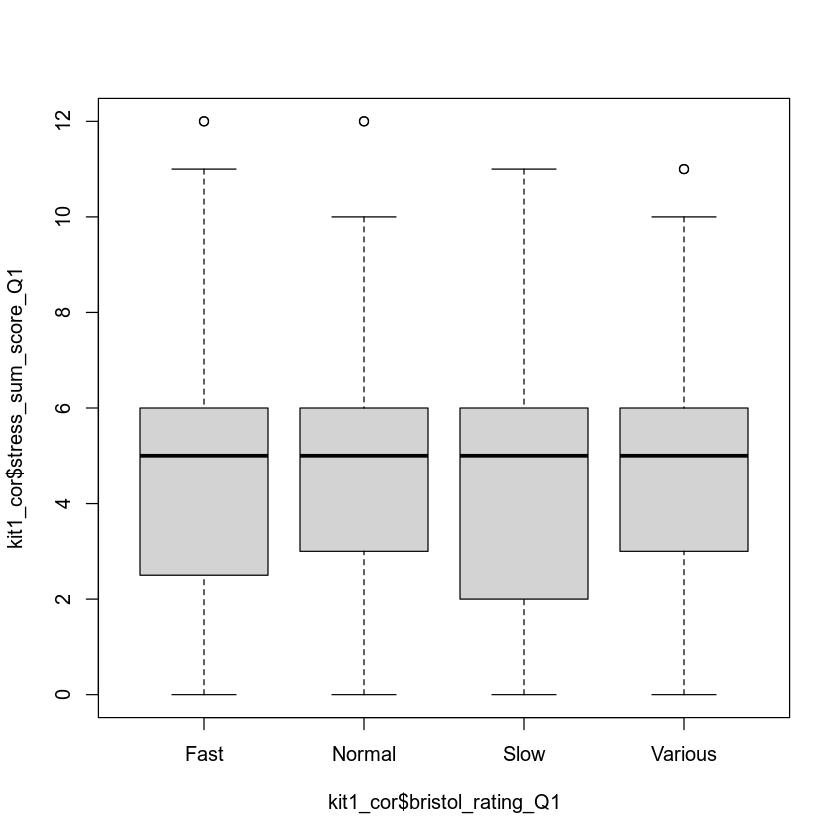

In [39]:
#bristol rating - stress 
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$bristol_rating_Q1=="Normal")],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$bristol_rating_Q1=="Fast")])
#pdf("boxplot.pdf")
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$bristol_rating_Q1)
#dev.off()

# Here below there were several categories in addition to Normal, so I tested each independently;
# Only bristol rating as fast was sig. diff.




	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1 == "Normal")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1 == "Fast")]
t = -2.0215, df = 279.29, p-value = 0.04418
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.51540666 -0.02014723
sample estimates:
mean of x mean of y 
 4.968750  5.736527 



	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1 == "Normal")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1 == "Slow")]
t = -0.78652, df = 270.79, p-value = 0.4322
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0290418  0.4415418
sample estimates:
mean of x mean of y 
  4.96875   5.26250 



	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1 == "Normal")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1 == "Various")]
t = -1.6969, df = 265.61, p-value = 0.09089
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.4562870  0.1080727
sample estimates:
mean of x mean of y 
 4.968750  5.642857 


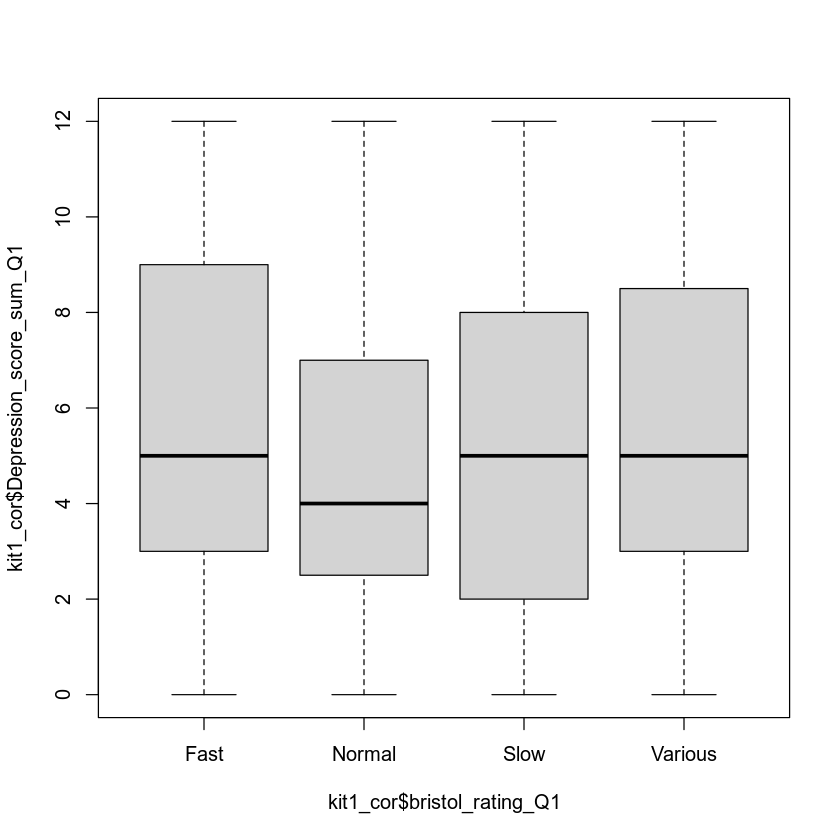

In [109]:
#bristol rating - depression
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1=="Normal")],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1=="Fast")])
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1=="Normal")],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1=="Slow")])
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1=="Normal")],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$bristol_rating_Q1=="Various")])

boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$bristol_rating_Q1)

### The empty one is just missing data, I think n = 1, so ignore it for this analysis


# Just an example with the two possible syntaxes for t-tests on binary variables! 
## You see they do work the same :D
## But for multiple factors as above, you need to specify the groups


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Nej")]
t = 0.36915, df = 289.11, p-value = 0.7123
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3819565  0.5583118
sample estimates:
mean of x mean of y 
 4.736196  4.648019 


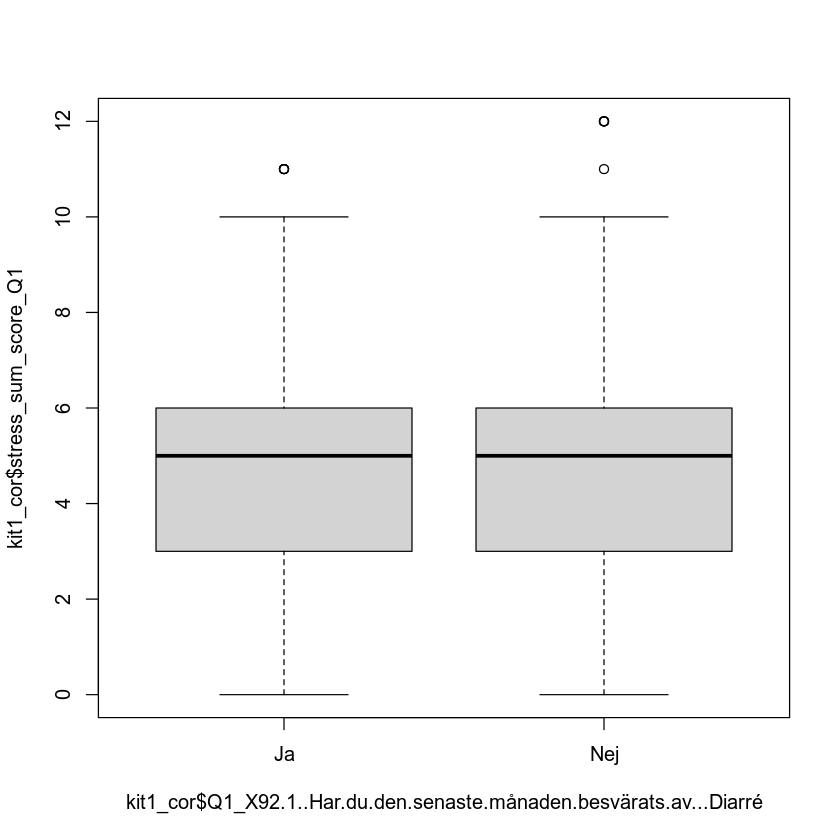

In [138]:
# diarrhea- stress 

boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
#t.test(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
#na.action = "na.rm"
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Nej" )], na.action = "na.rm" )


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Nej")]
t = 2.3996, df = 274.47, p-value = 0.01708
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1325299 1.3433521
sample estimates:
mean of x mean of y 
 5.957055  5.219114 



 Ja Nej 
163 429 

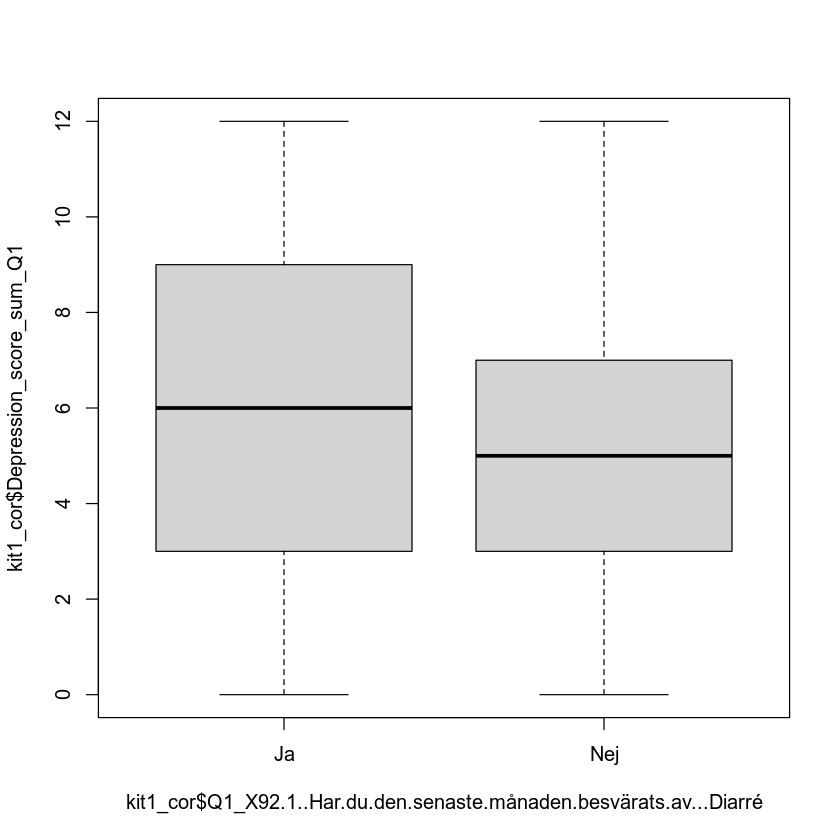

In [91]:
# diarrhea - depression

boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
#na.action = "na.rm"
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Nej")], na.action = "na.rm" )
table(kit1_cor$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)

In [123]:
#sum(is.na(kit1_cor$`Q1_X92.1..Har.du.den.senaste.mänaden.besvärats.av...Diarrä`))


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$smoke_kit1_binary == 0)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$smoke_kit1_binary == 1)]
t = -0.00601, df = 33.888, p-value = 0.9952
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.052429  1.046224
sample estimates:
mean of x mean of y 
 4.684397  4.687500 


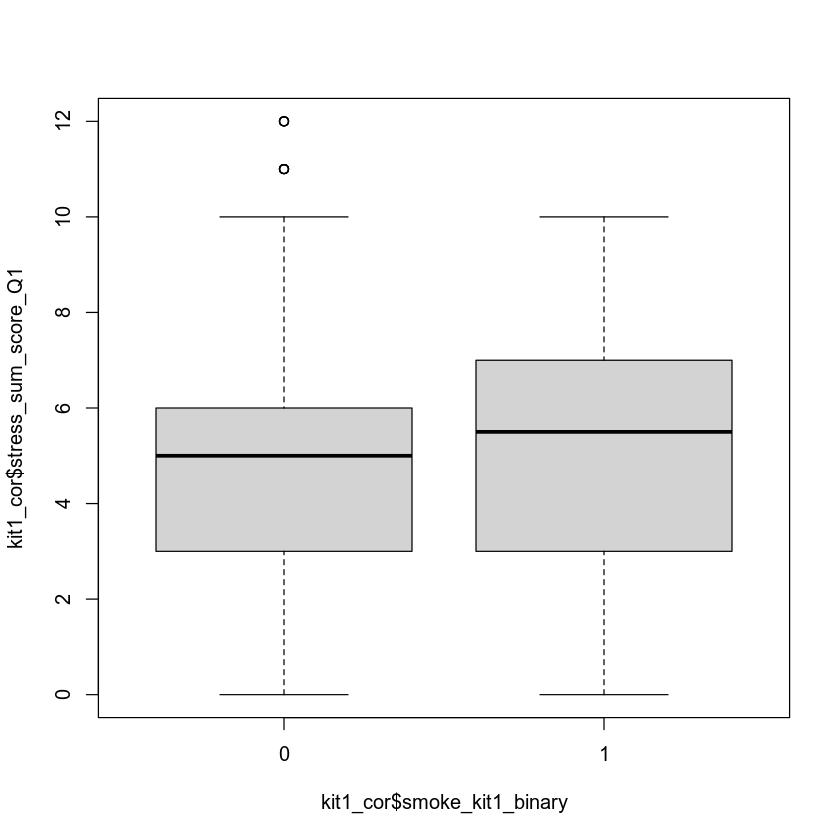

In [42]:
#smoking , convert into binary , either smoker as 1 or non-smoker as 0: 
# stress- smoking_binary
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$smoke_kit1_binary , na.action = NULL )

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$smoke_kit1_binary == 0 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$smoke_kit1_binary == 1 )], na.action = "na.rm")



	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$smoke_kit1_binary == 0)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$smoke_kit1_binary == 1)]
t = -1.1706, df = 35.272, p-value = 0.2496
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.7528227  0.4704645
sample estimates:
mean of x mean of y 
 5.390071  6.031250 


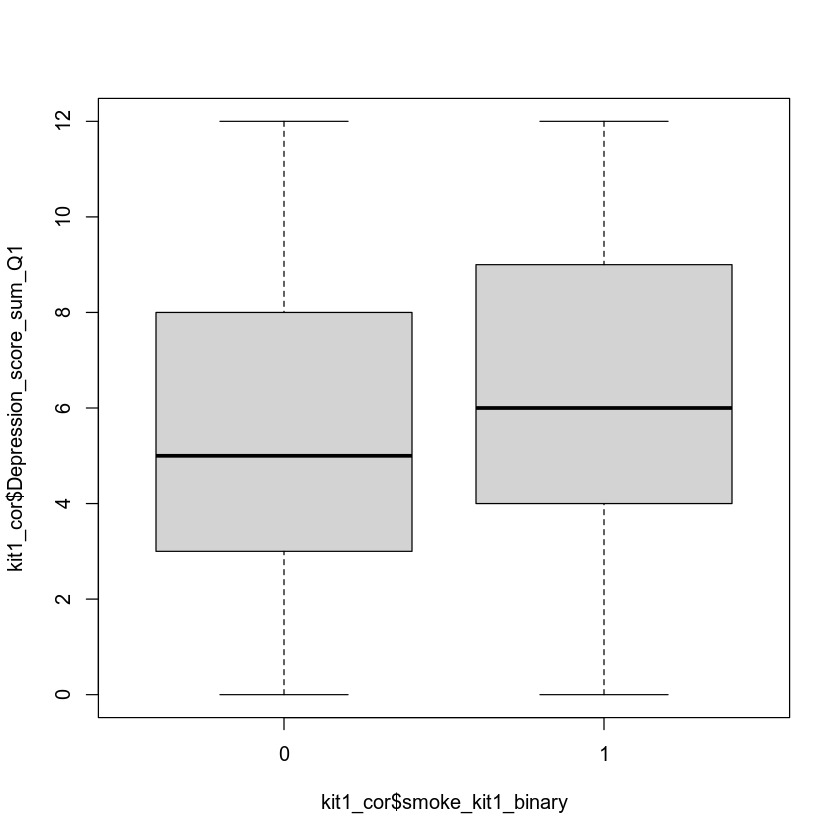

In [43]:
#smoking , convert into binary , either smoker as 1 or non-smoker as 0: 
# depression - smoking_binary
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$smoke_kit1_binary , na.action = NULL )

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$smoke_kit1_binary == 0 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$smoke_kit1_binary == 1 )], na.action = "na.rm")


In [13]:
table(kit1_cor$Q1_Smoking_checked)


                       0               Feströkare Nej, jag har aldrig rökt 
                       1                       31                      419 
                Röker nu            Rökt tidigare 
                       1                      144 


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_Smoking_checked == "Nej, jag har aldrig rökt")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_Smoking_checked == "Feströkare")]
t = -0.15083, df = 33.551, p-value = 0.881
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1538593  0.9944937
sample estimates:
mean of x mean of y 
 4.694511  4.774194 


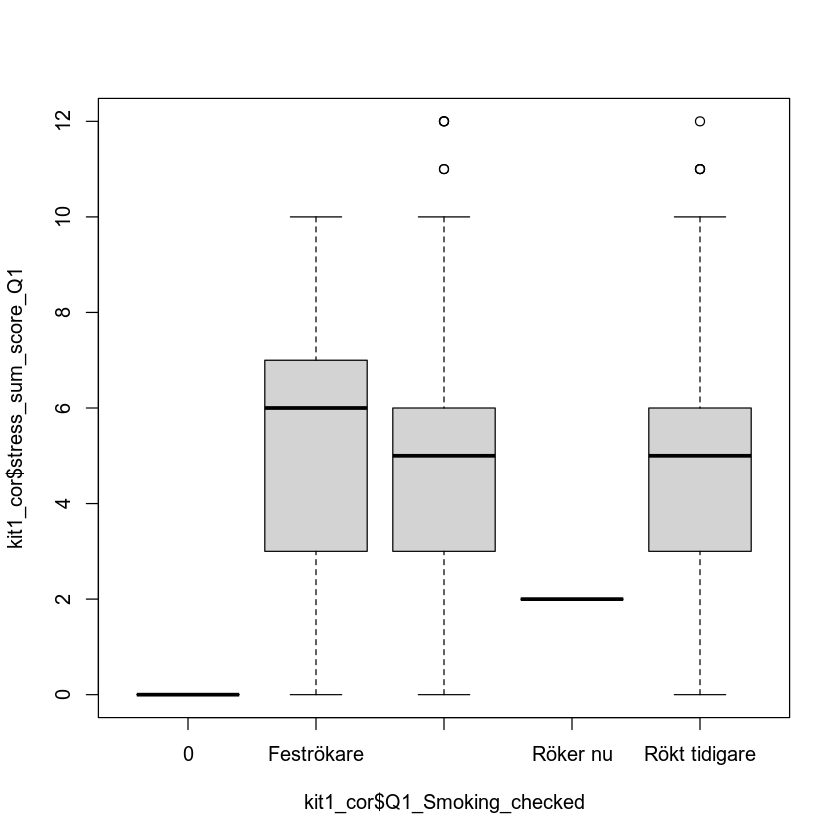

In [44]:
# stress_ smoke
# smoking according to questionnaire: 
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_Smoking_checked , na.action = NULL )

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_Smoking_checked == "Nej, jag har aldrig rökt" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_Smoking_checked == "Feströkare" )], na.action = "na.rm")

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X54_Smoking )

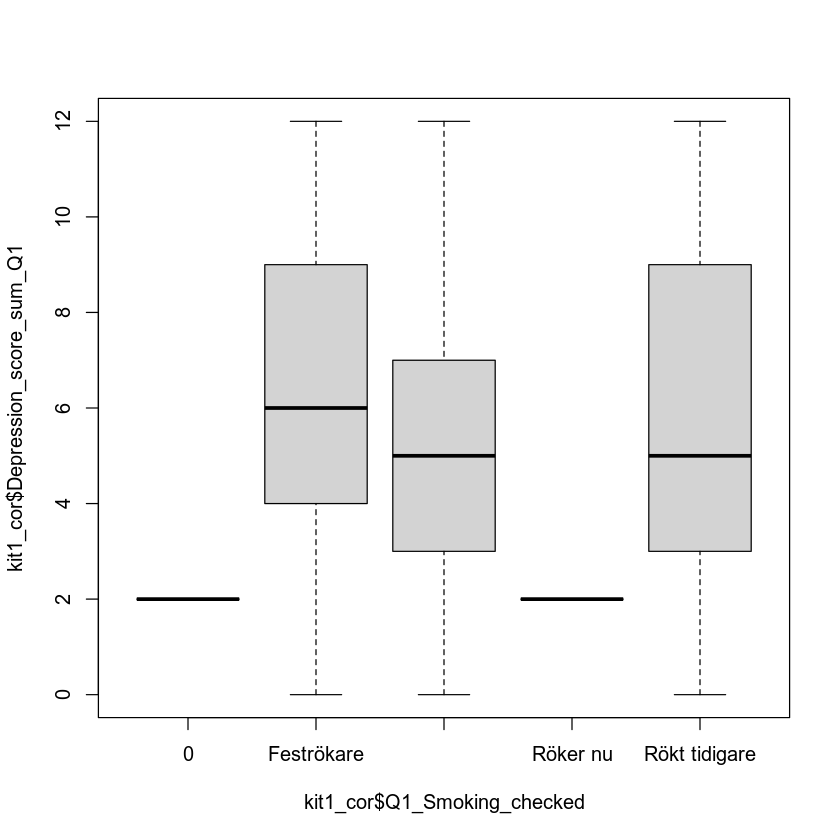

In [45]:
# depression _ smoke
# smoking according to questionnaire: 
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_Smoking_checked , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X54_Smoking )


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Primipara == 0)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Primipara == 1)]
t = 1.0845, df = 576.15, p-value = 0.2786
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1858662  0.6442294
sample estimates:
mean of x mean of y 
 4.787234  4.558052 


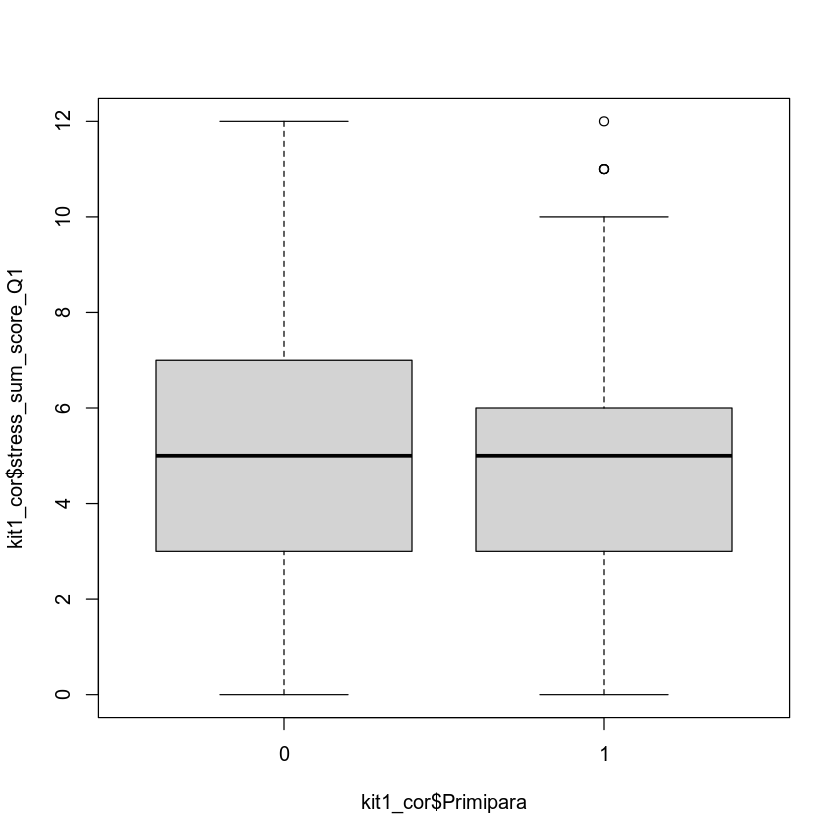

In [46]:
#primipara_stress
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Primipara , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Primipara, na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Primipara == 0 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Primipara == 1 )], na.action = "na.rm")


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Primipara == 0)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Primipara == 1)]
t = 0.54067, df = 564.66, p-value = 0.5889
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3812152  0.6708000
sample estimates:
mean of x mean of y 
 5.489362  5.344569 


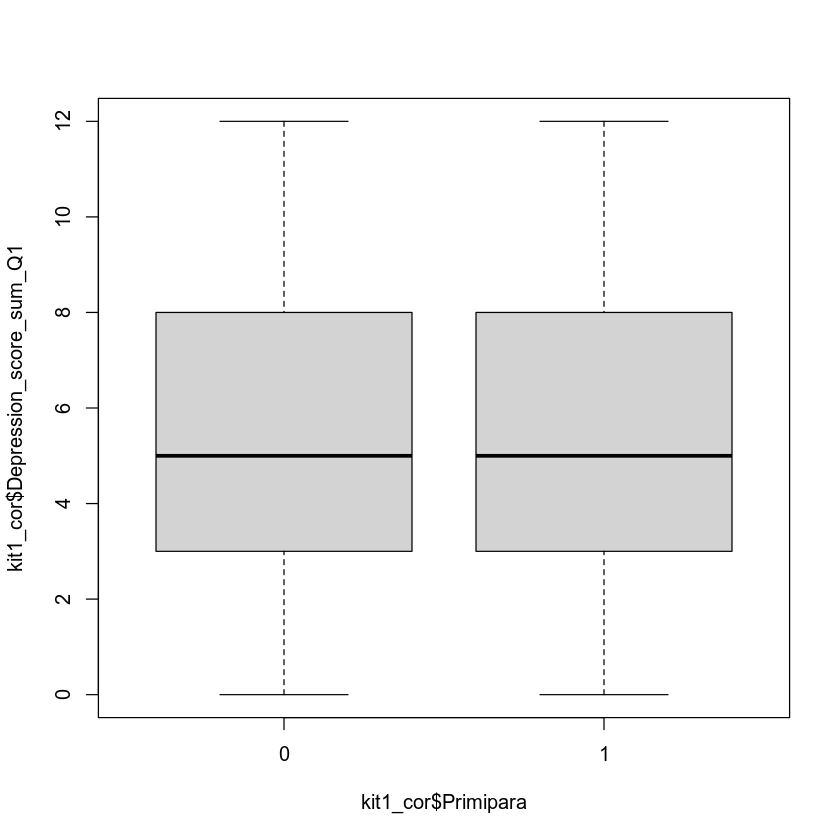

In [47]:
#primipara_ depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Primipara , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Primipara, na.action = "na.rm")

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Primipara == 0 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Primipara == 1 )], na.action = "na.rm")


  0   1 
569  27 

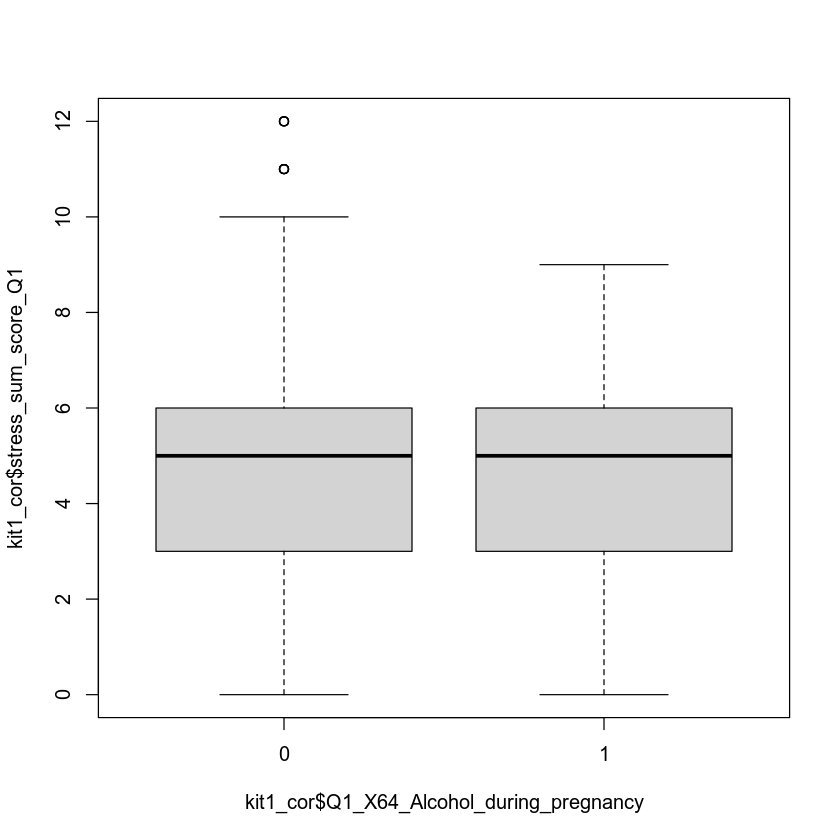

In [48]:

#alcohol_STRESS
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X64_Alcohol_during_pregnancy , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 ,kit1_cor$Q1_X64_Alcohol_during_pregnancy , na.action = "na.rm")

table(kit1_cor$Q1_X64_Alcohol_during_pregnancy)


  0   1 
569  27 


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X64_Alcohol_during_pregnancy == 0)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X64_Alcohol_during_pregnancy == 1)]
t = 0.35126, df = 30.558, p-value = 0.7278
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8324427  1.1785990
sample estimates:
mean of x mean of y 
 5.432337  5.259259 


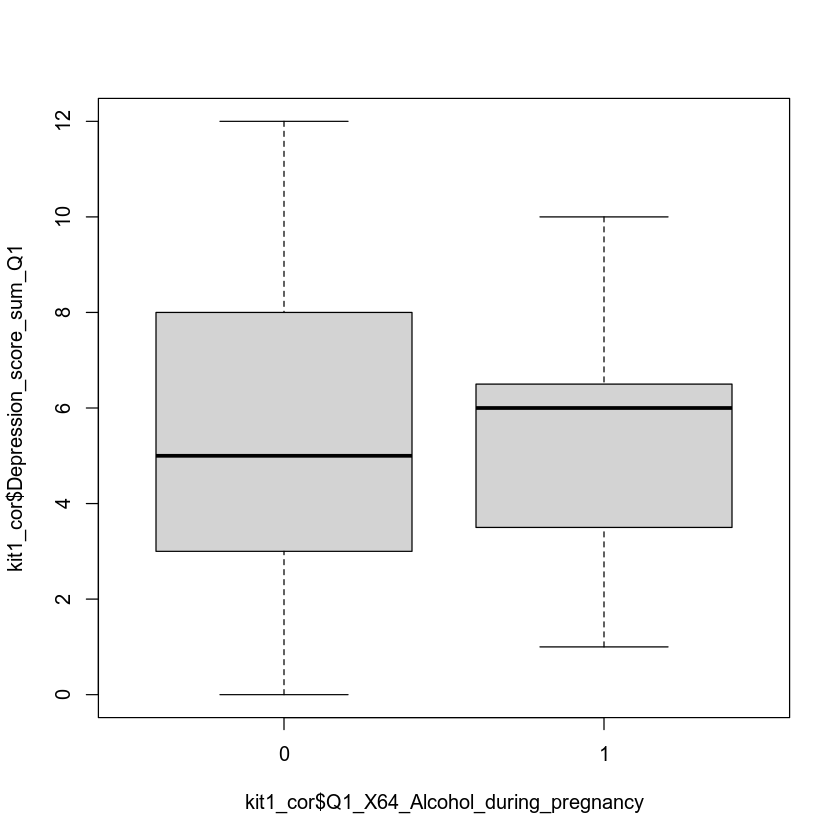

In [49]:

#alcohol_depression ( 0-1 data)
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X64_Alcohol_during_pregnancy , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 ,kit1_cor$Q1_X64_Alcohol_during_pregnancy , na.action = "na.rm")

table(kit1_cor$Q1_X64_Alcohol_during_pregnancy)
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X64_Alcohol_during_pregnancy == 0 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X64_Alcohol_during_pregnancy == 1 )], na.action = "na.rm")


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_during_gi_medication == 0)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_during_gi_medication == 1)]
t = -3.9293, df = 4.6698, p-value = 0.01267
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.5496915 -0.5068229
sample estimates:
mean of x mean of y 
 4.671743  6.200000 


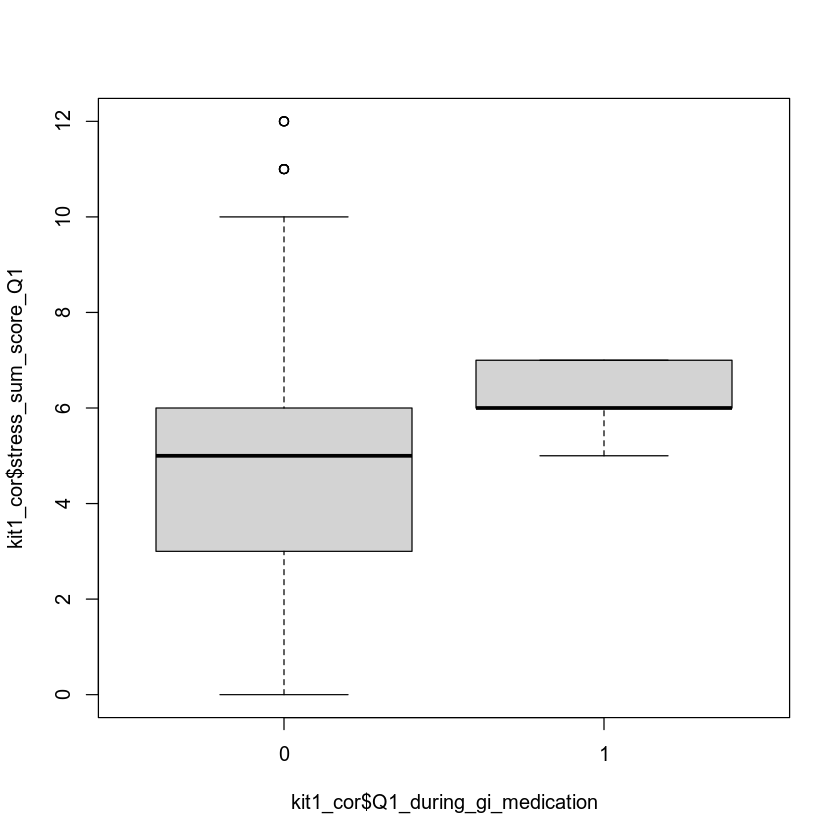

In [50]:

#gi-medication- stress
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_during_gi_medication , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_during_gi_medication , na.action = "na.rm")
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_during_gi_medication == 0 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_during_gi_medication == 1 )], na.action = "na.rm")


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_during_gi_medication == 0)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_during_gi_medication == 1)]
t = -2.833, df = 4.1133, p-value = 0.0457
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.30695537 -0.09778236
sample estimates:
mean of x mean of y 
 5.397631  8.600000 


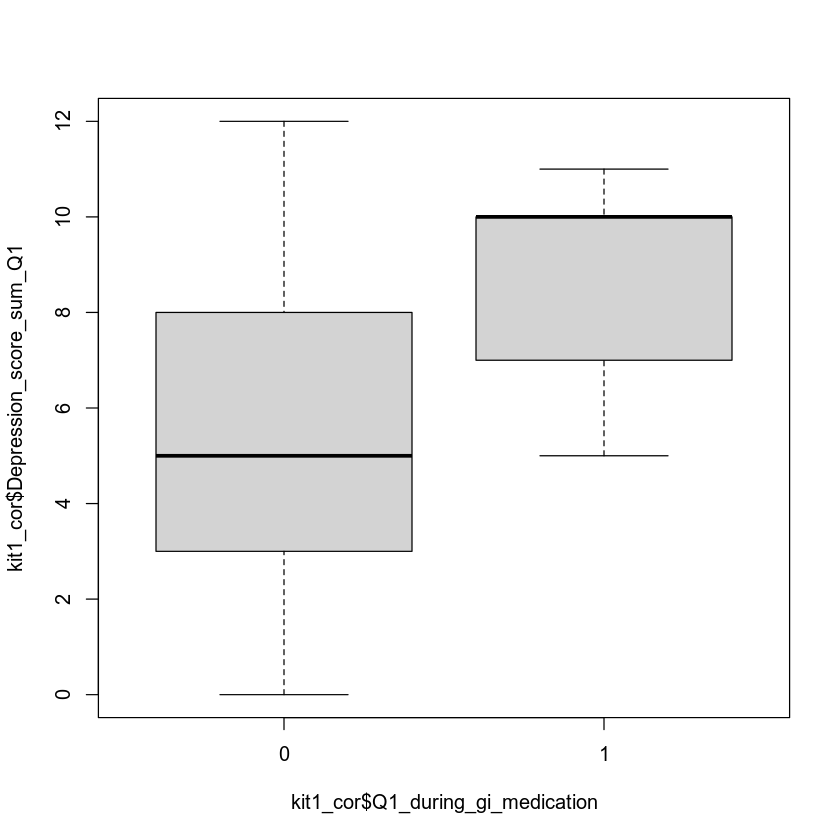

In [51]:

#gi-medication- depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_during_gi_medication , na.action = NULL )

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_during_gi_medication , na.action = "na.rm")
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_during_gi_medication == 0 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_during_gi_medication == 1 )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "Nej")]
t = -1.052, df = 36.127, p-value = 0.2998
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8416710  0.5835256
sample estimates:
mean of x mean of y 
 4.894737  5.523810 



  0  Ja Nej 
514  19  63 

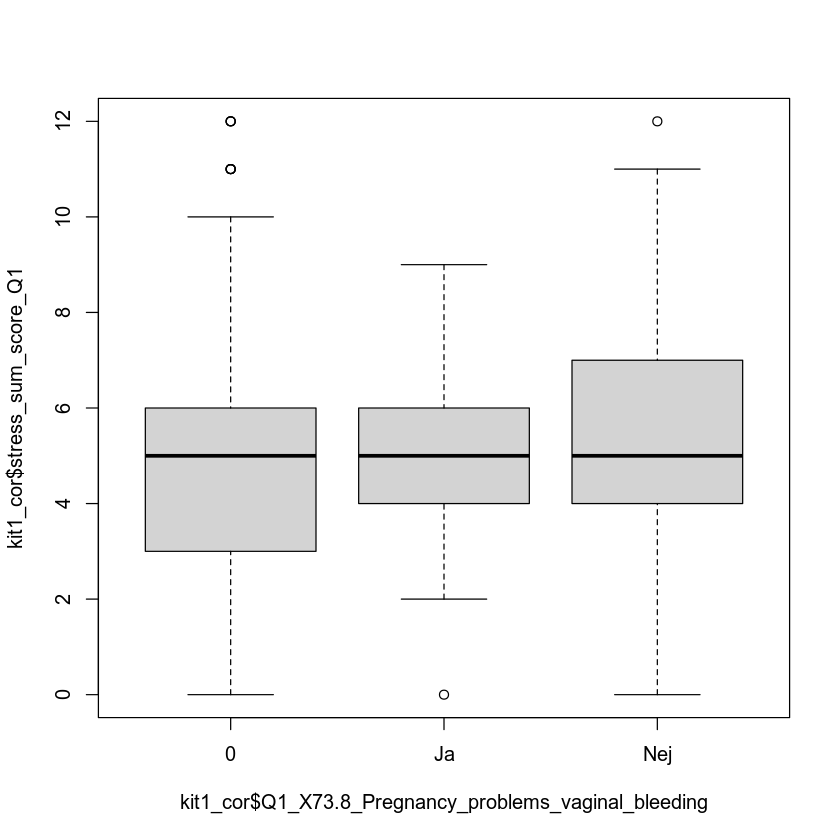

In [41]:

#vaginal bleeding - stress
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding , na.action = NULL )
sum(is.na(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding))
#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding , na.action = "na.rm")
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding== "Nej" )], na.action = "na.rm")
table(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleedin)

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "Nej")]
t = -1.8255, df = 34.693, p-value = 0.07654
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.0530285  0.1624687
sample estimates:
mean of x mean of y 
 5.157895  6.603175 



  0  Ja Nej 
514  19  63 

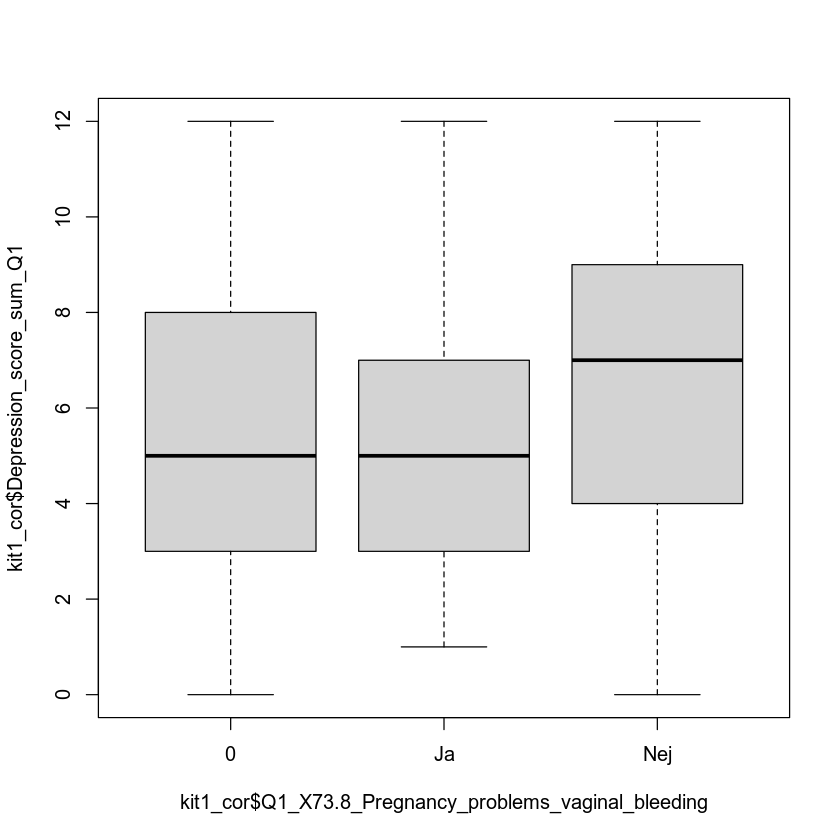

In [56]:
### what should i do here ??????
#vaginal bleeding - depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding , na.action = NULL )
sum(is.na(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding))
#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding , na.action = "na.rm")
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "Ja")],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding== "Nej" )], na.action = "na.rm")
table(kit1_cor$Q1_X73.8_Pregnancy_problems_vaginal_bleeding)

In [138]:
kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis[kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == 99 ] <- NA

[1] 0


       0       Ja      Nej Vet inte 
     513       13       64        6 


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Nej")]
t = 2.9183, df = 21.476, p-value = 0.008092
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5316615 3.1558385
sample estimates:
mean of x mean of y 
  7.00000   5.15625 



	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "0")]
t = 4.393, df = 13.062, p-value = 0.000719
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.238951 3.634343
sample estimates:
mean of x mean of y 
 7.000000  4.563353 



       0       Ja      Nej Vet inte 
     513       13       64        6 

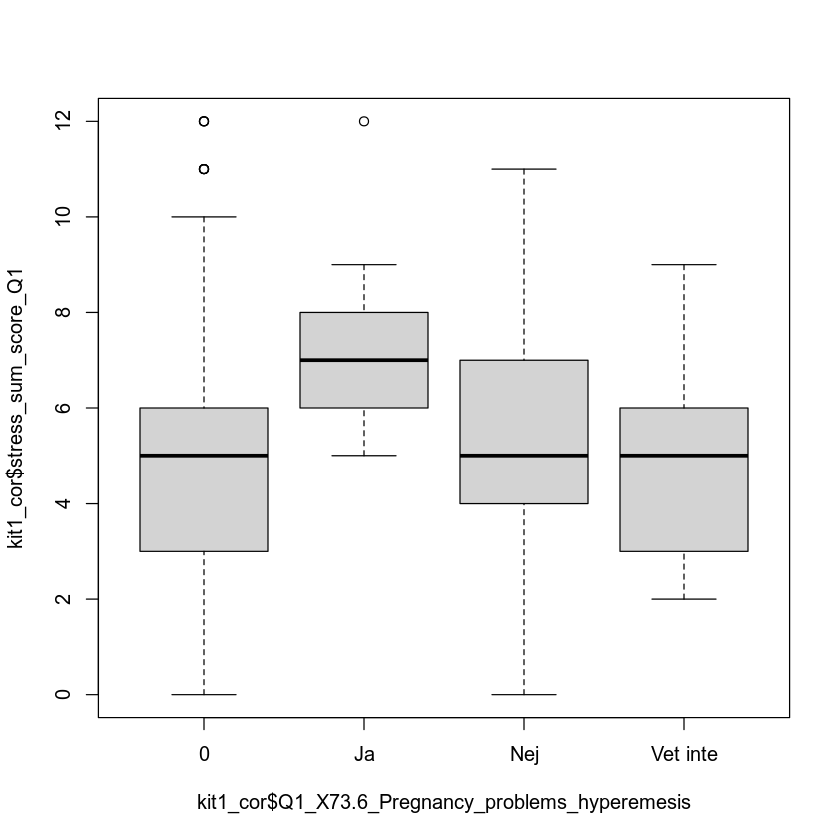

In [42]:
#hyperemisis- stress
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis, na.action = NULL )

sum(is.na(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis))
table(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis)
#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis , na.action = "na.rm")
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Nej" )], na.action = "na.rm")
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "0" )], na.action = "na.rm")
table(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis)

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Nej")]
t = 1.5755, df = 21.039, p-value = 0.1301
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4335949  3.1451333
sample estimates:
mean of x mean of y 
 7.230769  5.875000 



       0       Ja      Nej Vet inte 
     513       13       64        6 

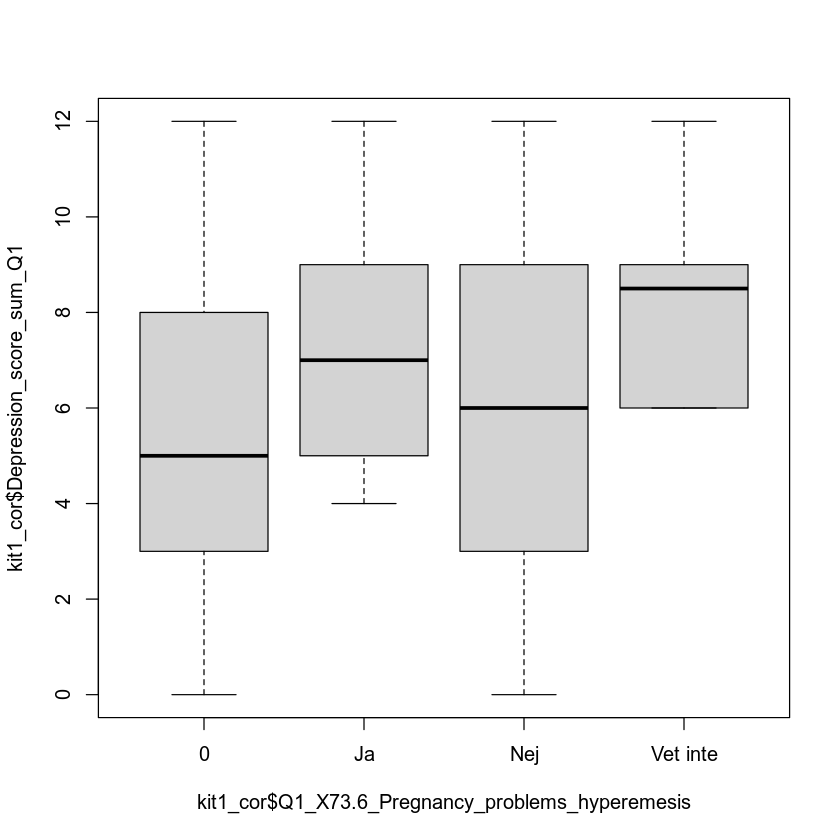

In [43]:
#hyperemisis- Depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis, na.action = NULL )

sum(is.na(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis , na.action = "na.rm")
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis == "Nej" )], na.action = "na.rm")
table(kit1_cor$Q1_X73.6_Pregnancy_problems_hyperemesis)

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X19_Natural_conception == 0)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X19_Natural_conception == 1)]
t = -0.27767, df = 106.86, p-value = 0.7818
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7601288  0.5733527
sample estimates:
mean of x mean of y 
 4.604651  4.698039 


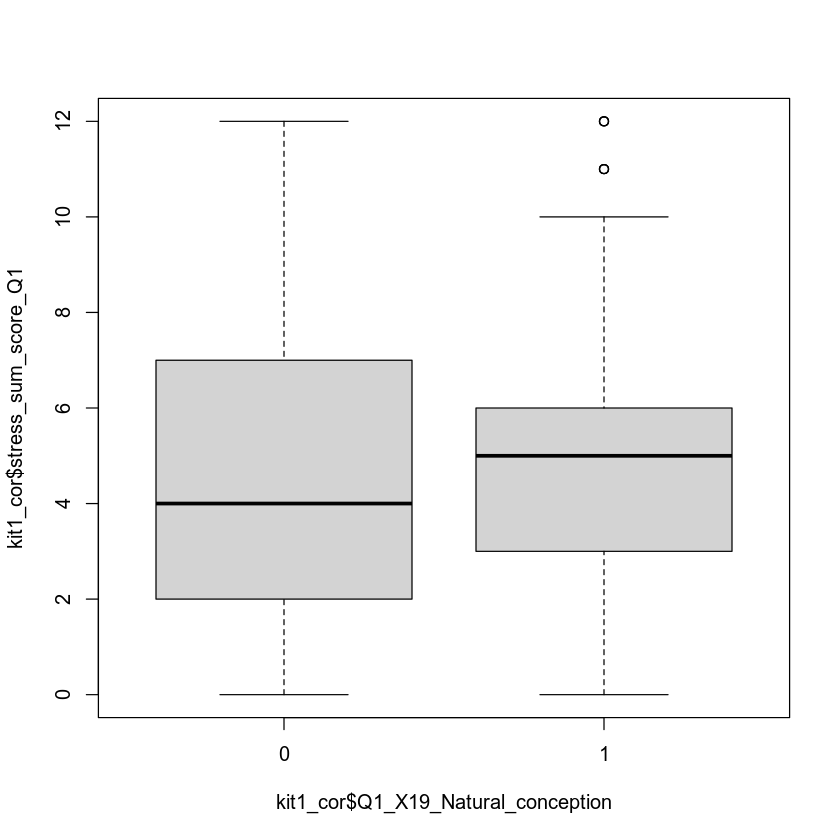

In [63]:
#Natural_conception) - stress

boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X19_Natural_conception, na.action = NULL )

sum(is.na(kit1_cor$Q1_X19_Natural_conception))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X19_Natural_conception , na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X19_Natural_conception == 0 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X19_Natural_conception == 1 )], na.action = "na.rm")




[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X19_Natural_conception == 0)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X19_Natural_conception == 1)]
t = -1.2354, df = 117.89, p-value = 0.2192
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1851814  0.2745567
sample estimates:
mean of x mean of y 
 5.034884  5.490196 


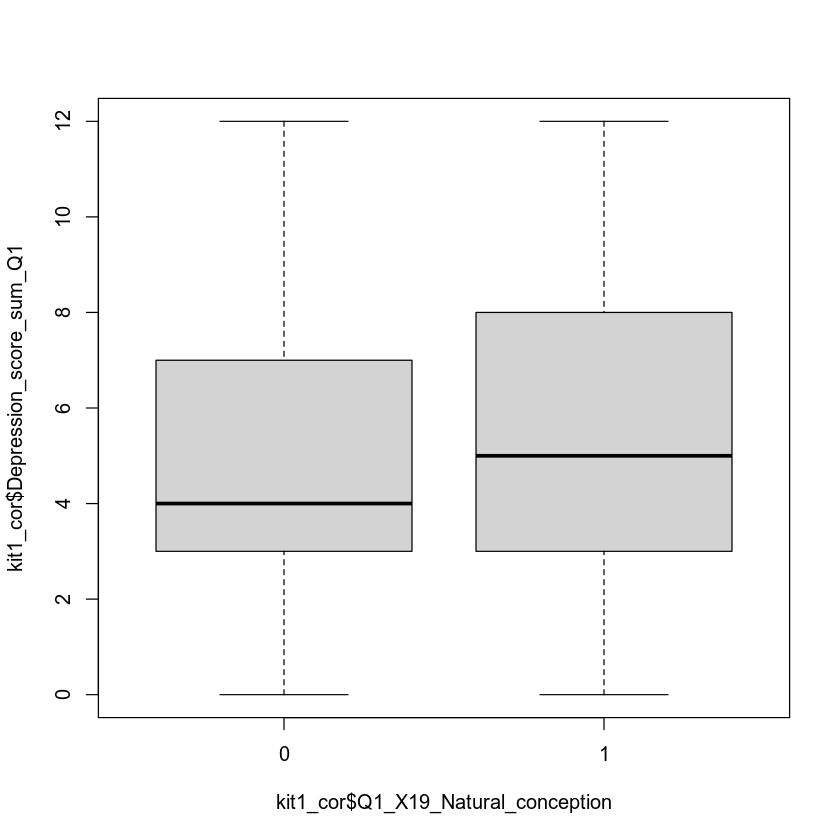

In [64]:
#Natural_conception) - depression

boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X19_Natural_conception, na.action = NULL )

sum(is.na(kit1_cor$Q1_X19_Natural_conception))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X19_Natural_conception , na.action = "na.rm")

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X19_Natural_conception == 0 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X19_Natural_conception == 1 )], na.action = "na.rm")




[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 1)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 2)]
t = 1.256, df = 51.392, p-value = 0.2148
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.393318  1.708605
sample estimates:
mean of x mean of y 
 5.250000  4.592357 



	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 1)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 3)]
t = 1.1601, df = 44.695, p-value = 0.2522
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4314214  1.6031006
sample estimates:
mean of x mean of y 
  5.25000   4.66416 



	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 2)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 3)]
t = -0.31229, df = 309.65, p-value = 0.755
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5242170  0.3806095
sample estimates:
mean of x mean of y 
 4.592357  4.664160 


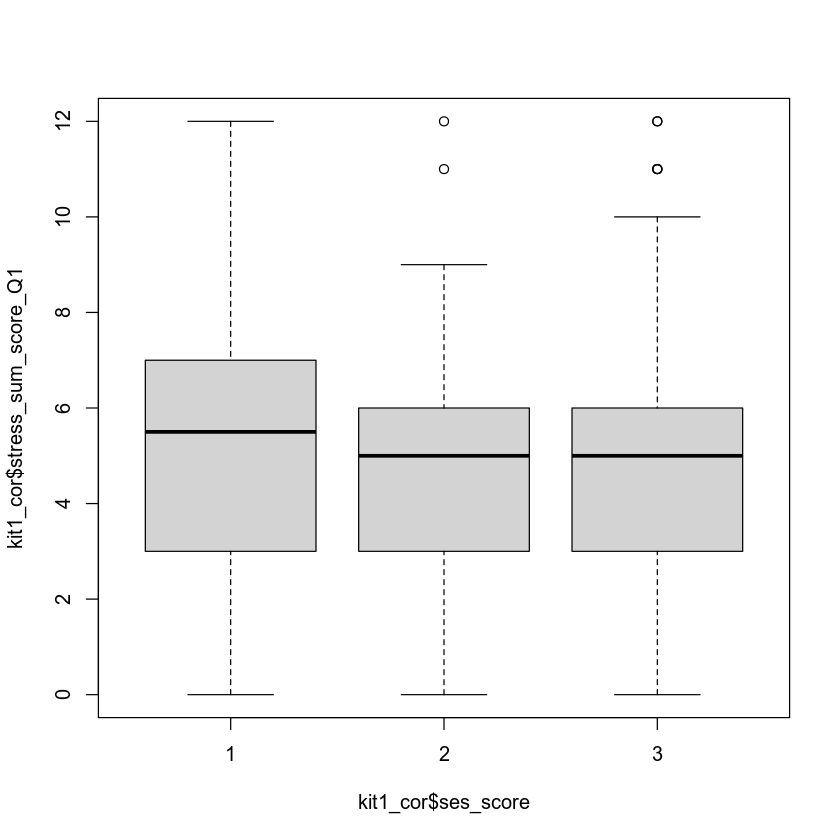

In [65]:

#ses_score - stress 
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$ses_score, na.action = NULL )

sum(is.na(kit1_cor$ses_score))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$ses_score, na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 1 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 2 )], na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 1 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 3 )], na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 2 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$ses_score == 3 )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 1)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 2)]
t = 1.4708, df = 55.777, p-value = 0.147
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3350125  2.1853309
sample estimates:
mean of x mean of y 
 6.250000  5.324841 



	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 1)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 3)]
t = 1.4588, df = 45.308, p-value = 0.1515
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3305942  2.0686895
sample estimates:
mean of x mean of y 
 6.250000  5.380952 



	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 2)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 3)]
t = -0.18477, df = 283.47, p-value = 0.8535
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6538578  0.5416345
sample estimates:
mean of x mean of y 
 5.324841  5.380952 


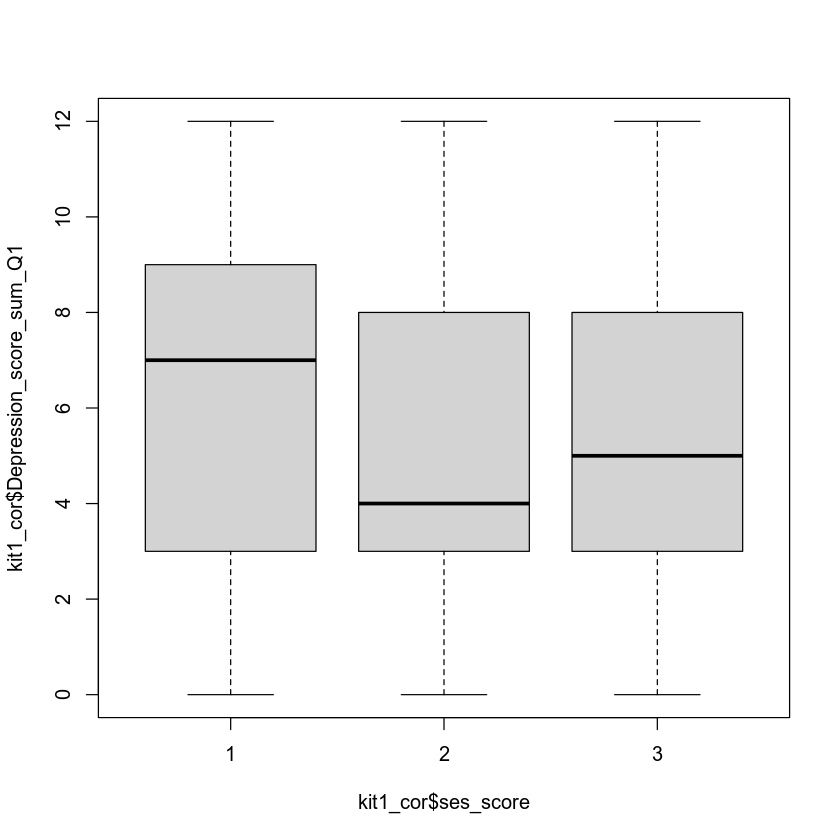

In [66]:

#ses_score - depression

boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$ses_score, na.action = NULL )

sum(is.na(kit1_cor$ses_score))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$ses_score, na.action = "na.rm")

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 1 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 2 )], na.action = "na.rm")

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 1 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 3 )], na.action = "na.rm")

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 2 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$ses_score == 3 )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Nej")]
t = 1.4351, df = 30.69, p-value = 0.1614
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3079847  1.7685454
sample estimates:
mean of x mean of y 
  5.37931   4.64903 


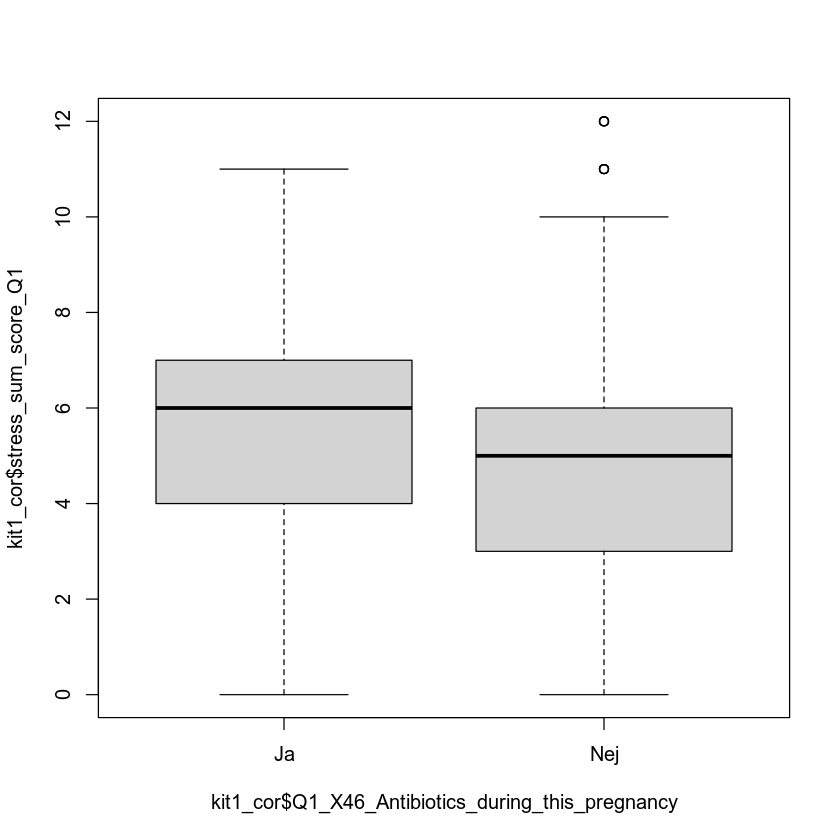

In [67]:

#Q1_X46_Antibiotics_during_this_pregnancy - stress
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy, na.action = NULL )

sum(is.na(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy, na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Nej")]
t = 1.1826, df = 30.03, p-value = 0.2462
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6240686  2.3413951
sample estimates:
mean of x mean of y 
 6.241379  5.382716 


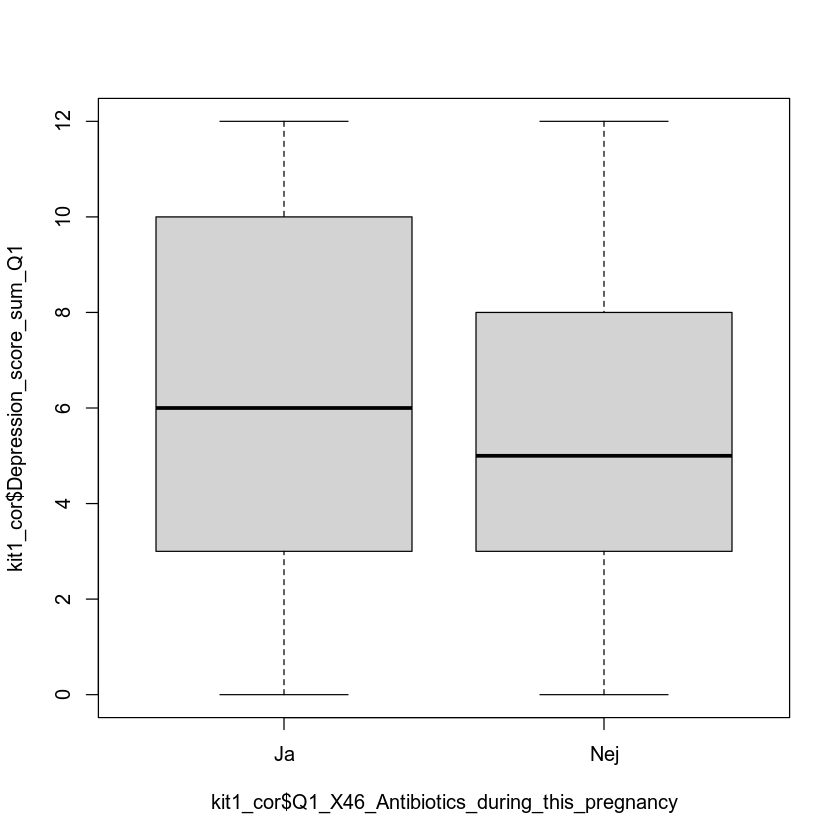

In [68]:

#Q1_X46_Antibiotics_during_this_pregnancy _ depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy, na.action = NULL )

sum(is.na(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy))



t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X46_Antibiotics_during_this_pregnancy == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_dailyfiber == 0)] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_dailyfiber == 1)]
t = 2.3227, df = 117.06, p-value = 0.02192
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1036465 1.3031180
sample estimates:
mean of x mean of y 
 5.284091  4.580709 


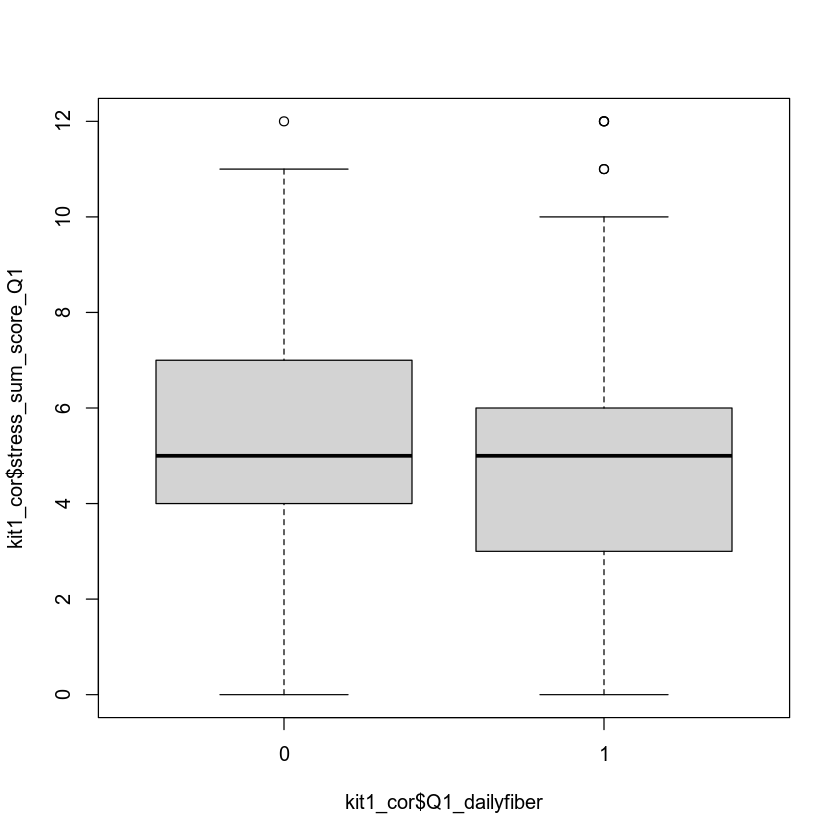

In [69]:
 
#Q1_dailyfiber - stress 
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_dailyfiber, na.action = NULL )

sum(is.na(kit1_cor$Q1_dailyfiber))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_dailyfiber, na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_dailyfiber == 0 )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_dailyfiber == 1 )], na.action = "na.rm" )


#####????
# with conf. level of 0.90 , it could be correlated.

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_dailyfiber == 0)] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_dailyfiber == 1)]
t = 2.5231, df = 121.92, p-value = 0.01292
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1971382 1.6332126
sample estimates:
mean of x mean of y 
 6.204545  5.289370 


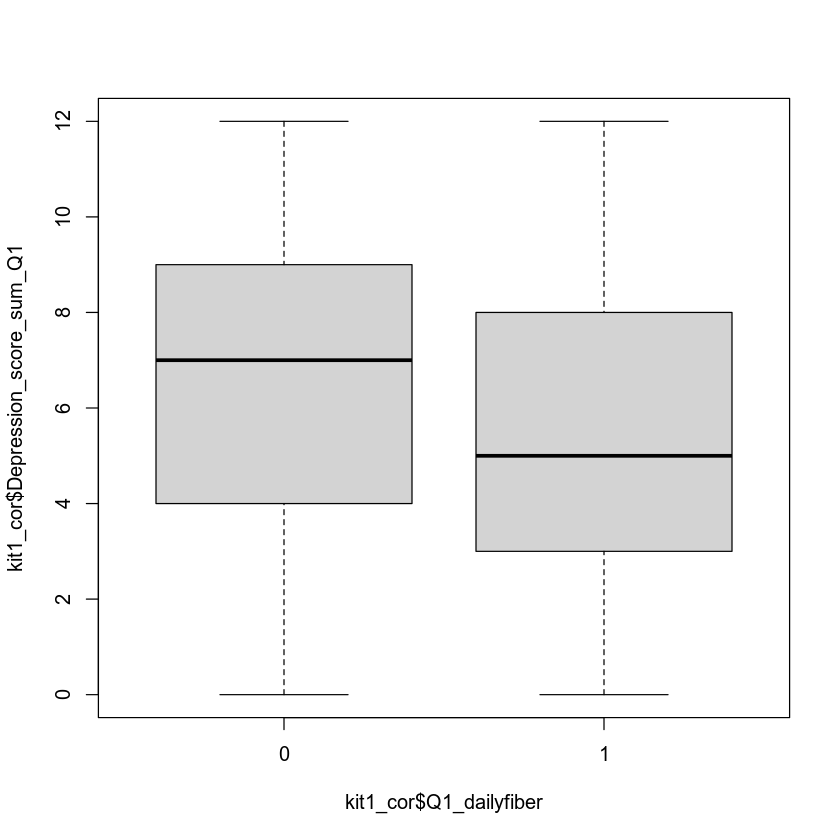

In [70]:
 
#Q1_dailyfiber - depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_dailyfiber, na.action = NULL )

sum(is.na(kit1_cor$Q1_dailyfiber))

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_dailyfiber == 0 )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_dailyfiber == 1 )], na.action = "na.rm" )


#####????


[1] 2


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Nej")]
t = 0.25326, df = 119.23, p-value = 0.8005
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4984916  0.6447102
sample estimates:
mean of x mean of y 
 4.732558  4.659449 


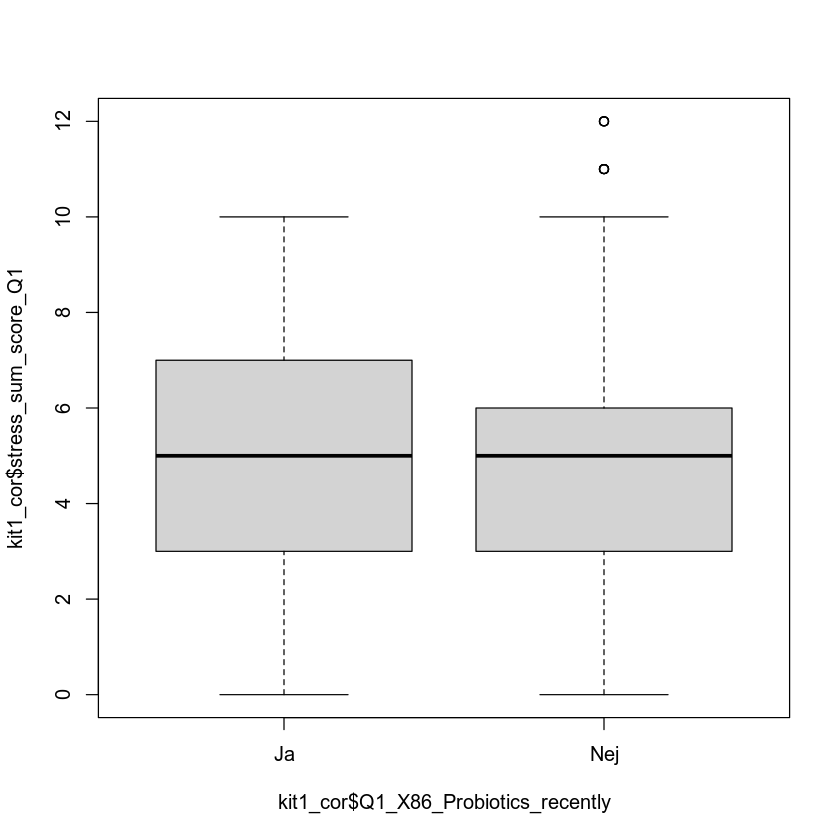

In [72]:

#probiotic - stress
boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X86_Probiotics_recently, na.action = NULL )

sum(is.na(kit1_cor$Q1_X86_Probiotics_recently))

#t.test( kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X86_Probiotics_recently, na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Nej" )], na.action = "na.rm")


[1] 2


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Nej")]
t = 0.24891, df = 127.03, p-value = 0.8038
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5895511  0.7592087
sample estimates:
mean of x mean of y 
 5.488372  5.403543 


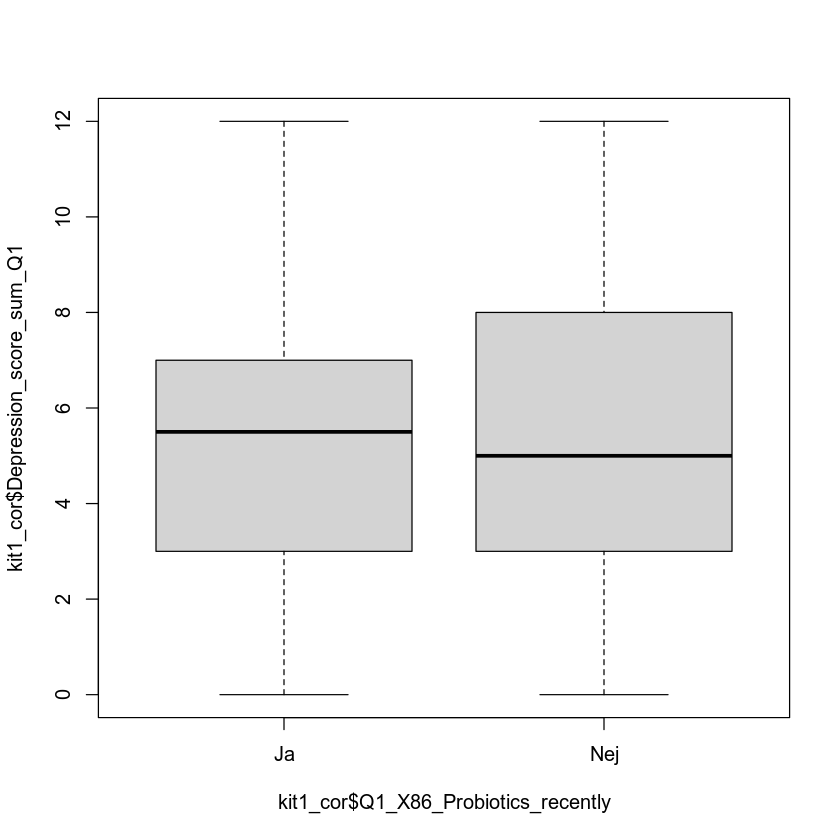

In [74]:

#probiotic _ depression
boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X86_Probiotics_recently, na.action = NULL )

sum(is.na(kit1_cor$Q1_X86_Probiotics_recently))


t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X86_Probiotics_recently == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Nej")]
t = -1.9319, df = 383.41, p-value = 0.0541
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.86581362  0.00760476
sample estimates:
mean of x mean of y 
 4.391534  4.820639 


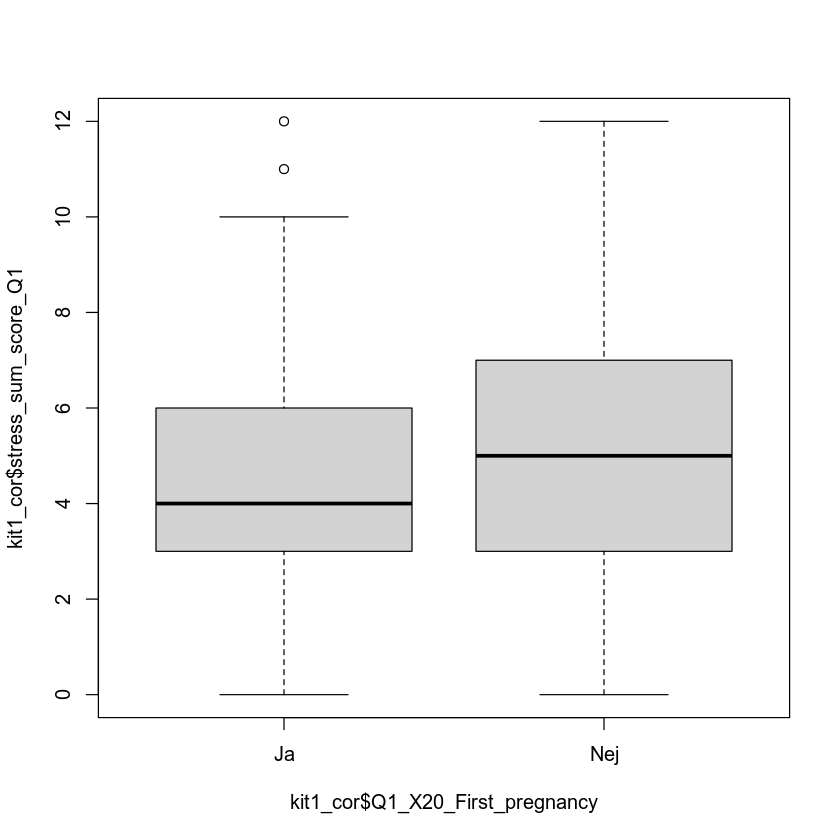

In [40]:

#first pregnancy - stress:

boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X20_First_pregnancy, na.action = NULL )

sum(is.na(kit1_cor$Q1_X20_First_pregnancy))

#t.test(kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X20_First_pregnancy , na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Nej")]
t = -2.1499, df = 387.72, p-value = 0.03218
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.14559172 -0.05116348
sample estimates:
mean of x mean of y 
 5.015873  5.614251 


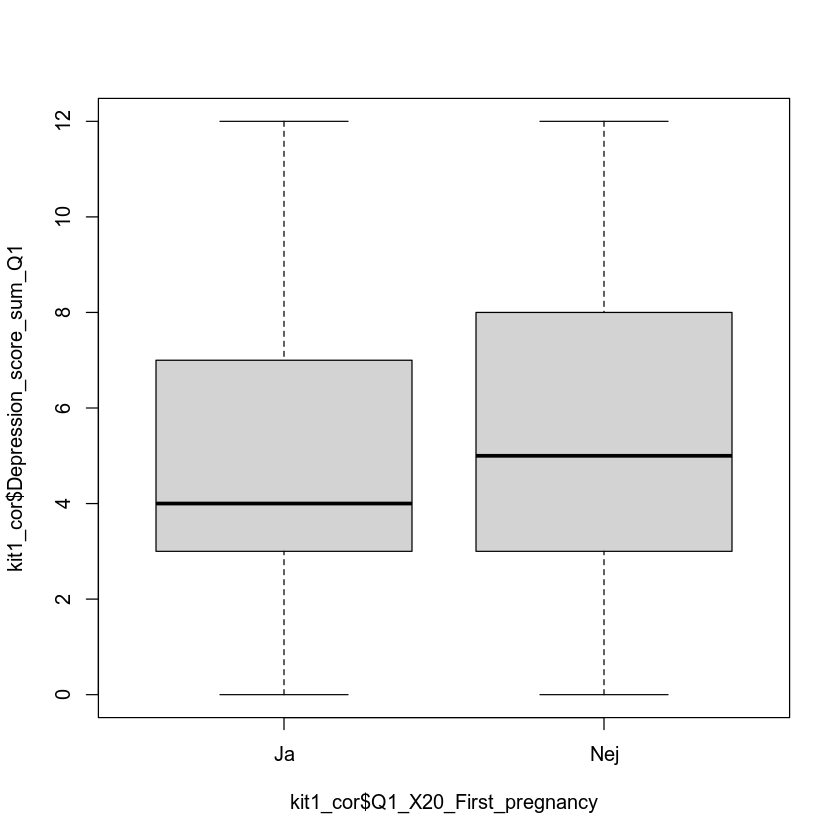

In [77]:

#first pregnancy - depression :

boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X20_First_pregnancy, na.action = NULL )

sum(is.na(kit1_cor$Q1_X20_First_pregnancy))

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X20_First_pregnancy == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Nej")]
t = -1.1109, df = 46.396, p-value = 0.2723
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1969204  0.3454605
sample estimates:
mean of x mean of y 
  4.27500   4.70073 



	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja")] and kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Vet inte")]
t = -1.3571, df = 9.3362, p-value = 0.2066
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.5879699  0.8879699
sample estimates:
mean of x mean of y 
    4.275     5.625 


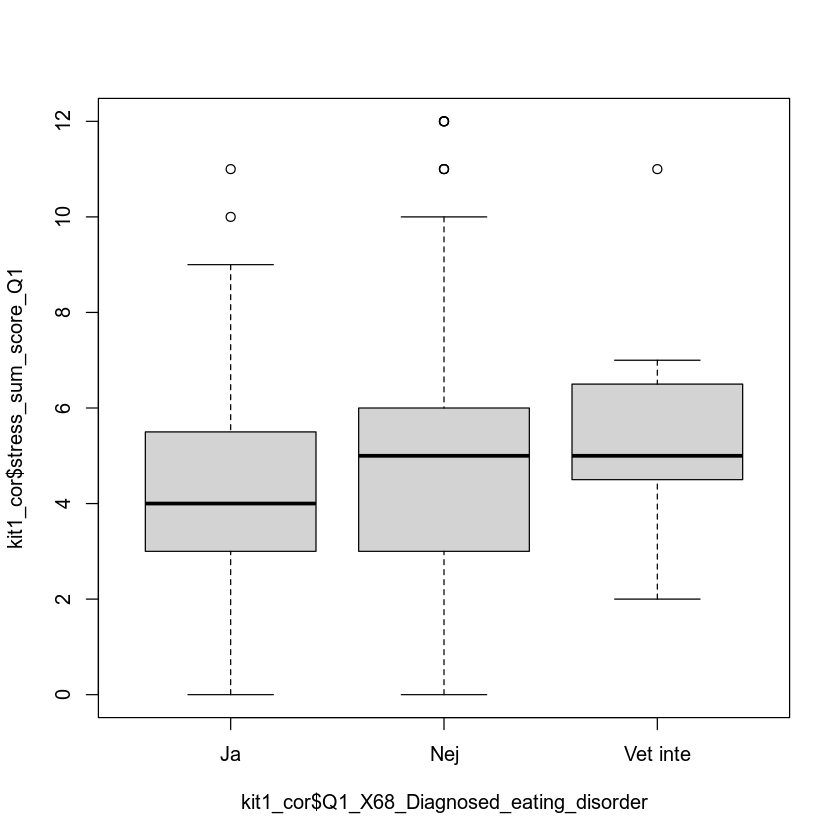

In [2]:
 
#eating disorder- stress

boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$Q1_X68_Diagnosed_eating_disorder, na.action = NULL )

sum(is.na(kit1_cor$Q1_X68_Diagnosed_eating_disorder))

#t.test(kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X68_Diagnosed_eating_disorder , na.action = "na.rm")

t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Nej" )], na.action = "na.rm")
t.test(kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja" )],
       kit1_cor$stress_sum_score_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Vet inte" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Nej")]
t = 0.45164, df = 47.532, p-value = 0.6536
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7063523  1.1154764
sample estimates:
mean of x mean of y 
 5.575000  5.370438 



	Welch Two Sample t-test

data:  kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja")] and kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Vet inte")]
t = -2.1812, df = 8.866, p-value = 0.0575
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.7105657  0.1105657
sample estimates:
mean of x mean of y 
    5.575     8.375 


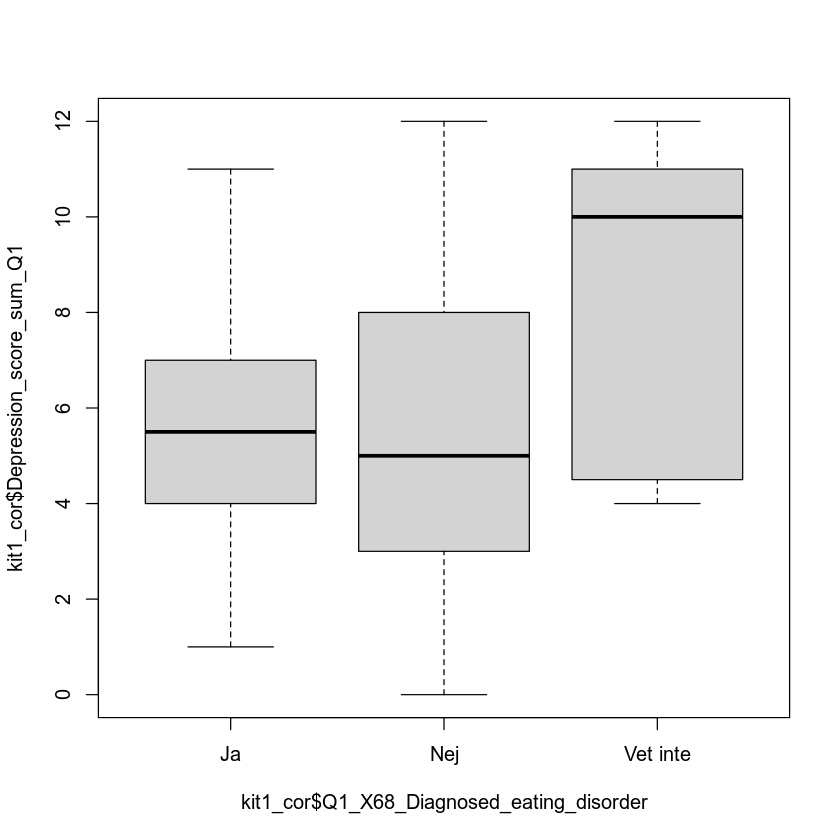

In [3]:
 
#eating disorder _depression

boxplot(kit1_cor$Depression_score_sum_Q1 ~ kit1_cor$Q1_X68_Diagnosed_eating_disorder, na.action = NULL )

sum(is.na(kit1_cor$Q1_X68_Diagnosed_eating_disorder))

#t.test(kit1_cor$stress_sum_score_Q1 , kit1_cor$Q1_X68_Diagnosed_eating_disorder , na.action = "na.rm")

t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Nej" )], na.action = "na.rm")
t.test(kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Ja" )],
       kit1_cor$Depression_score_sum_Q1[which(kit1_cor$Q1_X68_Diagnosed_eating_disorder == "Vet inte" )], na.action = "na.rm")



## no opioid consumption 

[1] 0


	Welch Two Sample t-test

data:  kit1_cor$stress_sum_score_Q1 and kit1_cor$Q1_X77_during_Opioider..smärtlindrande..t.ex.morf
t = 44.416, df = 595, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.477427 4.891701
sample estimates:
mean of x mean of y 
 4.684564  0.000000 


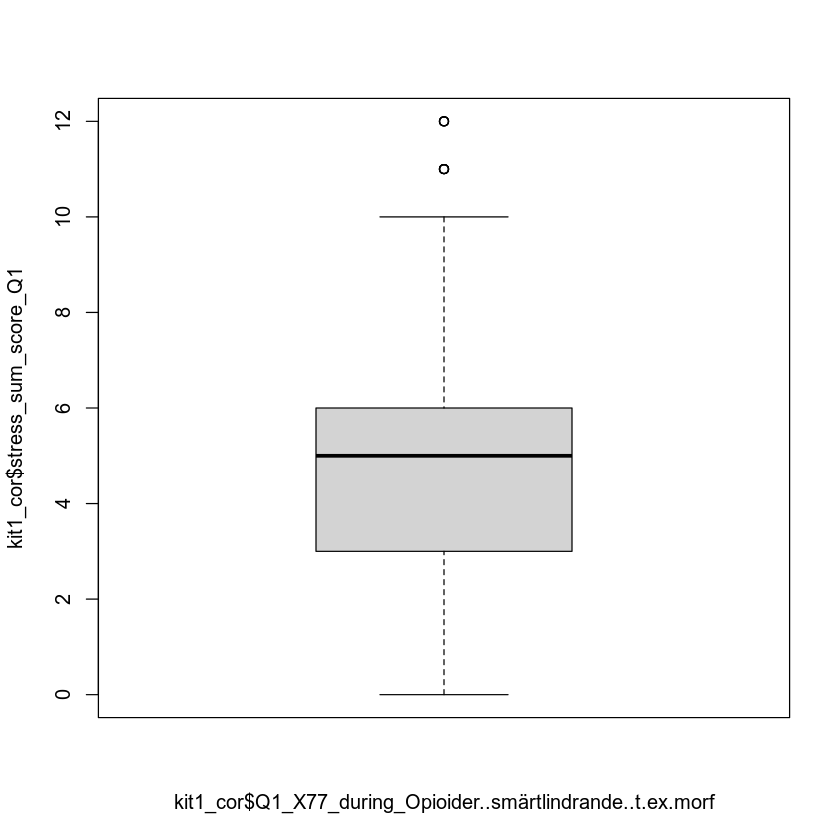

In [81]:
#opioid - stress

boxplot(kit1_cor$stress_sum_score_Q1 ~ kit1_cor$`Q1_X77_during_Opioider..smärtlindrande..t.ex.morf`, na.action = NULL )

sum(is.na(kit1_cor$`Q1_X77_during_Opioider..smärtlindrande..t.ex.morf`))

t.test(kit1_cor$stress_sum_score_Q1 , kit1_cor$`Q1_X77_during_Opioider..smärtlindrande..t.ex.morf` , na.action = "na.rm")

### as all in my cohort haven't consume opiod in this tp ;  so just skipping this 

# continuous data _ kit1
## correlation test and scatter plot

In [12]:
kit1_cor <- read.csv( file =  "modified_meta1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit1_cor)


[1] 596  27

In [31]:
kit1_cor <- read.csv( file =  "meta_kit1_intrests1_modified_puque.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit1_cor)


[1] 596  27

In [ ]:
kit1_cor$PUQUE_rating_Q1

In [32]:
cor(kit1_cor[,c('stress_sum_score_Q1' ,'PUQUE_rating_Q1','Depression_score_sum_Q1', 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior','ses_score' , 'Q1_dietscore', 'TTP_months' , 'Q1_X17_Pregnancy_week' )])

stress_sum_score_Q1 PUQUE_rating_Q1
stress_sum_score_Q1      1.000000000         0.120532811   
PUQUE_rating_Q1          0.120532811         1.000000000   
Depression_score_sum_Q1  0.490668490         0.199322671   
Prev_miscarriage_numb    0.015191876        -0.004241703   
Q1_Age                  -0.028129737        -0.069148913   
BMI_prior                         NA                  NA   
ses_score               -0.032812650        -0.034756166   
Q1_dietscore             0.117677578         0.076353563   
TTP_months                        NA                  NA   
Q1_X17_Pregnancy_week   -0.002037792        -0.250449714   
                        Depression_score_sum_Q1 Prev_miscarriage_numb
stress_sum_score_Q1      0.490668490             0.015191876         
PUQUE_rating_Q1          0.199322671            -0.004241703         
Depression_score_sum_Q1  1.000000000            -0.039641501         
Prev_miscarriage_numb   -0.039641501             1.000000000         
Q1_Age                  -0.094447747             0.214081728         
BMI_prior                         NA                      NA         
ses_score               -0.042683694            -0.003465816         
Q1_dietscore             0.127879540             0.015560859         
TTP_months                        NA                      NA         
Q1_X17_Pregnancy_week   -0.008450207            -0.046026635         
                        Q1_Age      BMI_prior ses_score    Q1_dietscore
stress_sum_score_Q1     -0.02812974 NA        -0.032812650  0.11767758 
PUQUE_rating_Q1         -0.06914891 NA        -0.034756166  0.07635356 
Depression_score_sum_Q1 -0.09444775 NA        -0.042683694  0.12787954 
Prev_miscarriage_numb    0.21408173 NA        -0.003465816  0.01556086 
Q1_Age                   1.00000000 NA         0.112699730 -0.12534990 
BMI_prior                        NA  1                  NA          NA 
ses_score                0.11269973 NA         1.000000000 -0.11930236 
Q1_dietscore            -0.12534990 NA        -0.119302360  1.00000000 
TTP_months                       NA NA                  NA          NA 
Q1_X17_Pregnancy_week    0.07336973 NA         0.030562216 -0.03689746 
                        TTP_months Q1_X17_Pregnancy_week
stress_sum_score_Q1     NA         -0.002037792         
PUQUE_rating_Q1         NA         -0.250449714         
Depression_score_sum_Q1 NA         -0.008450207         
Prev_miscarriage_numb   NA         -0.046026635         
Q1_Age                  NA          0.073369730         
BMI_prior               NA                   NA         
ses_score               NA          0.030562216         
Q1_dietscore            NA         -0.036897458         
TTP_months               1                   NA         
Q1_X17_Pregnancy_week   NA          1.000000000

In [84]:
cor(kit1_cor[,c('stress_sum_score_Q1' , 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior','ses_score' )])

stress_sum_score_Q1 Prev_miscarriage_numb Q1_Age     
stress_sum_score_Q1    1.00000000          0.015191876          -0.02812974
Prev_miscarriage_numb  0.01519188          1.000000000           0.21408173
Q1_Age                -0.02812974          0.214081728           1.00000000
BMI_prior                      NA                   NA                   NA
ses_score             -0.03281265         -0.003465816           0.11269973
                      BMI_prior ses_score   
stress_sum_score_Q1   NA        -0.032812650
Prev_miscarriage_numb NA        -0.003465816
Q1_Age                NA         0.112699730
BMI_prior              1                  NA
ses_score             NA         1.000000000

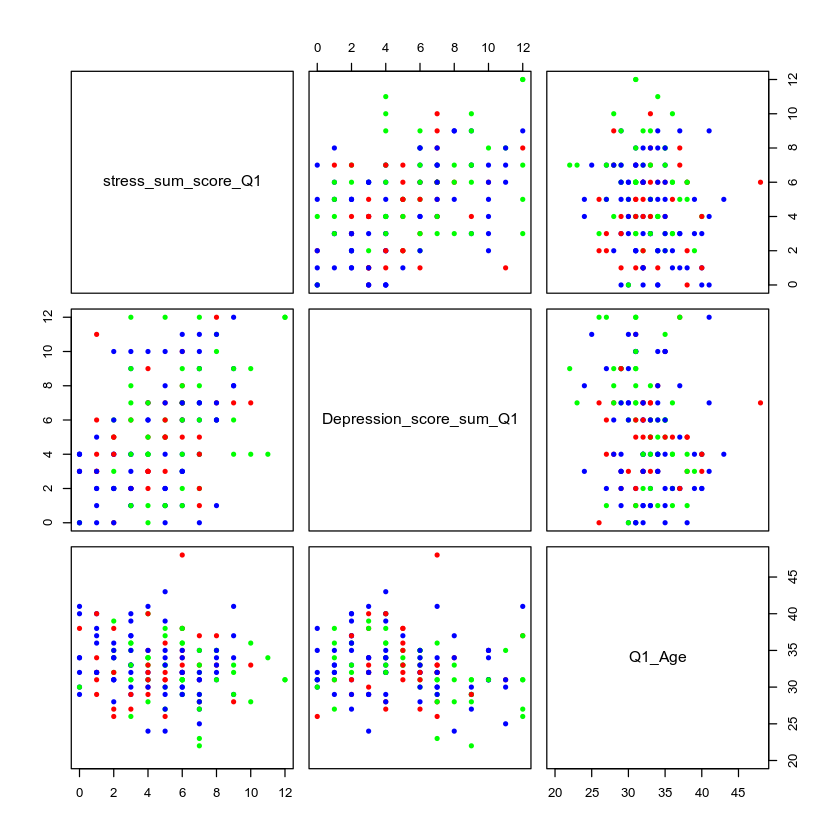

In [85]:
pairs(kit1_cor[,c('stress_sum_score_Q1', 'Depression_score_sum_Q1' , 'Q1_Age') ], pch = 20 ,bg = rainbow (3)[factor(kit1_cor$stress_sum_score_Q1)] , col= rainbow(3)[kit1_cor$stress_sum_score_Q1])


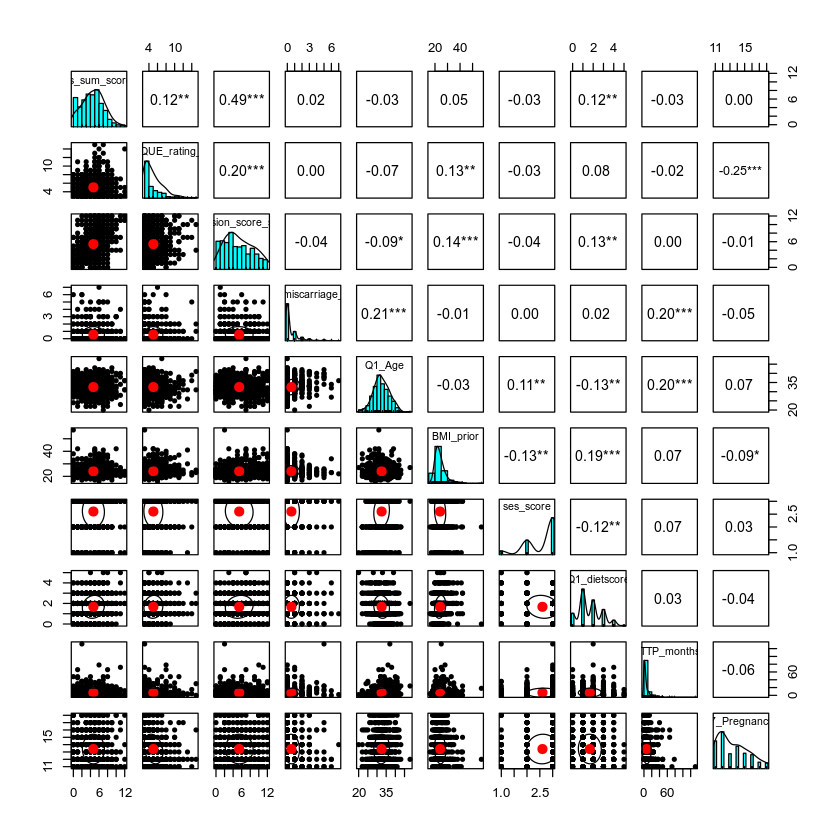

In [33]:
pairs.panels(
  kit1_cor[,c('stress_sum_score_Q1','PUQUE_rating_Q1' ,'Depression_score_sum_Q1', 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior','ses_score' , 'Q1_dietscore', 'TTP_months' , 'Q1_X17_Pregnancy_week' )],

  smooth = F ,
  density = T ,
  method = "pearson", 
  pch = 20,
  lm = FALSE ,
  stars =  TRUE ,
  ci = TRUE
)

In [ ]:
theme_set(theme_bw())
df<- kit1_cor[,c('stress_sum_score_Q1', 'Depression_score_sum_Q1' , 'BMI_prior','ses_score')]
ggpairs(df , na.action = "na.rm" )+ theme_bw()

In [ ]:
#?theme_set

In [ ]:
sel_Col <- c('stress_sum_score_Q1' ,'Depression_score_sum_Q1', 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior','ses_score' , 'Q1_X18_Months_to_get_pregnant' , 'Q1_X17_Pregnancy_week' )

# violin and scatter plot for kit 1
## correlation has been shown for (dep-stress) and dep_bmiprior , also bmi-sesscore(have not done this yet). 
## for kit1_binary data :t test (for either stress or dep score) :
###  1) dep ~ bristol_rating , 2) dep ~ diarrhea 3) stree/dep ~ gimedicatio 4)stress ~ hyperemesis 5) dep/stress ~ dailyfiber 6)dep/stress ~ first_pregnancy illusrated correlation 
### vaginal bleeding~depp  ( p value was 0.07 ) so maybe it worth looking up 
### so i'll group data based on the result from t test and check scatter plots

In [44]:
library(ggplot2)
library(ggpubr)
theme_set(
  theme_minimal() +
    theme(legend.position = "top")
  )
library(vioplot)

In [45]:
kit1_cor <- read.csv( file =  "modified_meta1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
df <- kit1_cor
dim(df)

[1] 596  27

In [46]:
b <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Scatter plot with regression line
#plot("depression_stress_kit1_T.pdf")
b2 <- b + geom_point(position = position_jitter(width = 0.4, height = 0.4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
#dev.off()
#? ggsave
ggsave("dep_stress_kit1_T.pdf", width = 6, height =6)

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


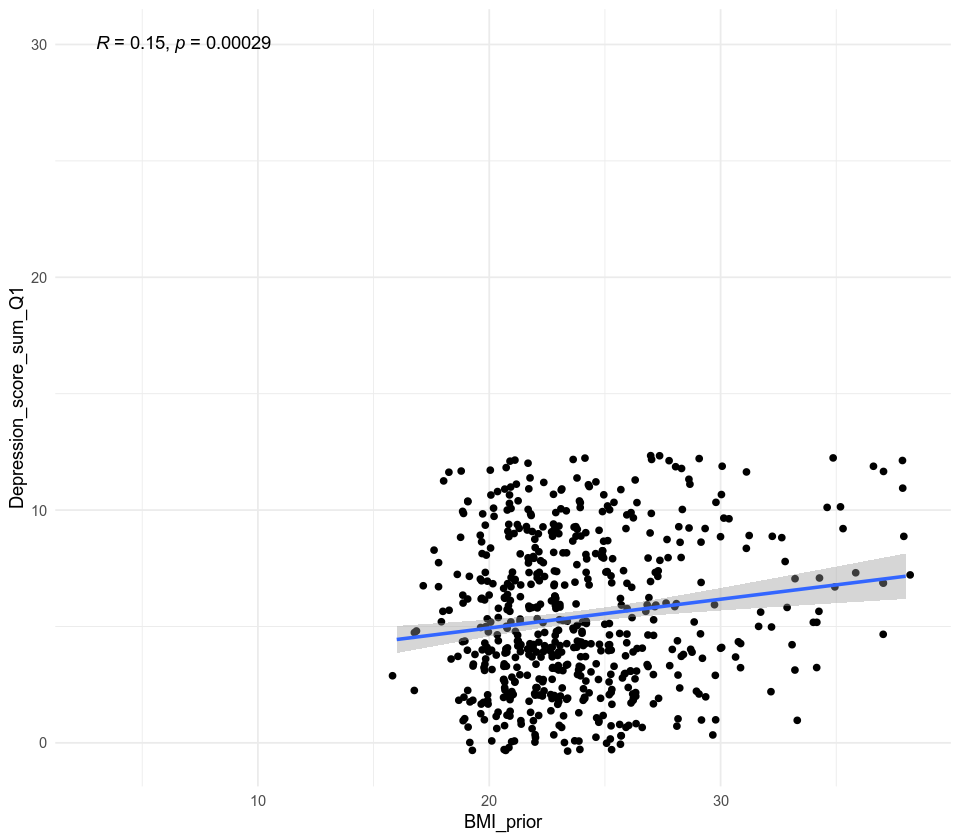

In [136]:
a <- ggplot(df_bmi1, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 0.4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 
ggsave("dep_bmi_kit1_T.pdf", width = 6, height =6)

In [48]:
df$ses_score <- as.factor(df$ses_score)
df$bristol_rating_Q1 <- as.factor(df$bristol_rating_Q1)
df$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` <- as.factor(df$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
df$Q1_during_gi_medication <- as.factor(df$Q1_during_gi_medication)
df$Q1_X73.8_Pregnancy_problems_vaginal_bleeding <- as.factor(df$Q1_X73.8_Pregnancy_problems_vaginal_bleeding)
df$Q1_X73.6_Pregnancy_problems_hyperemesis <- as.factor(df$Q1_X73.6_Pregnancy_problems_hyperemesis)
df$Q1_dailyfiber <- as.factor(df$Q1_dailyfiber)
df$Q1_X20_First_pregnancy <- as.factor(df$Q1_X20_First_pregnancy)

In [49]:
df_v <- df
df_v$stress_sum_score_Q1 <- as.factor(df_v$stress_sum_score_Q1)
 #stat_cor(method = "pearson", 
  #         label.x = 3, label.y = 30) 

In [50]:
df_v1 <- df
#df_v1$stress_sum_score_Q1 <- as.factor(df_v1$stress_sum_score_Q1)

In [51]:
#violin plot
b5 <- ggplot(df_v, aes(stress_sum_score_Q1 , Depression_score_sum_Q1)) 
pdf("stress_dep_violinplot_T.pdf", width = 16 , height = 8 )
 b5+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.1) + geom_jitter(shape=16, position=position_jitter(0.3)) 
 dev.off()
#options(repr.plot.width=16)

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


png 
  2

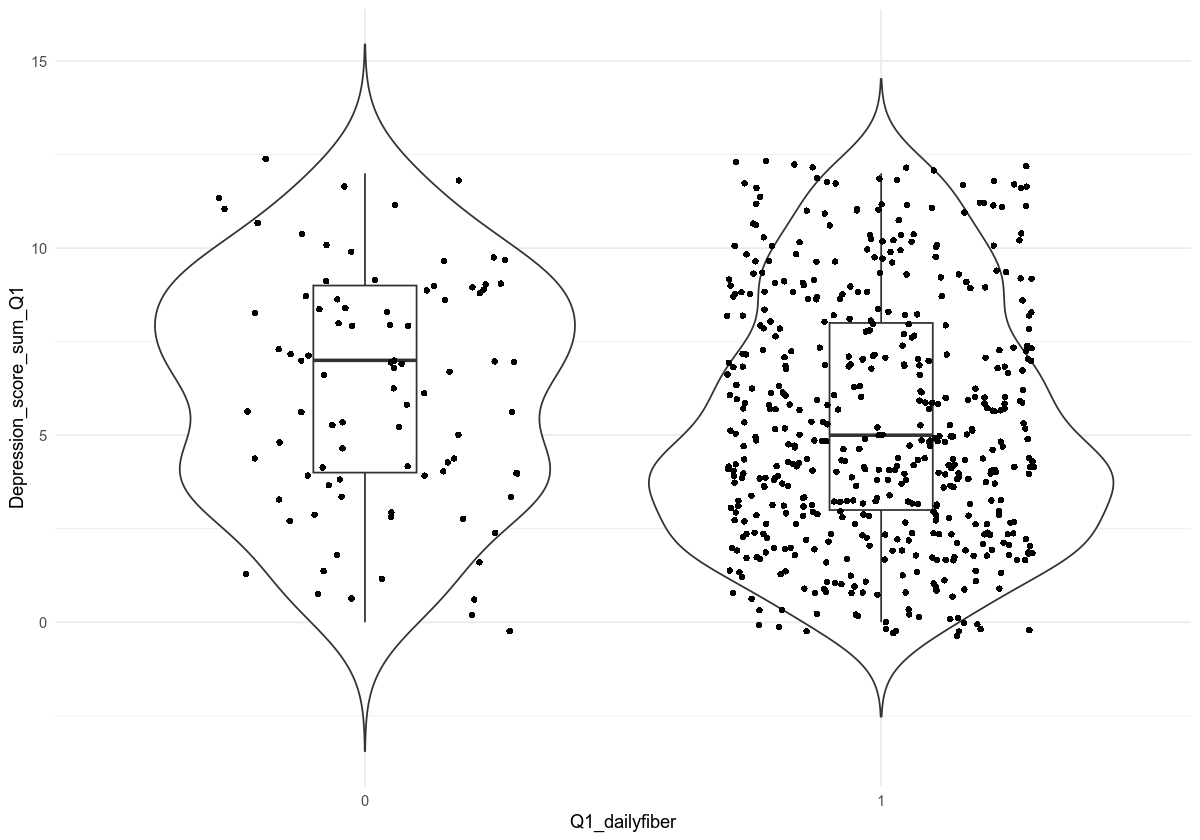

In [49]:
#violin plot: ( dep ~ Q1_dailyfiber)
b3 <- ggplot(df_v1, aes(Q1_dailyfiber , Depression_score_sum_Q1)) 

 b3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

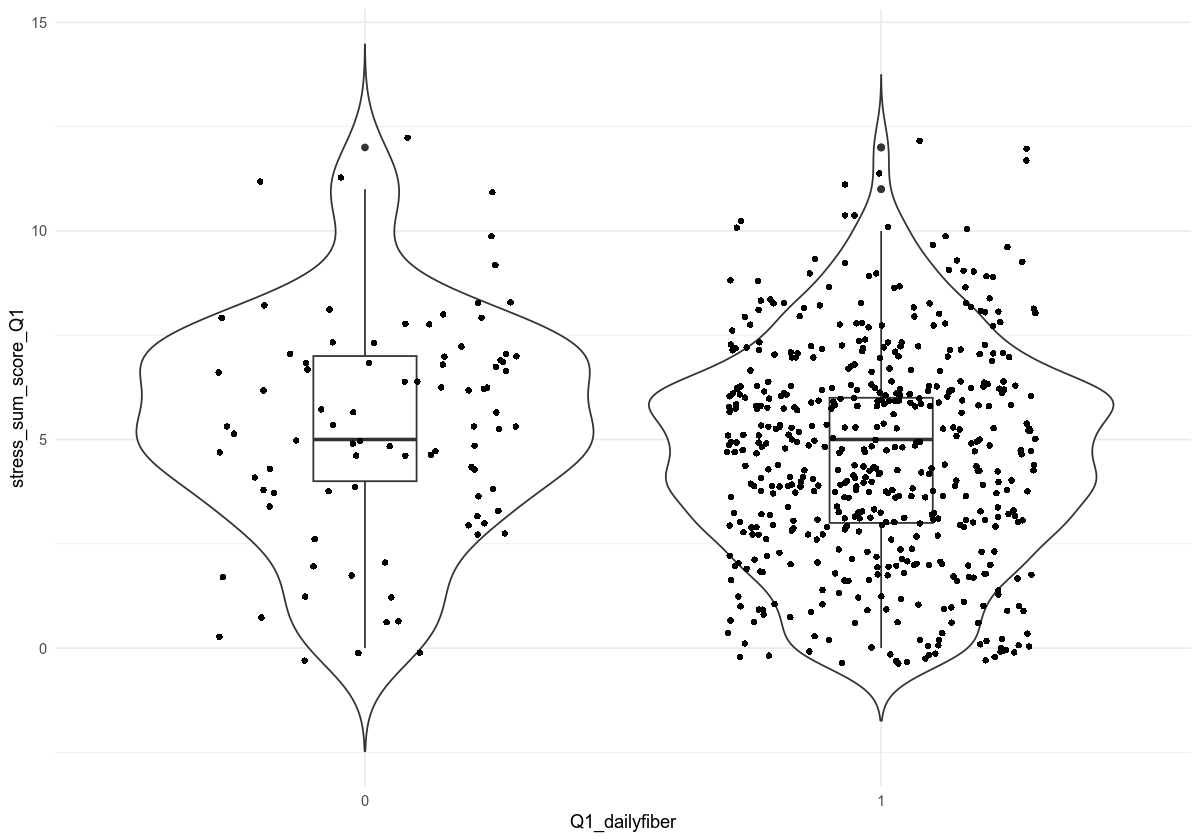

In [50]:
#violin plot: ( stress ~ Q1_dailyfiber)
b5 <- ggplot(df_v1, aes(Q1_dailyfiber , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

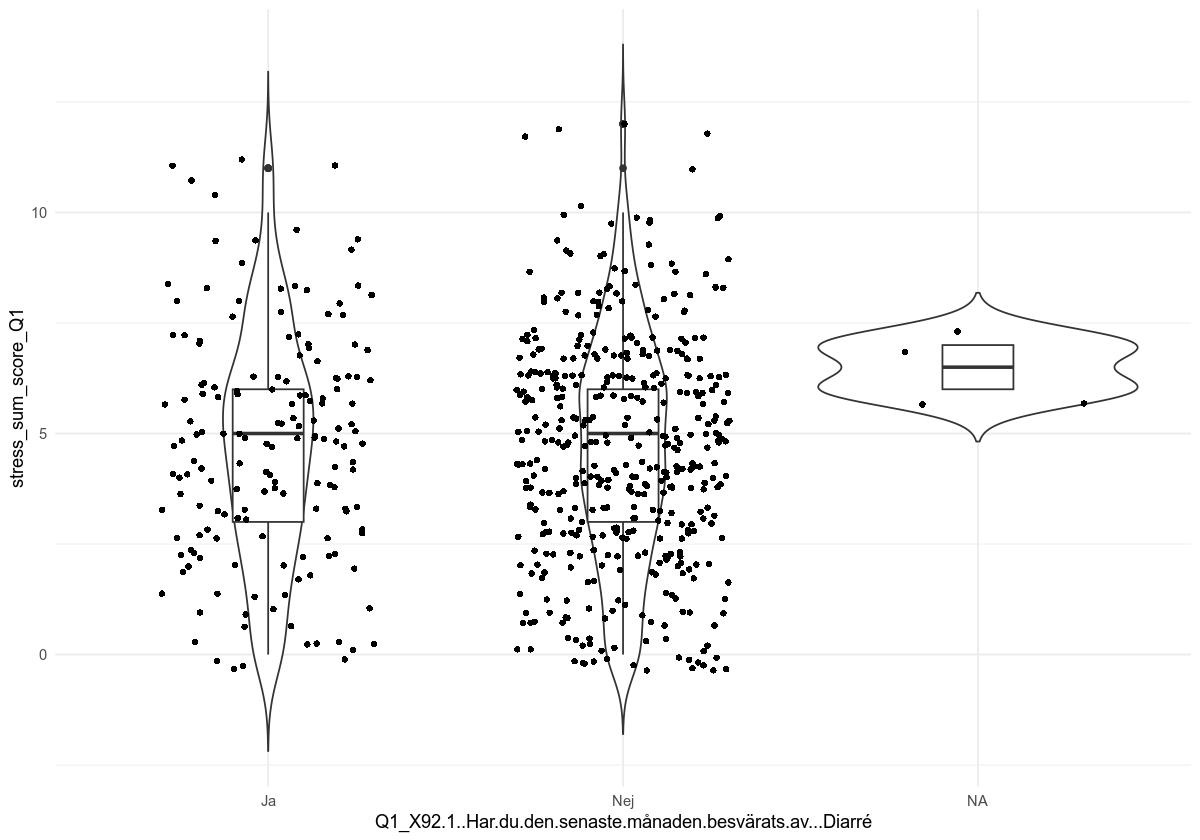

In [142]:
#violin plot: ( `Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` ~ stress)

b5 <- ggplot(df_v1, aes(`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)


 Ja Nej 
163 429 

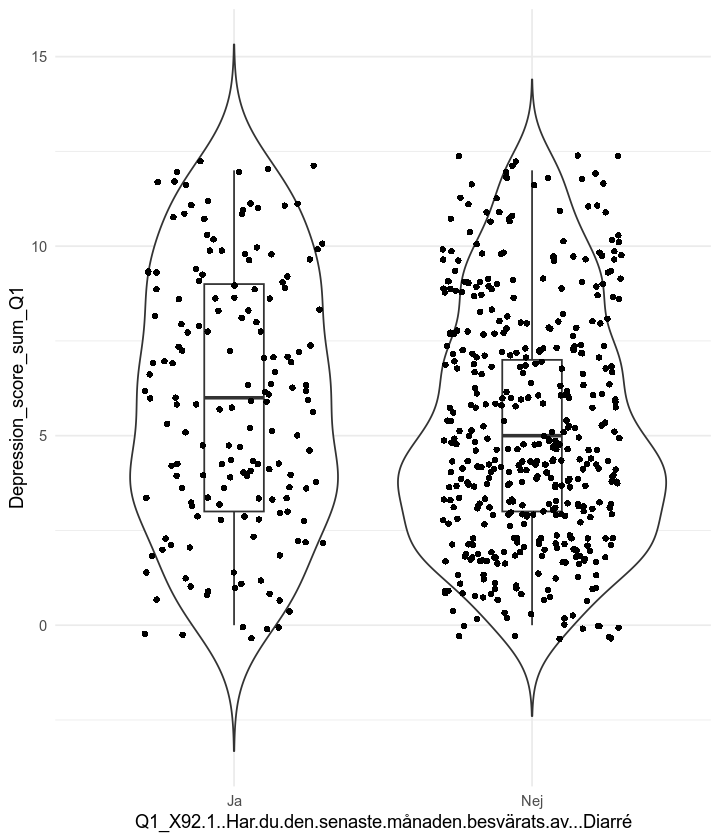

In [149]:
#violin plot: ( `Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` ~ depression)
df_v3 <- df_v1[!is.na(df_v1$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`),]
table(df_v3$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
b5 <- ggplot(df_v3, aes(`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=6)

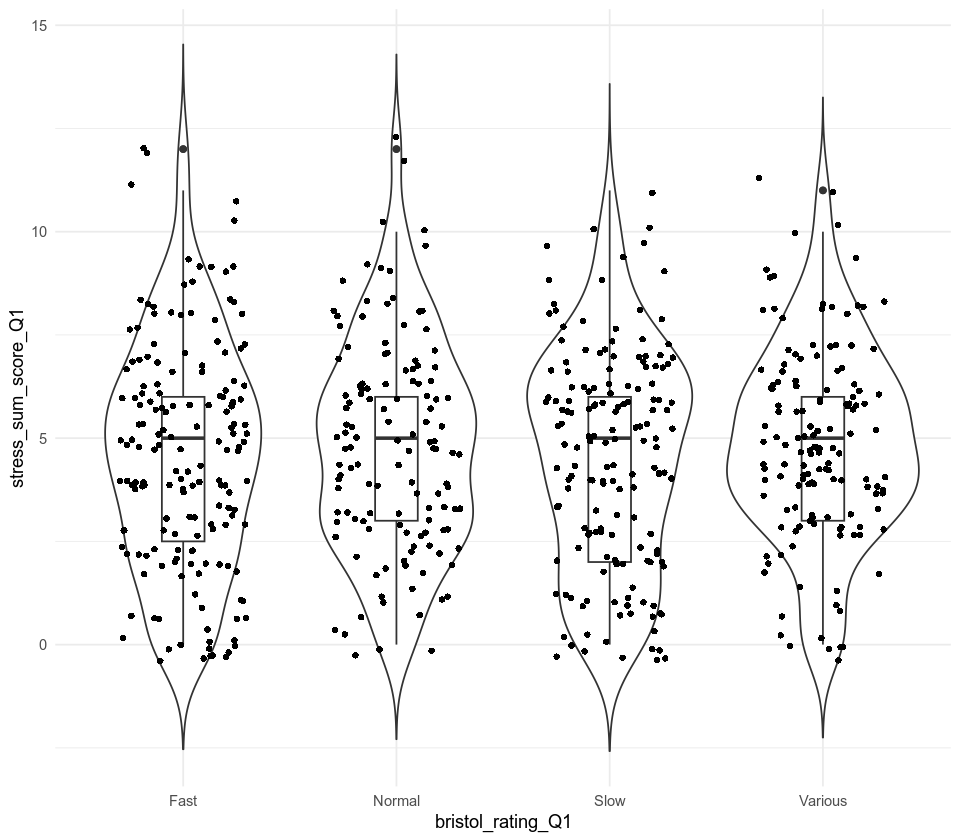

In [137]:
#violin plot: ( stress ~bristol rating )
df_v2 <- df_v1[!is.na(df_v1$bristol_rating_Q1),]
b5 <- ggplot(df_v2, aes(bristol_rating_Q1 , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

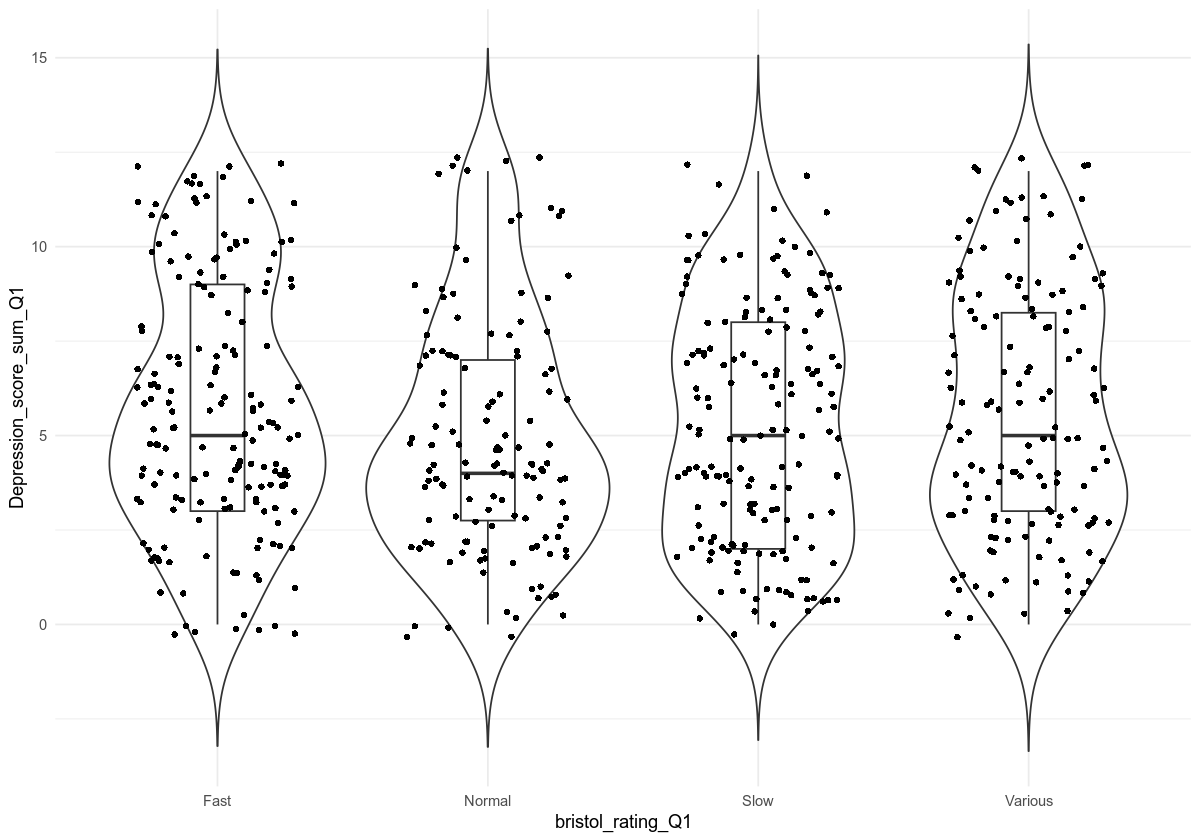

In [138]:
#violin plot: ( depression ~bristol rating )
b5 <- ggplot(df_v2, aes(bristol_rating_Q1 , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

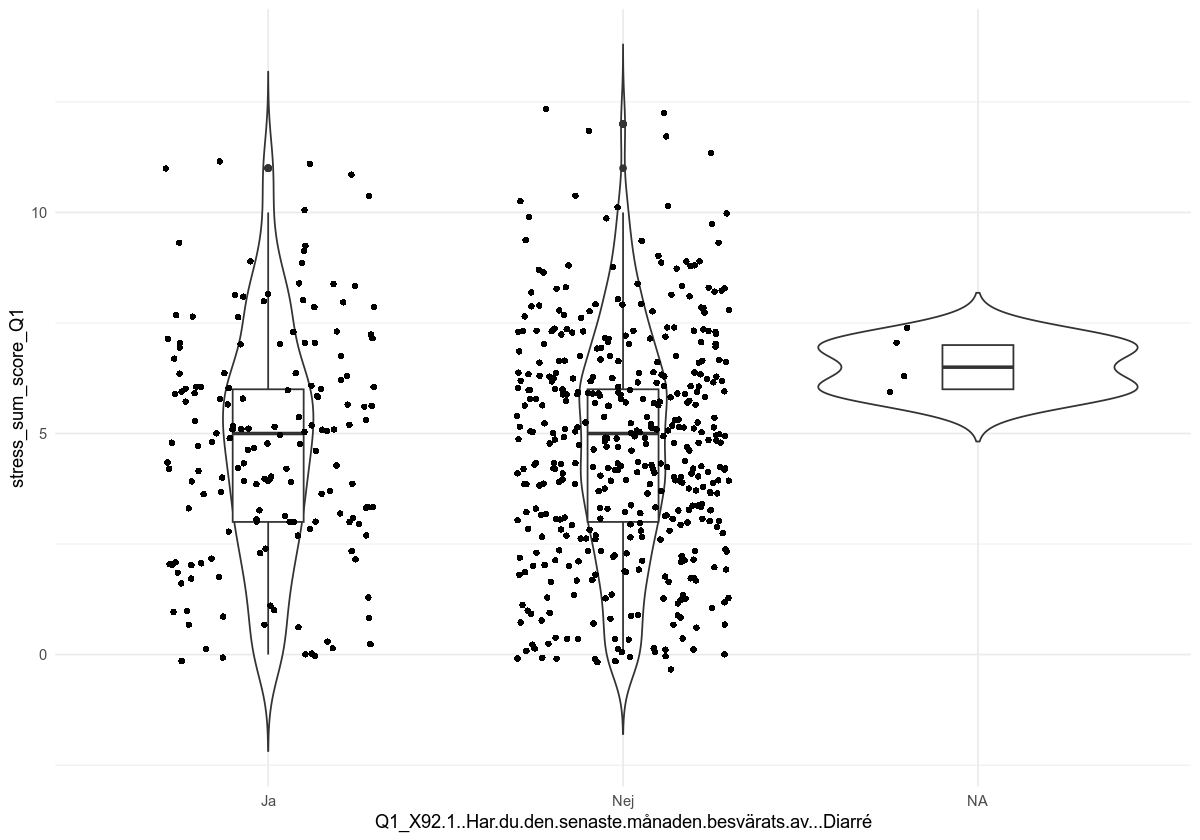

In [56]:
#violin plot: ( stress ~diarrhea ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_v1, aes(`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

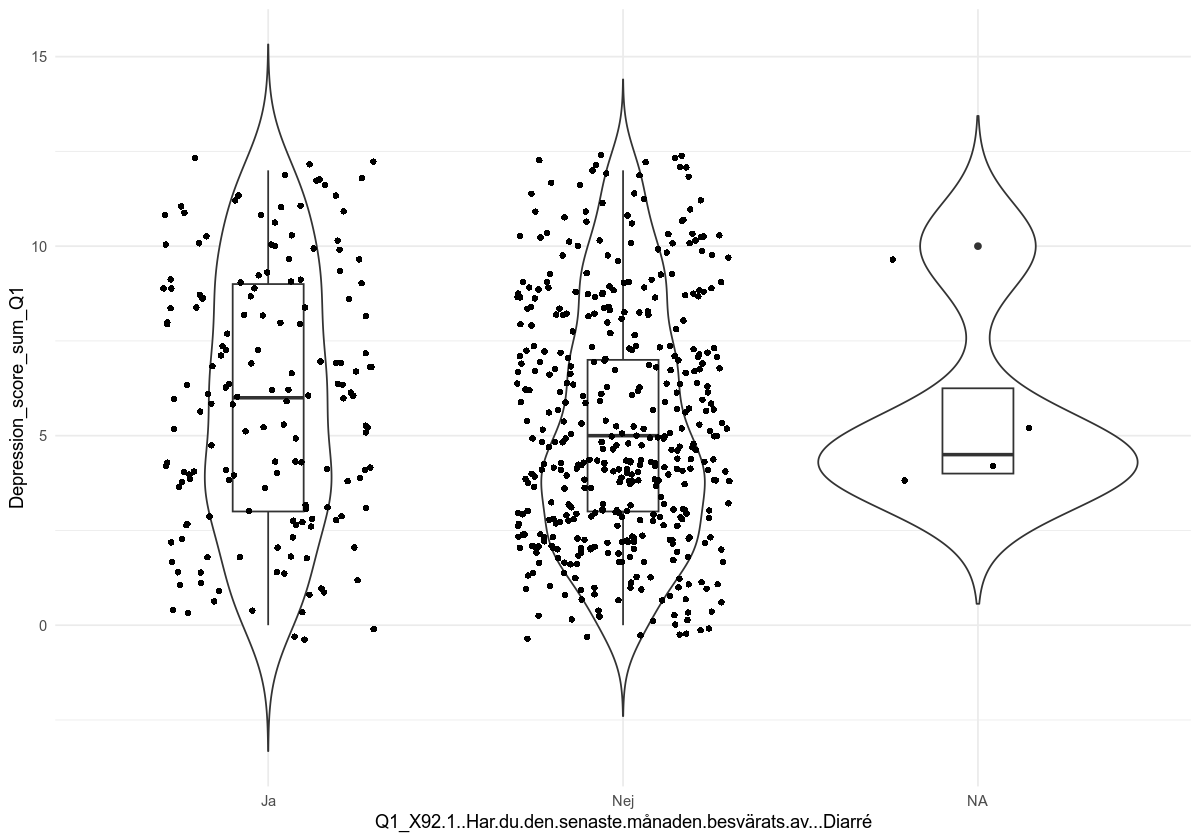

In [55]:
#violin plot: ( depression ~diarrhea )
b5 <- ggplot(df_v1, aes(`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

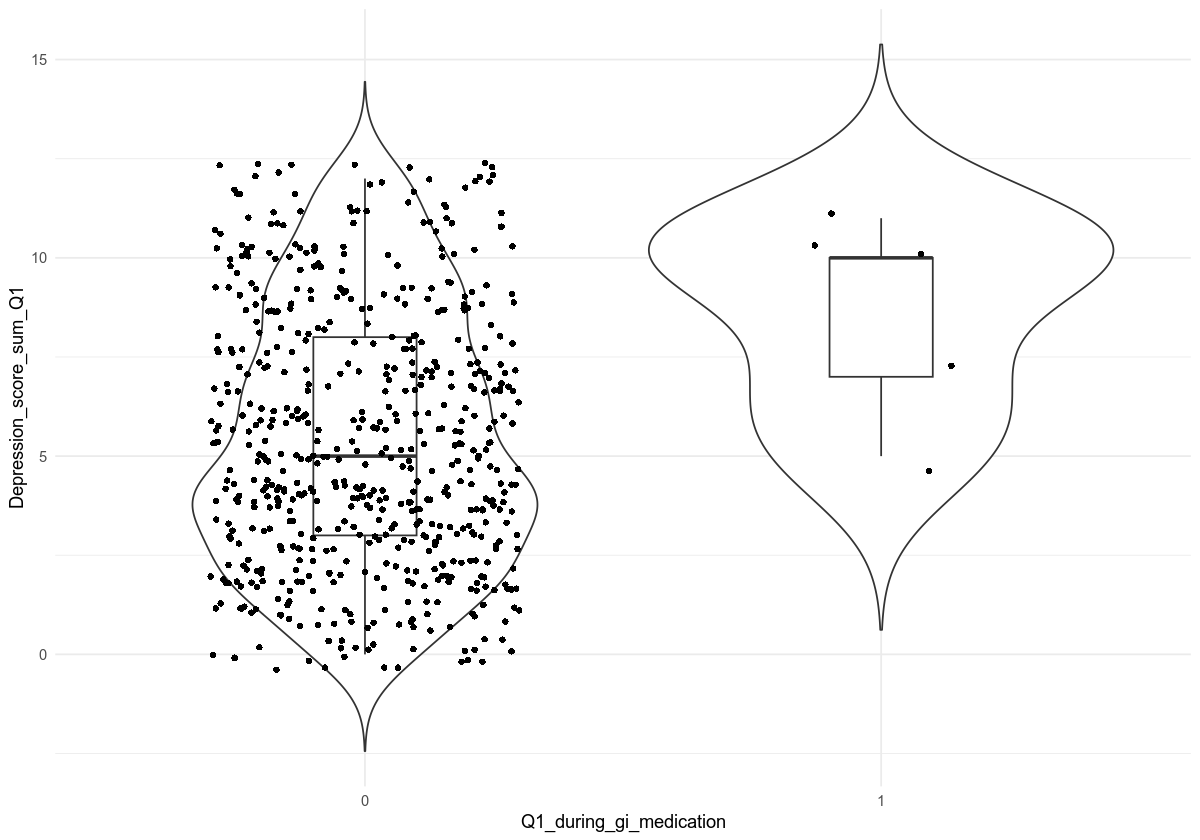

In [57]:
#violin plot: ( depression ~ gimedication ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_v1, aes(Q1_during_gi_medication , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

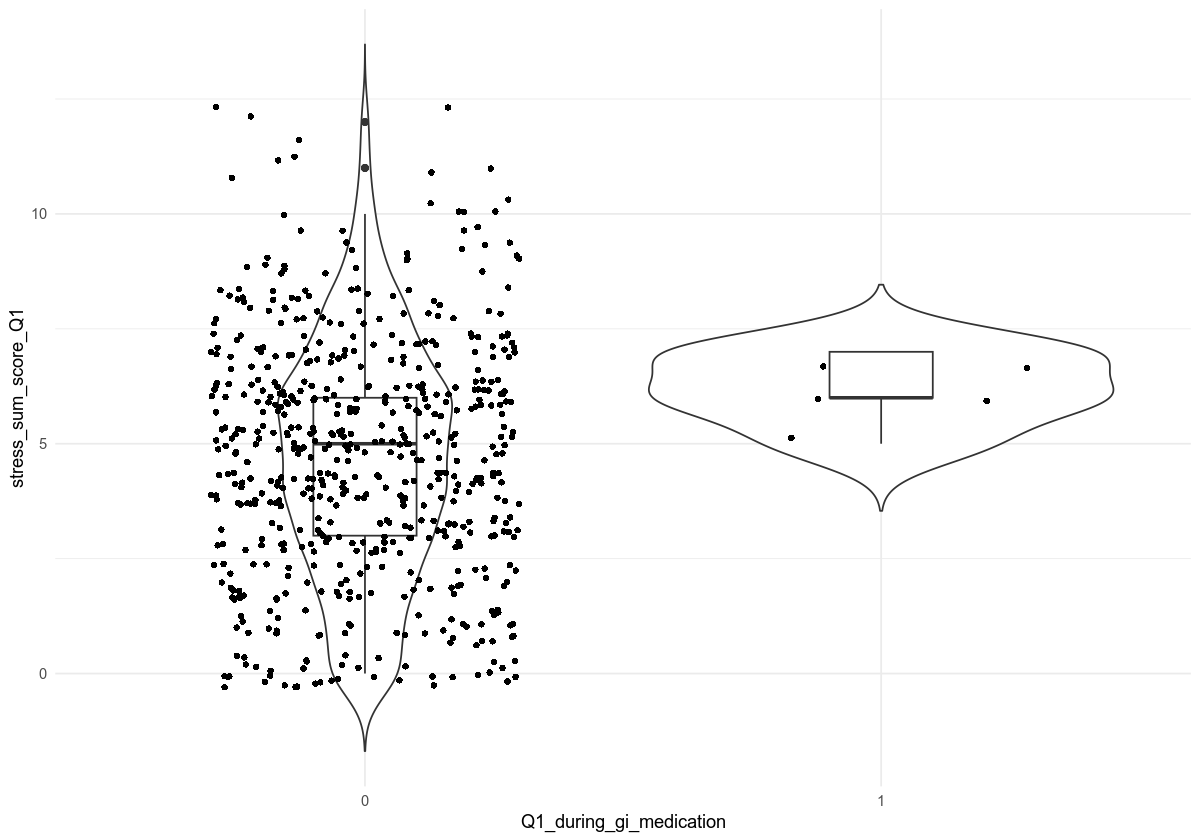

In [58]:
#violin plot: ( stress ~ gimedication ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_v1, aes(Q1_during_gi_medication , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

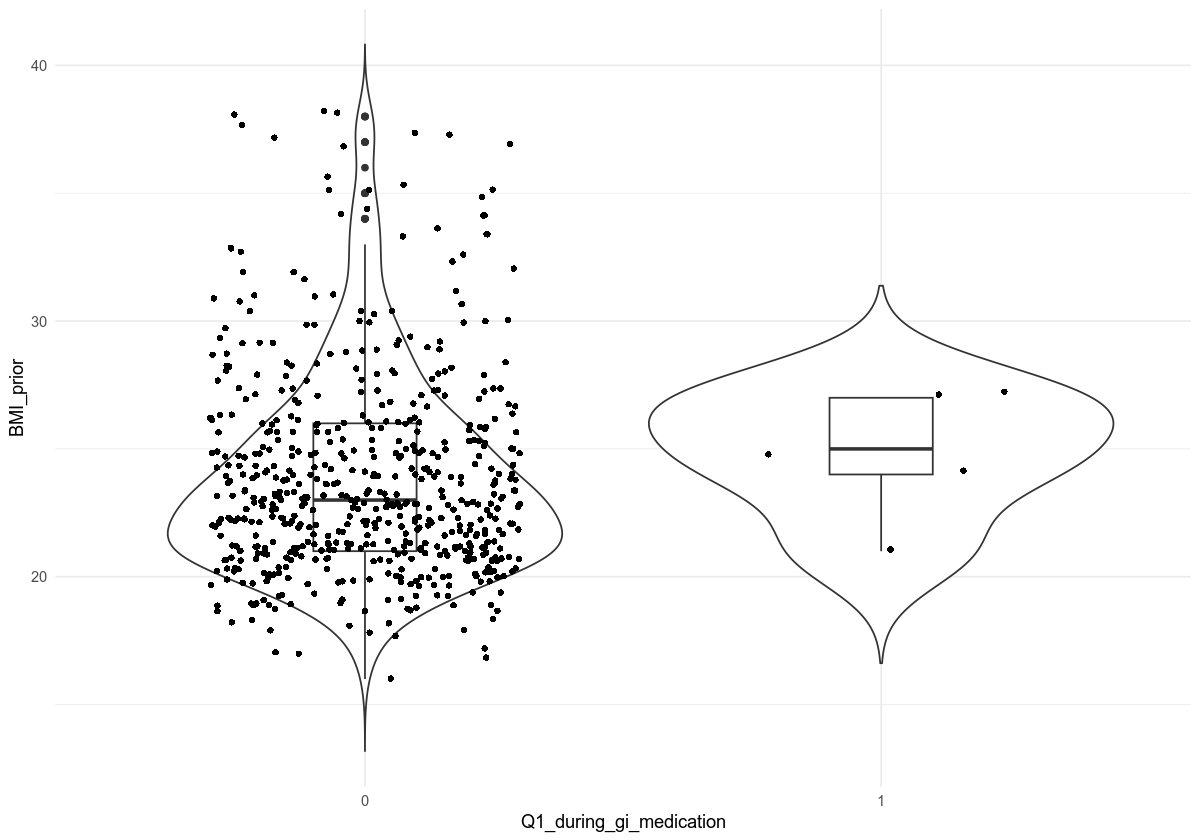

In [59]:
#violin plot: ( sbmi excluded bmi >= 40  ~ gimedication ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_bmi1, aes(Q1_during_gi_medication , BMI_prior)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

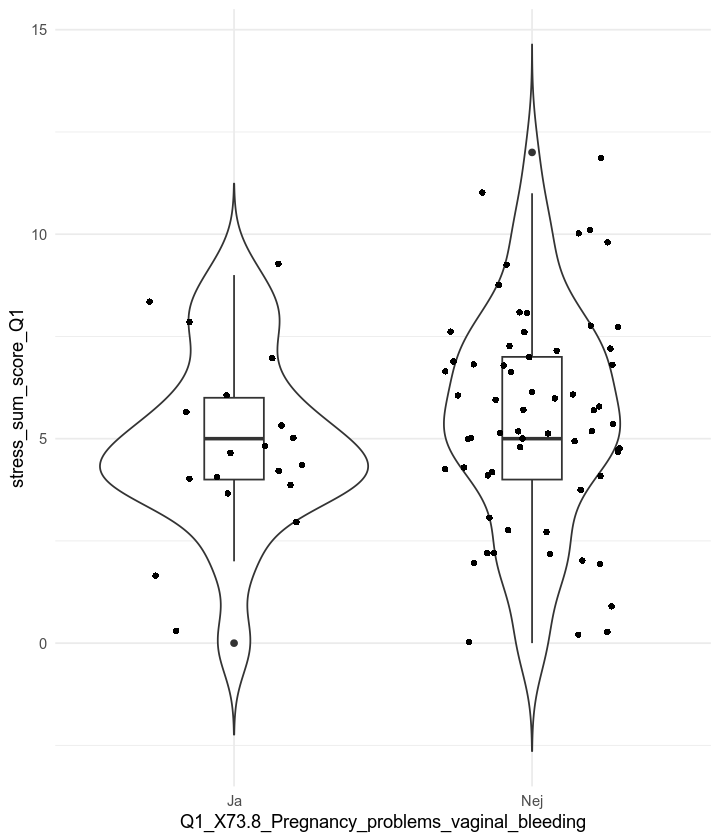

In [150]:
#violin plot: ( stress ~ vaginal bleeding ) stress_sum_score_Q1/Depression_score_sum_Q1
df_nona <- df_v1[!(df_v1$Q1_X73.8_Pregnancy_problems_vaginal_bleeding == "0"), ] 
b5 <- ggplot(df_nona , aes(Q1_X73.8_Pregnancy_problems_vaginal_bleeding , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

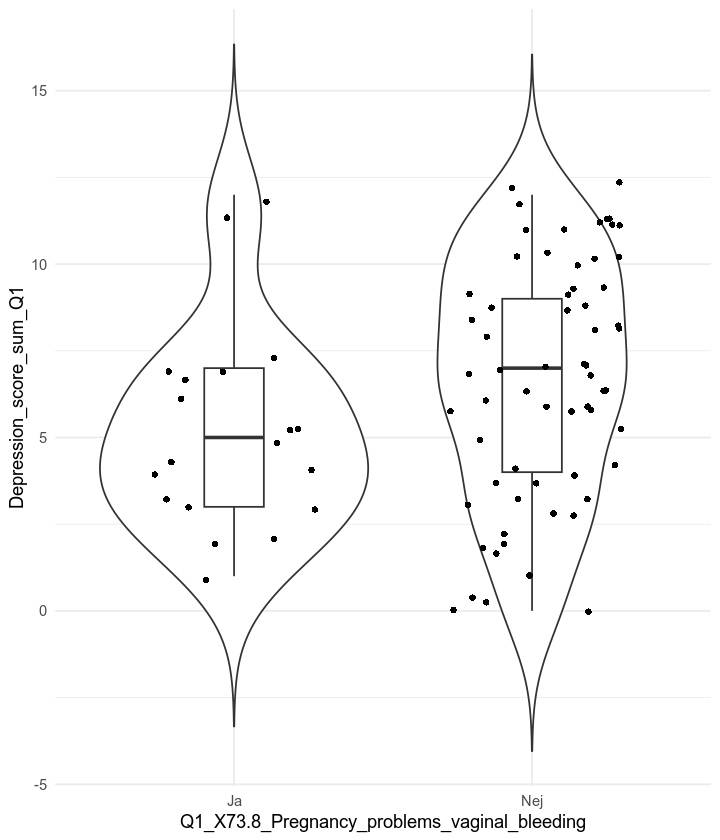

In [153]:
#violin plot: ( depression ~ vaginal bleeding ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_nona, aes(Q1_X73.8_Pregnancy_problems_vaginal_bleeding , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=6)

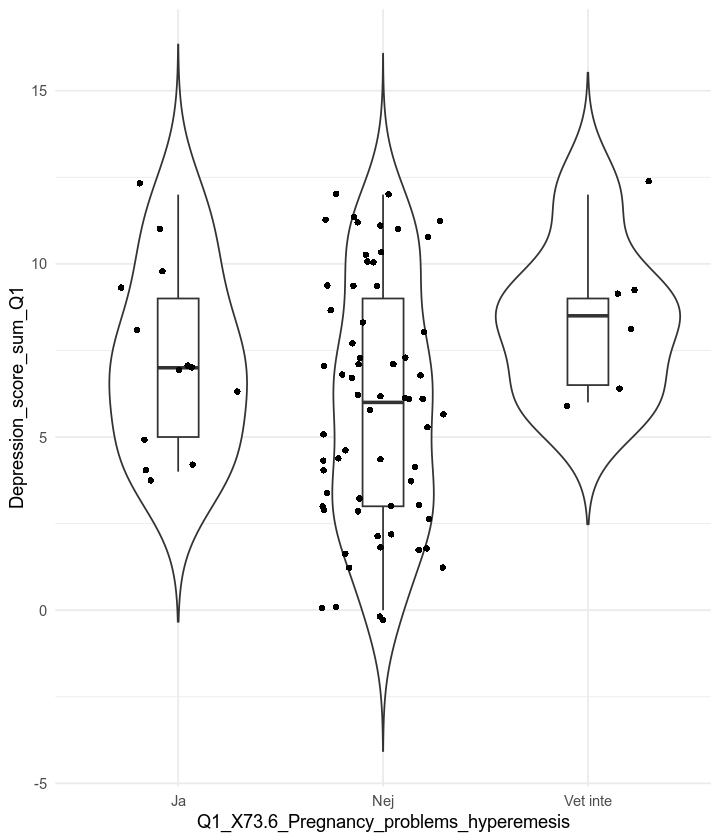

In [154]:
#violin plot: ( depression ~ hyperemesis ) stress_sum_score_Q1/Depression_score_sum_Q1
df_nona1 <- df_v1[!(df_v1$Q1_X73.6_Pregnancy_problems_hyperemesis == "0"), ] 
b5 <- ggplot(df_nona1, aes(Q1_X73.6_Pregnancy_problems_hyperemesis , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

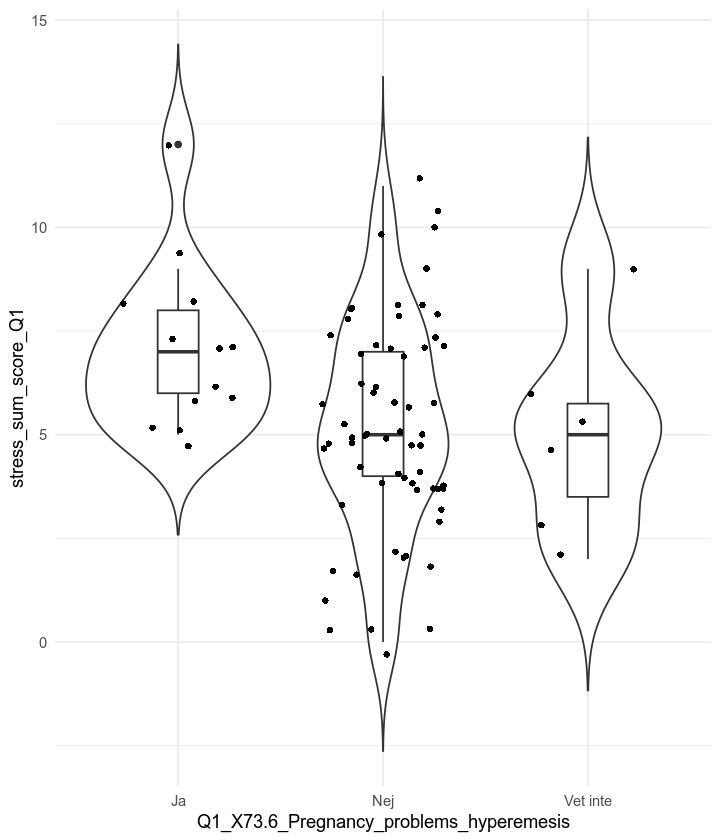

In [157]:
#violin plot: ( stress ~ hyperemesis ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_nona1, aes(Q1_X73.6_Pregnancy_problems_hyperemesis , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=6)

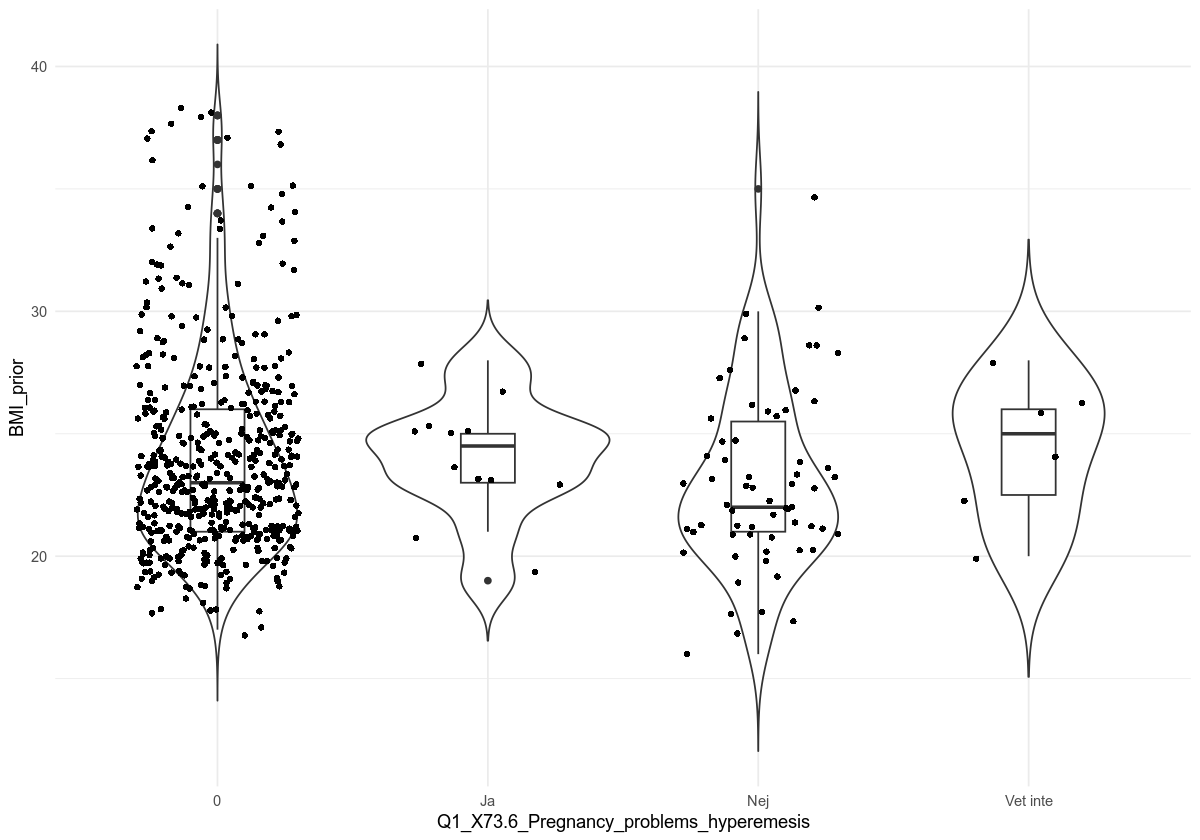

In [62]:
#violin plot: ( bmi ~ hyperemesis ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_bmi1, aes(Q1_X73.6_Pregnancy_problems_hyperemesis , BMI_prior)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

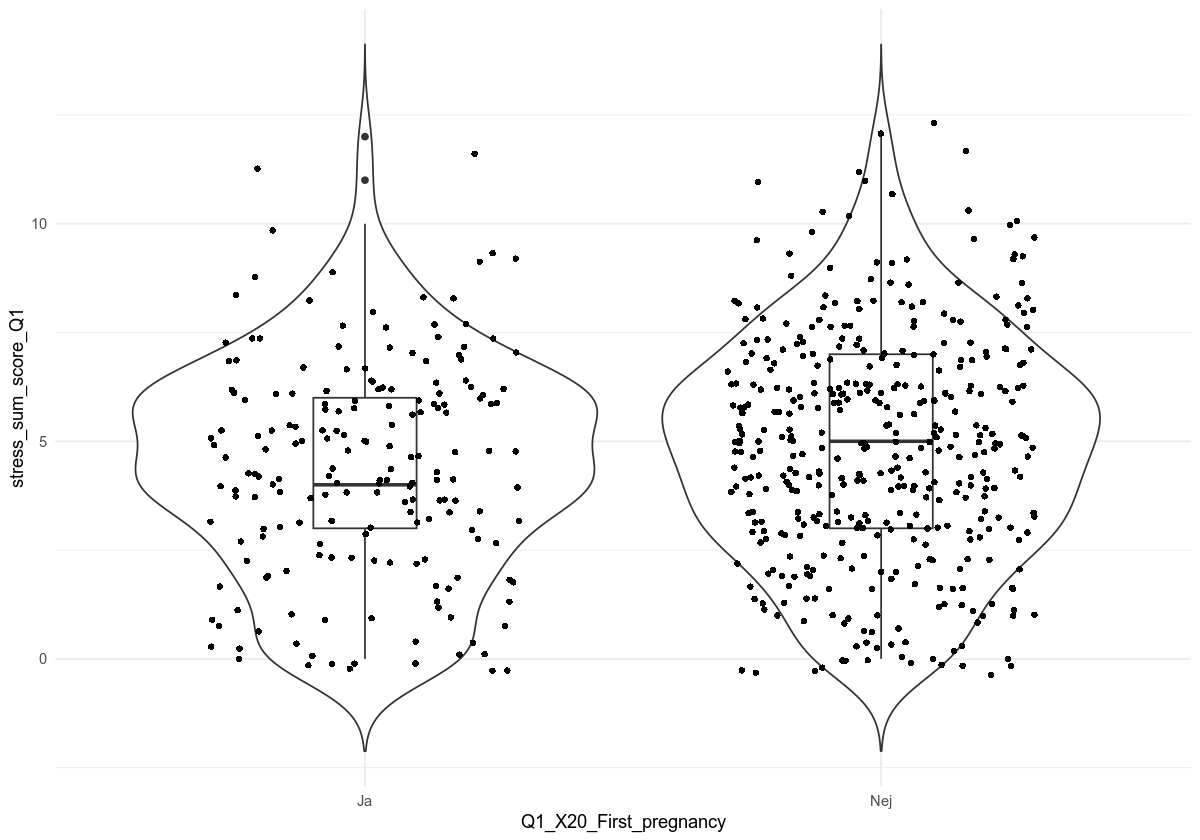

In [63]:
#violin plot: ( stress ~ Q1_X20_First_pregnancy ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_v1, aes(Q1_X20_First_pregnancy , stress_sum_score_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

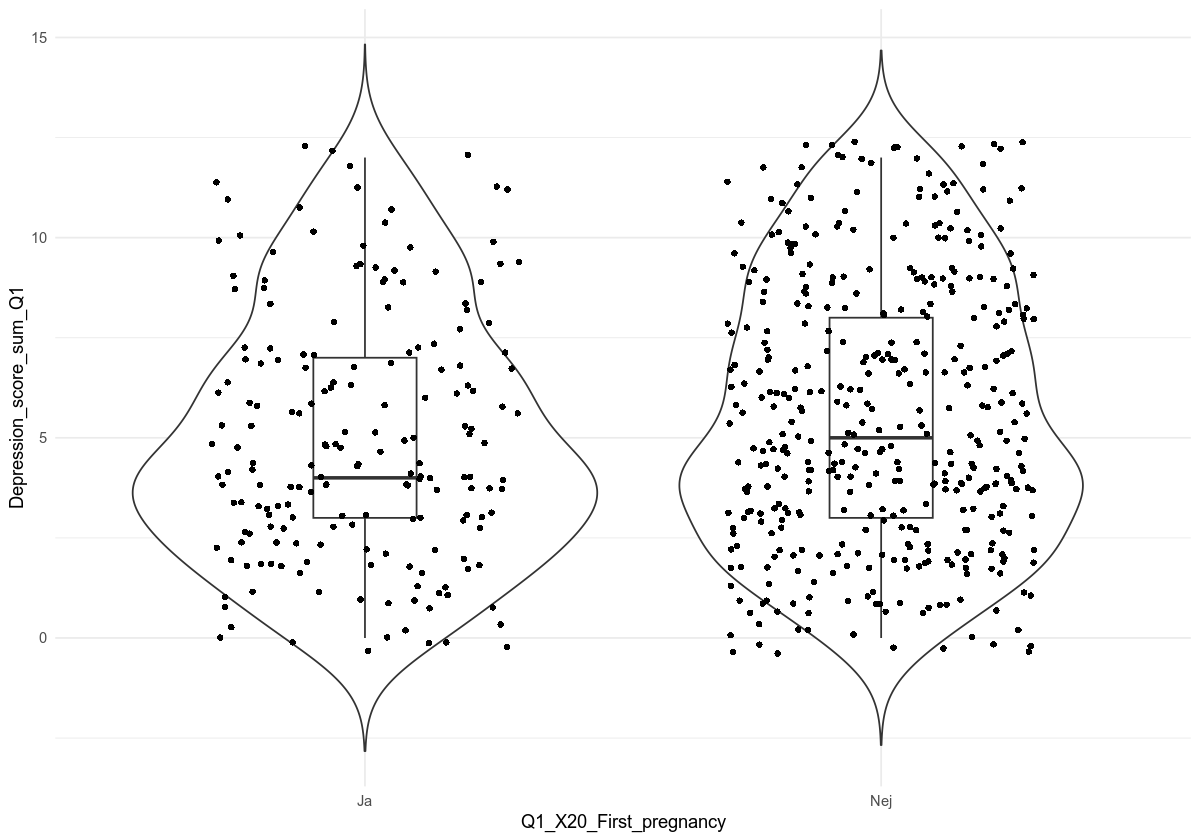

In [82]:
#violin plot: ( depression  ~ Q1_X20_First_pregnancy ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_v1, aes(Q1_X20_First_pregnancy , Depression_score_sum_Q1)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=16)

Warning message:
“Removed 1 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


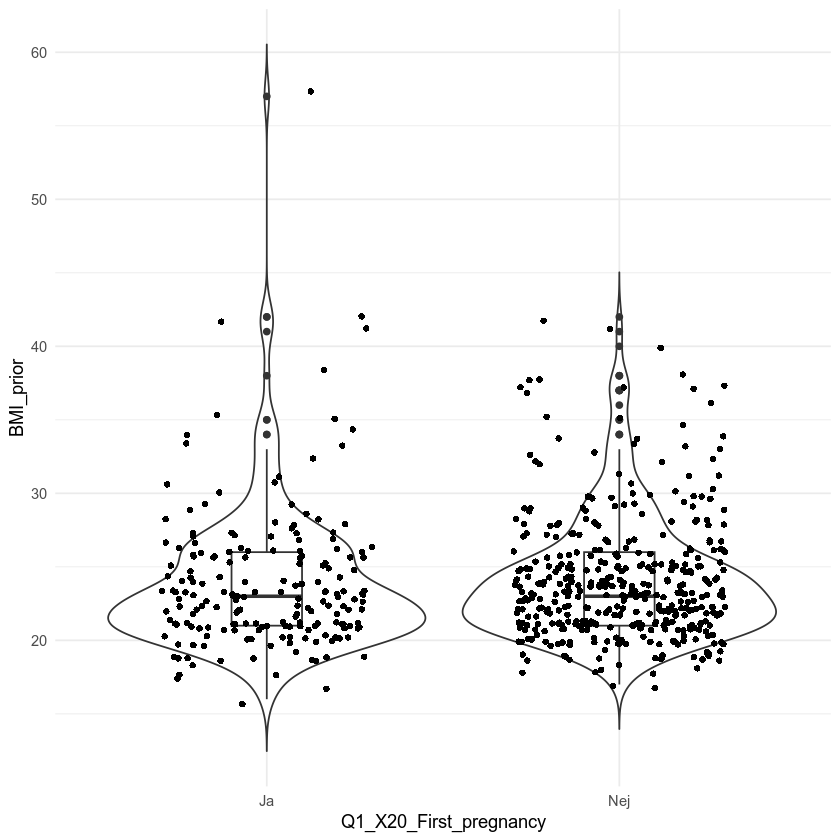

In [52]:
#violin plot: ( depression  ~ Q1_X20_First_pregnancy ) stress_sum_score_Q1/Depression_score_sum_Q1
b5 <- ggplot(df_v1, aes(Q1_X20_First_pregnancy , BMI_prior)) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=16)

[1] 589  27

[1] 23 23 23 38 19 21 28 21 21 24 25 23 22 21 21 25 28 23 24 24 20 24 22 23 30

[1] 1

[1] 588  27

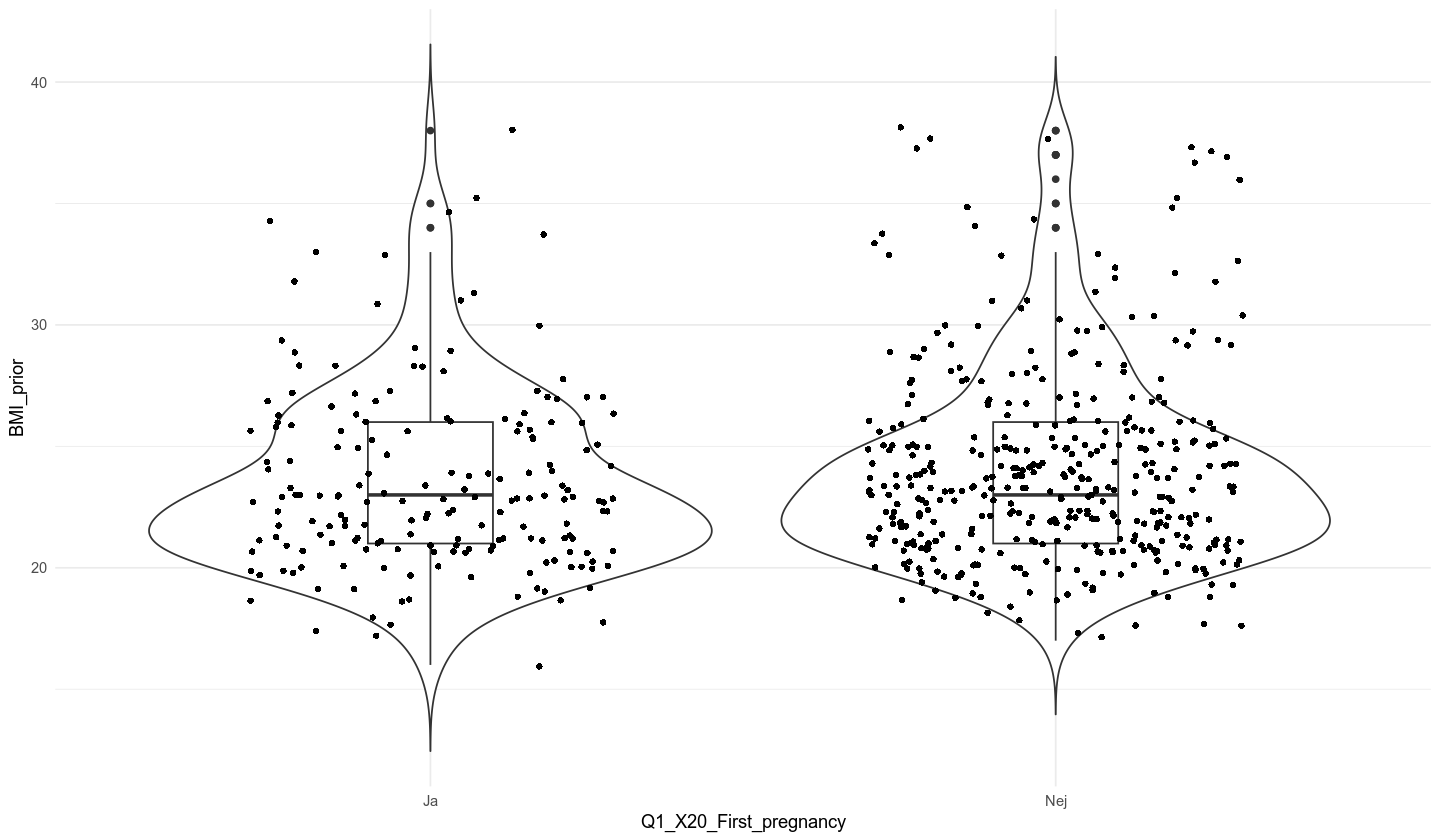

In [56]:
df_bmi <- df[df$BMI_prior < 40 ,]
dim(df_bmi)
head(df_bmi$BMI_prior, 25)
sum(is.na(df_bmi$BMI_prior))
df_bmi1 <- df_bmi[!is.na(df_bmi$BMI_prior),]
dim(df_bmi1)
b6 <- ggplot(df_bmi1, aes(Q1_X20_First_pregnancy , BMI_prior)) 

 b6 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


#options(repr.plot.width=12)

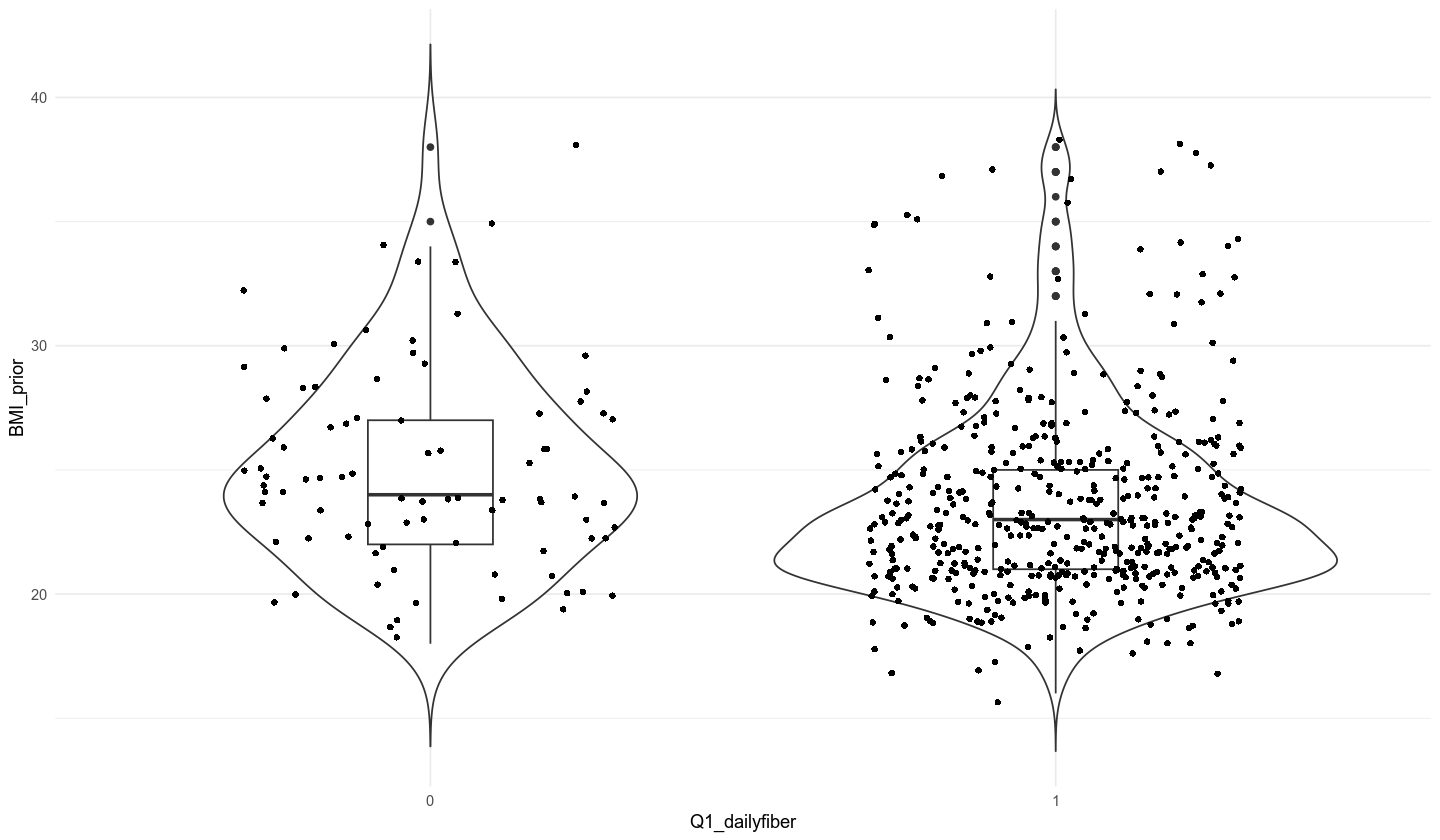

In [57]:
#daily fiber bmi
b6 <- ggplot(df_bmi1, aes(Q1_dailyfiber , BMI_prior)) 

 b6 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


#options(repr.plot.width=12)

[1] 596  27

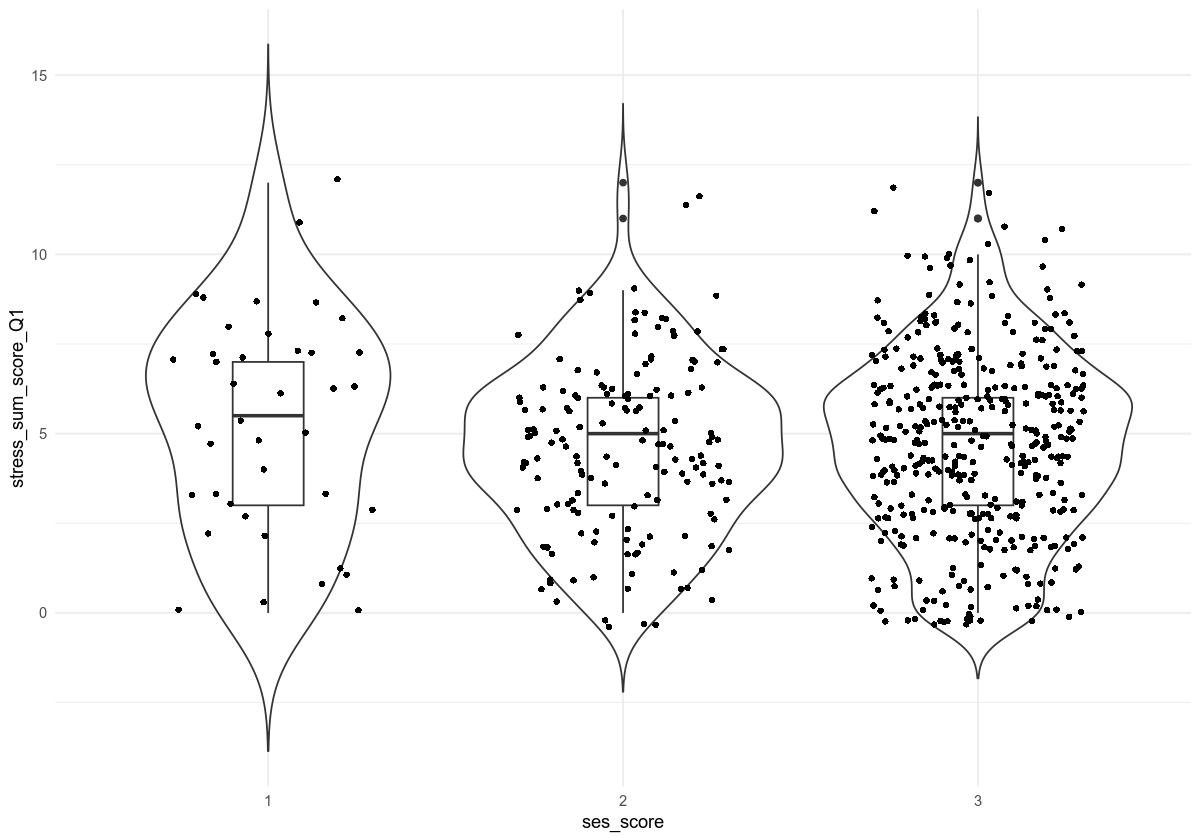

In [81]:
#ses_score _depression stress_sum_score_Q1/Depression_score_sum_Q1
dim(df_v1)
b6 <- ggplot(df_v1, aes(ses_score , stress_sum_score_Q1)) 

 b6 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


#options(repr.plot.width=12)

[1] 596  27

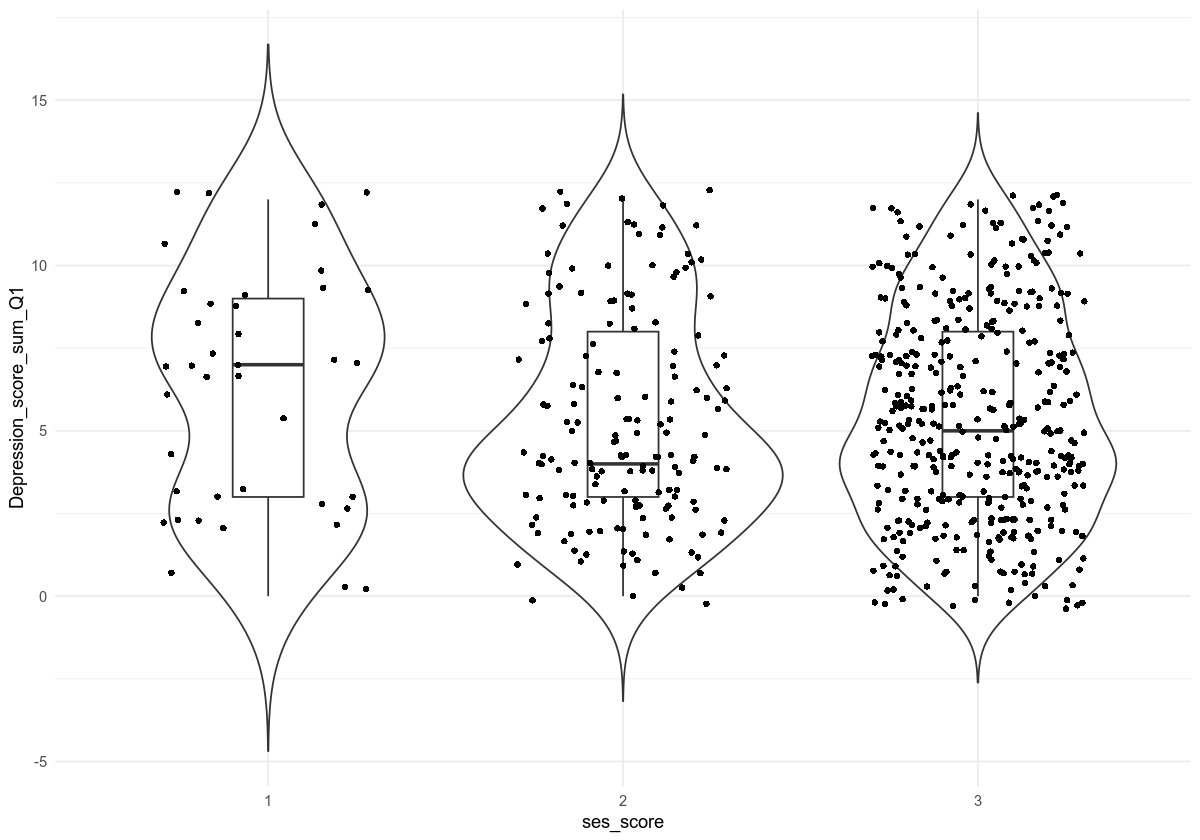

In [82]:
#ses_score _depression stress_sum_score_Q1/Depression_score_sum_Q1
dim(df_v1)
b6 <- ggplot(df_v1, aes(ses_score , Depression_score_sum_Q1)) 

 b6 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


#options(repr.plot.width=12)

[1] 588  27

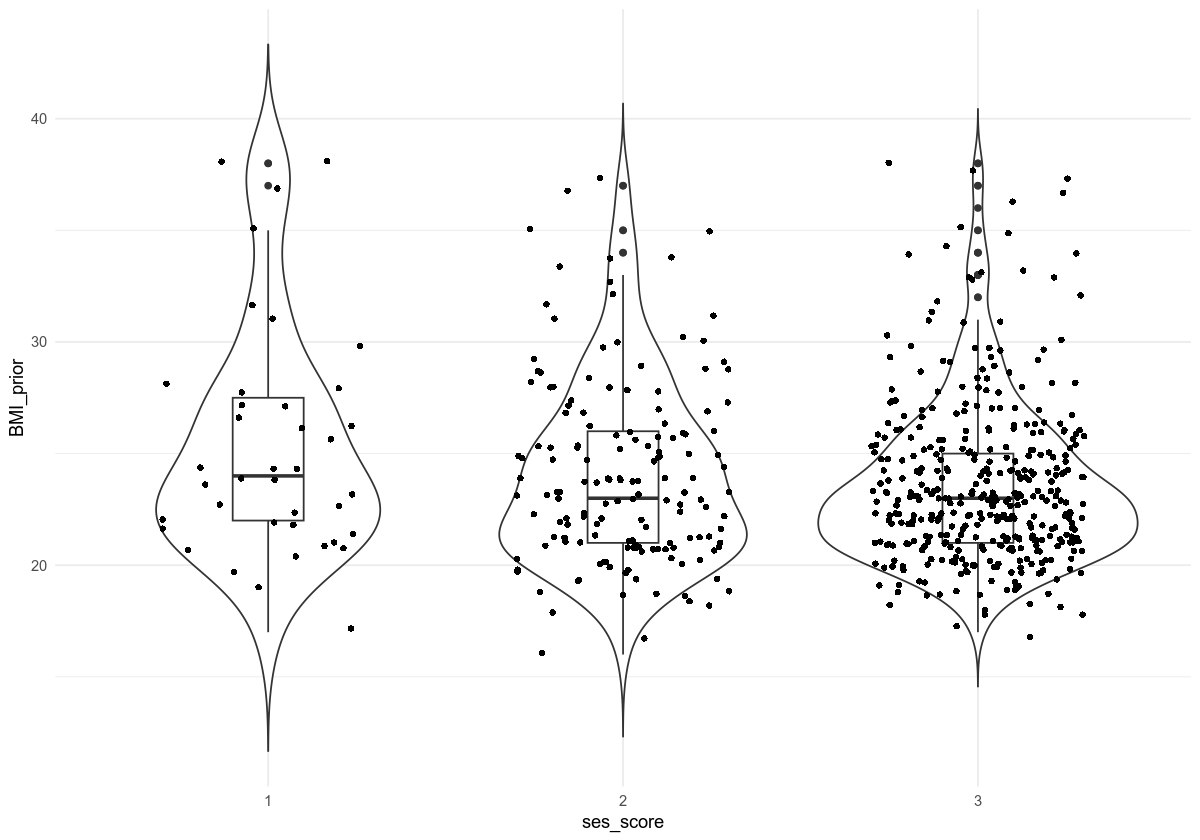

In [84]:
#ses_score _depression stress_sum_score_Q1/Depression_score_sum_Q1
dim(df_bmi1)
b6 <- ggplot(df_bmi1, aes(ses_score , BMI_prior)) 

 b6 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


#options(repr.plot.width=12)

In [20]:

b3 + theme(
  plot.title = element_text(size = 20),  # Title size
  axis.title.x = element_text(size = 14),  # X-axis label size
  axis.title.y = element_text(size = 16),  # Y-axis label size
  axis.text.x = element_text(size = 14),  # X-axis tick label size
  axis.text.y = element_text(size = 14),  # Y-axis tick label size
  legend.title = element_text(size = 12),  # Legend title size
  legend.text = element_text(size = 12),  # Legend text size
  plot.margin = margin(0.5, 0.5, 0.5, 0.5, unit = "cm"),  # Adjust plot margins
  plot.background = element_rect(fill = "white"),  # Background color
  panel.background = element_rect(fill = "white"),  # Panel background color
  panel.grid.major = element_line(color = "gray", size = 0.2),  # Major grid lines
  panel.grid.minor = element_blank()  # Minor grid lines (remove them)
)

ERROR: Error in eval(expr, envir, enclos): object 'b3' not found


# sactterplot

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


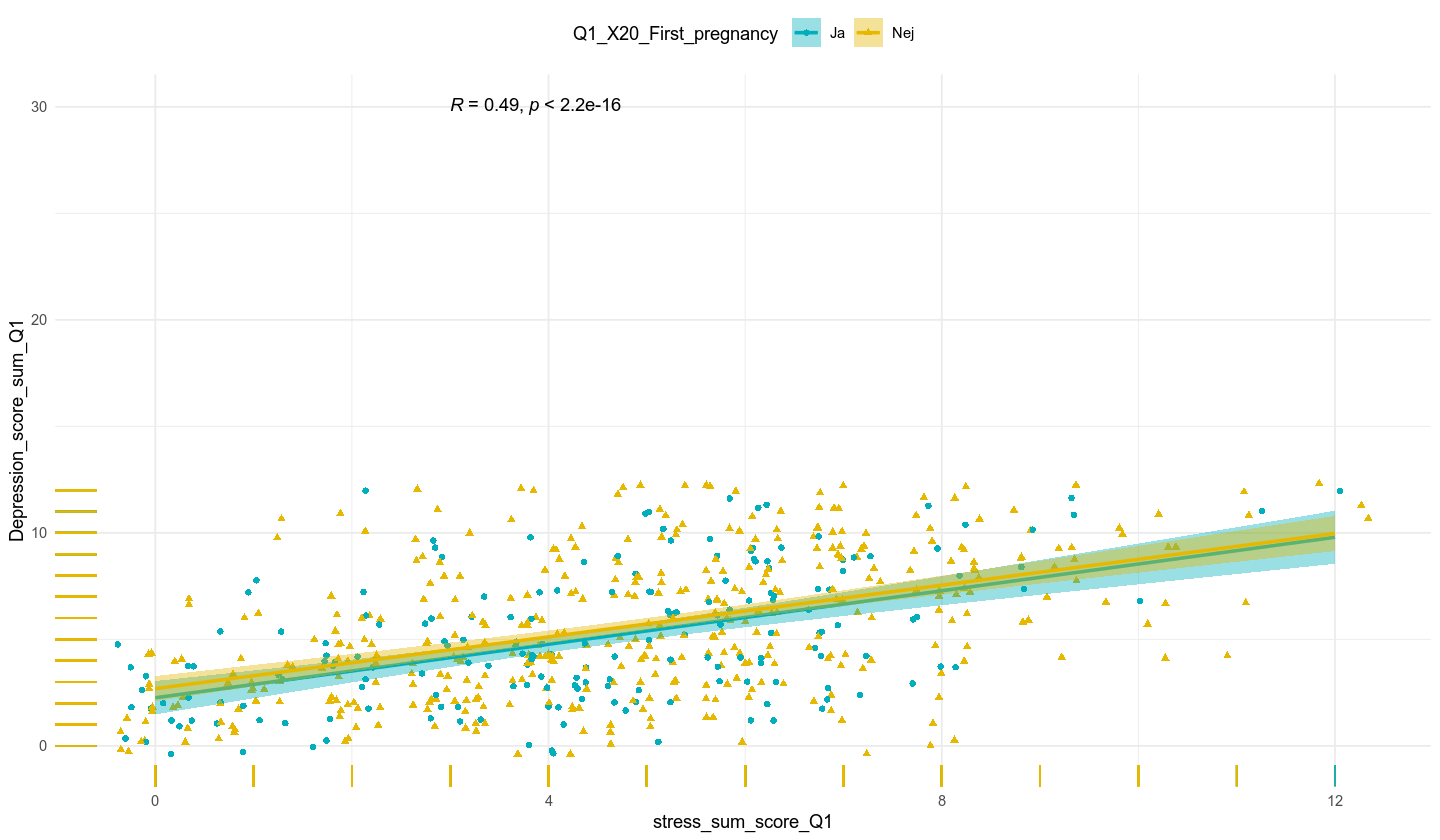

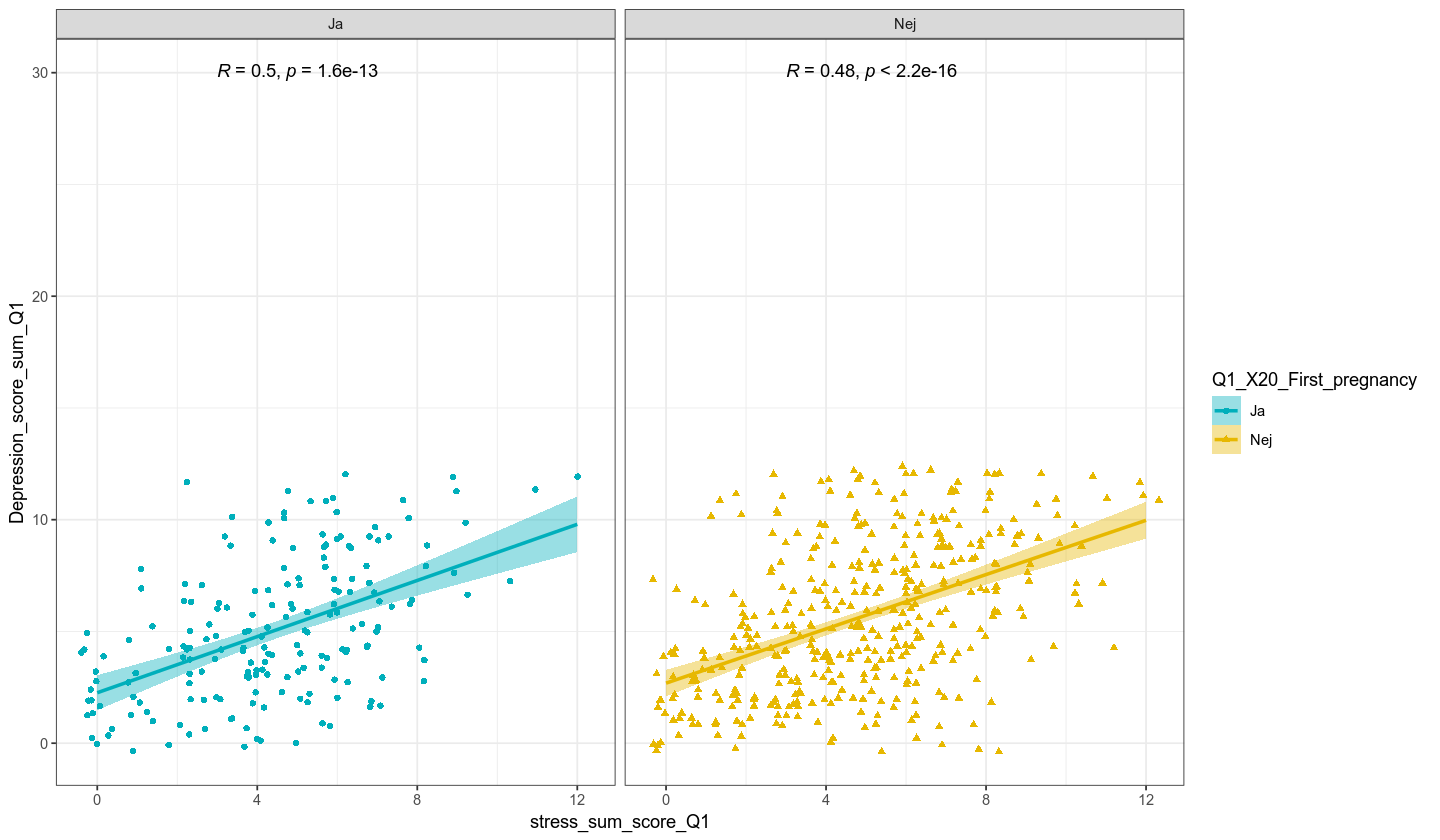

In [159]:

#group by first pregnancy 

b <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (Q1_X20_First_pregnancy)
b + geom_point(position = position_jitter(width = 0.4, height = 0.4), aes(color = Q1_X20_First_pregnancy , shape = Q1_X20_First_pregnancy ))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy , fill = Q1_X20_First_pregnancy), method = "lm") +
      stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  geom_rug(aes(color = Q1_X20_First_pregnancy)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b + geom_point(position = position_jitter(width = 0.4, height = 0.4), aes(color = Q1_X20_First_pregnancy, shape = Q1_X20_First_pregnancy))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy, fill = Q1_X20_First_pregnancy), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~Q1_X20_First_pregnancy) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()
options(repr.plot.width=12)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


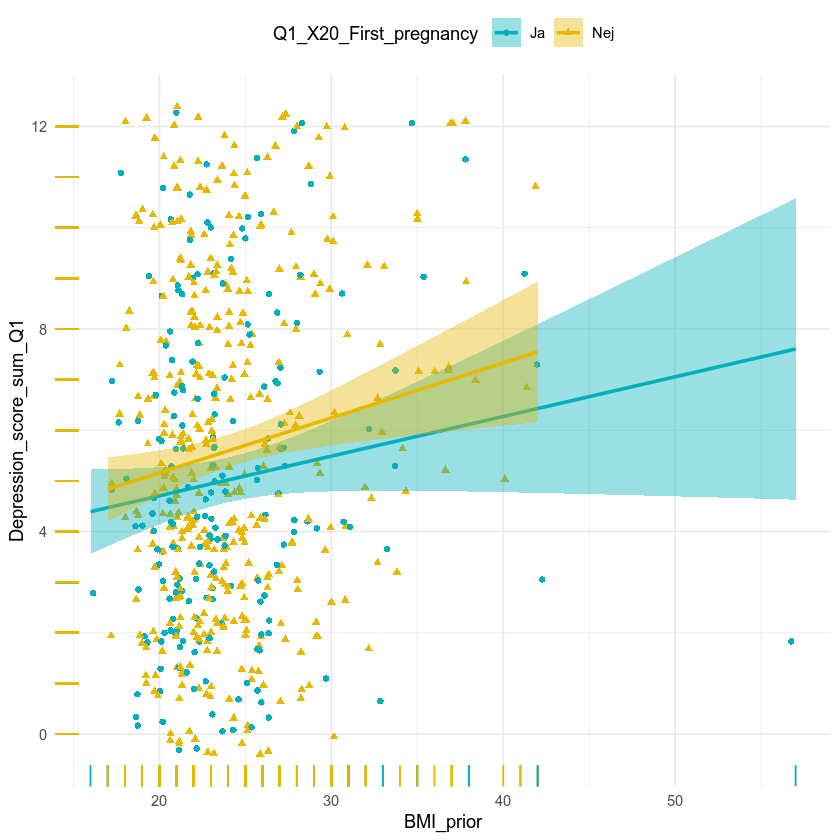

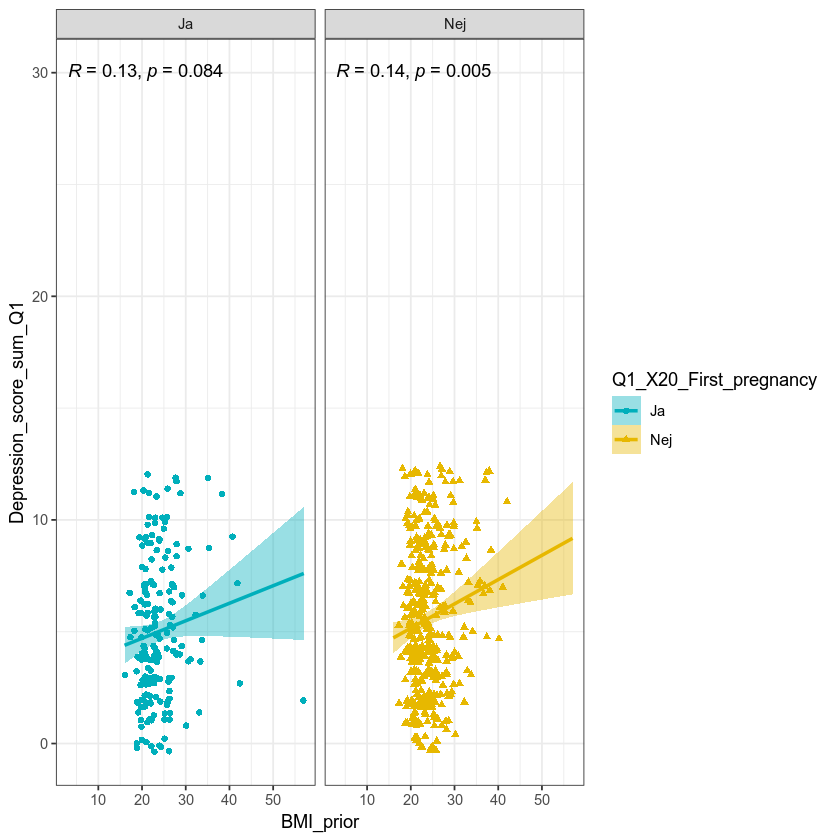

In [80]:

#group by first pregnancy 

a <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_X20_First_pregnancy)
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X20_First_pregnancy , shape = Q1_X20_First_pregnancy ))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy , fill = Q1_X20_First_pregnancy), method = "lm") +
  geom_rug(aes(color = Q1_X20_First_pregnancy)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X20_First_pregnancy, shape = Q1_X20_First_pregnancy))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy, fill = Q1_X20_First_pregnancy), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~Q1_X20_First_pregnancy) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()


In [83]:
df_bmi <- df[df$BMI_prior < 40 ,]
dim(df_bmi)
head(df_bmi$BMI_prior, 25)
sum(is.na(df_bmi$BMI_prior))
df_bmi1 <- df_bmi[!is.na(df_bmi$BMI_prior),]
dim(df_bmi1)
# i did not have NA previously , but what did just happen here?????? 

[1] 589  27

[1] 23 23 23 38 19 21 28 21 21 24 25 23 22 21 21 25 28 23 24 24 20 24 22 23 30

[1] 1

[1] 588  27

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


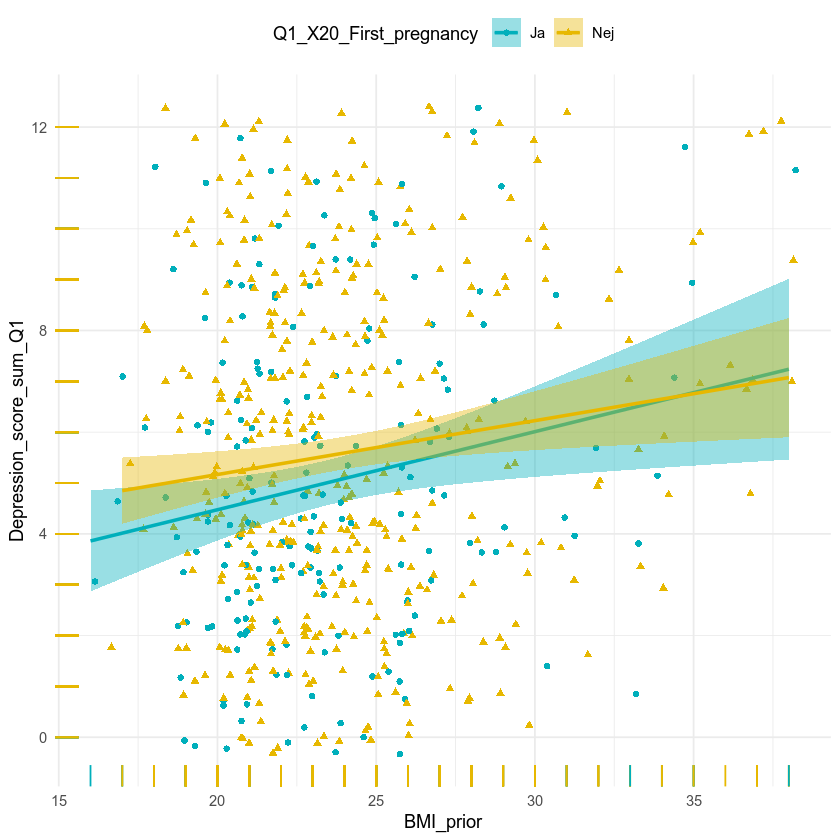

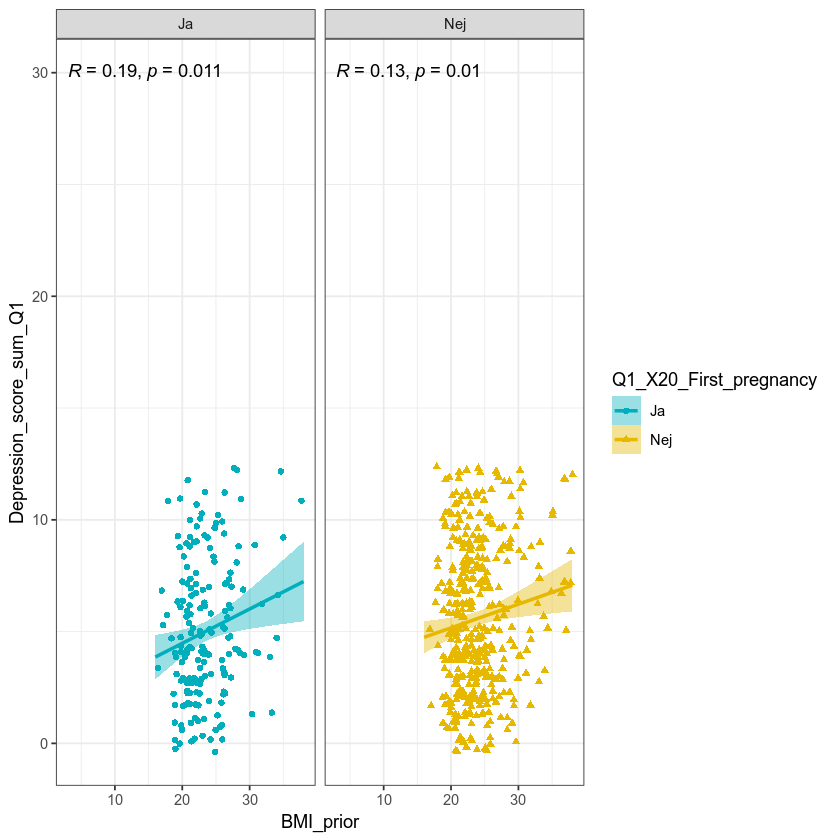

In [84]:

#group by first pregnancy 

a1 <- ggplot(df_bmi1, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_X20_First_pregnancy)
a1 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X20_First_pregnancy , shape = Q1_X20_First_pregnancy ))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy , fill = Q1_X20_First_pregnancy), method = "lm") +
  geom_rug(aes(color = Q1_X20_First_pregnancy)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a1 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X20_First_pregnancy, shape = Q1_X20_First_pregnancy))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy, fill = Q1_X20_First_pregnancy), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~Q1_X20_First_pregnancy) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


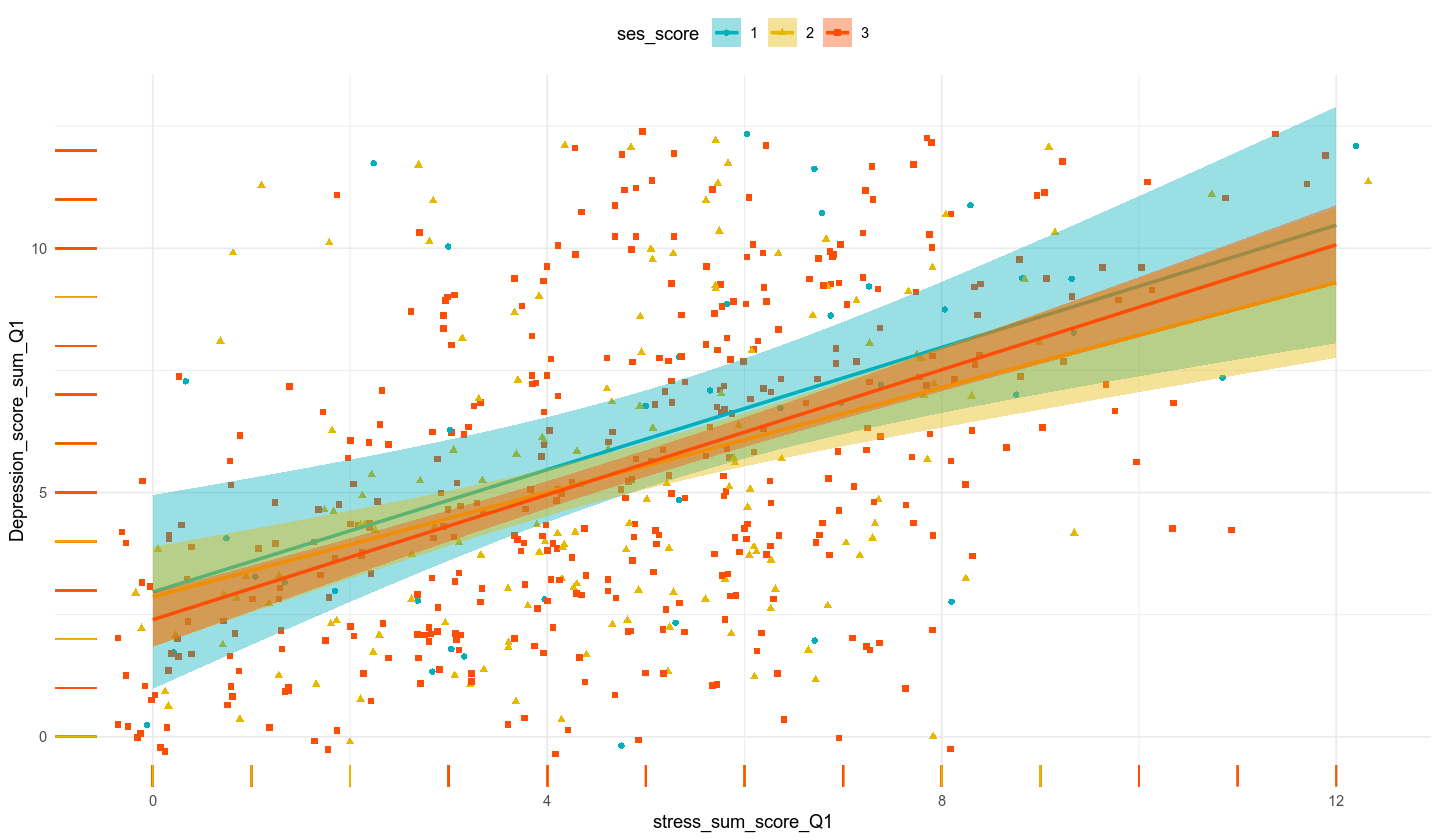

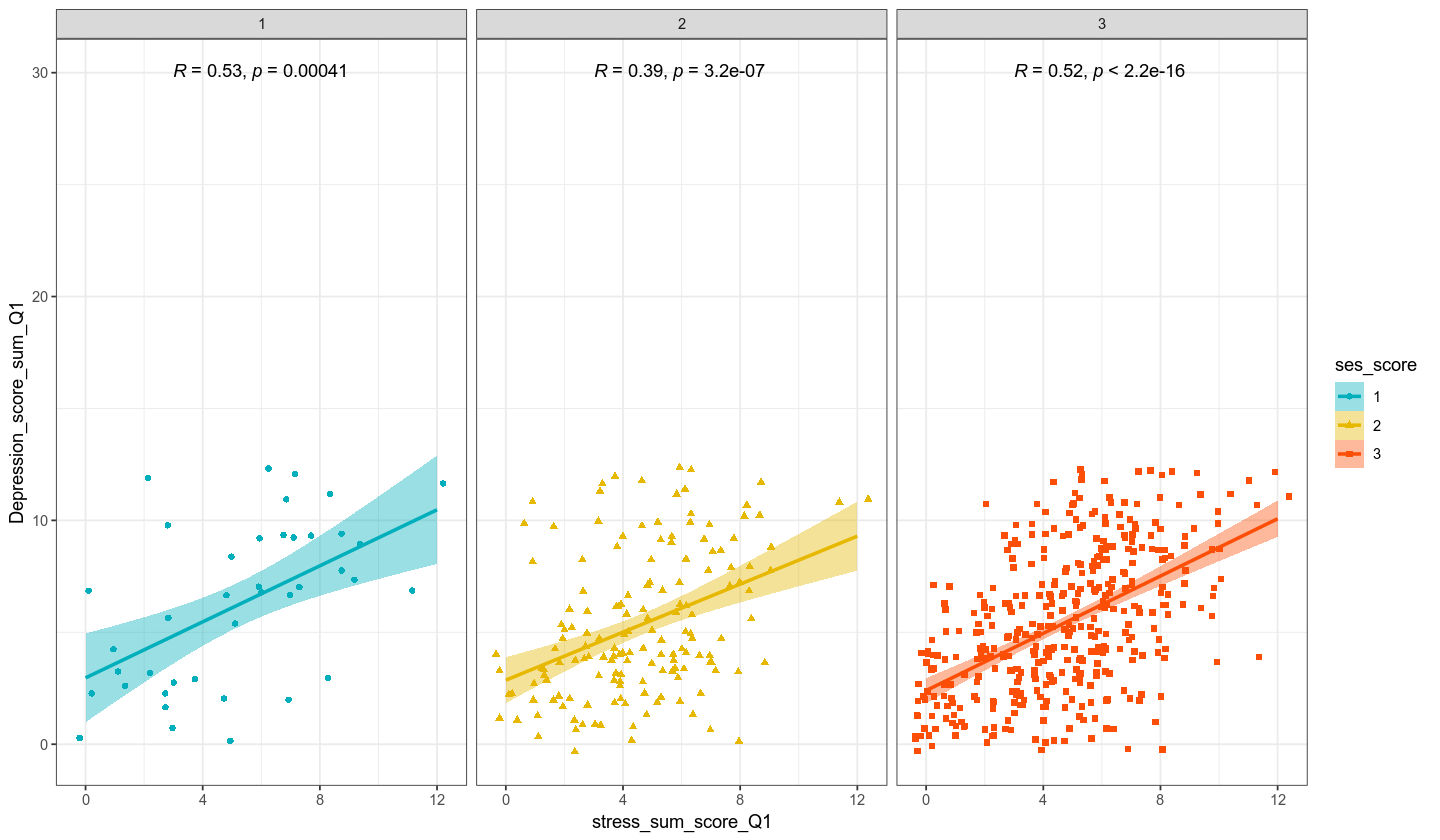

In [160]:

#group by ses_score 

b <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (ses_score)
b + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = ses_score , shape = ses_score ))+
  geom_smooth(aes(color = ses_score , fill = ses_score), method = "lm") +
  geom_rug(aes(color = ses_score)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = ses_score, shape = ses_score))+
  geom_smooth(aes(color = ses_score, fill = ses_score), 
              method = "lm", fullrange = TRUE) + 
 stat_cor(method = "pearson", label.x = 3, label.y = 30) +
  facet_wrap(~ses_score) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()
options(repr.plot.width=12)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


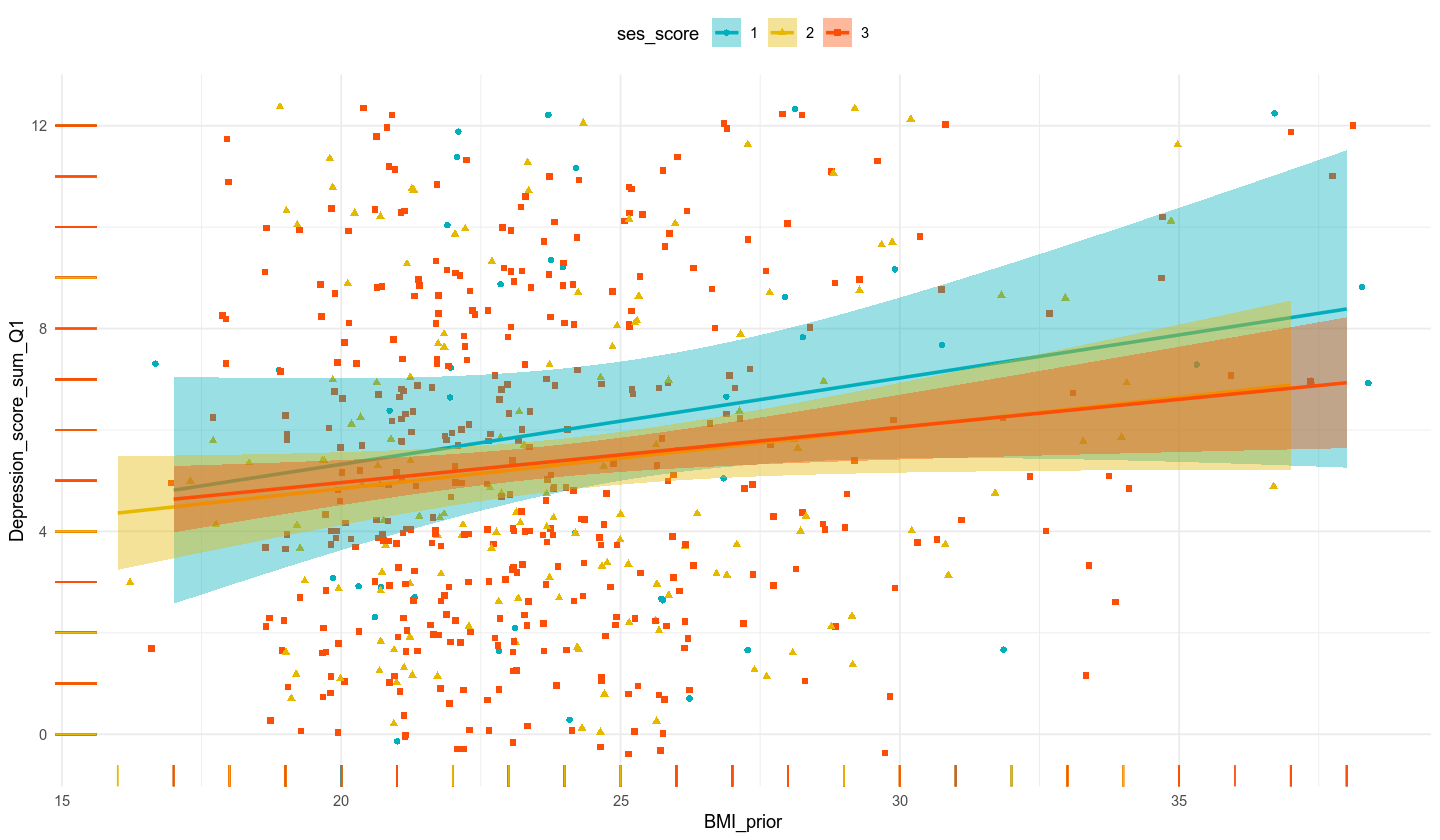

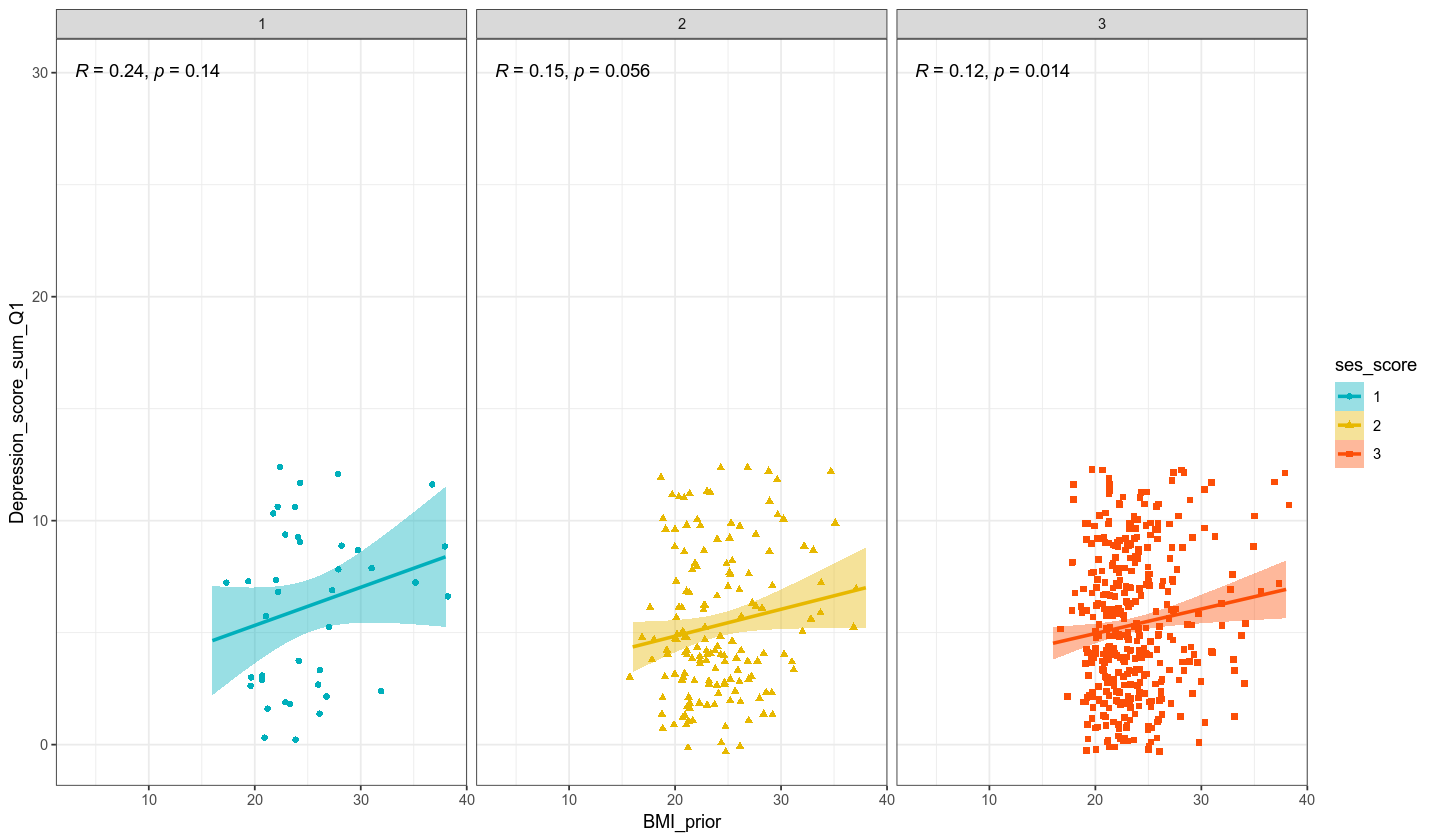

In [166]:
#excluded those with more than 40 bmi
#group by ses_score 

a <- ggplot(df_bmi1, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (ses_score)
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = ses_score , shape = ses_score ))+
  geom_smooth(aes(color = ses_score , fill = ses_score), method = "lm") +
  geom_rug(aes(color = ses_score)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = ses_score, shape = ses_score))+
  geom_smooth(aes(color = ses_score, fill = ses_score), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) + 
  facet_wrap(~ses_score) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()
options(repr.plot.width=12)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


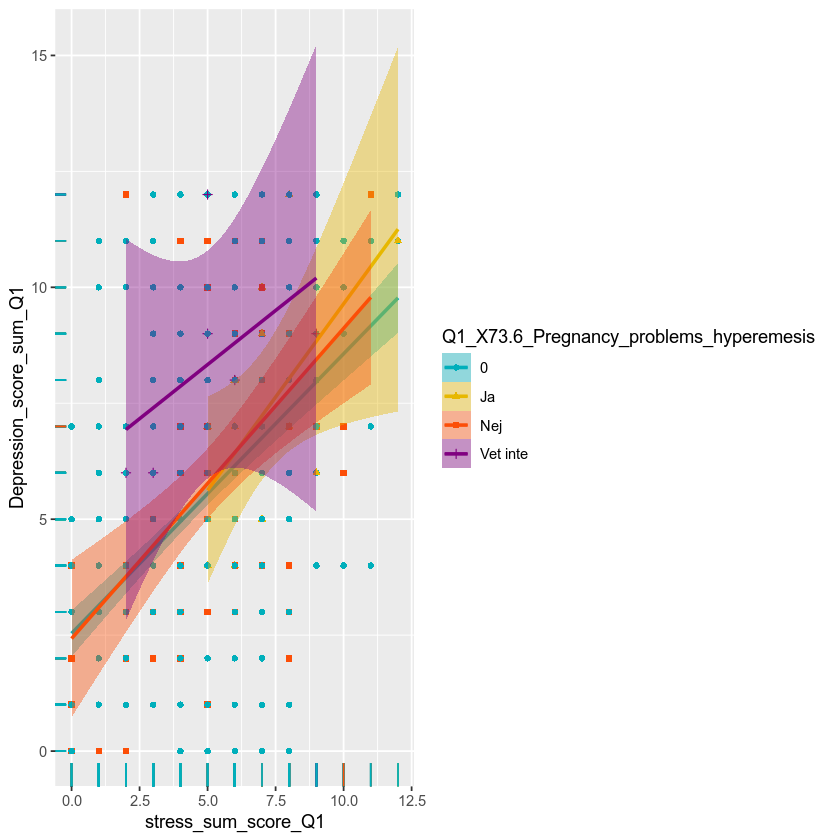

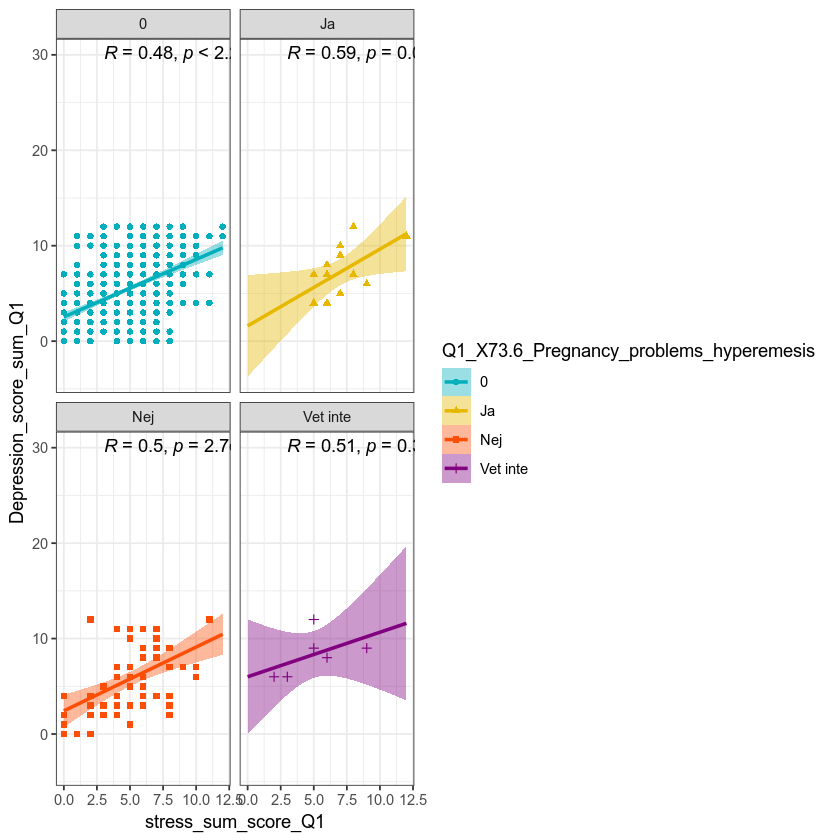

In [68]:
# group by hyperemesis

b_1 <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (hyperemesis)
b_1 + geom_point(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , shape = Q1_X73.6_Pregnancy_problems_hyperemesis ))+
  geom_smooth(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , fill = Q1_X73.6_Pregnancy_problems_hyperemesis), method = "lm") +
  geom_rug(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
b_1 + geom_point(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , shape = Q1_X73.6_Pregnancy_problems_hyperemesis))+
  geom_smooth(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , fill = Q1_X73.6_Pregnancy_problems_hyperemesis), 
              method = "lm", fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q1_X73.6_Pregnancy_problems_hyperemesis ) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080")) +
  theme_bw()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


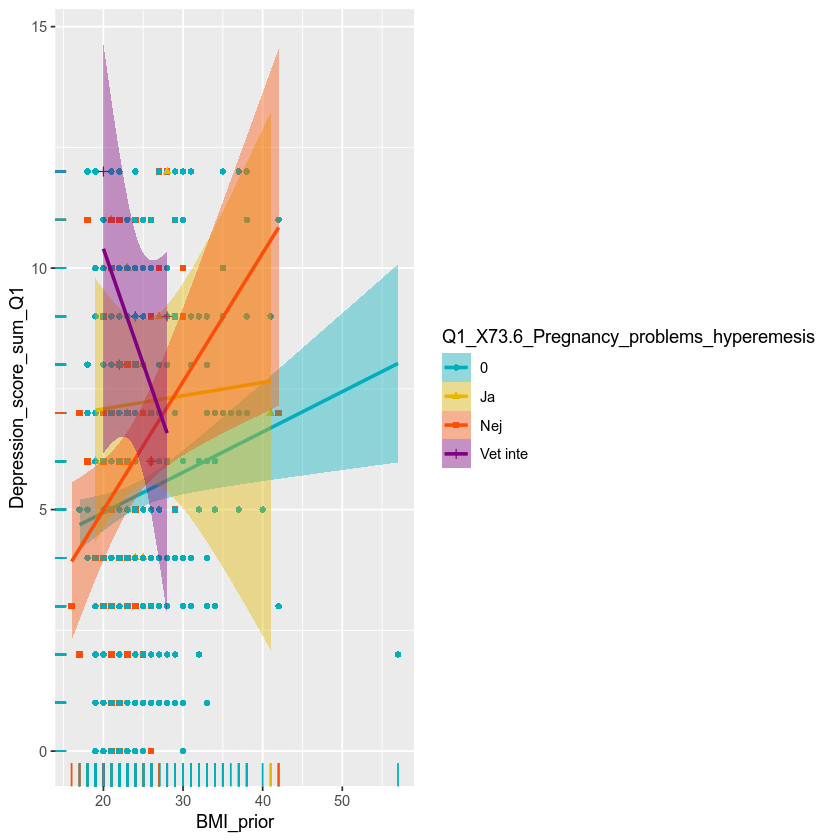

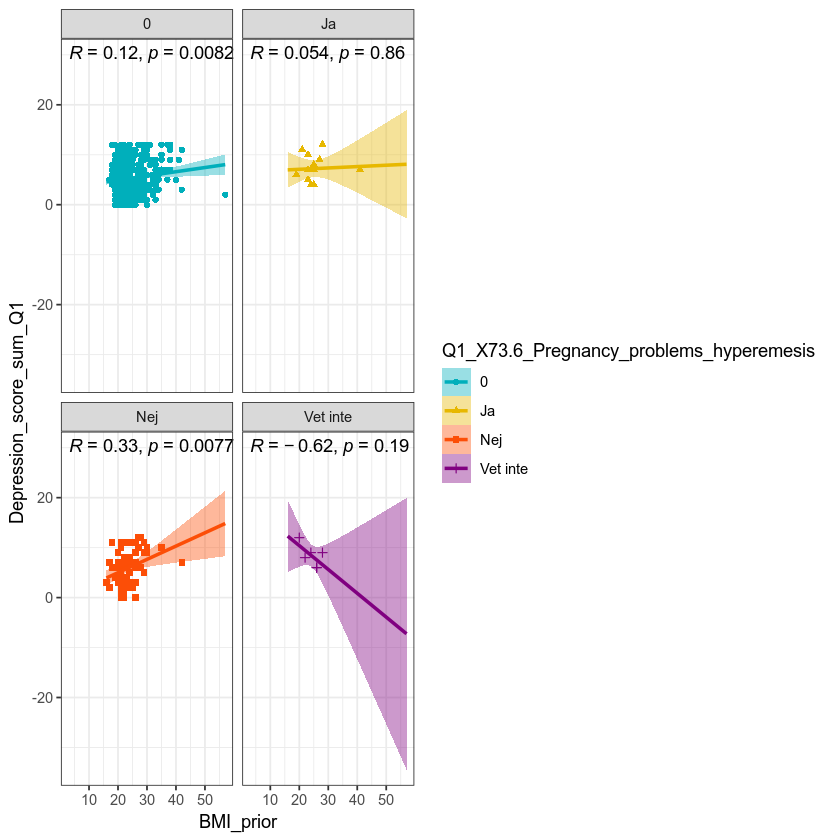

In [54]:
# group by hyperemesis

a_1 <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (hyperemesis)
a_1 + geom_point(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , shape = Q1_X73.6_Pregnancy_problems_hyperemesis ))+
  geom_smooth(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , fill = Q1_X73.6_Pregnancy_problems_hyperemesis), method = "lm") +
  geom_rug(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
a_1 + geom_point(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , shape = Q1_X73.6_Pregnancy_problems_hyperemesis))+
  geom_smooth(aes(color = Q1_X73.6_Pregnancy_problems_hyperemesis , fill = Q1_X73.6_Pregnancy_problems_hyperemesis), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q1_X73.6_Pregnancy_problems_hyperemesis ) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080")) +
  theme_bw()


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


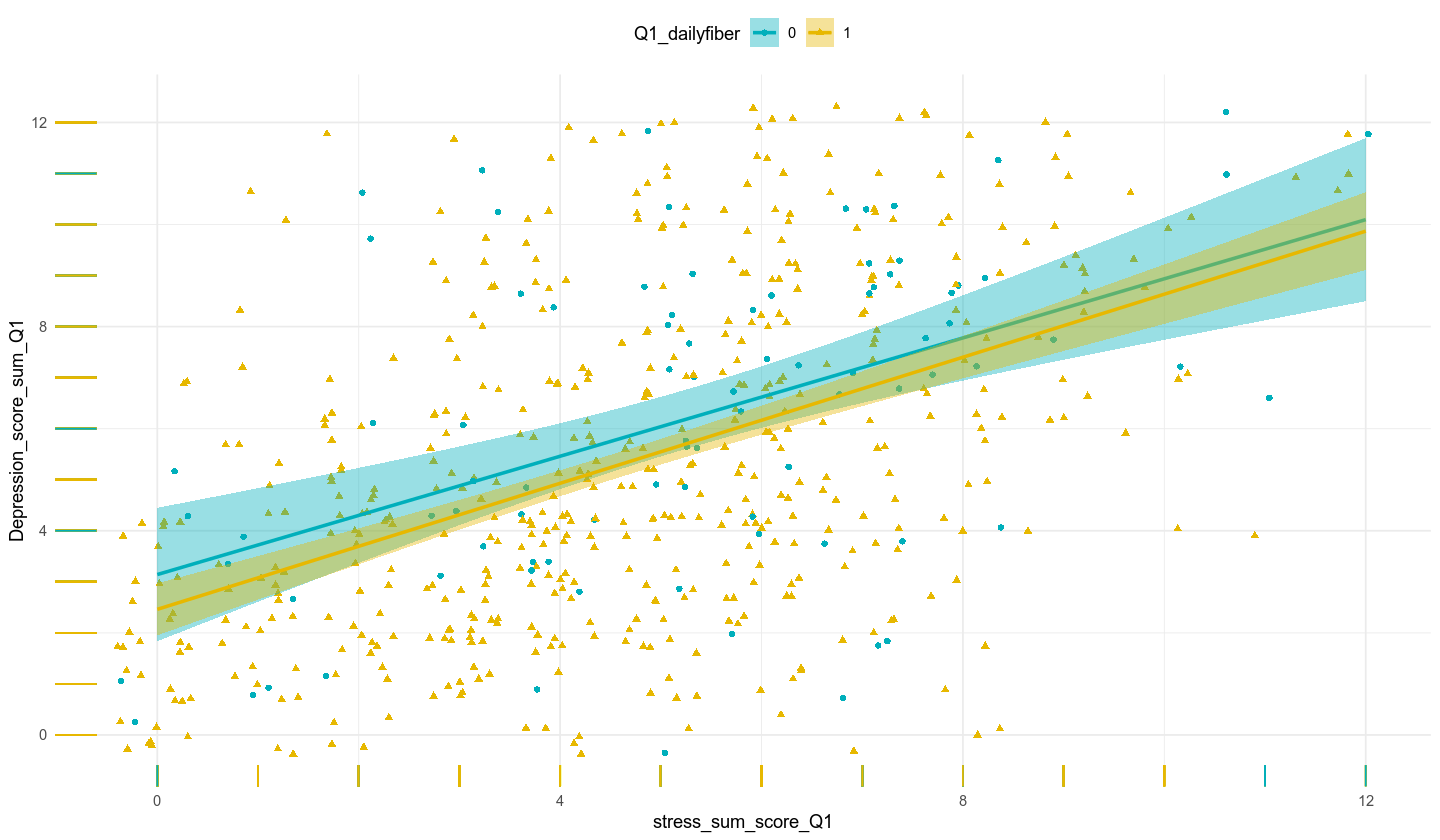

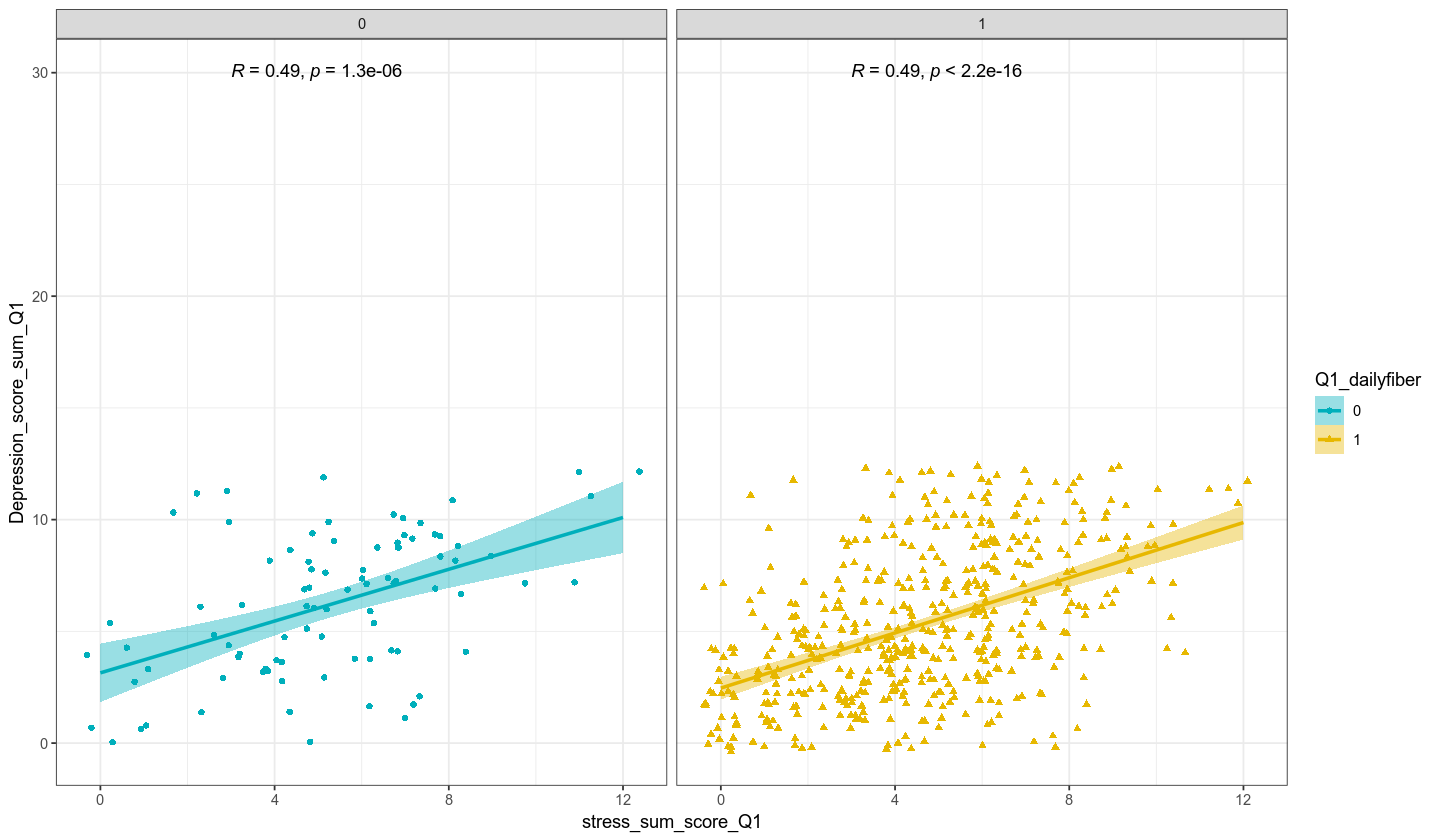

In [167]:
# Q1_dailyfiber

b <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (Q1_dailyfiber)
b + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_dailyfiber , shape = Q1_dailyfiber ))+
  geom_smooth(aes(color = Q1_dailyfiber , fill = Q1_dailyfiber), method = "lm") +
  geom_rug(aes(color = Q1_dailyfiber )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b + geom_point(position = position_jitter(width = 0.4, height = 0.4), aes(color = Q1_dailyfiber , shape = Q1_dailyfiber))+
  geom_smooth(aes(color = Q1_dailyfiber, fill = Q1_dailyfiber), 
              method = "lm", fullrange = TRUE) +
   stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~Q1_dailyfiber) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()
options(repr.plot.width=12)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


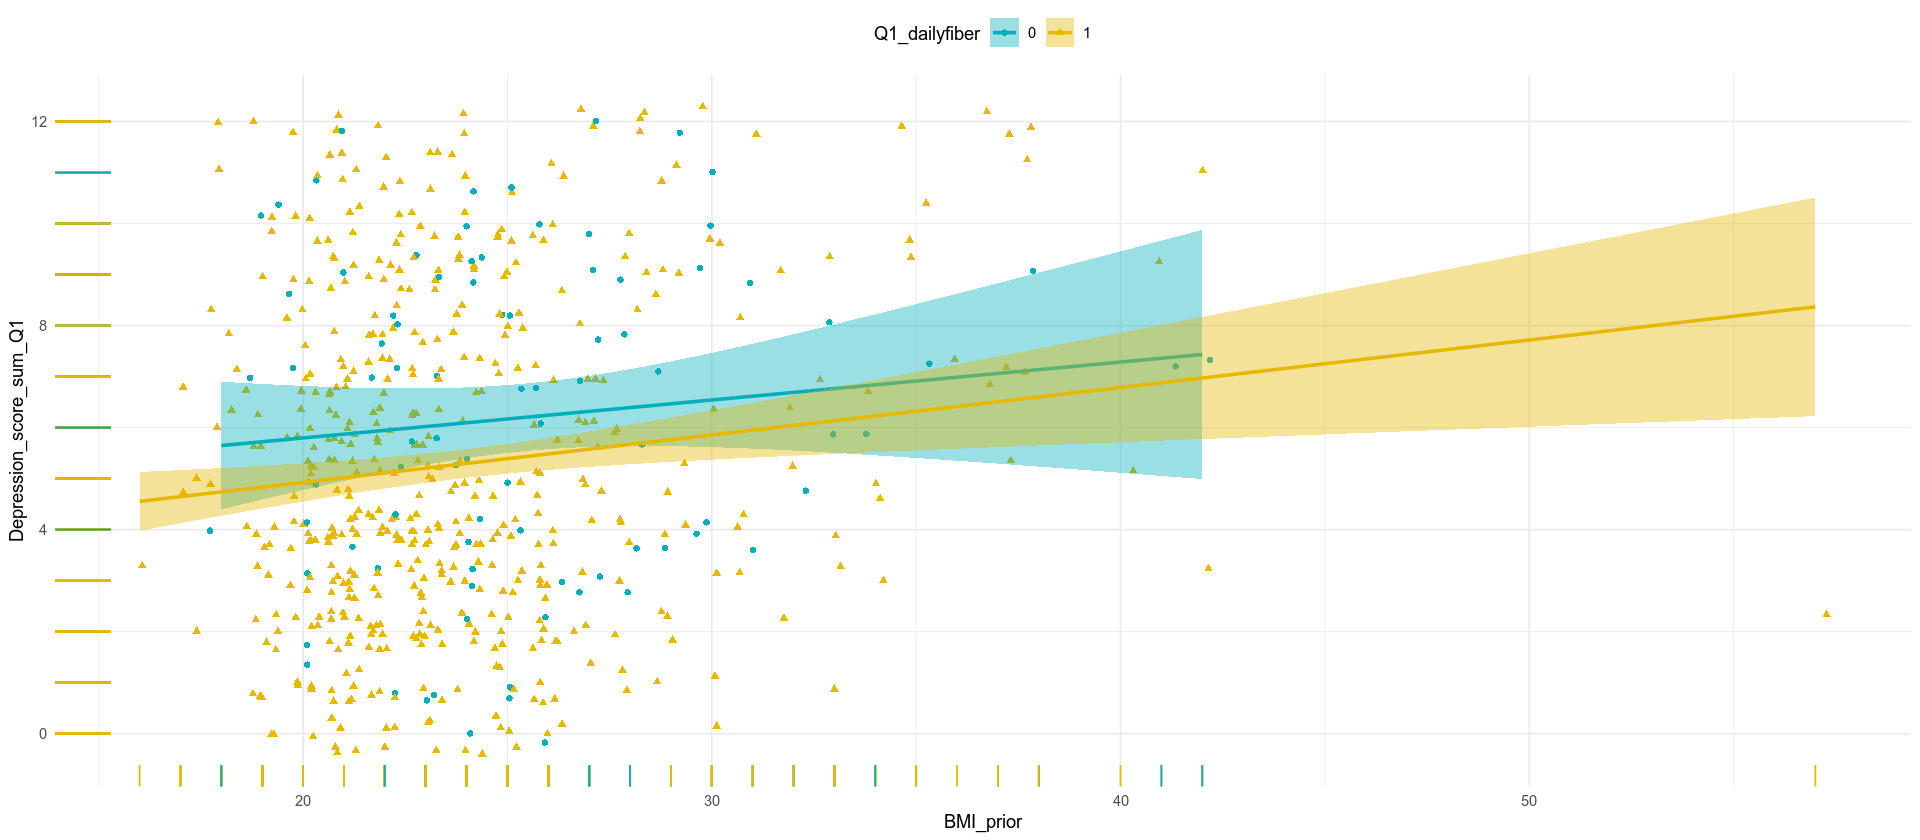

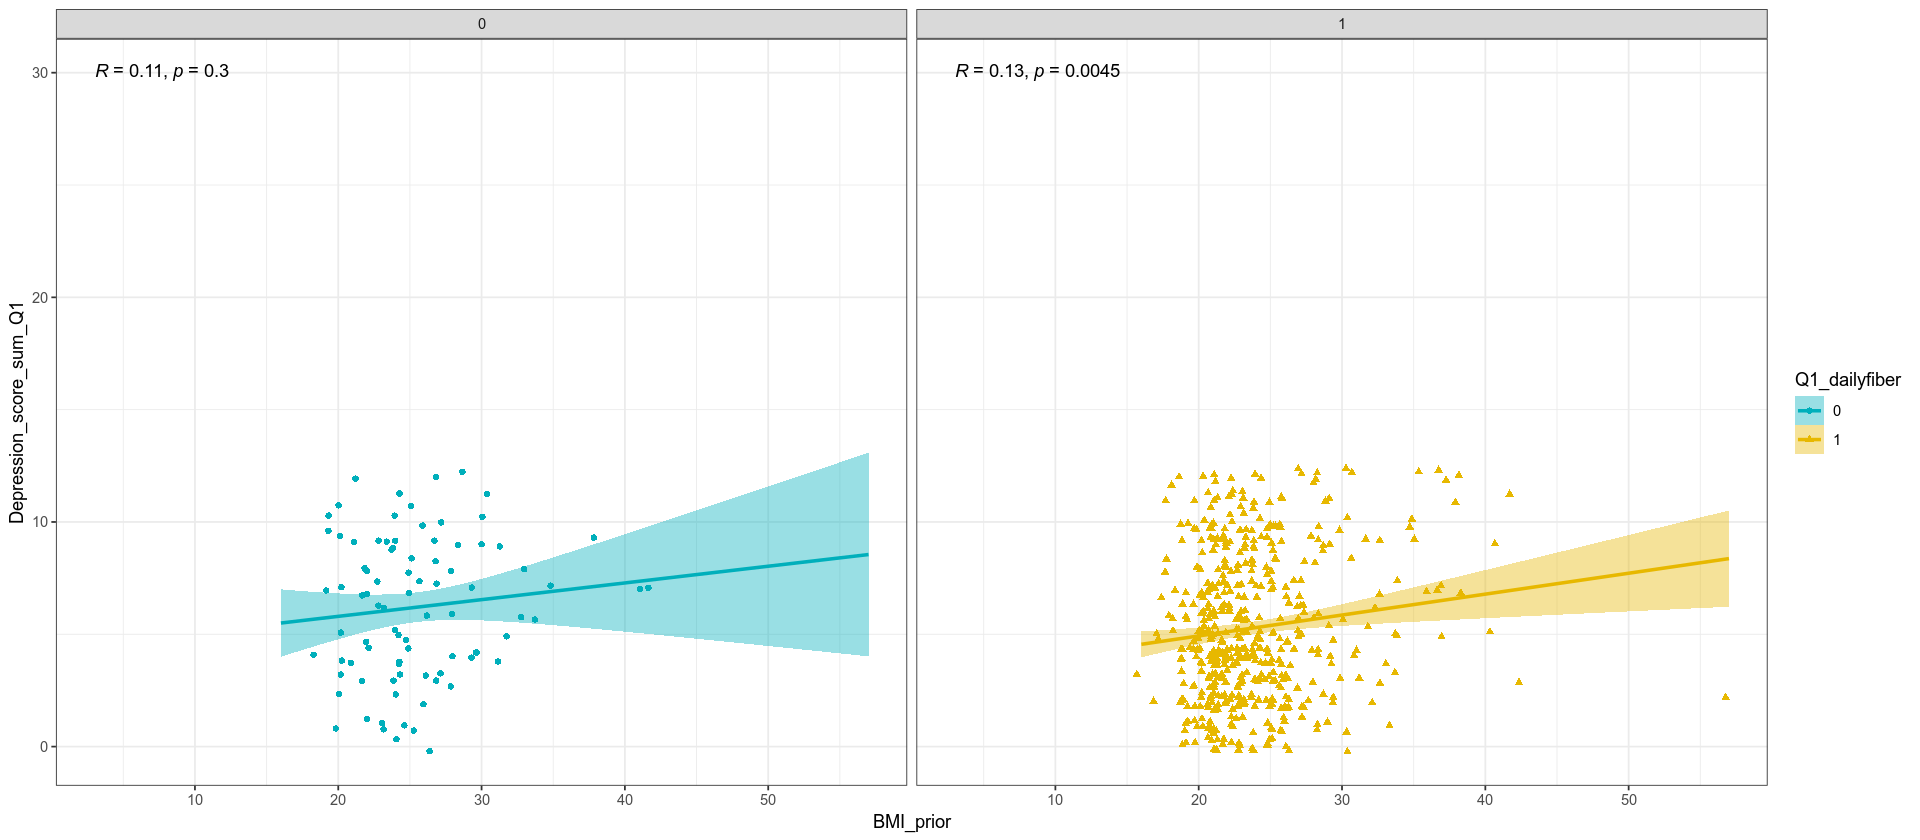

In [171]:
# Q1_dailyfiber

a <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_dailyfiber)
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_dailyfiber , shape = Q1_dailyfiber ))+
  geom_smooth(aes(color = Q1_dailyfiber , fill = Q1_dailyfiber), method = "lm") +
  geom_rug(aes(color = Q1_dailyfiber )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_dailyfiber , shape = Q1_dailyfiber))+
  geom_smooth(aes(color = Q1_dailyfiber, fill = Q1_dailyfiber), 
              method = "lm", fullrange = TRUE) + 
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~Q1_dailyfiber) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()
options(repr.plot.width=12)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


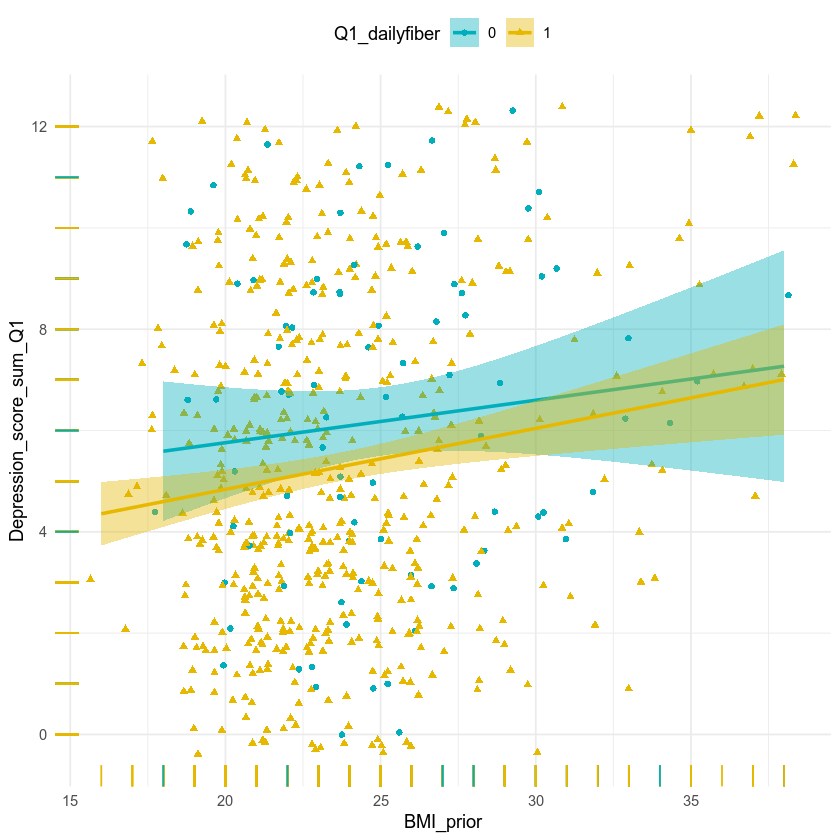

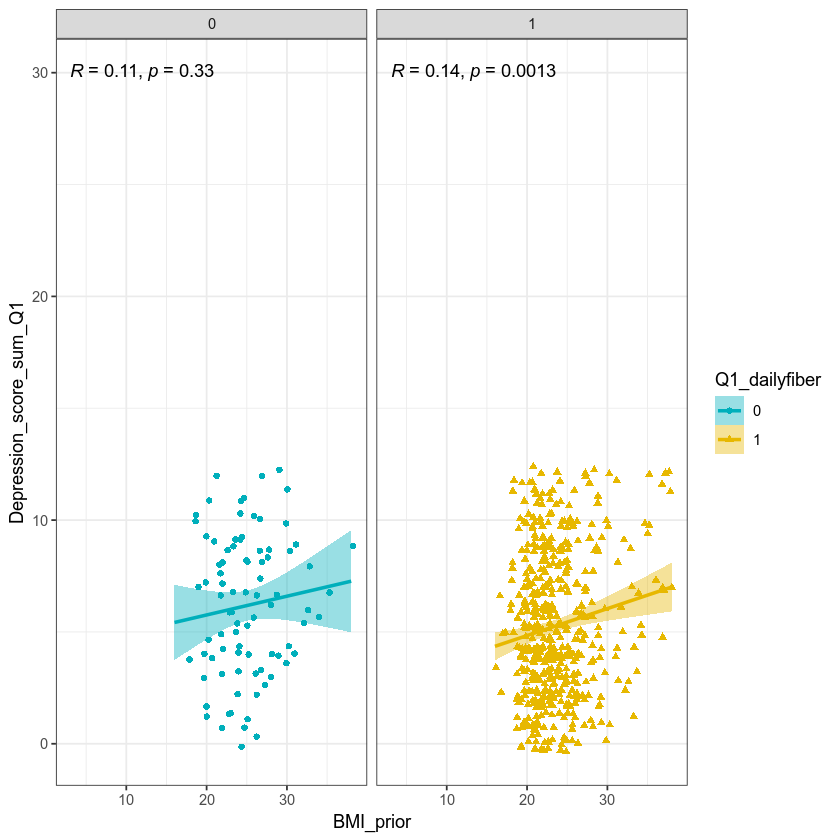

In [90]:
# Q1_dailyfiber

a <- ggplot(df_bmi1, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_dailyfiber)
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_dailyfiber , shape = Q1_dailyfiber ))+
  geom_smooth(aes(color = Q1_dailyfiber , fill = Q1_dailyfiber), method = "lm") +
  geom_rug(aes(color = Q1_dailyfiber )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_dailyfiber , shape = Q1_dailyfiber))+
  geom_smooth(aes(color = Q1_dailyfiber, fill = Q1_dailyfiber), 
              method = "lm", fullrange = TRUE) + 
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~Q1_dailyfiber) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


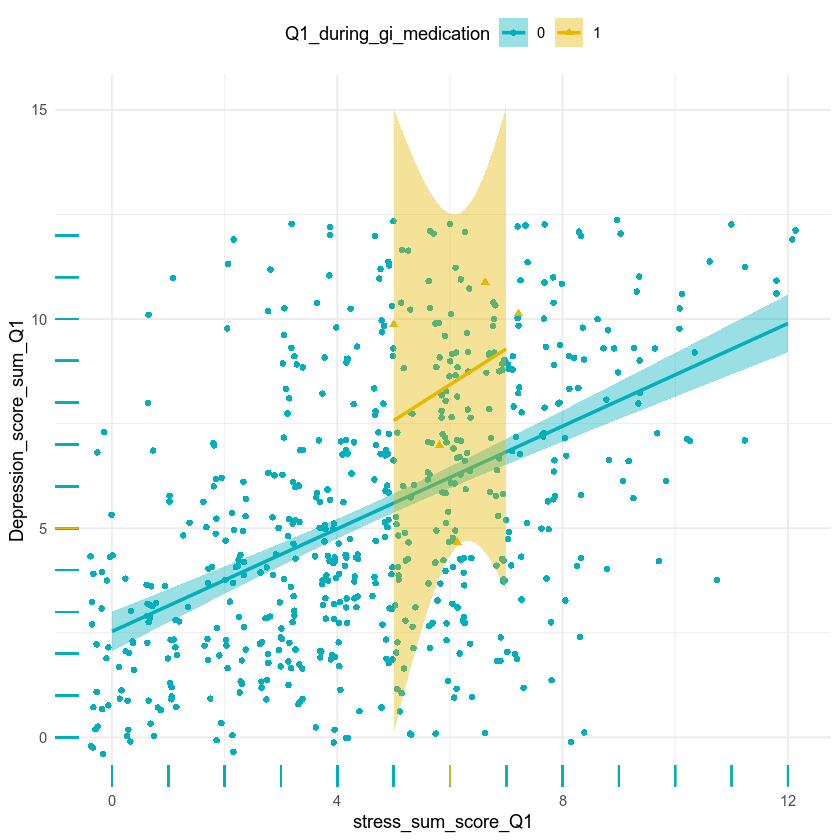

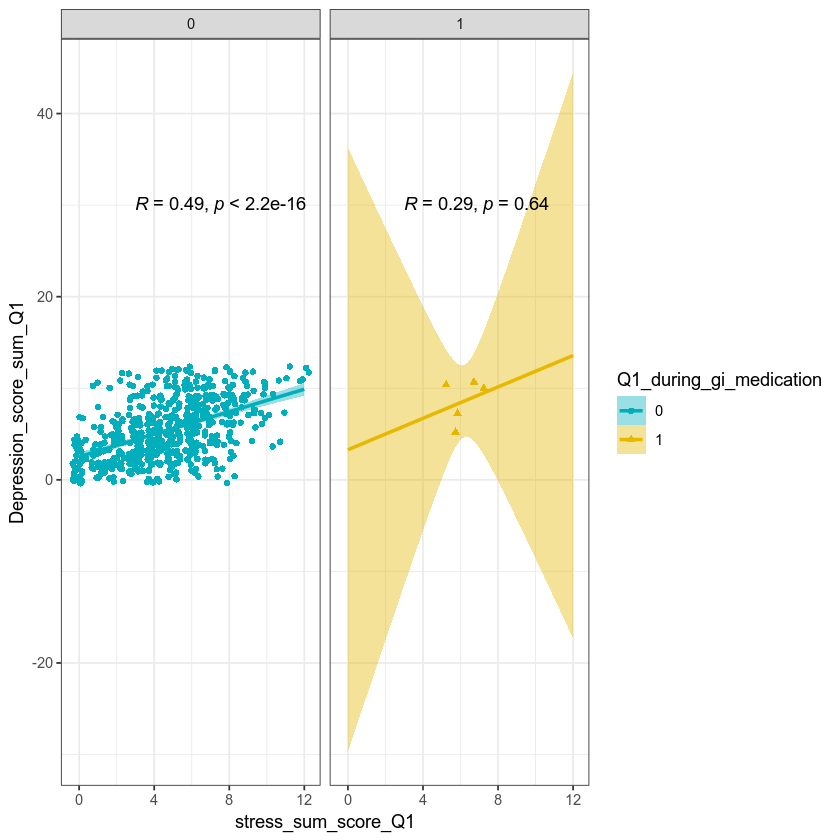

In [93]:
# Q1_gi_medication

b <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (Q1_during_gi_medication)
b + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_during_gi_medication , shape = Q1_during_gi_medication ))+
  geom_smooth(aes(color = Q1_during_gi_medication , fill = Q1_during_gi_medication), method = "lm") +
  geom_rug(aes(color = Q1_during_gi_medication )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_during_gi_medication , shape =Q1_during_gi_medication))+
  geom_smooth(aes(color = Q1_during_gi_medication, fill = Q1_during_gi_medication), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q1_during_gi_medication) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


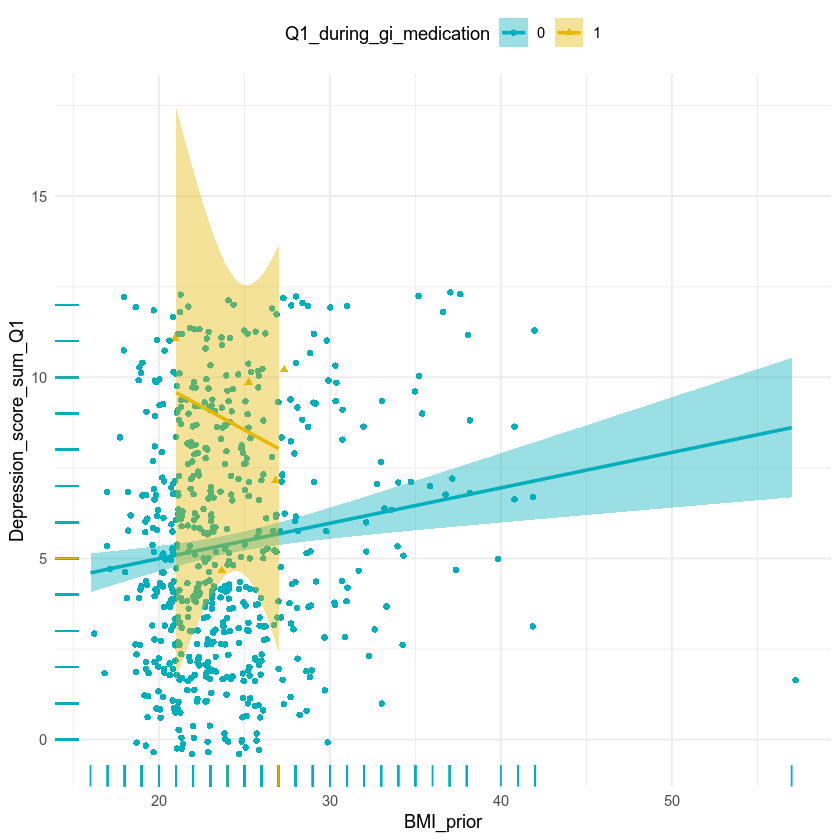

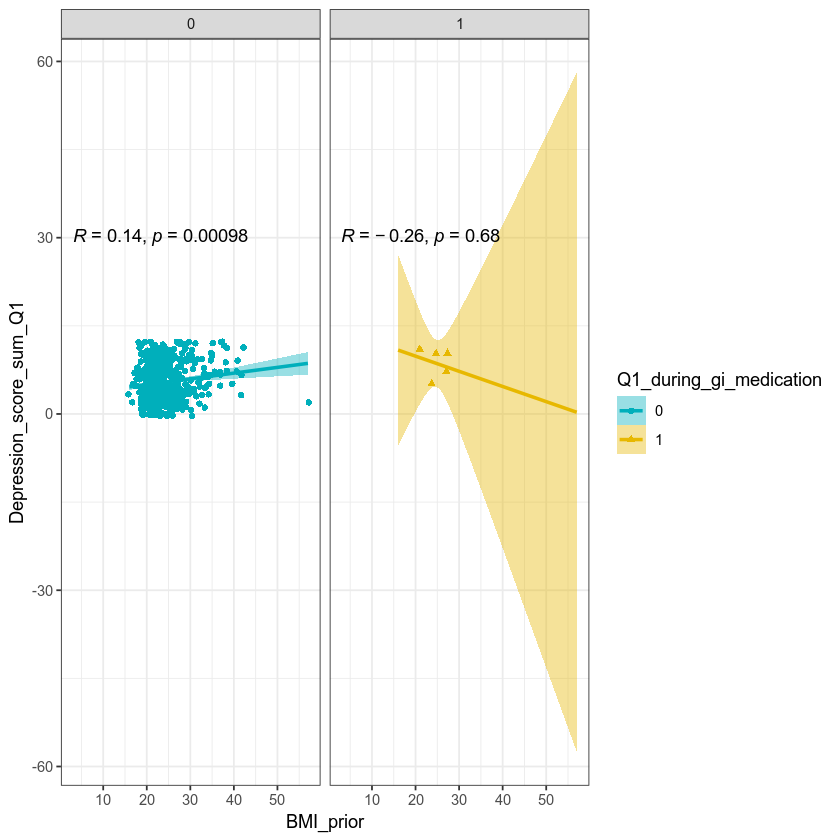

In [94]:
# Q1_gi_medication

a <- ggplot(df, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_during_gi_medication)
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_during_gi_medication , shape = Q1_during_gi_medication ))+
  geom_smooth(aes(color = Q1_during_gi_medication , fill = Q1_during_gi_medication), method = "lm") +
  geom_rug(aes(color = Q1_during_gi_medication )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_during_gi_medication , shape =Q1_during_gi_medication))+
  geom_smooth(aes(color = Q1_during_gi_medication, fill = Q1_during_gi_medication), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q1_during_gi_medication) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()

In [95]:
df_vb <- df
#df$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`
colnames(df_vb)[colnames(df_vb) == "Q1_X73.8_Pregnancy_problems_vaginal_bleeding"] <- 'vaginal_bleeding'
dim(df_vb)

[1] 596  27

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


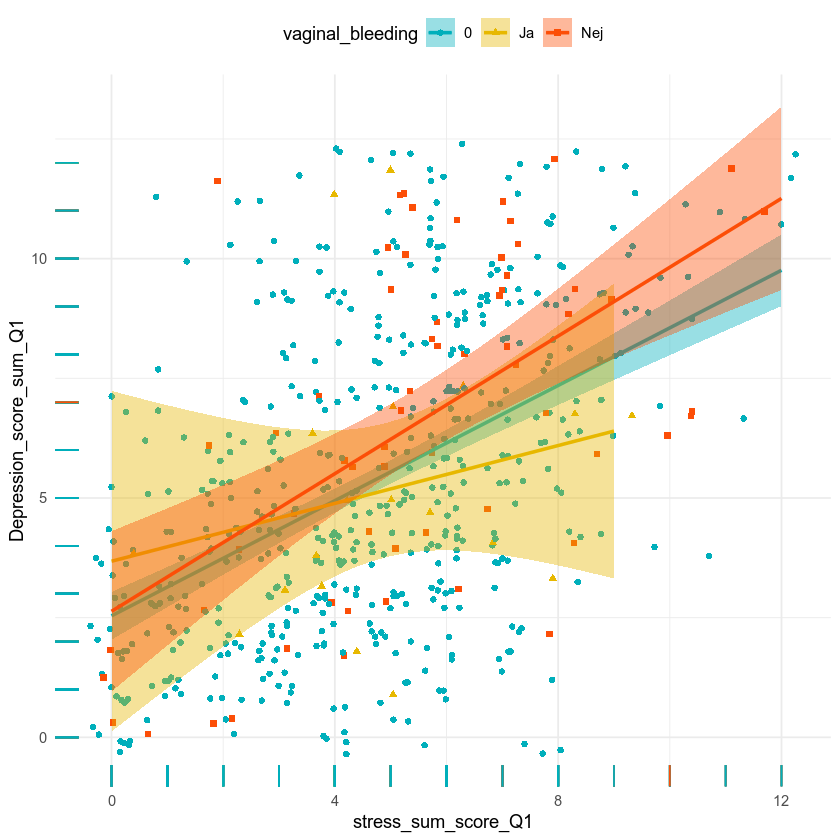

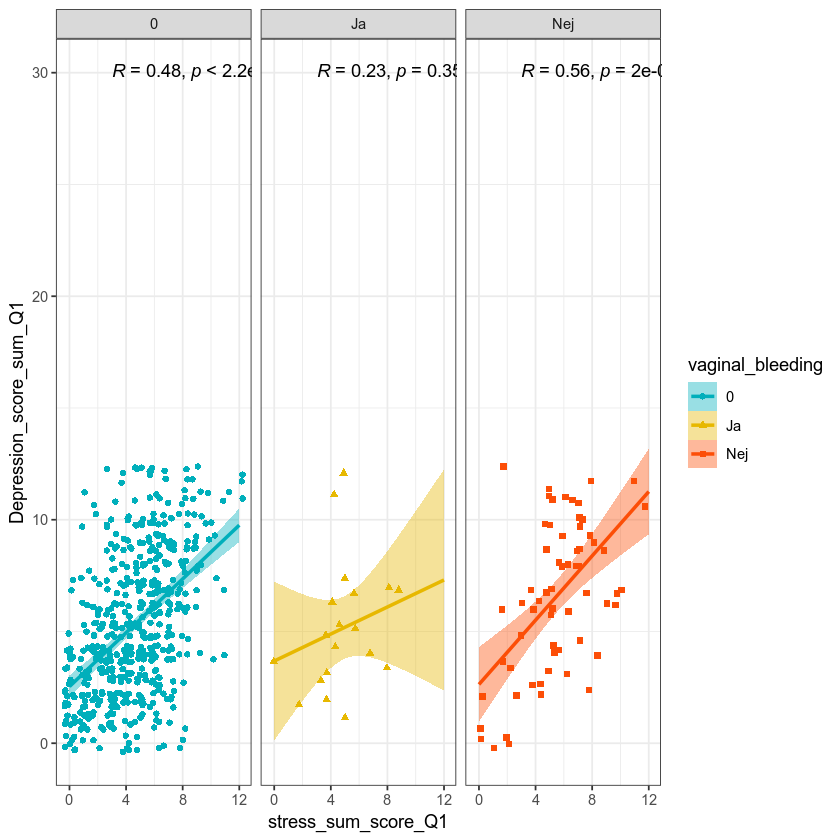

In [96]:
# vaginal bleeding
#Q1_X73.8_Pregnancy_problems_vaginal_bleeding

b_vb <- ggplot(df_vb, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (Q1_during_gi_medication)
b_vb + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = vaginal_bleeding , shape = vaginal_bleeding ))+
  geom_smooth(aes(color = vaginal_bleeding , fill = vaginal_bleeding), method = "lm") +
  geom_rug(aes(color = vaginal_bleeding )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b_vb + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = vaginal_bleeding, shape =vaginal_bleeding))+
  geom_smooth(aes(color = vaginal_bleeding, fill = vaginal_bleeding), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ vaginal_bleeding) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


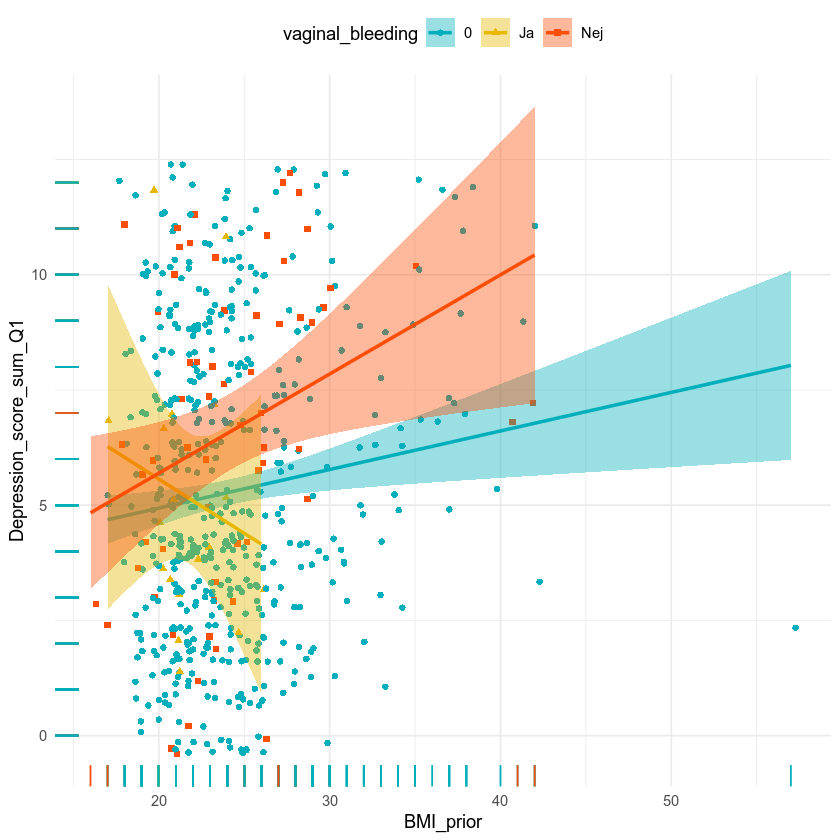

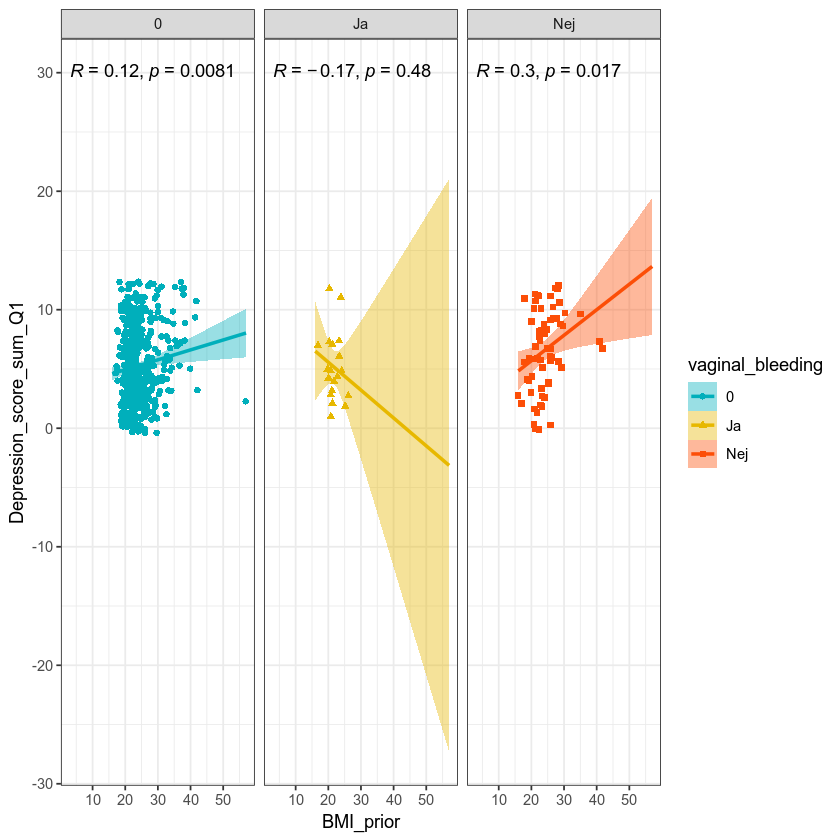

In [97]:
# vaginal bleeding
#Q1_X73.8_Pregnancy_problems_vaginal_bleeding

a_vb <- ggplot(df_vb, aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_during_gi_medication)
a_vb + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = vaginal_bleeding , shape = vaginal_bleeding ))+
  geom_smooth(aes(color = vaginal_bleeding , fill = vaginal_bleeding), method = "lm") +
  geom_rug(aes(color = vaginal_bleeding )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a_vb + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = vaginal_bleeding, shape =vaginal_bleeding))+
  geom_smooth(aes(color = vaginal_bleeding, fill = vaginal_bleeding), 
              method = "lm", fullrange = TRUE) + 
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ vaginal_bleeding) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()

In [68]:
sum(is.na(df$bristol_rating_Q1))
df_b <- df[!is.na(df$bristol_rating_Q1),]
sum(is.na(df_b$bristol_rating_Q1))

[1] 1

[1] 0

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

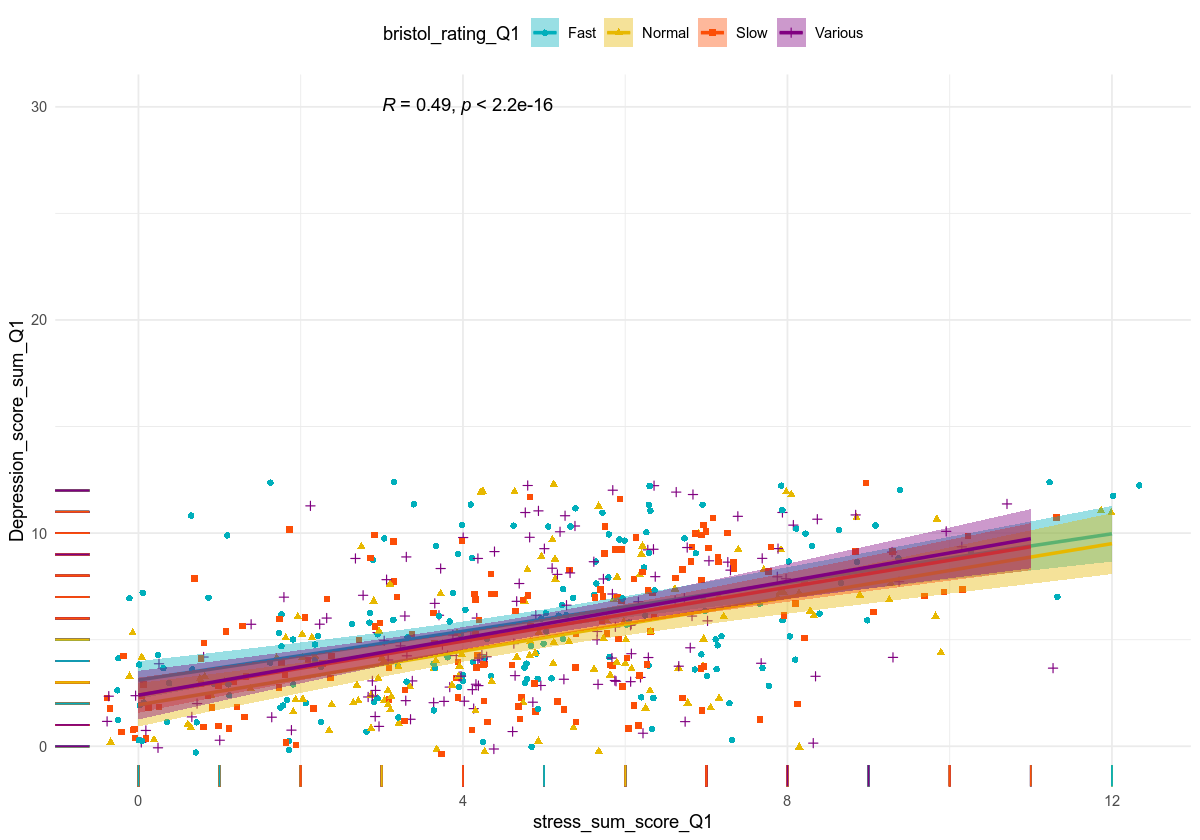

In [69]:
# bristol_rating_Q1 ???????????????

b_bristol <- ggplot(df_b, aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


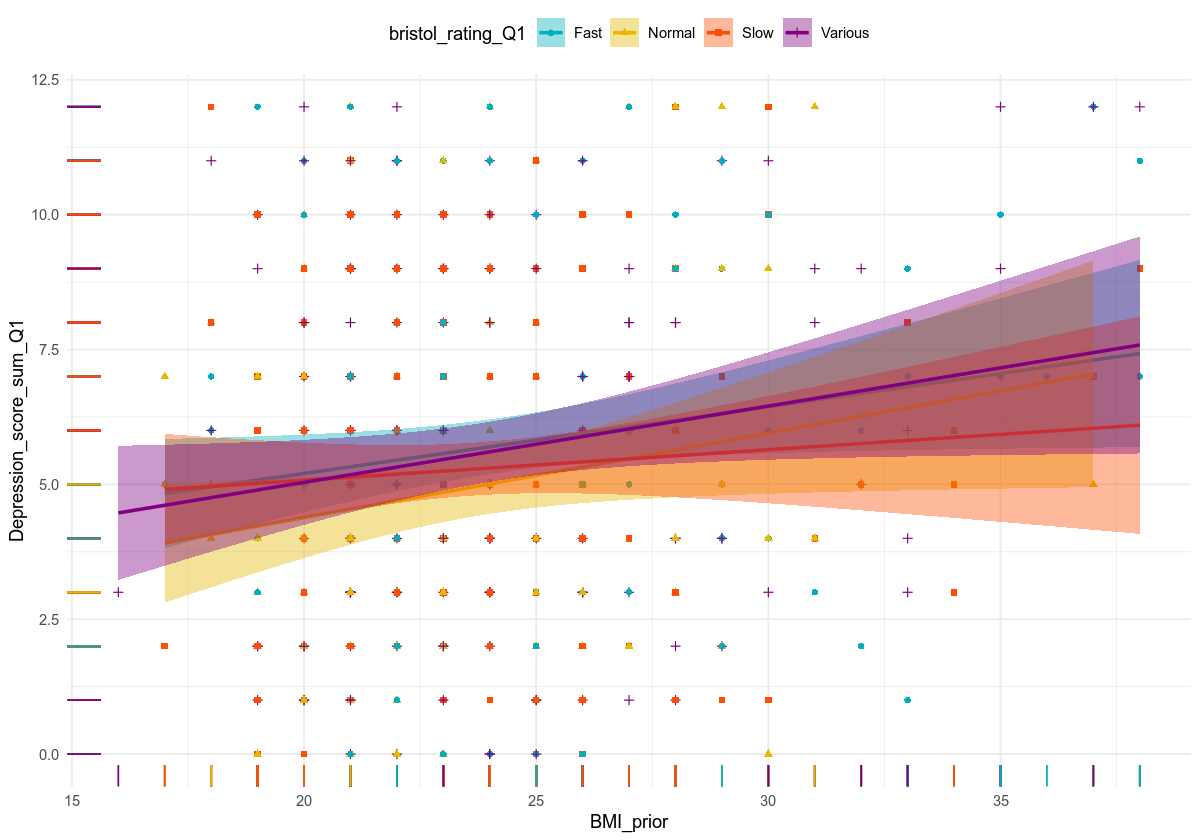

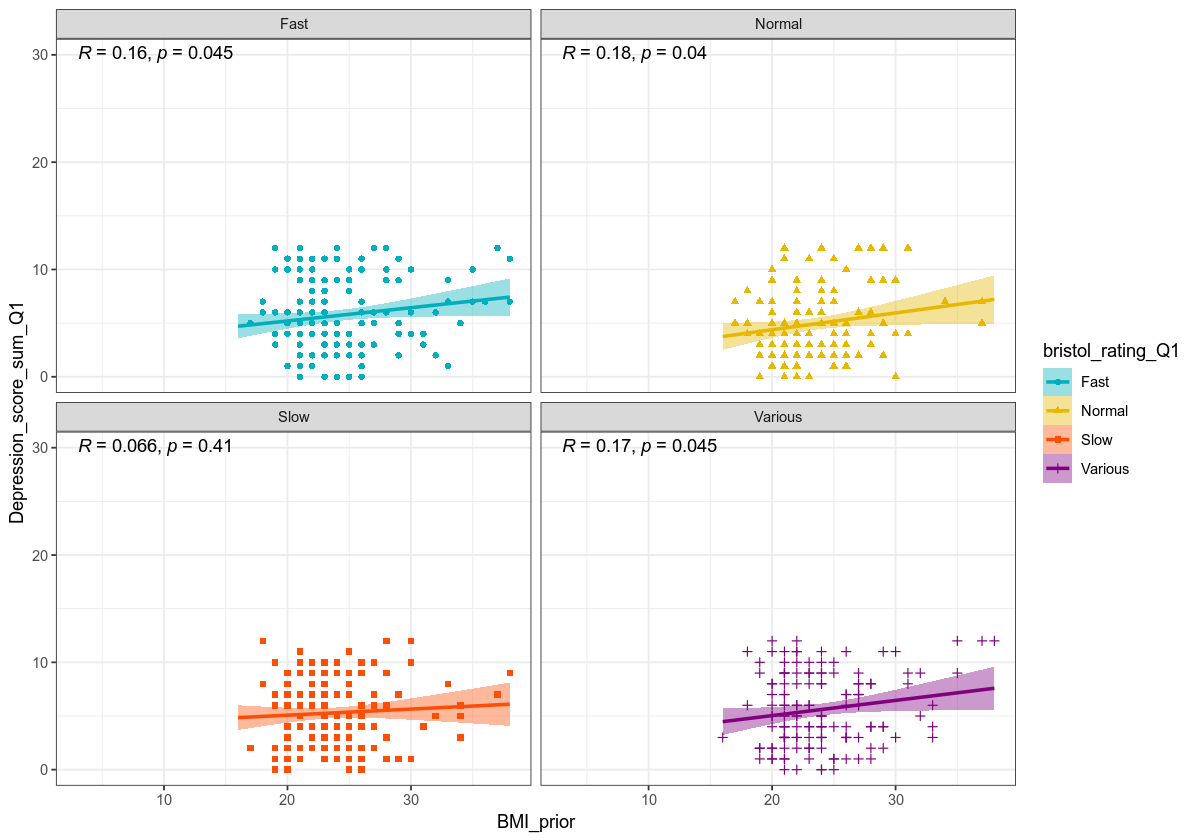

In [73]:
# bristol_rating_Q1 ???????????????
df_bmi1_b <- df_bmi1[!is.na(df_bmi1$bristol_rating_Q1),]
a_bristol <- ggplot(df_bmi1_b , aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (bristol_rating_Q1)
a_bristol + geom_point(aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
a_bristol + geom_point(aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()

In [139]:
# as i have NAs here , so i try to drop NAs and then prepare scatter plot grouped by hyperemesis: 
df_diarrhea <- df_bmi1
#df$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`
colnames(df_diarrhea)[colnames(df_diarrhea) == "Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré"] <- 'diarrhea'
dim(df_diarrhea)
#lost : 3
table(df_diarrhea$diarrhea)
sum(is.na(df_diarrhea$diarrhea))
df_diarrhea <- df_diarrhea[!is.na(df_diarrhea$diarrhea),]

[1] 588  27


 Ja Nej 
160 424 

[1] 4

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


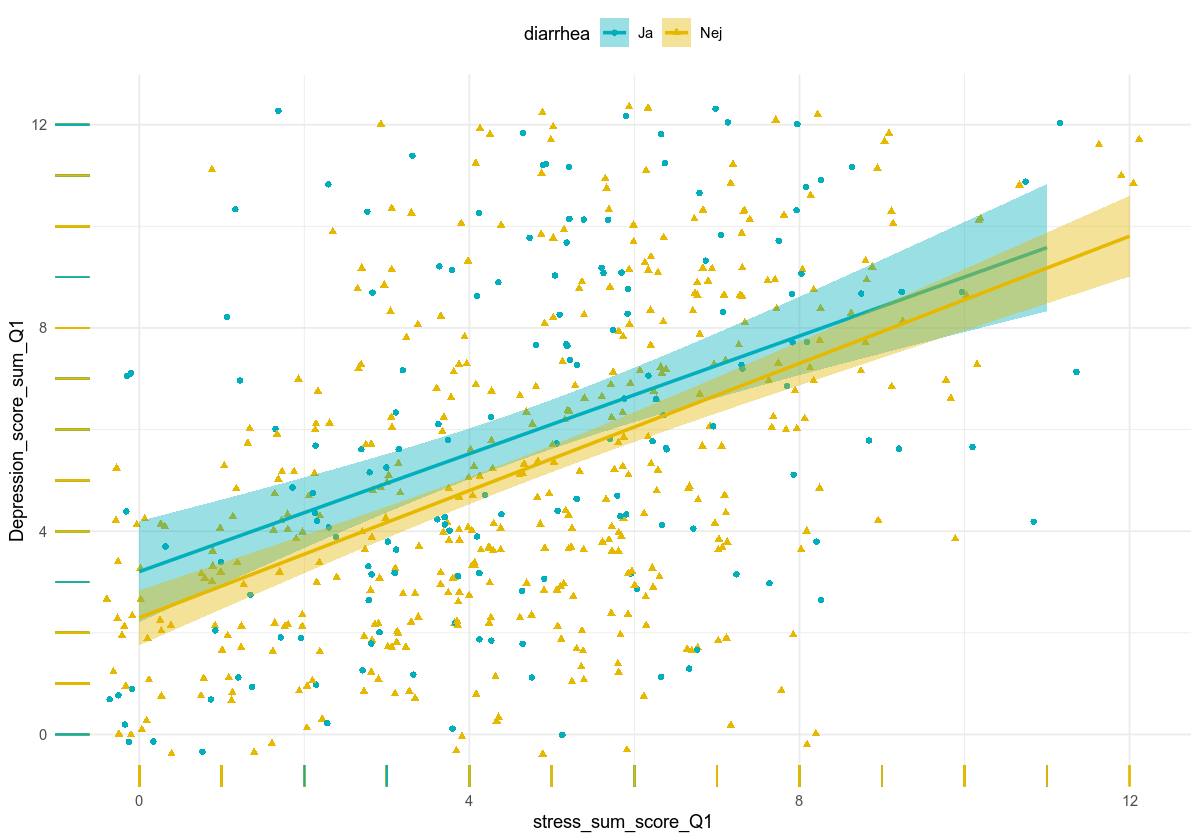

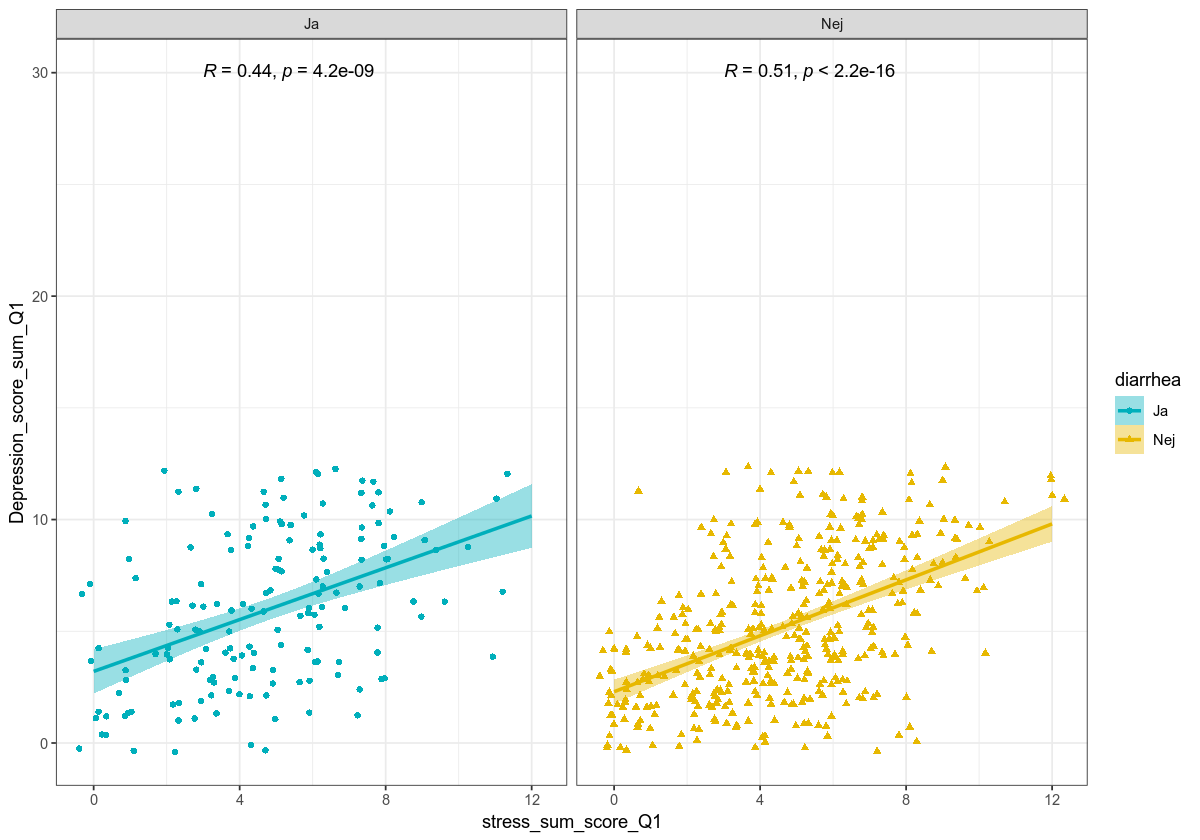

In [140]:
# `Q1_X92.1..Har.du.den.senaste.mänaden.besvärats.av...Diarrä`

b_diarrhea <- ggplot(df_diarrhea , aes(y = Depression_score_sum_Q1 , x = stress_sum_score_Q1))
# Change color and shape by groups (Q1_dailyfiber)
b_diarrhea + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = diarrhea , shape = diarrhea ))+
  geom_smooth(aes(color = diarrhea , fill = diarrhea), method = "lm") +
  geom_rug(aes(color = diarrhea)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800"))

#Split the plot into multiple panels. Use the function facet_wrap():
b_diarrhea + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = diarrhea, shape = diarrhea ))+
  geom_smooth(aes(color = diarrhea , fill = diarrhea ), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ diarrhea) +
  scale_color_manual(values = c("#00AFBB", "#E7B800"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800")) +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


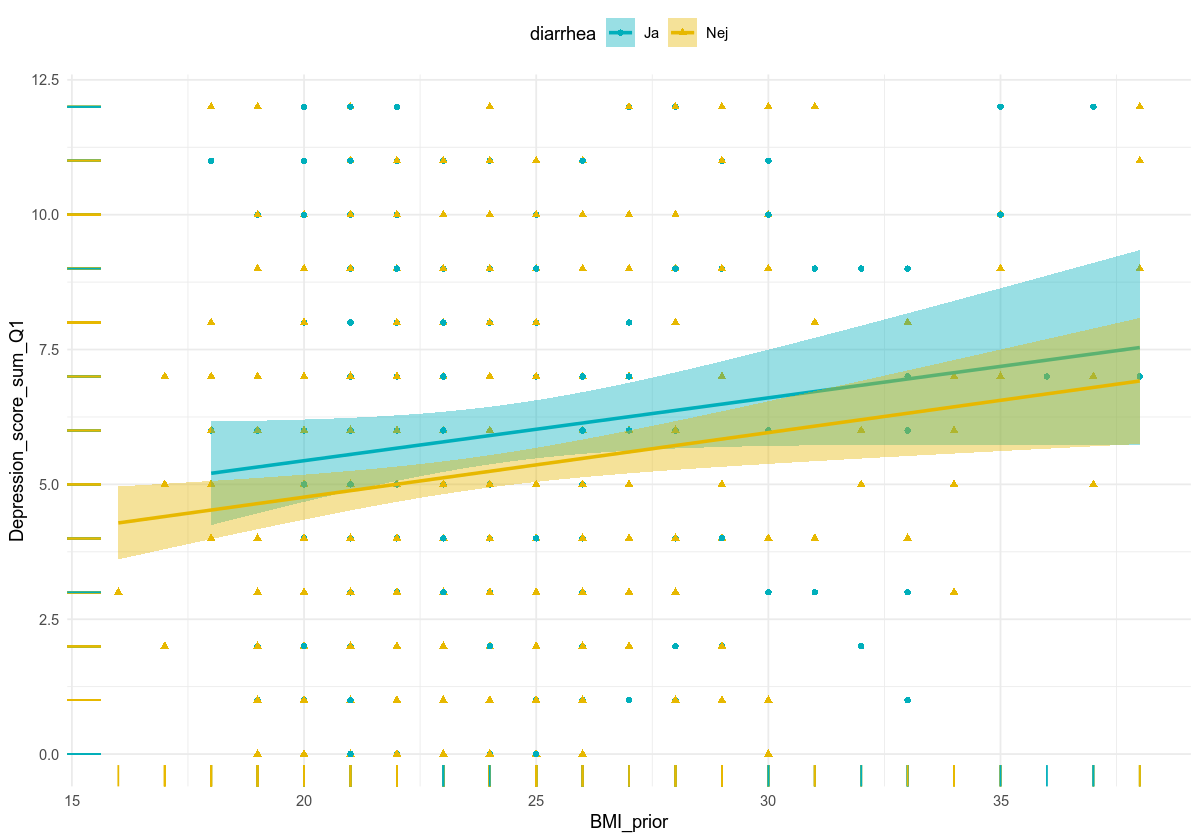

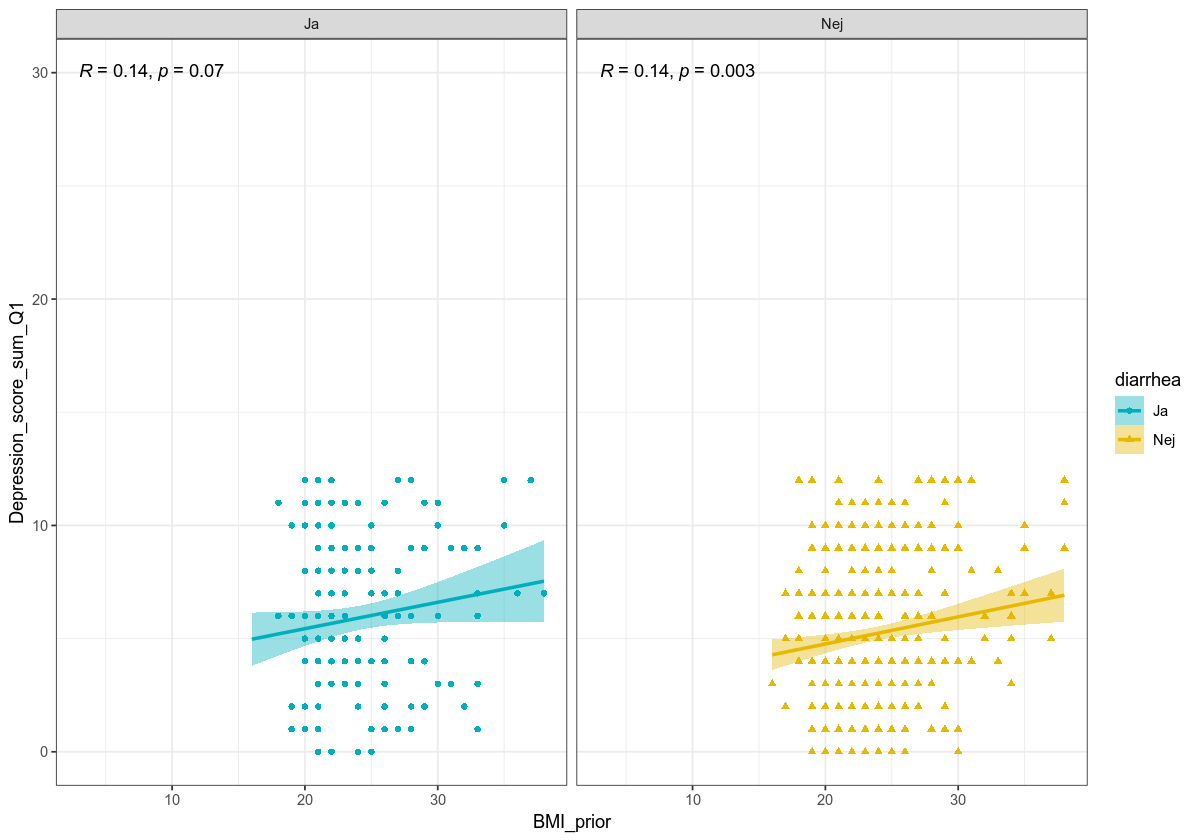

In [141]:
# `Q1_X92.1..Har.du.den.senaste.mänaden.besvärats.av...Diarrä`
df_diarrhea1 <- df_diarrhea[!is.na(df_diarrhea$diarrhea),]
a_diarrhea2 <- ggplot(df_diarrhea1 , aes(y = Depression_score_sum_Q1 , x = BMI_prior))
# Change color and shape by groups (Q1_dailyfiber)
a_diarrhea2 + geom_point(aes(color = diarrhea , shape = diarrhea ))+
  geom_smooth(aes(color = diarrhea , fill = diarrhea), method = "lm") +
  geom_rug(aes(color = diarrhea)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
a_diarrhea2 + geom_point(aes(color = diarrhea, shape = diarrhea ))+
  geom_smooth(aes(color = diarrhea , fill = diarrhea ), 
              method = "lm", fullrange = TRUE) +
   stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ diarrhea) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()

# correlation kit 2

In [52]:
kit2_cor <- read.csv( file =  "modified_meta2_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit2_cor)
kit2_cor2 <- kit2_cor[kit2_cor$kit2.faecal_sample.barcode != 'X100000160886' ,]
head(kit2_cor2)
## the new taxa data do not included this faecal barcode : 'X100000160886', ]

[1] 552  30

kit2.faecal_sample.barcode stress_sum_score_Q2 Depression_score_sum_Q2
1 X100000401804              7                   11                     
2 X100000191231              0                    0                     
3 X100000418611              8                    7                     
4 X100000112397              6                   NA                     
5 X100000407400              6                    6                     
6 X100000105399              2                    2                     
  Q2_gi_medication Q1_Age BMI_prior Prev_miscarriage_numb Primipara
1 0                39     23        5                     0        
2 0                37     21        1                     0        
3 0                34     32        0                     1        
4 0                26     31        1                     0        
5 0                30     21        1                     0        
6 0                39     24        2                     0        
  bristol_rating_Q2 TTP_months ⋯ Q2_X34.Probiotics_recently
1 Slow              15         ⋯ Nej                       
2 Slow              12         ⋯ Nej                       
3 Fast              20         ⋯ Nej                       
4 Fast               0         ⋯ Nej                       
5 Various            0         ⋯ Nej                       
6 Fast               3         ⋯ Nej                       
  Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Nej                                                       
2 Nej                                                       
3 Nej                                                       
4 Nej                                                       
5 Ja                                                        
6 Nej                                                       
  Q1_X68_Diagnosed_eating_disorder Q2_dietscore Q2_dailyfiber ses_score
1 Nej                              0            1             3        
2 Nej                              1            1             3        
3 Nej                              3            1             3        
4 Nej                              1            1             3        
5 Ja                               2            1             2        
6 Nej                              3            0             3        
  smoke_kit2_binary alcohol_kit2_binary hyperemesis_binary
1 0                 0                   0                 
2 0                 0                   0                 
3 0                 0                   0                 
4 0                 0                   0                 
5 0                 0                   0                 
6 0                 0                   0                 
  vaginal_bleeding_binary
1 0                      
2 0                      
3 0                      
4 0                      
5 0                      
6 0

In [57]:
dim(kit2_cor2)
a1 <- colnames(kit2_cor2)

[1] 551  30

In [58]:
dim(meta_kit2_intrests2_col)
b1 <- colnames(meta_kit2_intrests2_col)

[1] 551  27

In [59]:
ov <- a1 %in% b1
ov

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE FALSE FALSE FALSE FALSE

# continuous data _ kit2
## correlation test and scatter plot

In [144]:
cor(kit2_cor[,c('stress_sum_score_Q2' ,'Depression_score_sum_Q2','Q2_dietscore', 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior', 'TTP_months' , 'Q2_X20..Vilken.graviditetsvecka.är.du.i.idag' )])
#'ses_score' 

stress_sum_score_Q2
stress_sum_score_Q2                           1.000000000       
Depression_score_sum_Q2                                NA       
Q2_dietscore                                  0.068496358       
Prev_miscarriage_numb                        -0.006332285       
Q1_Age                                       -0.030835675       
BMI_prior                                     0.012258685       
TTP_months                                             NA       
Q2_X20..Vilken.graviditetsvecka.är.du.i.idag  0.071401624       
                                             Depression_score_sum_Q2
stress_sum_score_Q2                          NA                     
Depression_score_sum_Q2                       1                     
Q2_dietscore                                 NA                     
Prev_miscarriage_numb                        NA                     
Q1_Age                                       NA                     
BMI_prior                                    NA                     
TTP_months                                   NA                     
Q2_X20..Vilken.graviditetsvecka.är.du.i.idag NA                     
                                             Q2_dietscore Prev_miscarriage_numb
stress_sum_score_Q2                           0.06849636  -0.006332285         
Depression_score_sum_Q2                               NA            NA         
Q2_dietscore                                  1.00000000   0.058636625         
Prev_miscarriage_numb                         0.05863663   1.000000000         
Q1_Age                                       -0.12362482   0.230447803         
BMI_prior                                     0.19423453   0.046440332         
TTP_months                                            NA            NA         
Q2_X20..Vilken.graviditetsvecka.är.du.i.idag -0.05223381   0.015402449         
                                             Q1_Age       BMI_prior   
stress_sum_score_Q2                          -0.030835675  0.012258685
Depression_score_sum_Q2                                NA           NA
Q2_dietscore                                 -0.123624816  0.194234527
Prev_miscarriage_numb                         0.230447803  0.046440332
Q1_Age                                        1.000000000  0.004475799
BMI_prior                                     0.004475799  1.000000000
TTP_months                                             NA           NA
Q2_X20..Vilken.graviditetsvecka.är.du.i.idag  0.008461918 -0.040680341
                                             TTP_months
stress_sum_score_Q2                          NA        
Depression_score_sum_Q2                      NA        
Q2_dietscore                                 NA        
Prev_miscarriage_numb                        NA        
Q1_Age                                       NA        
BMI_prior                                    NA        
TTP_months                                    1        
Q2_X20..Vilken.graviditetsvecka.är.du.i.idag NA        
                                             Q2_X20..Vilken.graviditetsvecka.är.du.i.idag
stress_sum_score_Q2                           0.071401624                                
Depression_score_sum_Q2                                NA                                
Q2_dietscore                                 -0.052233807                                
Prev_miscarriage_numb                         0.015402449                                
Q1_Age                                        0.008461918                                
BMI_prior                                    -0.040680341                                
TTP_months                                             NA                                
Q2_X20..Vilken.graviditetsvecka.är.du.i.idag  1.000000000

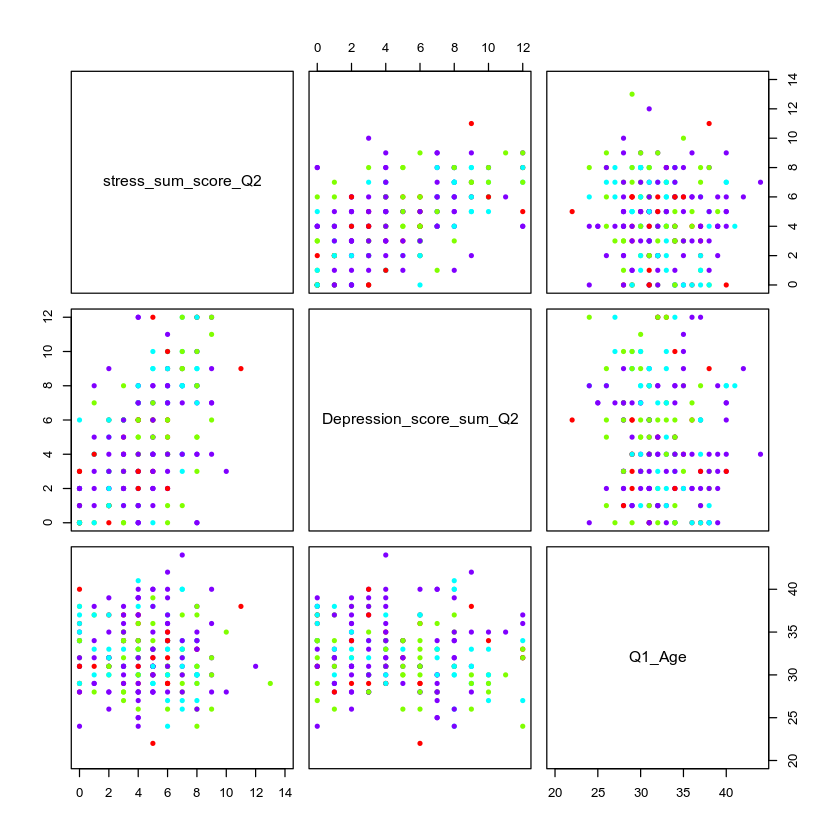

In [146]:
pairs(kit2_cor[,c('stress_sum_score_Q2' ,'Depression_score_sum_Q2', 'Q1_Age') ], pch = 20 ,bg = rainbow (4)[factor(kit2_cor$stress_sum_score_Q2)] , col= rainbow(4)[kit2_cor$stress_sum_score_Q2])


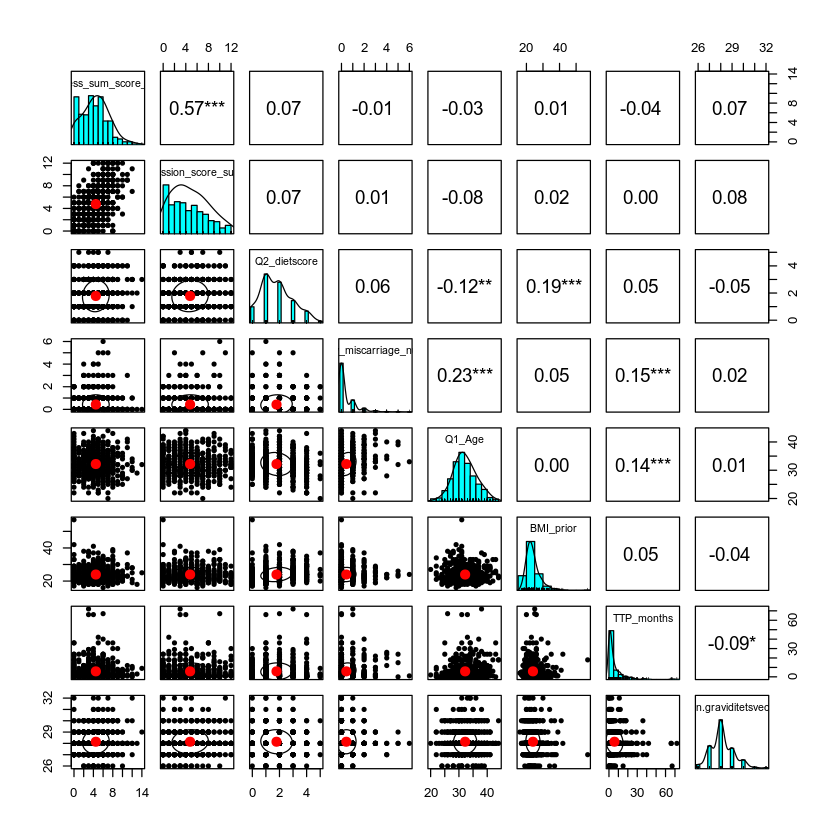

In [145]:
pairs.panels(
  kit2_cor[,c('stress_sum_score_Q2' ,'Depression_score_sum_Q2','Q2_dietscore', 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior', 'TTP_months' , 'Q2_X20..Vilken.graviditetsvecka.är.du.i.idag' )],

  smooth = F ,
  density = T ,
  method = "pearson", 
  pch = 20,
  lm = FALSE ,
  stars =  TRUE ,
  ci = TRUE
)

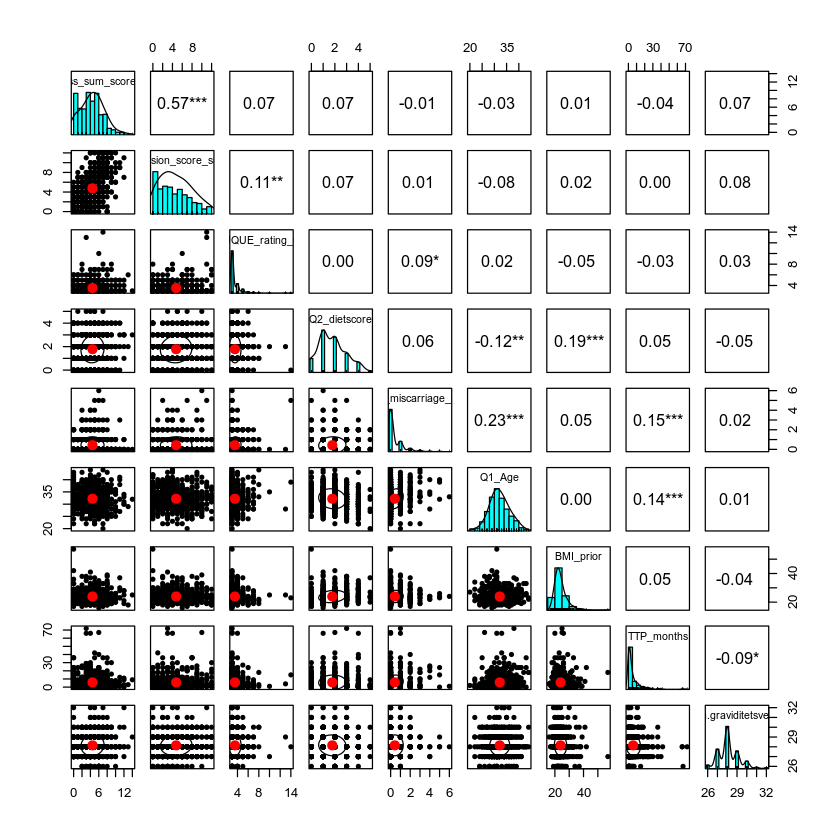

In [60]:
pairs.panels(
  meta_kit2_intrests2_col[,c('stress_sum_score_Q2' ,'Depression_score_sum_Q2','PUQUE_rating_Q2','Q2_dietscore', 'Prev_miscarriage_numb', 'Q1_Age', 'BMI_prior', 'TTP_months' , 'Q2_X20..Vilken.graviditetsvecka.är.du.i.idag' )],

  smooth = F ,
  density = T ,
  method = "pearson", 
  pch = 20,
  lm = FALSE ,
  stars =  TRUE ,
  ci = TRUE
)

# violin_ scatter plot for kit 2
## as stress and depressions has shown correlation ; i'll do the scatter plot for only these 2
## for kit2_binary data :t test for 1) stress ~ daily fiber illusrated  p value (0.02)  , 2)depression ~ bristol rating 3) depression ~ natural conception ( 0.09, but worth checking up)


In [129]:
library(ggplot2)
library(ggpubr)
theme_set(
  theme_minimal() +
    theme(legend.position = "top")
  )
kit2_cor <- read.csv( file =  "modified_meta2_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit2_cor)

[1] 552  30

In [130]:
#kit2 : 551 participants
df2 <- kit2_cor2
dim(kit2_cor2)

[1] 551  30

In [131]:

df2$ses_score <- as.factor(df2$ses_score)
#df2$Q2_X13.8..Vilken.vilka.graviditetsrelaterade.komplikationer.har <- as.factor(df2$Q2_X13.8..Vilken.vilka.graviditetsrelaterade.komplikationer.har)
df2$Q1_X19_Natural_conception <- as.factor(df2$Q1_X19_Natural_conception)
df2$Q2_dailyfiber <- as.factor(df2$Q2_dailyfiber)
df2$bristol_rating_Q2 <- as.factor(df2$bristol_rating_Q2)
df2$Q1_X20_First_pregnancy <- as.factor(df2$Q1_X20_First_pregnancy)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


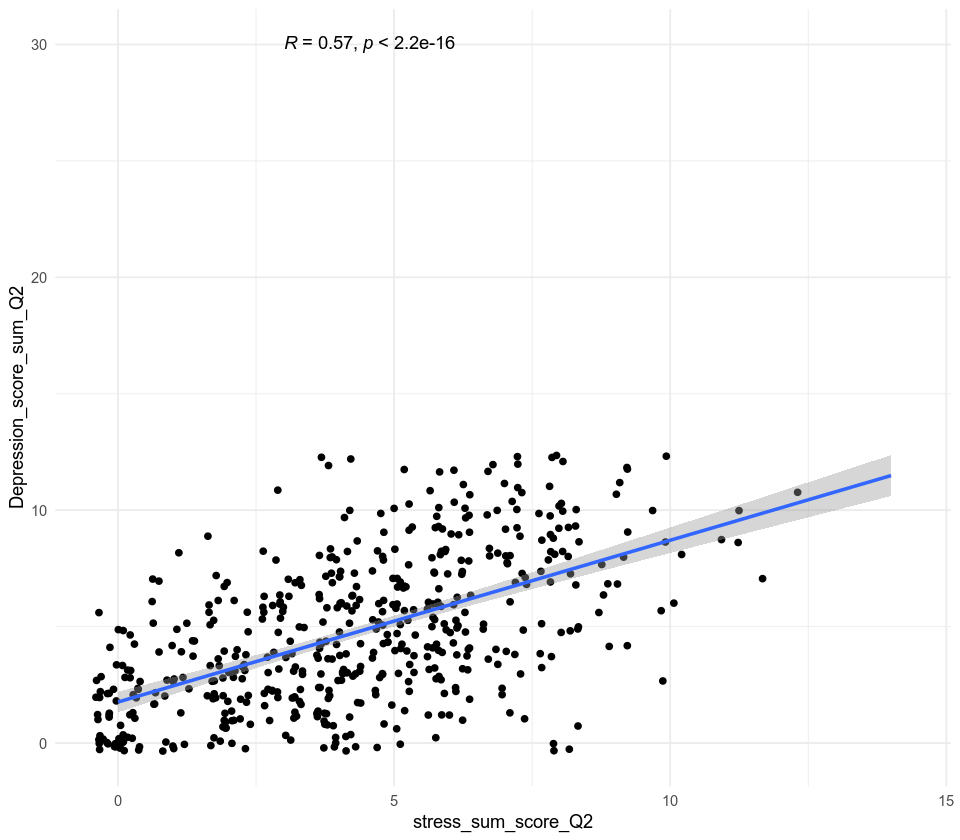

In [132]:
b3 <- ggplot(df2, aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Scatter plot with regression line
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
  

# Add a loess smoothed fit curve
#b3 + geom_point()+
 # geom_smooth(method = "loess") +
 #stat_cor(method = "pearson", 
  #         label.x = 3, label.y = 30) 


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


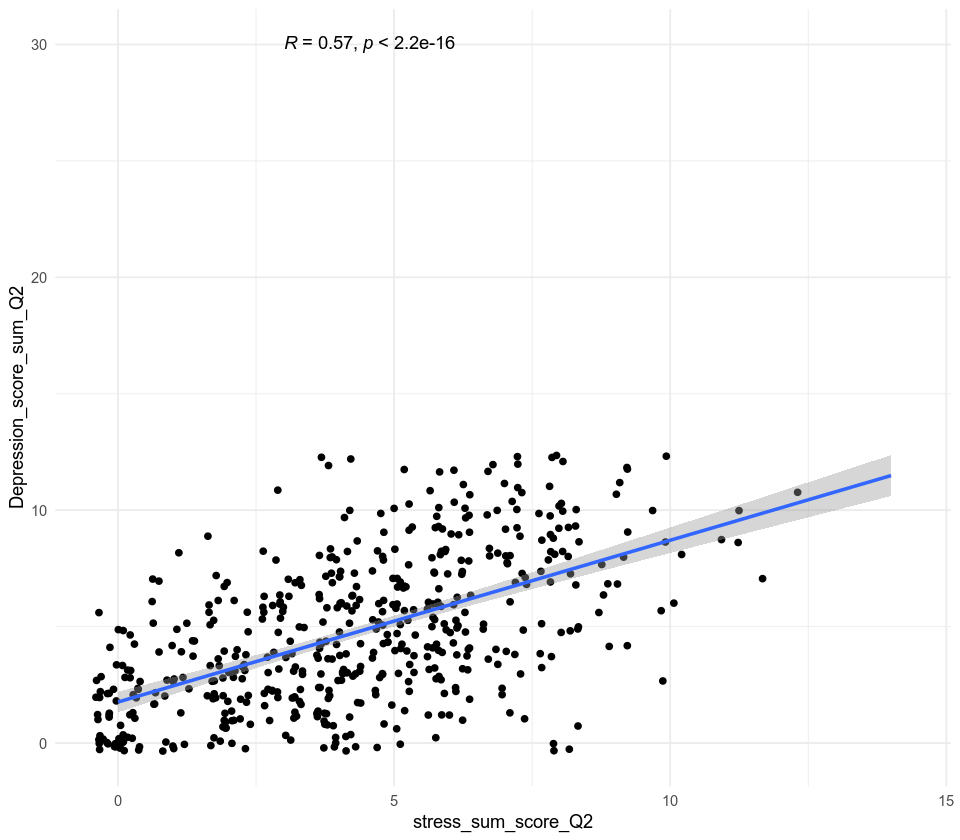

In [132]:
b3 <- ggplot(df2, aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Scatter plot with regression line
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
  

# Add a loess smoothed fit curve
#b3 + geom_point()+
 # geom_smooth(method = "loess") +
 #stat_cor(method = "pearson", 
  #         label.x = 3, label.y = 30) 


In [134]:
df3 <- df2
df3$stress_sum_score_Q2 <- as.factor(df3$stress_sum_score_Q2)

Warning message:
“Removed 32 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
Saving 8 x 6.67 in image
Warning message:
“Removed 32 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


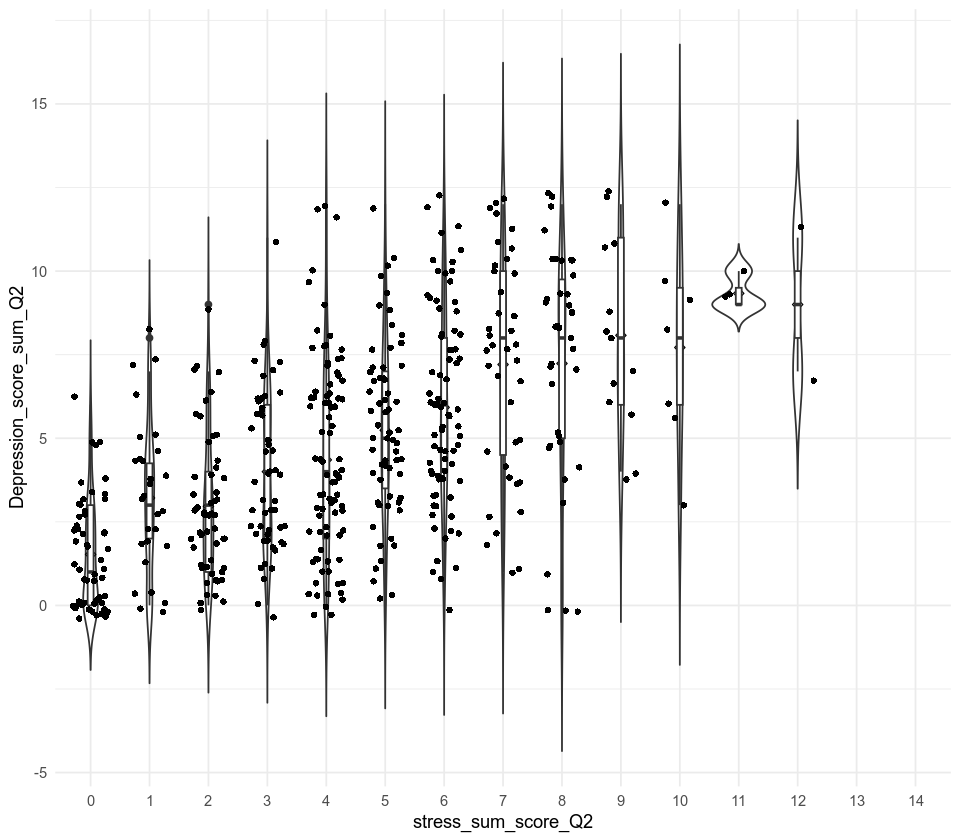

In [135]:
#violin plot
c1 <- ggplot(df3, aes(stress_sum_score_Q2 , Depression_score_sum_Q2)) 
#pdf("stress_dep_kit2_t.pdf ", width = 16 )
   c1 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.1) + geom_jitter(shape=16, position=position_jitter(0.3)) 
 #dev.off()
ggsave("dep_stress_kit2_t.pdf" , width = 8 )

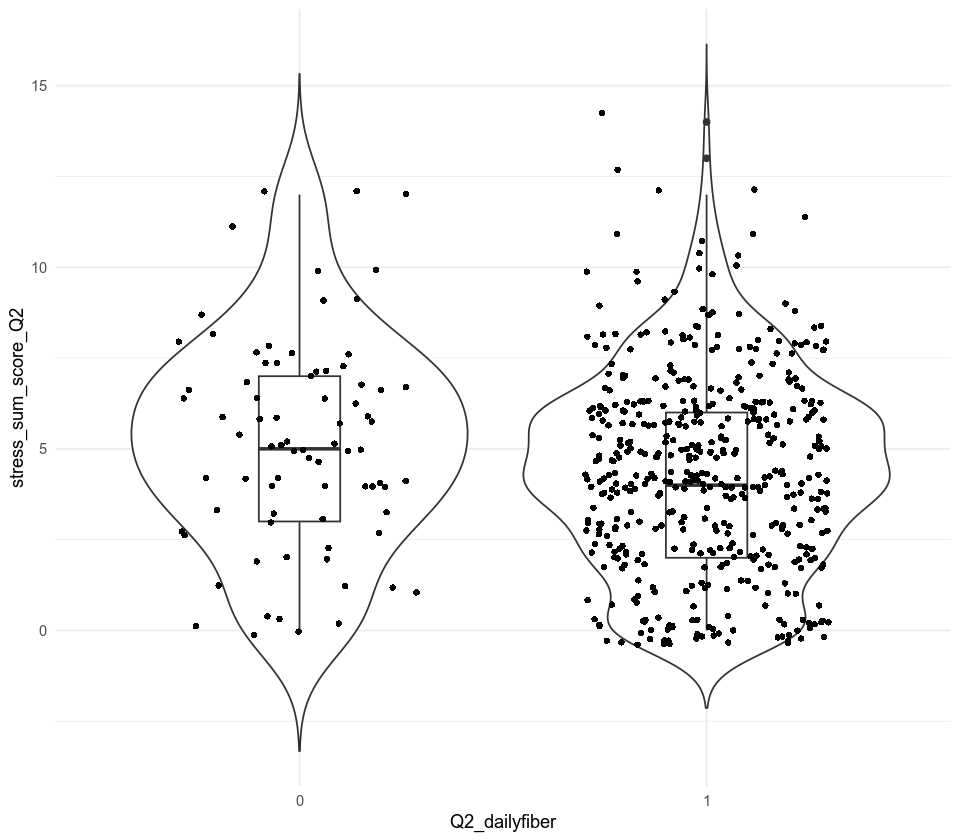

In [104]:
#violin plot: ( stress ~ Q2_dailyfiber)stress_sum_score_Q2Depression_score_sum_Q1
c3 <- ggplot(df2, aes(Q2_dailyfiber , stress_sum_score_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))

options(repr.plot.width=8)


Warning message:
“Removed 32 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


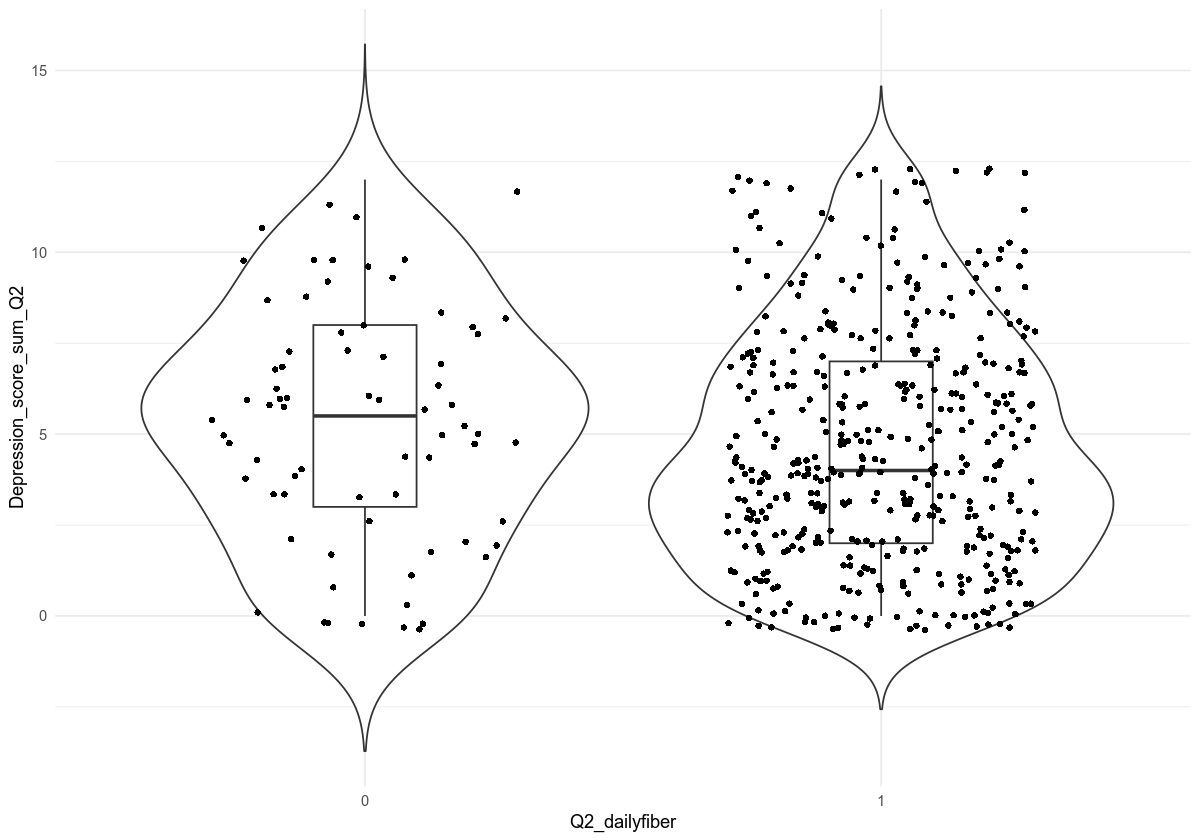

In [94]:
#violin plot: ( depresson ~ Q2_dailyfiber)stress_sum_score_Q2Depression_score_sum_Q1
c3 <- ggplot(df2, aes(Q2_dailyfiber , Depression_score_sum_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))




Warning message:
“Removed 32 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


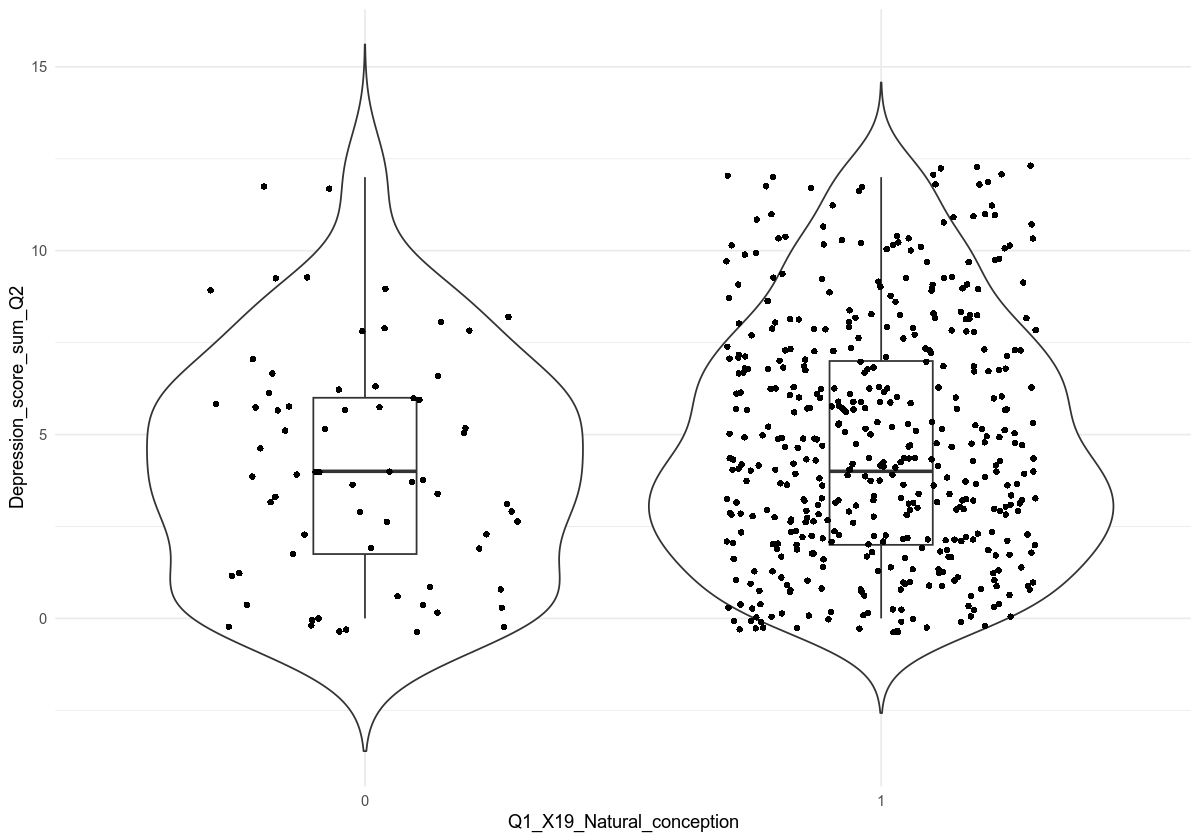

In [96]:
#violin plot: ( depresson ~ natural conception )stress_sum_score_Q2Depression_score_sum_Q1
c3 <- ggplot(df2, aes(Q1_X19_Natural_conception , Depression_score_sum_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))




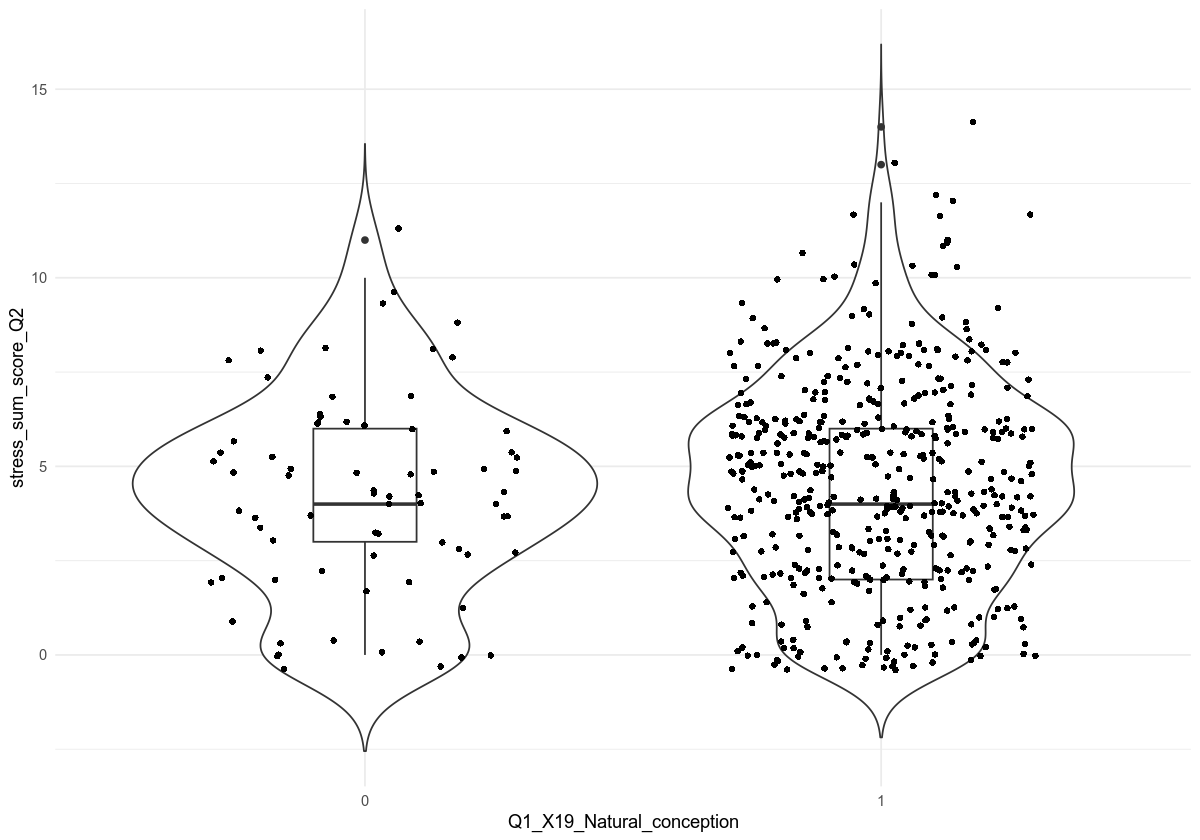

In [97]:
#violin plot: ( stress ~ natural conception )stress_sum_score_Q2Depression_score_sum_Q1
c3 <- ggplot(df2, aes(Q1_X19_Natural_conception , stress_sum_score_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))




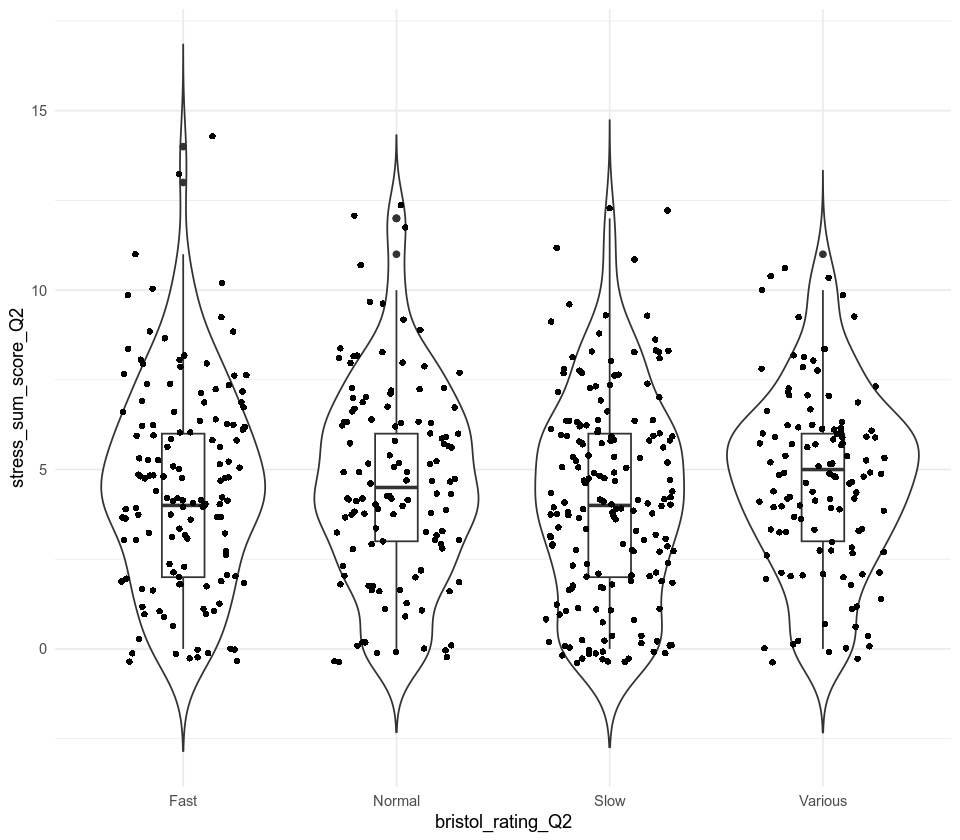

In [107]:
#violin plot: ( stress ~ bristol rating )stress_sum_score_Q2Depression_score_sum_Q1
c3 <- ggplot(df3, aes(bristol_rating_Q2 , stress_sum_score_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))




Warning message:
“Removed 32 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


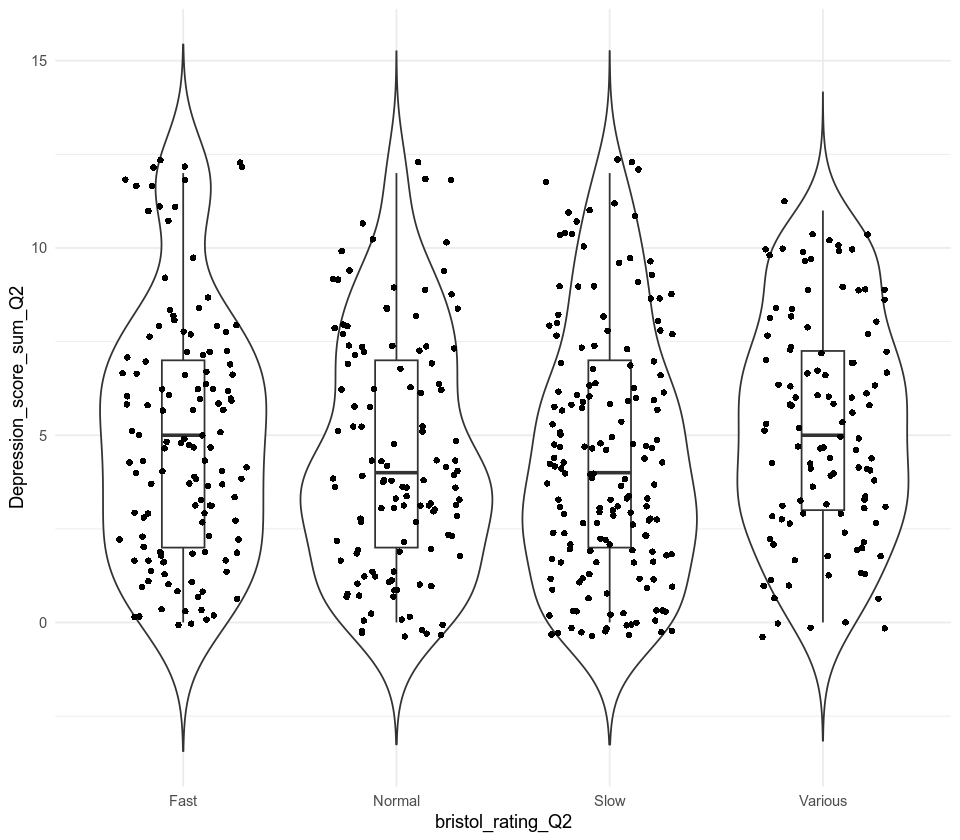

In [108]:
#violin plot: ( sdepression ~ bristol rating )stress_sum_score_Q2Depression_score_sum_Q2
c3 <- ggplot(df3, aes(bristol_rating_Q2 , Depression_score_sum_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))

Warning message:
“Removed 32 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


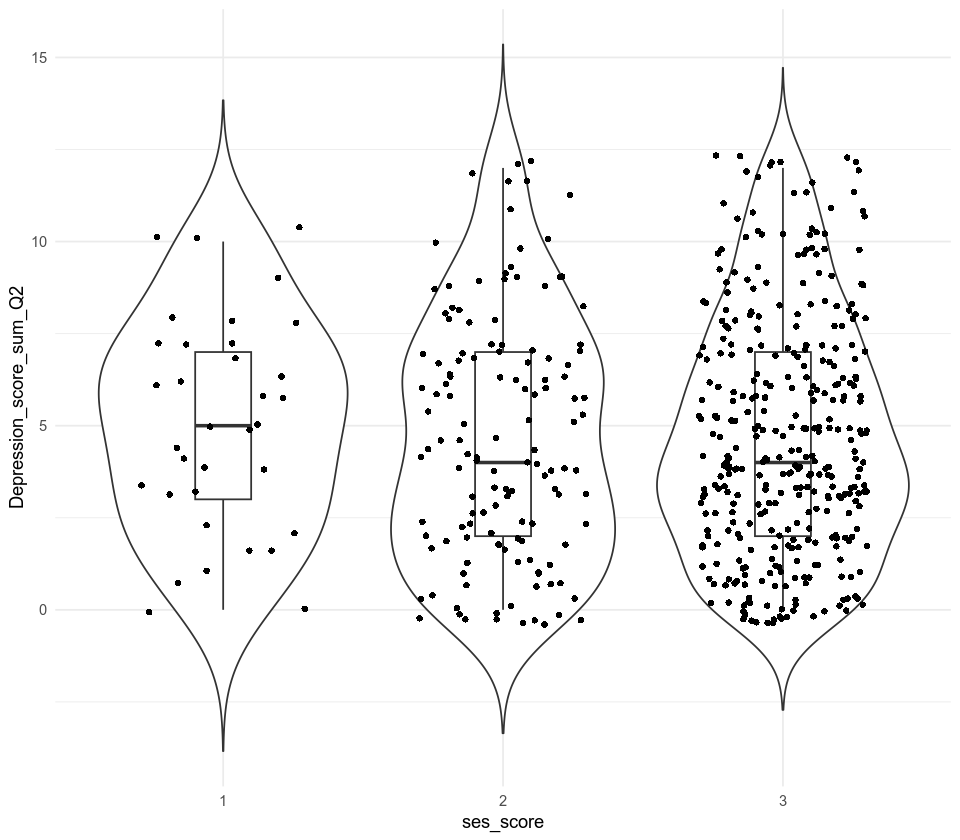

In [111]:
#violin plot: ( sdepression ~ bristol rating )stress_sum_score_Q2Depression_score_sum_Q2
c3 <- ggplot(df3, aes(ses_score , Depression_score_sum_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))

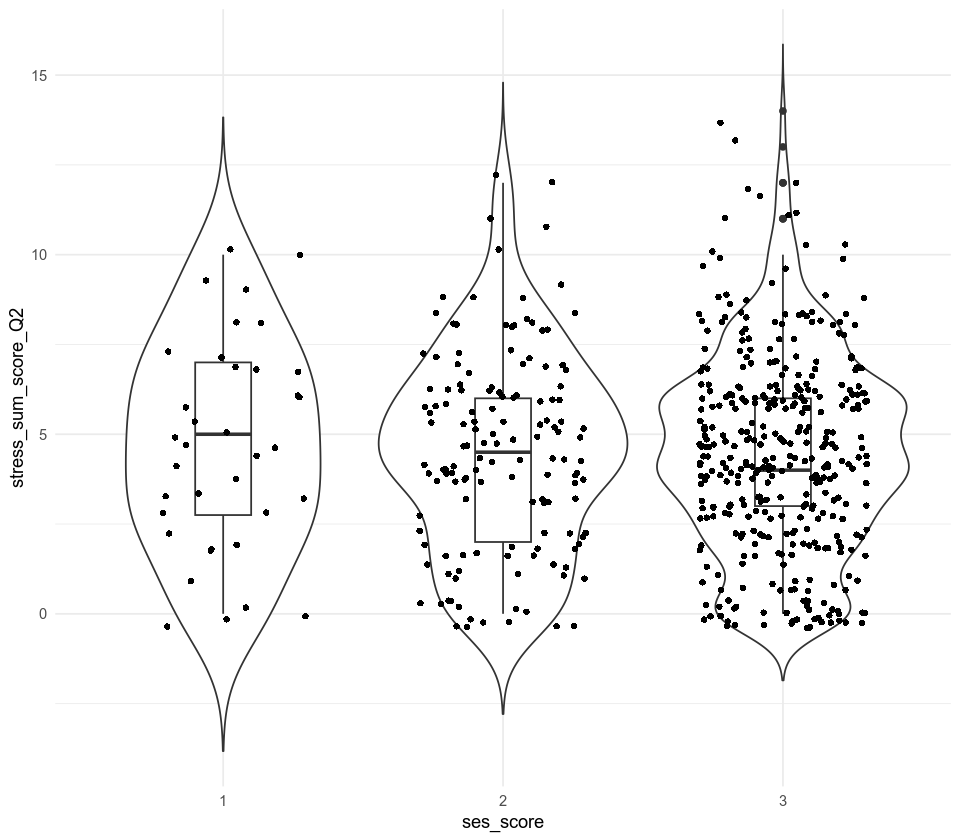

In [112]:
#violin plot: ( sdepression ~ bristol rating )stress_sum_score_Q2Depression_score_sum_Q2
c3 <- ggplot(df3, aes(ses_score , stress_sum_score_Q2)) 

 c3+  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))

# scatter plot- kit2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


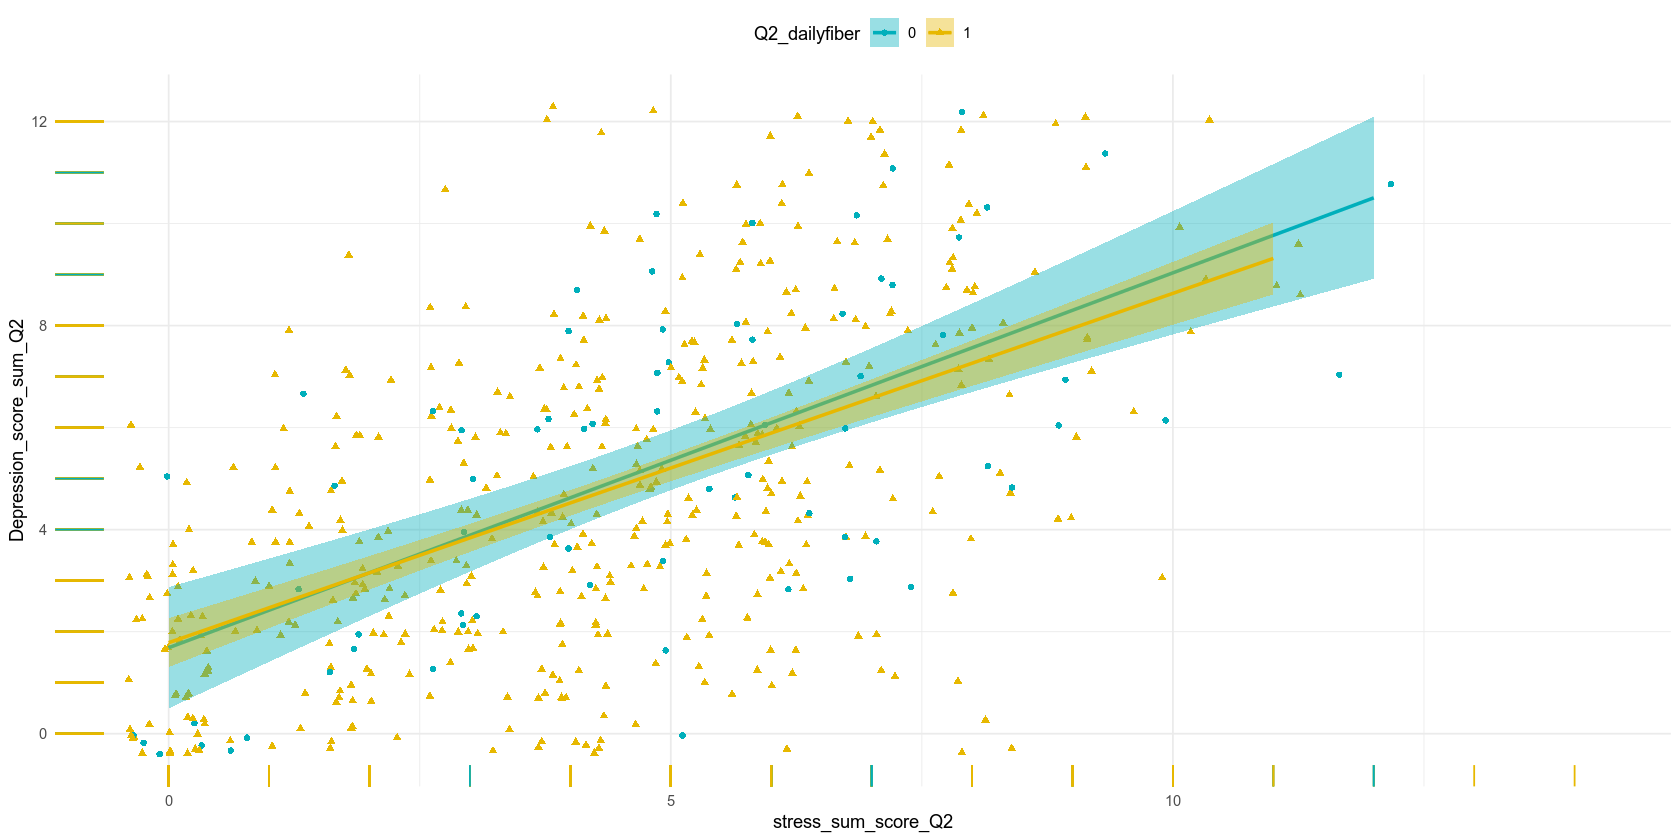

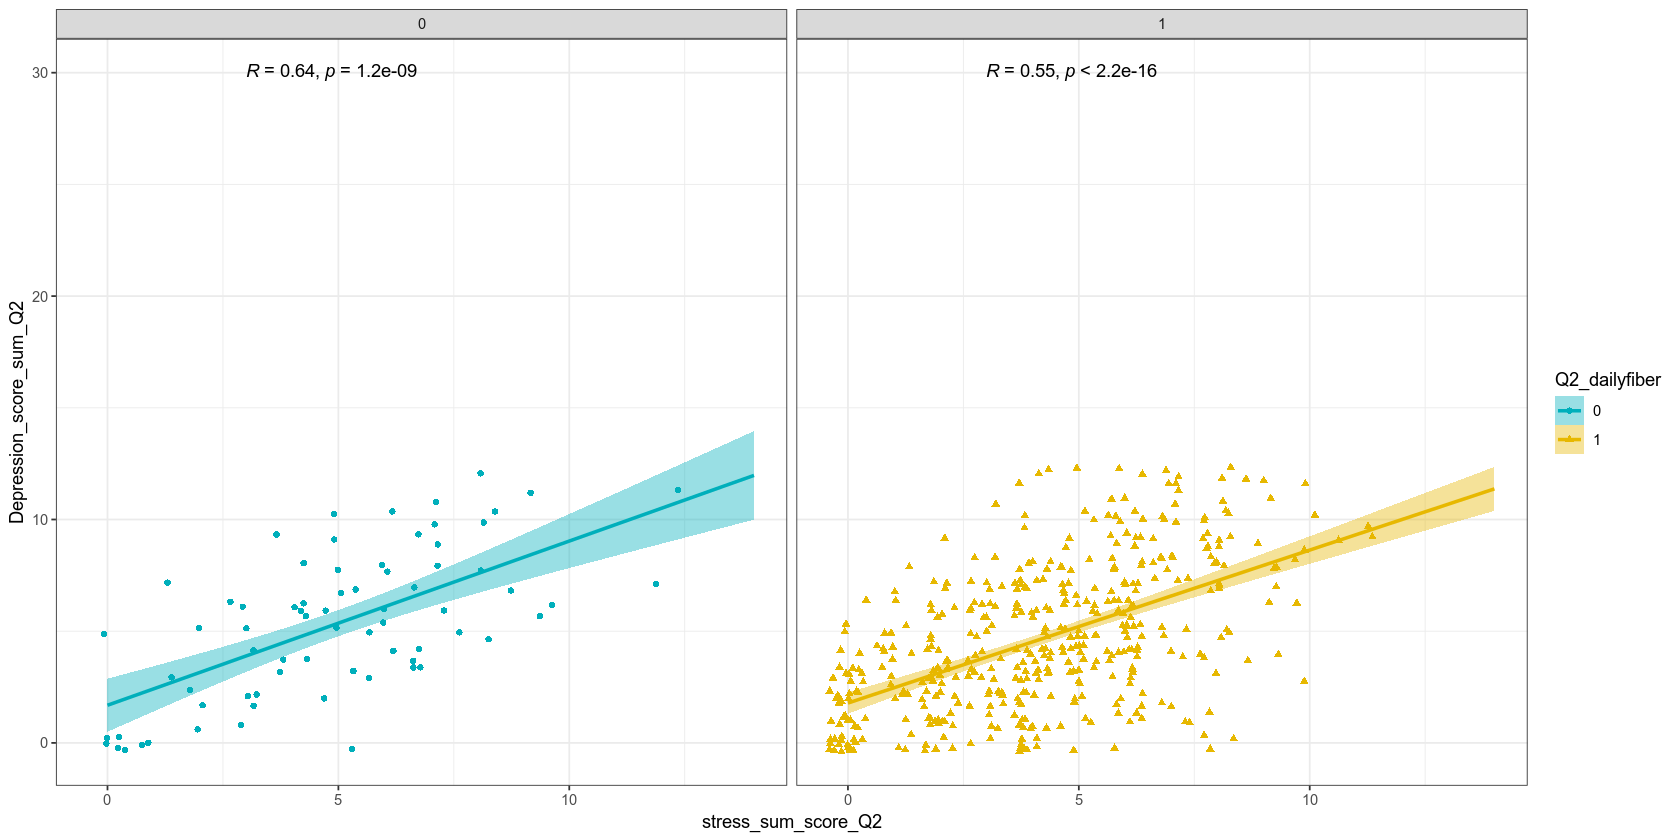

In [173]:
#daily fiber 
#

b3 <- ggplot(df2, aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Change color and shape by groups (daily fiber)
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q2_dailyfiber , shape = Q2_dailyfiber ))+
  geom_smooth(aes(color = Q2_dailyfiber , fill = Q2_dailyfiber), method = "lm") +
  geom_rug(aes(color = Q2_dailyfiber)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q2_dailyfiber, shape = Q2_dailyfiber))+
  geom_smooth(aes(color = Q2_dailyfiber, fill = Q2_dailyfiber), 
              method = "lm", fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q2_dailyfiber) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()


##### how can i adjust the dimension for this second  graph???? to illustrate better??????????

options(repr.plot.width=14)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


png 
  2

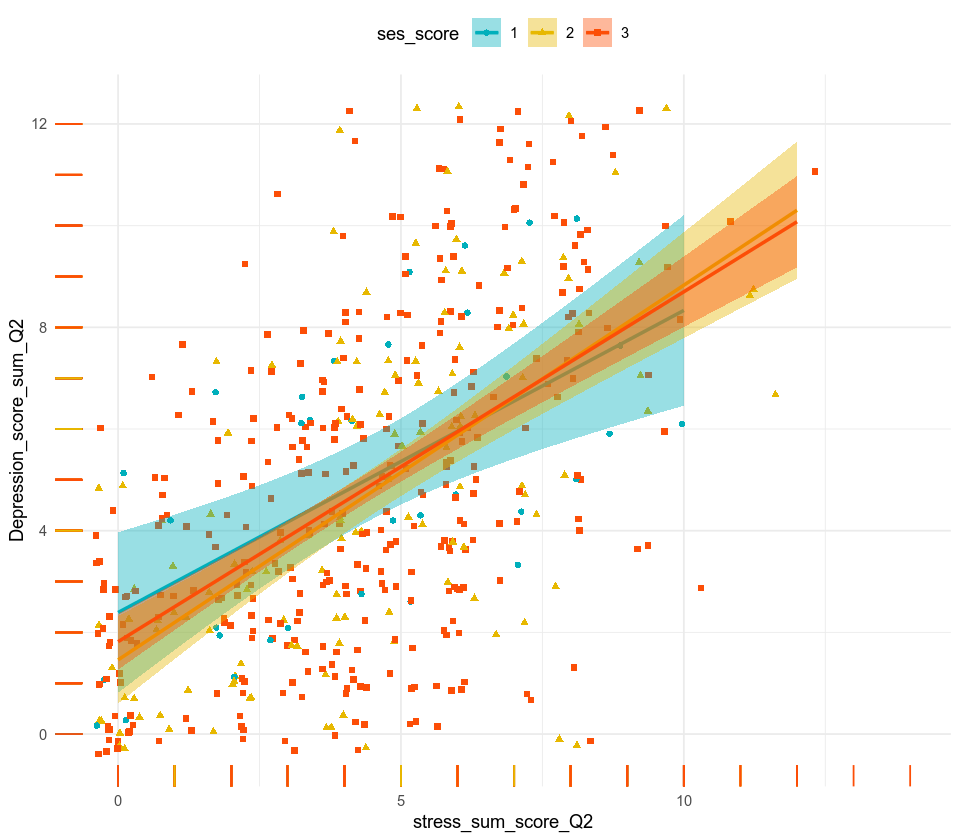

In [110]:
#ses-score
#

b3 <- ggplot(df2, aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Change color and shape by groups (ses-score)
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = ses_score , shape = ses_score ))+
  geom_smooth(aes(color = ses_score , fill = ses_score), method = "lm") +
  geom_rug(aes(color = ses_score)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
pdf("ses_dep_stress_kit2.pdf" , width = 8)
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = ses_score, shape = ses_score))+
  geom_smooth(aes(color = ses_score, fill = ses_score), 
              method = "lm", fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ ses_score) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()
dev.off()

##### how can i adjust the dimension for this second  graph???? to illustrate better??????????



`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


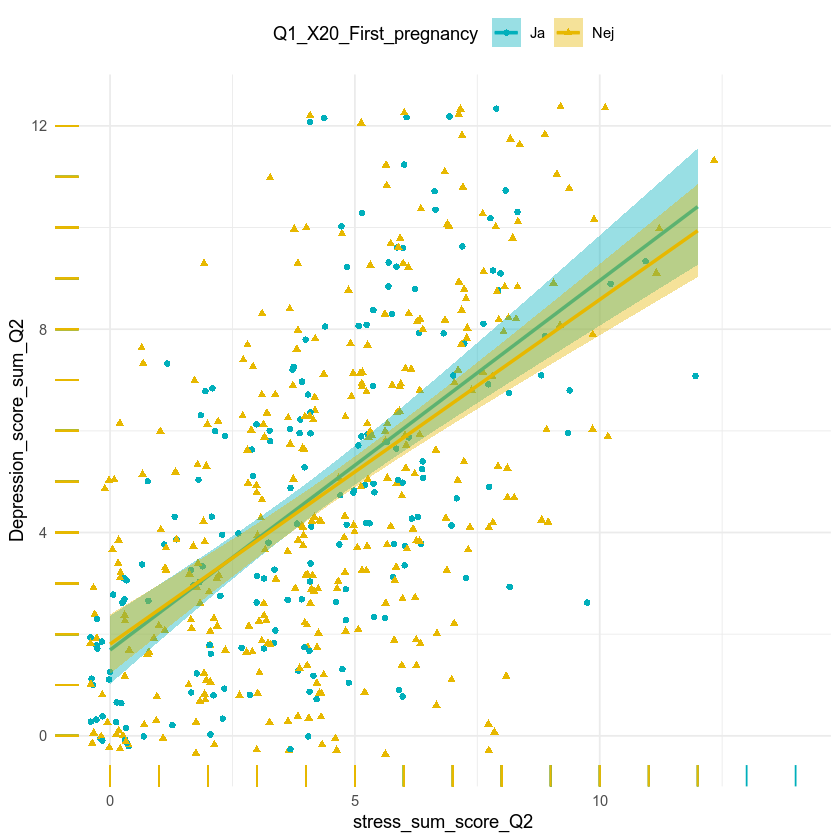

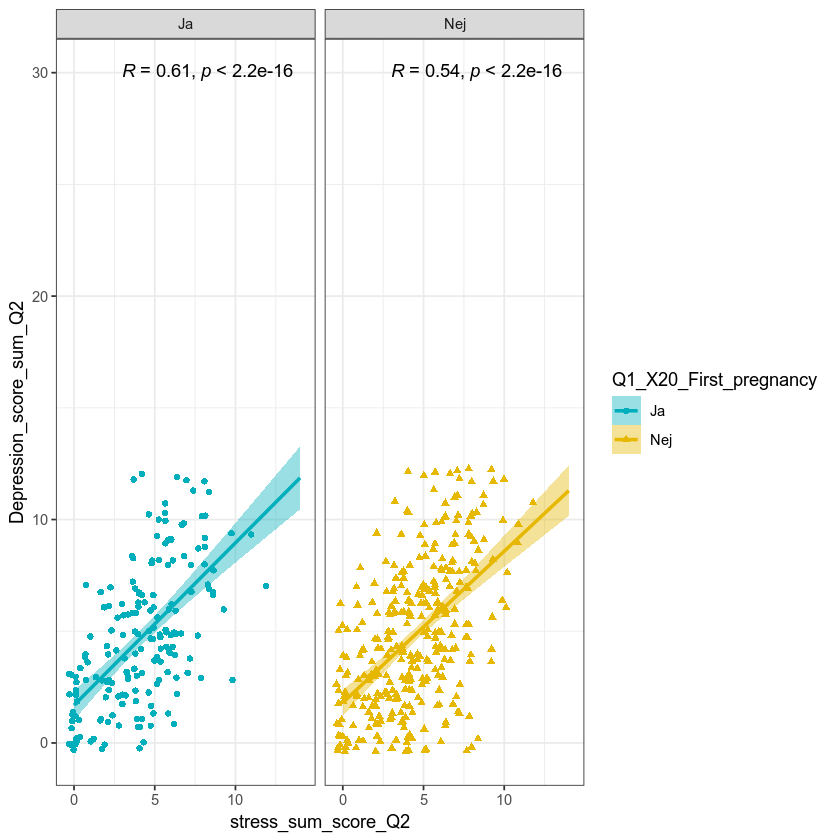

In [119]:
#Q1_X20_First_pregnancy
#

b3 <- ggplot(df2, aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Change color and shape by groups (ses-score)
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X20_First_pregnancy , shape = Q1_X20_First_pregnancy ))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy , fill = Q1_X20_First_pregnancy), method = "lm") +
  geom_rug(aes(color = Q1_X20_First_pregnancy)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X20_First_pregnancy, shape = Q1_X20_First_pregnancy))+
  geom_smooth(aes(color = Q1_X20_First_pregnancy, fill = Q1_X20_First_pregnancy), 
              method = "lm", fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q1_X20_First_pregnancy) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()


##### how can i adjust the dimension for this second  graph???? to illustrate better??????????



`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


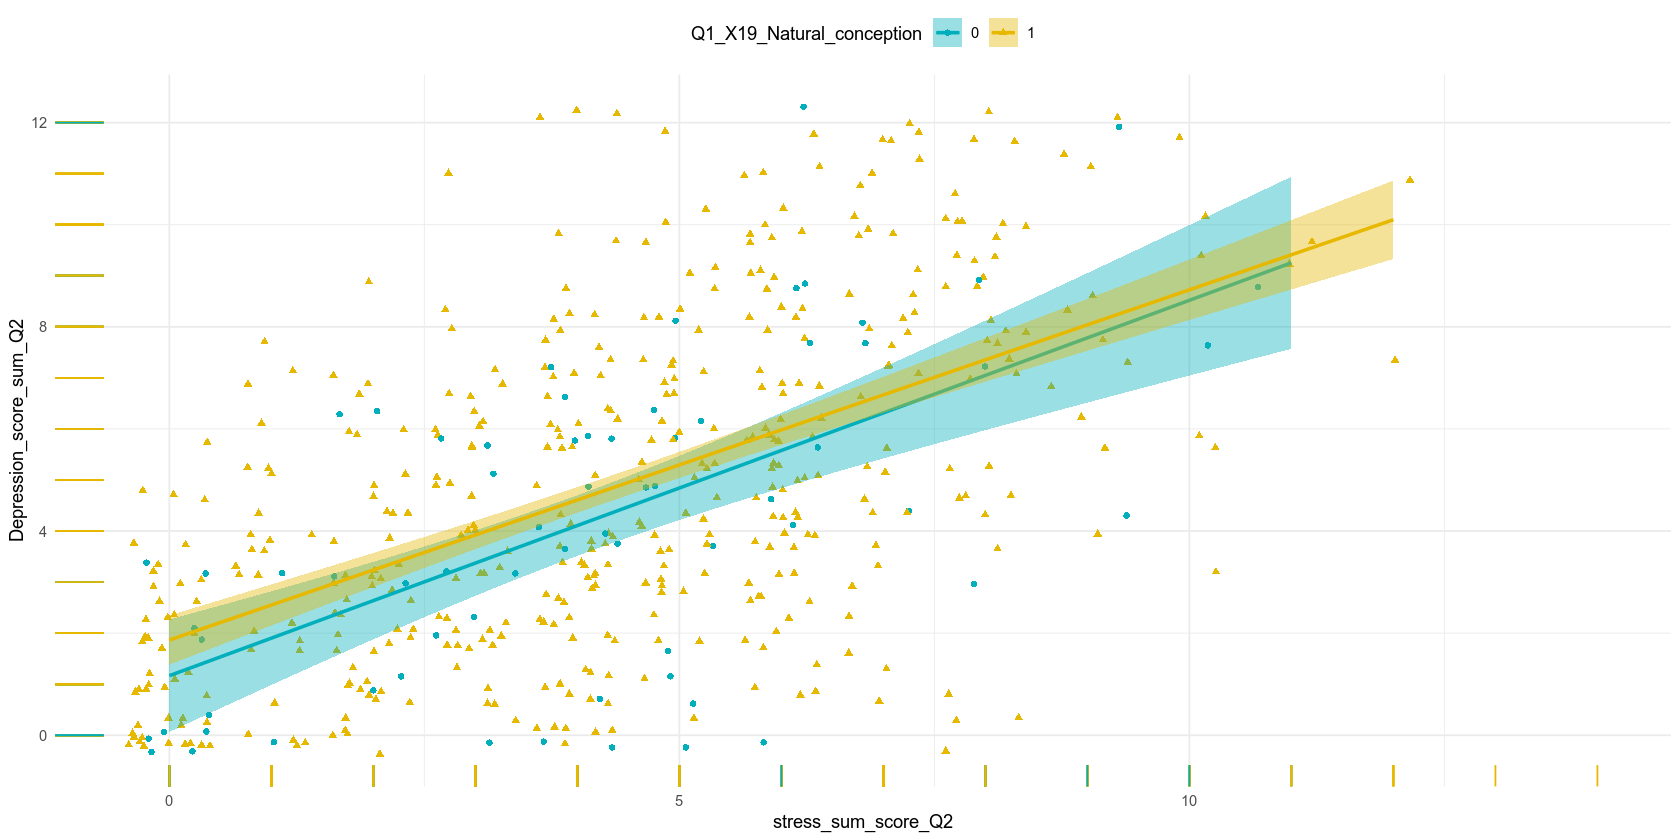

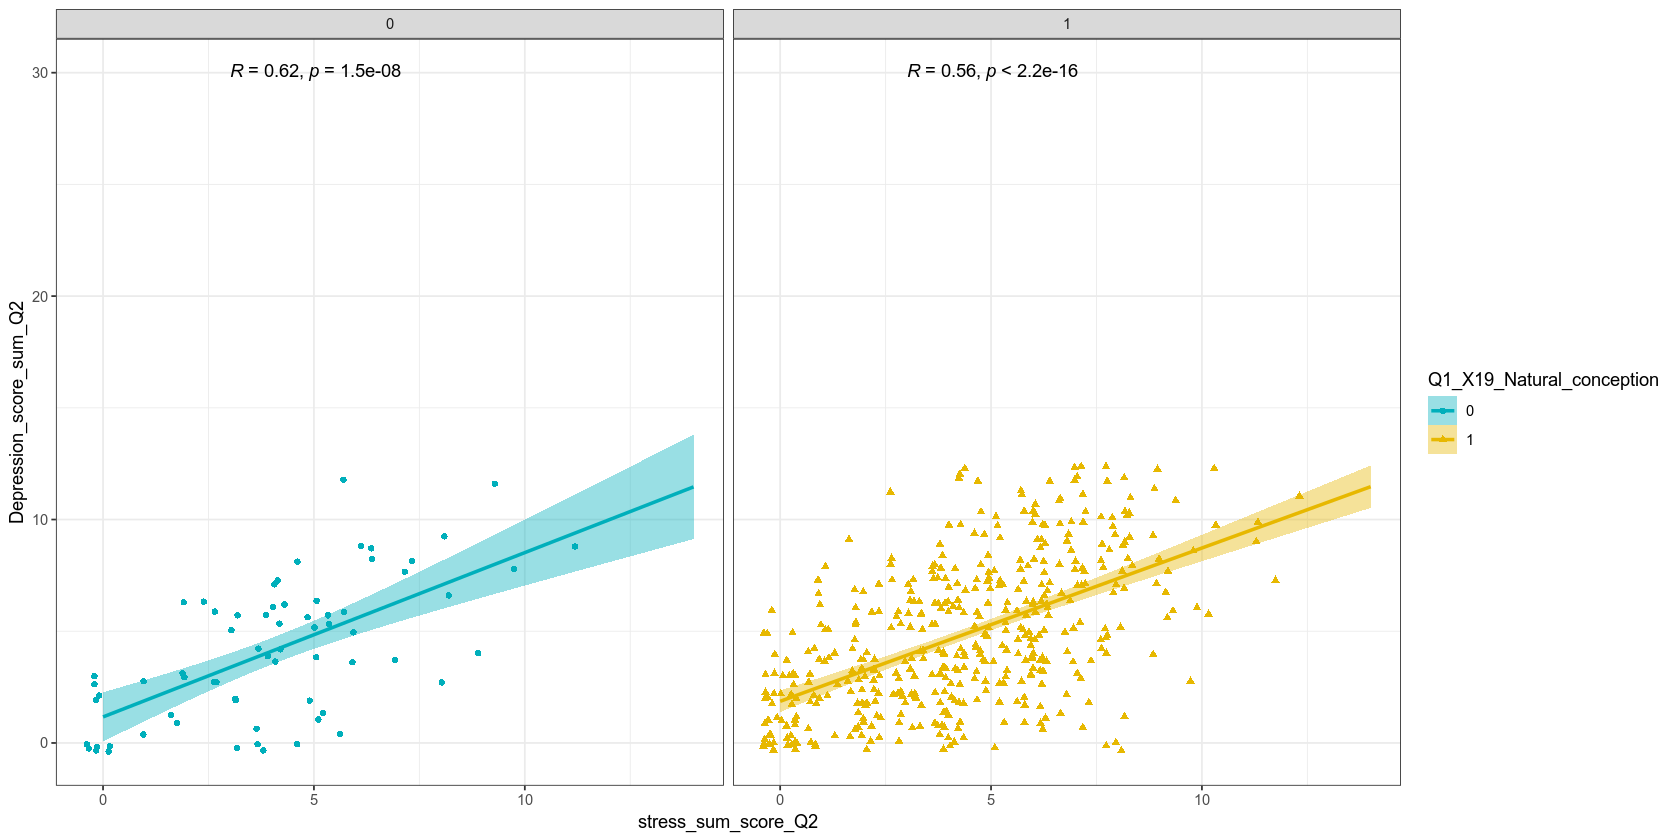

In [174]:
#natural conception
#

b3 <- ggplot(df2, aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Change color and shape by groups (ses-score)
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X19_Natural_conception , shape = Q1_X19_Natural_conception ))+
  geom_smooth(aes(color = Q1_X19_Natural_conception , fill = Q1_X19_Natural_conception), method = "lm") +
  geom_rug(aes(color = Q1_X19_Natural_conception)) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

#Split the plot into multiple panels. Use the function facet_wrap():
b3 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = Q1_X19_Natural_conception, shape = Q1_X19_Natural_conception))+
  geom_smooth(aes(color = Q1_X19_Natural_conception, fill = Q1_X19_Natural_conception), 
              method = "lm", fullrange = TRUE) +
 stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ Q1_X19_Natural_conception) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
  theme_bw()


##### how can i adjust the dimension for this second  graph???? to illustrate better??????????

options(repr.plot.width=14)

In [105]:
table(df2$bristol_rating_Q2)
dim(df2)
df3 <- df2[!(df2$bristol_rating_Q2 == "0"), ]
dim(df3)
# removing NAs which i converted to zero


      0    Fast  Normal    Slow Various 
      5     136     120     172     118 

[1] 551  30

[1] 546  30

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


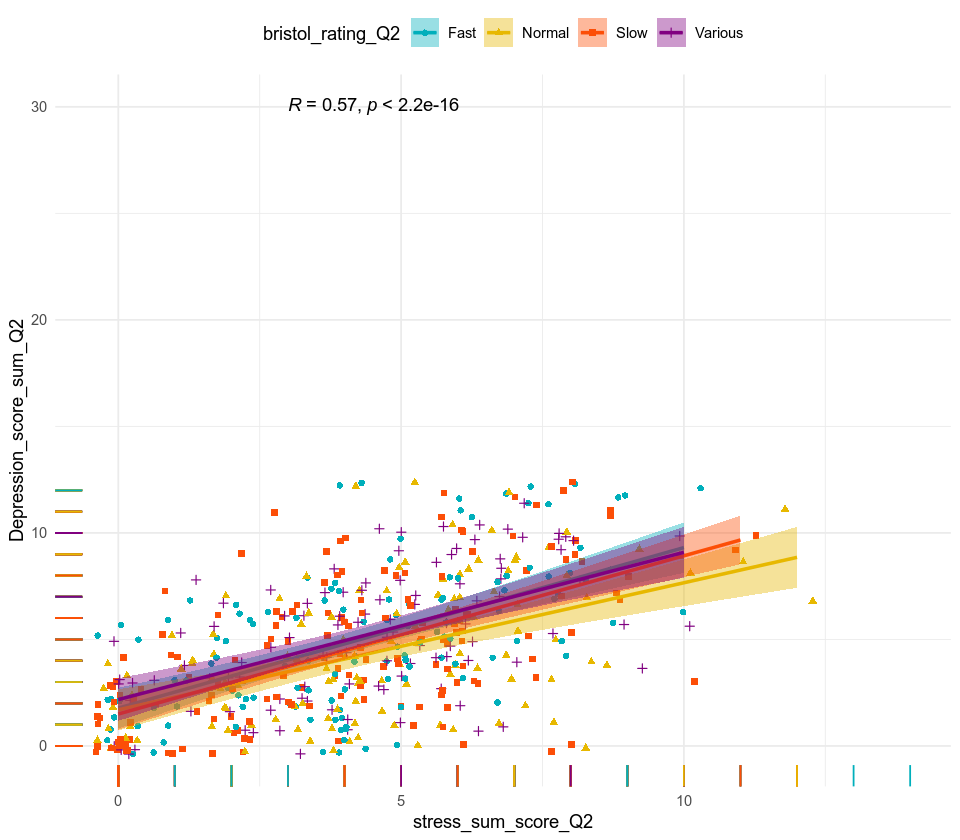

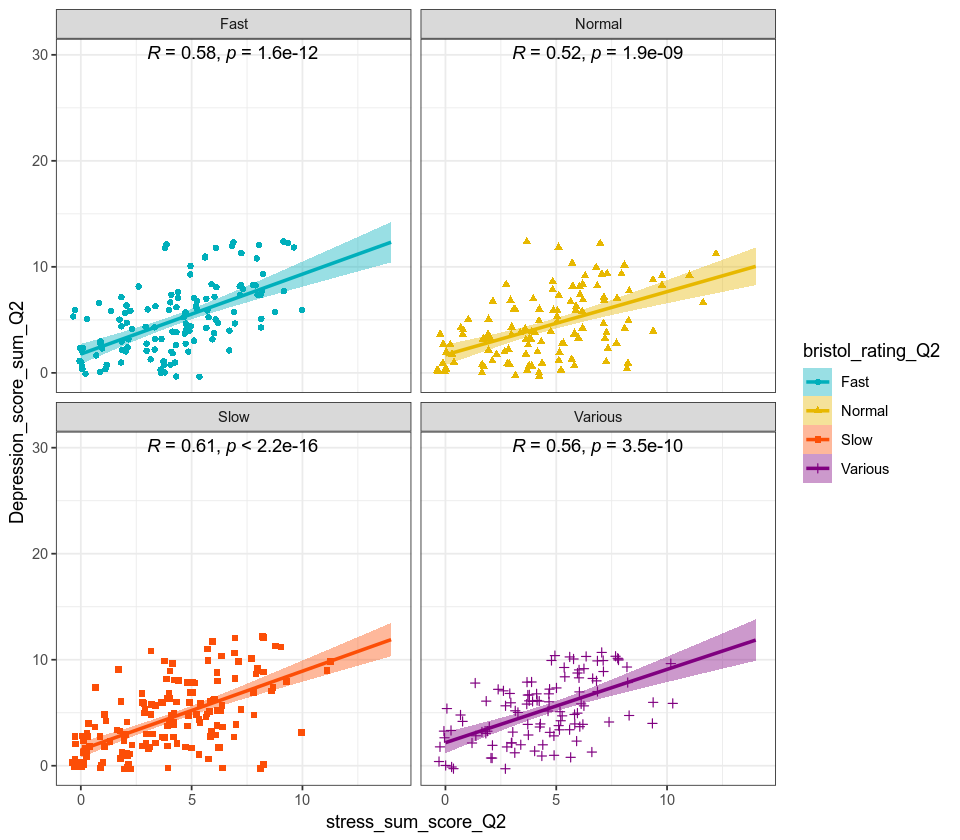

In [106]:
# bristol_rating_Q2 ???????????????

b_bristol2 <- ggplot(df3 , aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()

In [134]:
df4 <- df2[!(is.na(df2$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)),]
dim(df4)
#removing NAs from this column

[1] 545  30

In [136]:
df4_diarrhea <- df4
#df$`Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`
colnames(df4_diarrhea)[colnames(df4_diarrhea) == "Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré"] <- 'diarrhea'
dim(df4_diarrhea)
#lost : 3
table(df4_diarrhea$diarrhea)
sum(is.na(df4_diarrhea$diarrhea))
#df4_diarrhea <- df_diarrhea[!is.na(df_diarrhea$diarrhea),]

[1] 545  30


 Ja Nej 
138 407 

[1] 0

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


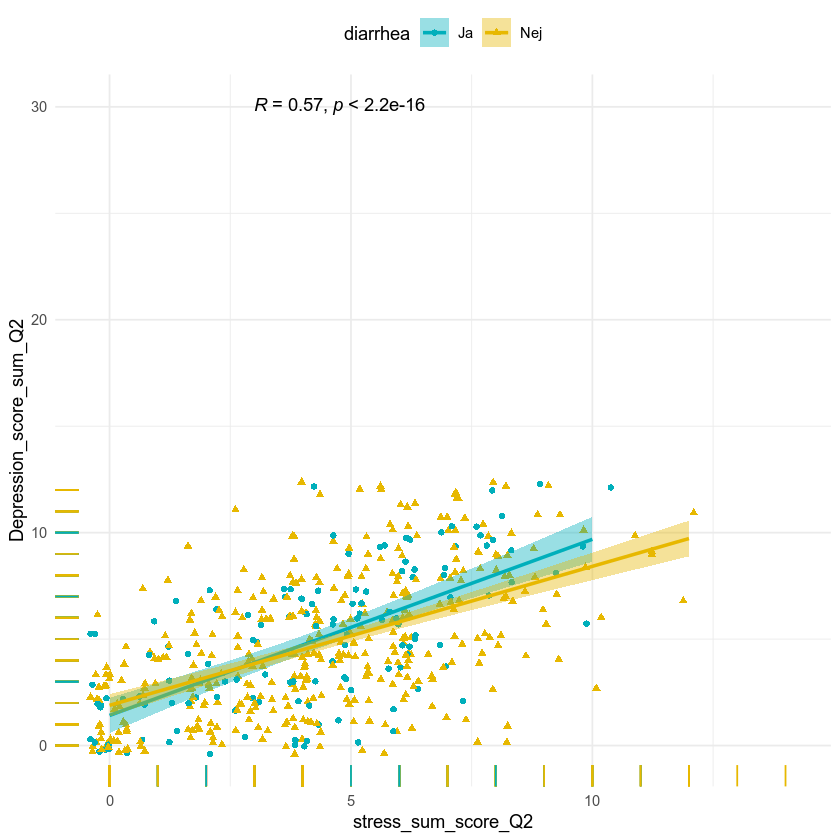

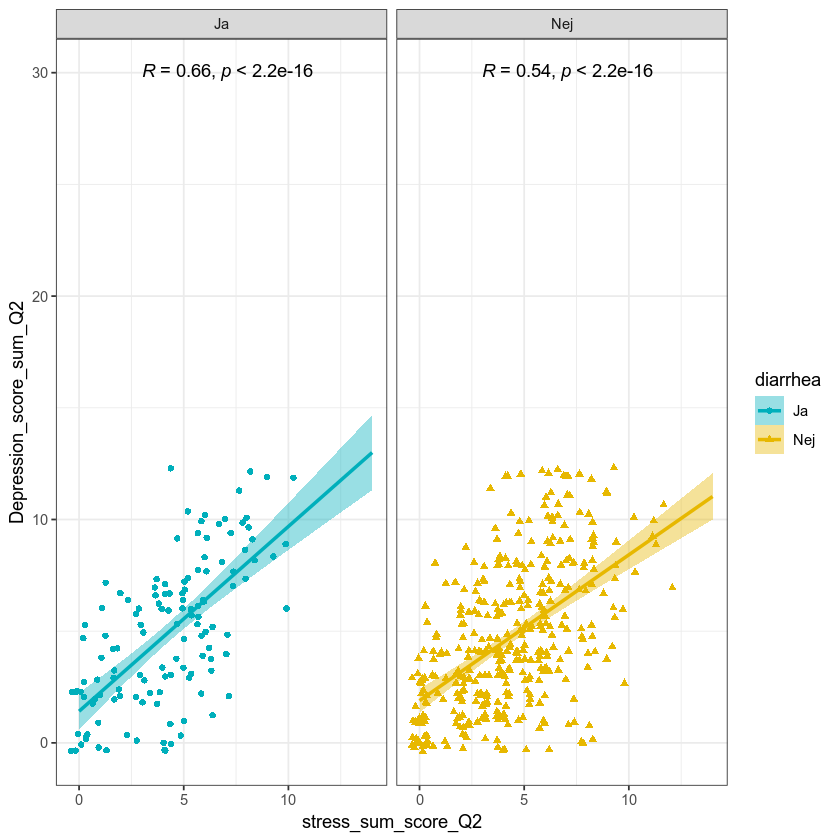

In [137]:
# diarrhea 

b_d <- ggplot(df4_diarrhea , aes(y = Depression_score_sum_Q2 , x = stress_sum_score_Q2))
# Change color and shape by groups (diarrhea)
b_d + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = diarrhea , shape = diarrhea ))+
  geom_smooth(aes(color = diarrhea , fill = diarrhea), method = "lm") +
  geom_rug(aes(color = diarrhea )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
b_d + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = diarrhea , shape = diarrhea))+
  geom_smooth(aes(color = diarrhea, fill = diarrhea), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ diarrhea ) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()

# binary data _ kit2
## boxplot and t test 

In [147]:
kit2_cor <- read.csv( file =  "modified_meta2_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit2_cor)


[1] 552  30

In [121]:
kit2_cor <- read.csv( file =  "modified_meta2_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit2_cor)
kit2_cor2 <- kit2_cor[kit2_cor$kit2.faecal_sample.barcode != 'X100000160886' ,]
dim(kit2_cor2)

[1] 552  30

[1] 551  30

In [124]:
br <-  kit2_cor2[!(kit2_cor2$bristol_rating_Q2 == "0"),]
table(kit2_cor2$bristol_rating_Q2)
table(br$bristol_rating_Q2)



      0    Fast  Normal    Slow Various 
      5     136     120     172     118 


   Fast  Normal    Slow Various 
    136     120     172     118 


	Welch Two Sample t-test

data:  br$stress_sum_score_Q2[which(br$bristol_rating_Q2 == "Normal")] and kit2_cor$stress_sum_score_Q2[which(br$bristol_rating_Q2 == "Fast")]
t = 0.094799, df = 251.15, p-value = 0.9246
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6591721  0.7258388
sample estimates:
mean of x mean of y 
 4.658333  4.625000 


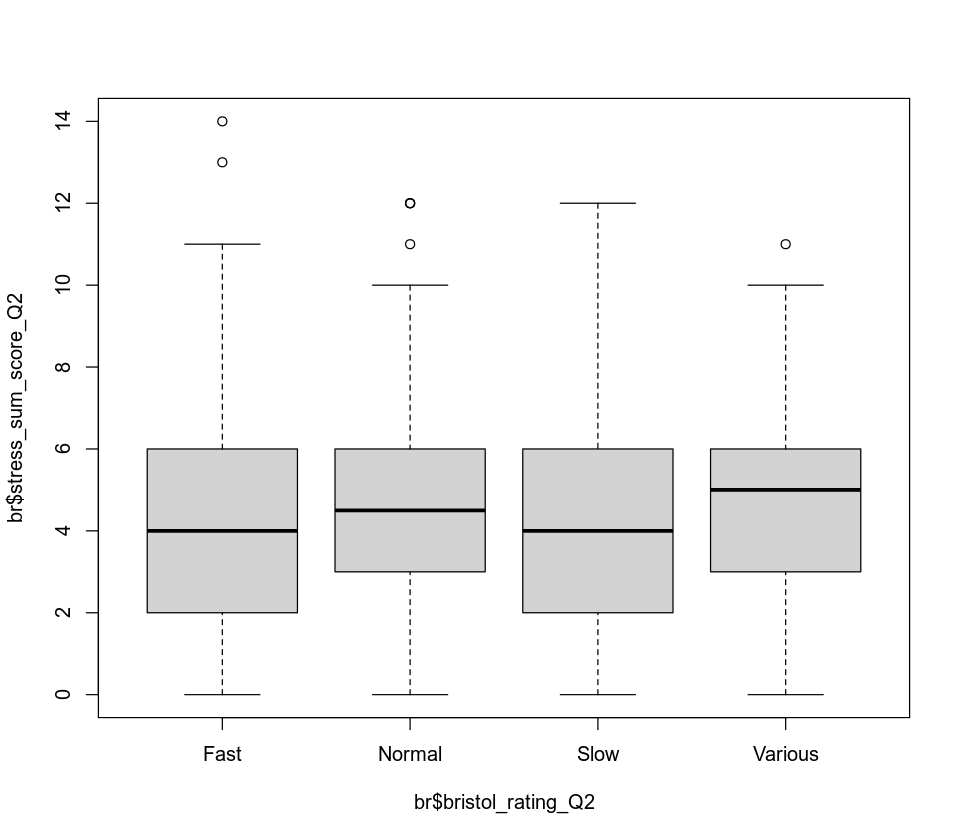

In [125]:
#bristol rating - stess : 
t.test(br$stress_sum_score_Q2[which(br$bristol_rating_Q2=="Normal")],
       kit2_cor$stress_sum_score_Q2[which(br$bristol_rating_Q2=="Fast")])

boxplot(br$stress_sum_score_Q2 ~ br$bristol_rating_Q2)


	Welch Two Sample t-test

data:  br$Depression_score_sum_Q2[which(br$bristol_rating_Q2 == "Normal")] and br$Depression_score_sum_Q2[which(br$bristol_rating_Q2 == "Various")]
t = -2.0018, df = 224.48, p-value = 0.04651
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.61338704 -0.01266338
sample estimates:
mean of x mean of y 
 4.436975  5.250000 


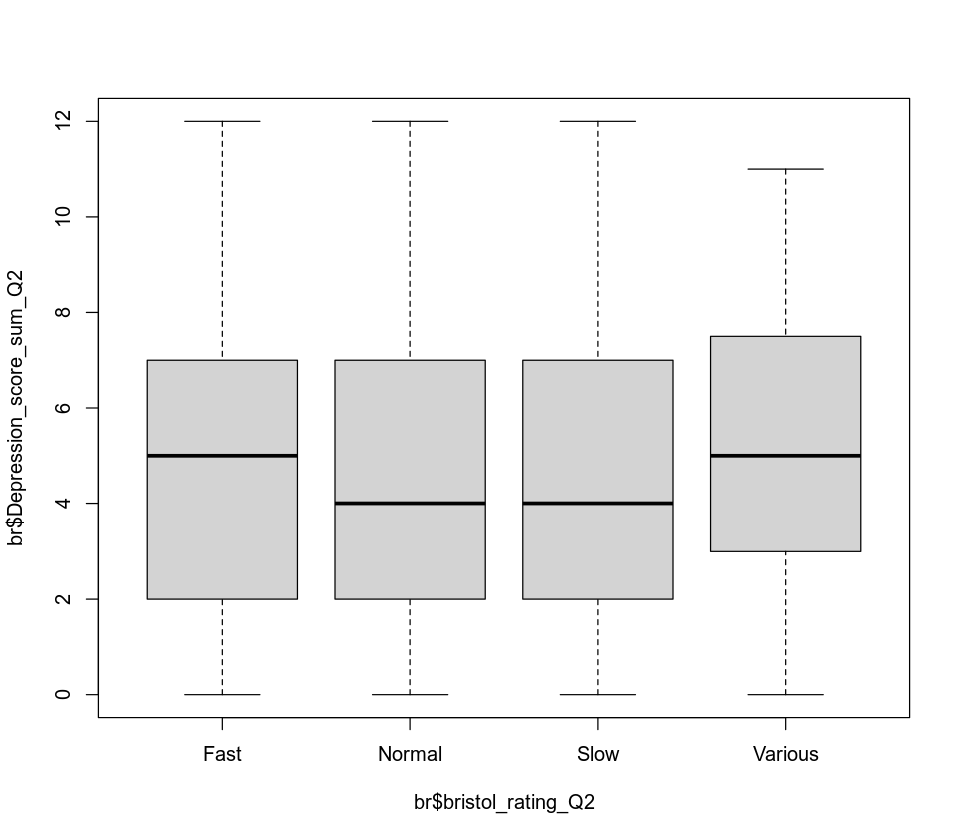

In [127]:
#bristol rating - depression : 
t.test(br$Depression_score_sum_Q2[which(br$bristol_rating_Q2=="Normal")],
       br$Depression_score_sum_Q2[which(br$bristol_rating_Q2=="Various")])

boxplot(br$Depression_score_sum_Q2 ~ br$bristol_rating_Q2)


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Nej")]
t = -0.70677, df = 251.68, p-value = 0.4804
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7053241  0.3327789
sample estimates:
mean of x mean of y 
 4.381295  4.567568 


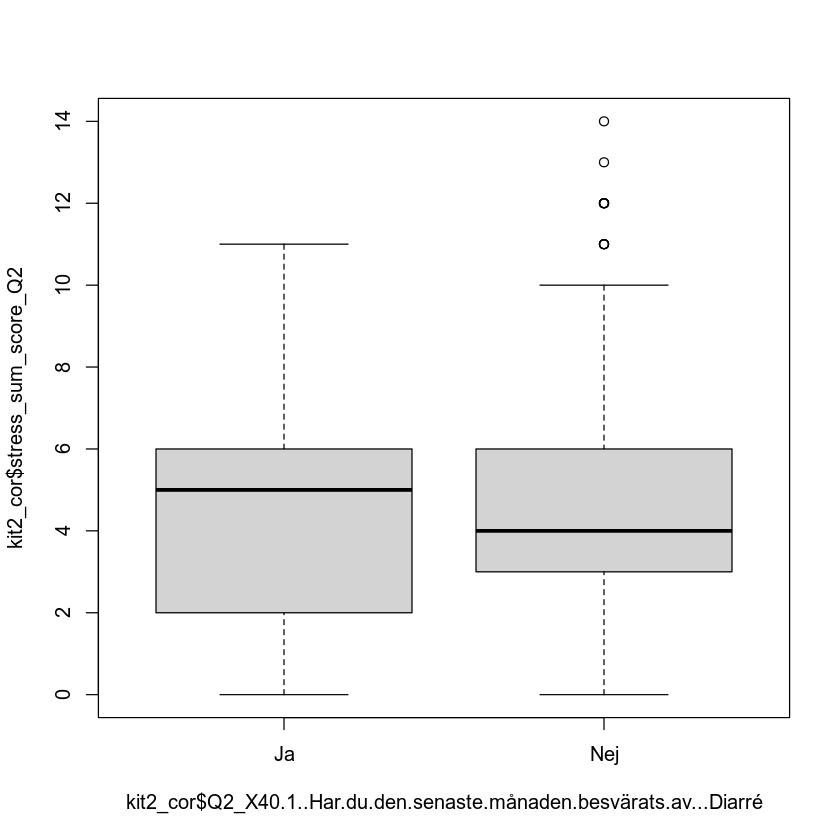

In [154]:
# diarrhea- stress: 

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
#na.action = "na.rm"
t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Nej")], na.action = "na.rm" )


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré == "Nej")]
t = 0.62991, df = 221.94, p-value = 0.5294
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4424396  0.8581612
sample estimates:
mean of x mean of y 
 4.938931  4.731070 


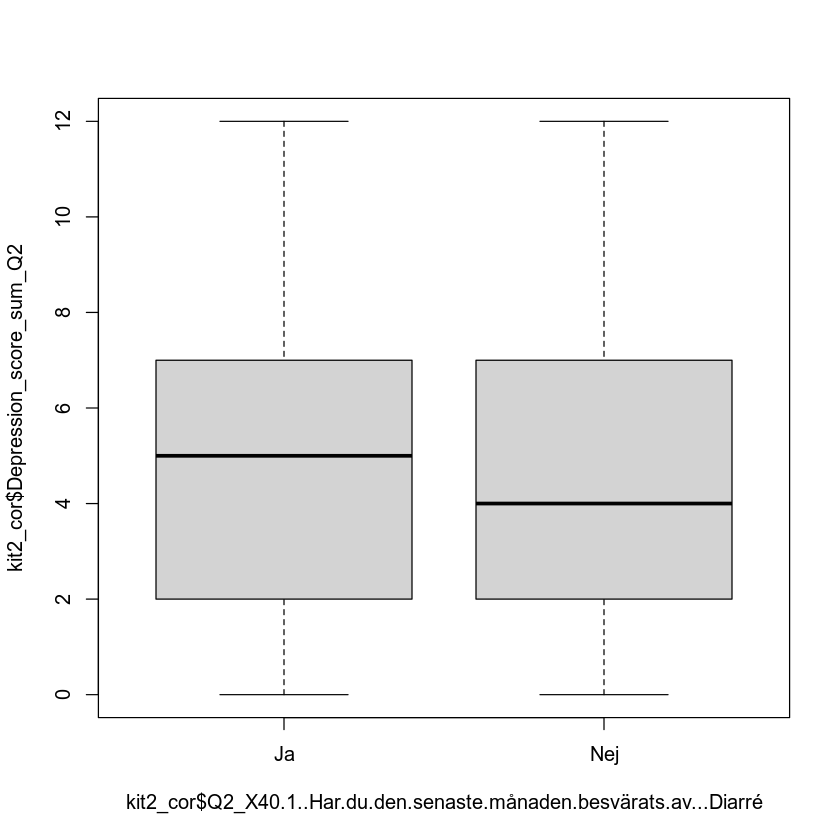

In [155]:
# diarrhea- dep : 

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré`)
#na.action = "na.rm"
t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$`Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré` == "Nej")], na.action = "na.rm" )


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$smoke_kit2_binary == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$smoke_kit2_binary == 1)]
t = 0.35876, df = 3.0417, p-value = 0.7432
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.972247  4.990496
sample estimates:
mean of x mean of y 
 4.509124  4.000000 


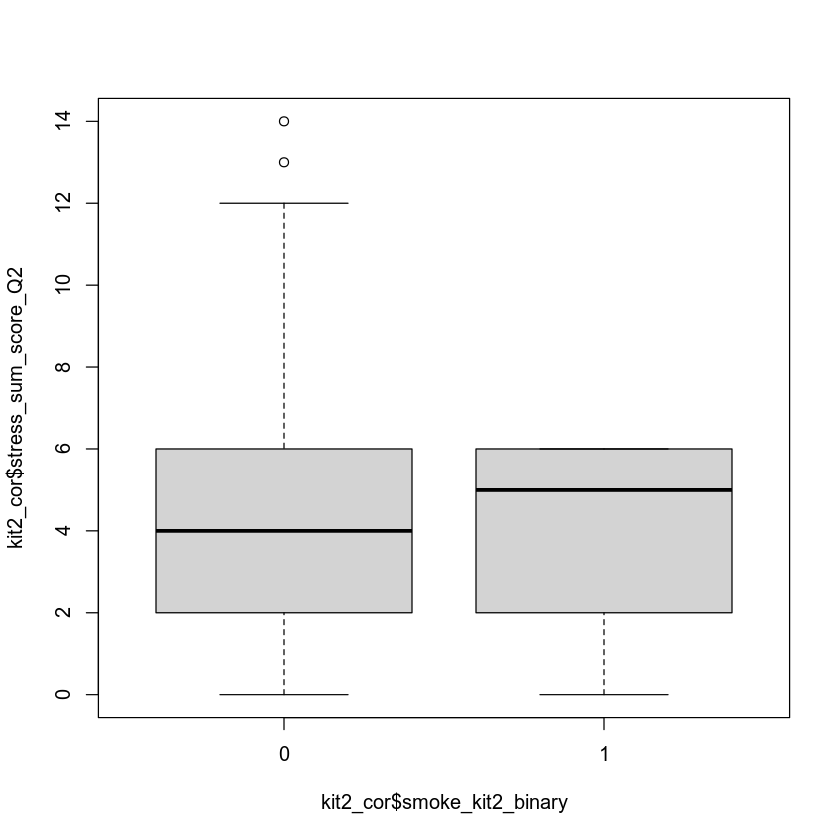

In [157]:
#smoking-stress , convert into binary , either smoker as 1 or non-smoker as 0: 

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$smoke_kit2_binary , na.action = NULL )

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$smoke_kit2_binary == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$smoke_kit2_binary == 1 )], na.action = "na.rm")




	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$smoke_kit2_binary == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$smoke_kit2_binary == 1)]
t = 1.0321, df = 3.5549, p-value = 0.3671
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9424772  1.9734849
sample estimates:
mean of x mean of y 
 4.765504  4.250000 


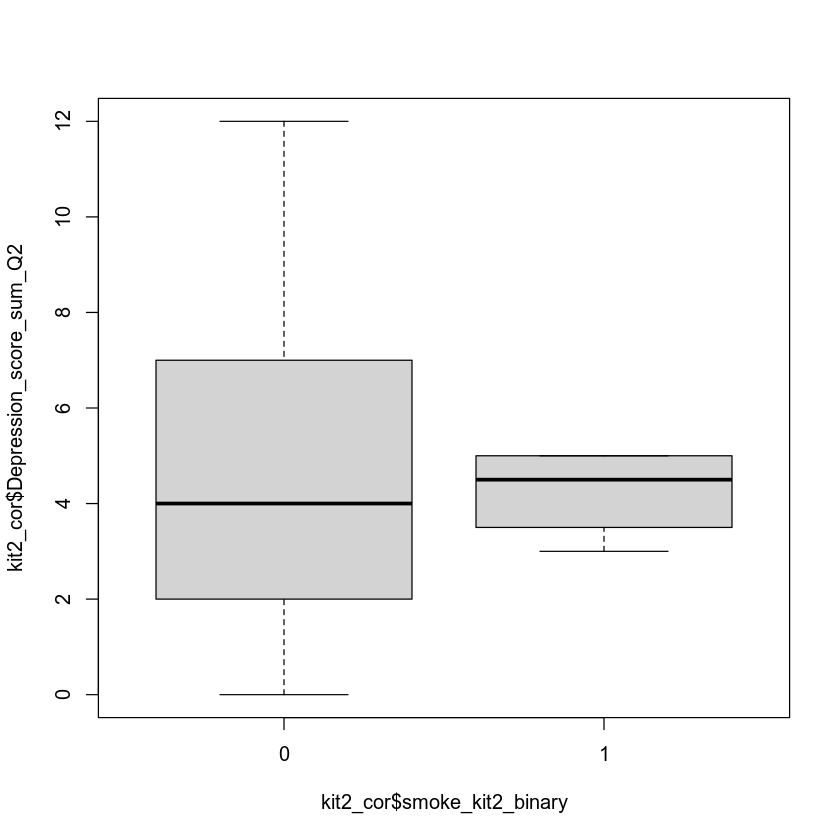

In [158]:
#smoking-depression , convert into binary , either smoker as 1 or non-smoker as 0: 

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$smoke_kit2_binary , na.action = NULL )

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$smoke_kit2_binary == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$smoke_kit2_binary == 1 )], na.action = "na.rm")




            0    Ja, ibland Ja, varje dag           Nej 
            1             3             1           547 

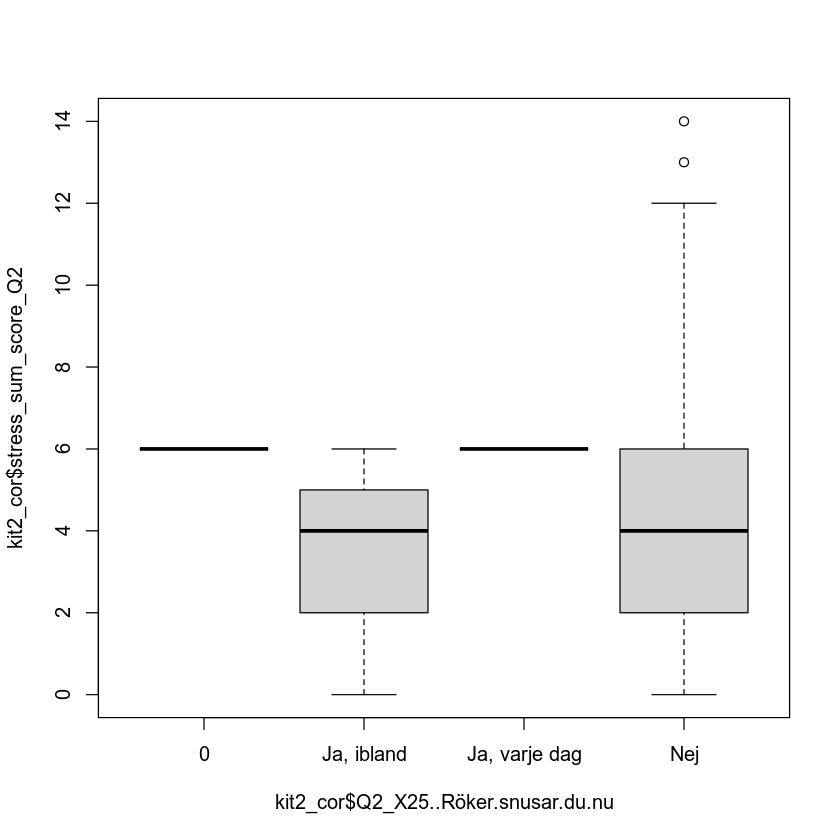

In [161]:
# smoking according to questionnaire: - stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$`Q2_X25..Röker.snusar.du.nu`, na.action = NULL )
table(kit2_cor$`Q2_X25..Röker.snusar.du.nu`)
#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X25..Räker.snusar.du.nu` )  ::: erroooooorrrrr

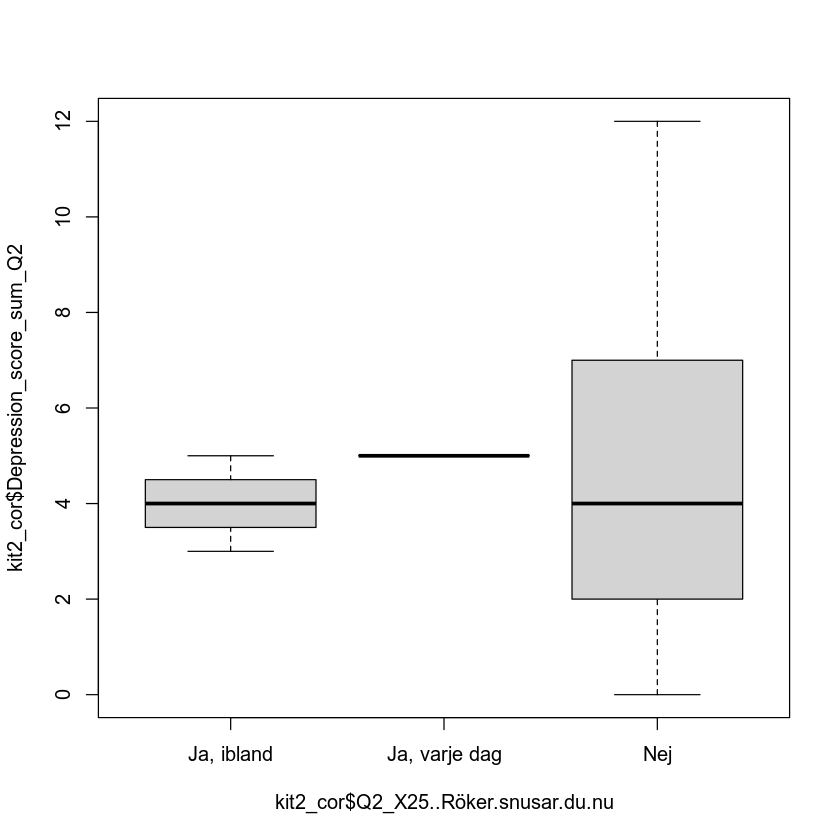

In [162]:
# smoking according to questionnaire: - depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$`Q2_X25..Röker.snusar.du.nu`, na.action = NULL )

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X25..Räker.snusar.du.nu` )  ::: erroooooorrrrr


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Primipara == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Primipara == 1)]
t = 0.77099, df = 547.23, p-value = 0.441
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2801806  0.6422244
sample estimates:
mean of x mean of y 
 4.594306  4.413284 


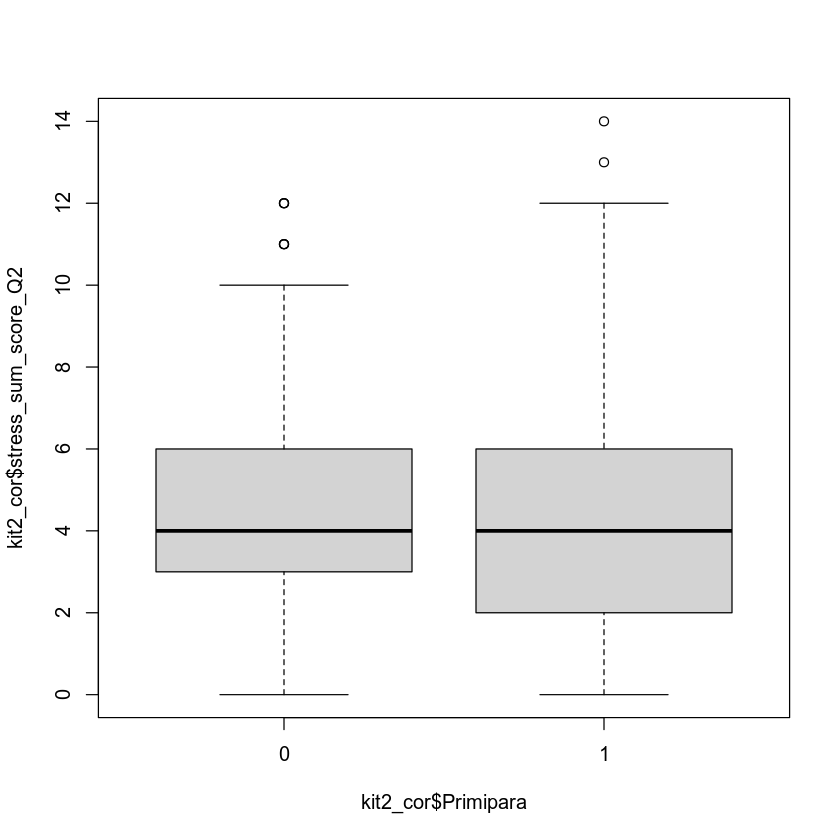

In [164]:
#primipara -stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Primipara , na.action = NULL )
#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Primipara, na.action = "na.rm")
t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Primipara == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Primipara == 1 )], na.action = "na.rm")



	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Primipara == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Primipara == 1)]
t = 1.0134, df = 517.99, p-value = 0.3113
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2685153  0.8406802
sample estimates:
mean of x mean of y 
 4.899628  4.613546 


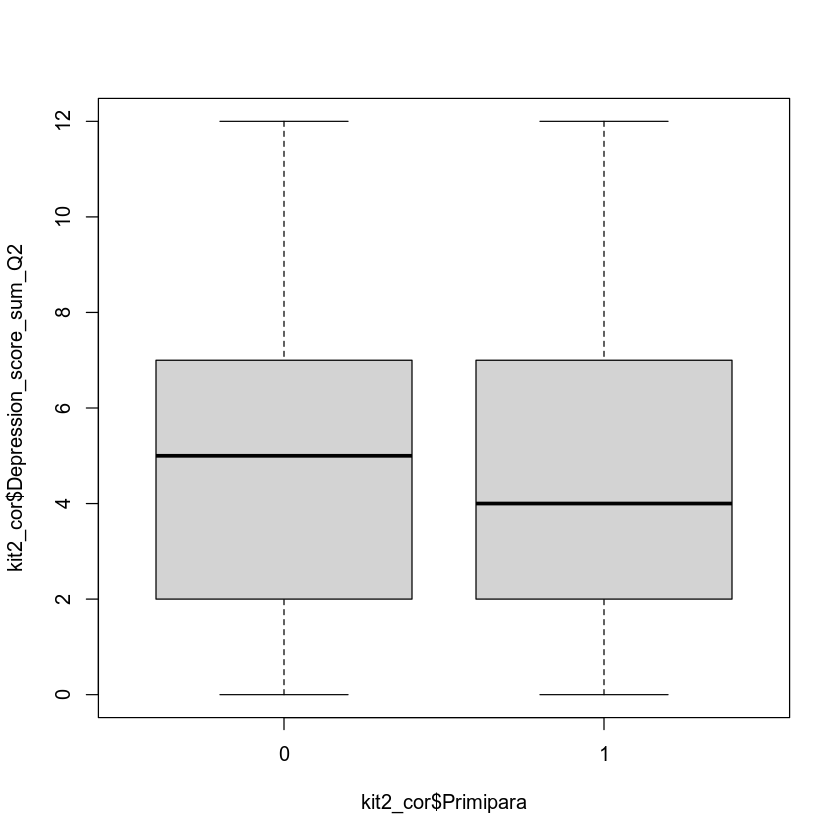

In [166]:
#primipara - depression 
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Primipara , na.action = NULL )

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Primipara, na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Primipara == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Primipara == 1 )], na.action = "na.rm")





	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$alcohol_kit2_binary == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$alcohol_kit2_binary == 1)]
t = -0.63616, df = 20.856, p-value = 0.5316
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.5267421  0.8117045
sample estimates:
mean of x mean of y 
 4.492481  4.850000 


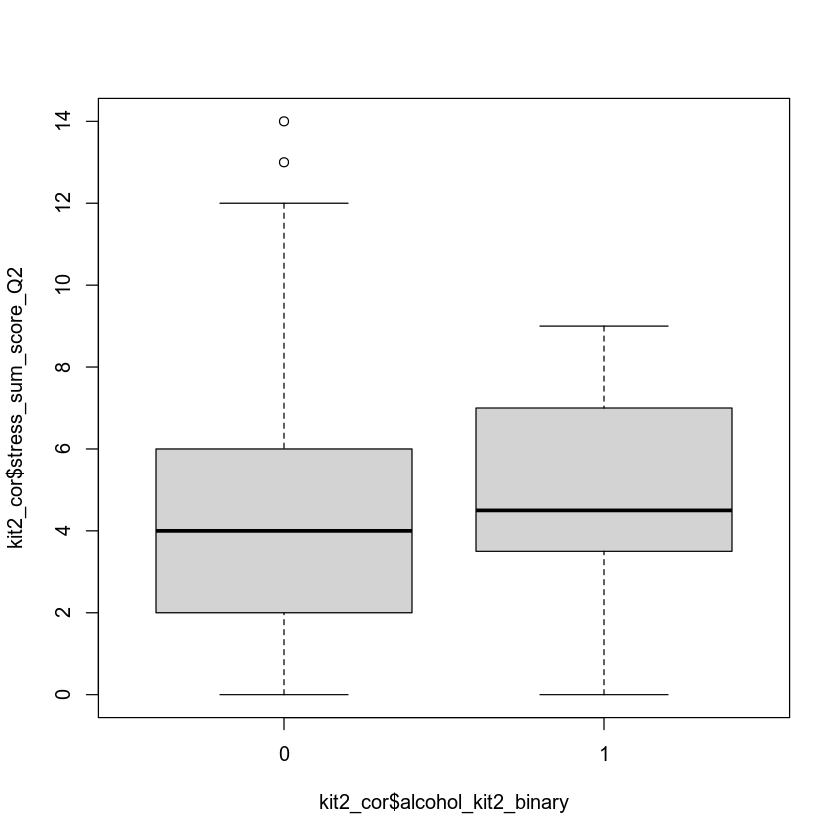

In [167]:
#alcohol_binary _ stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$alcohol_kit2_binary , na.action = NULL )
t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$alcohol_kit2_binary == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$alcohol_kit2_binary == 1 )], na.action = "na.rm")
#table(kit1_cor$Q1_X64_Alcohol_during_pregnancy)


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$alcohol_kit2_binary == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$alcohol_kit2_binary == 1)]
t = -0.47019, df = 19.373, p-value = 0.6435
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.942808  1.229288
sample estimates:
mean of x mean of y 
 4.748503  5.105263 


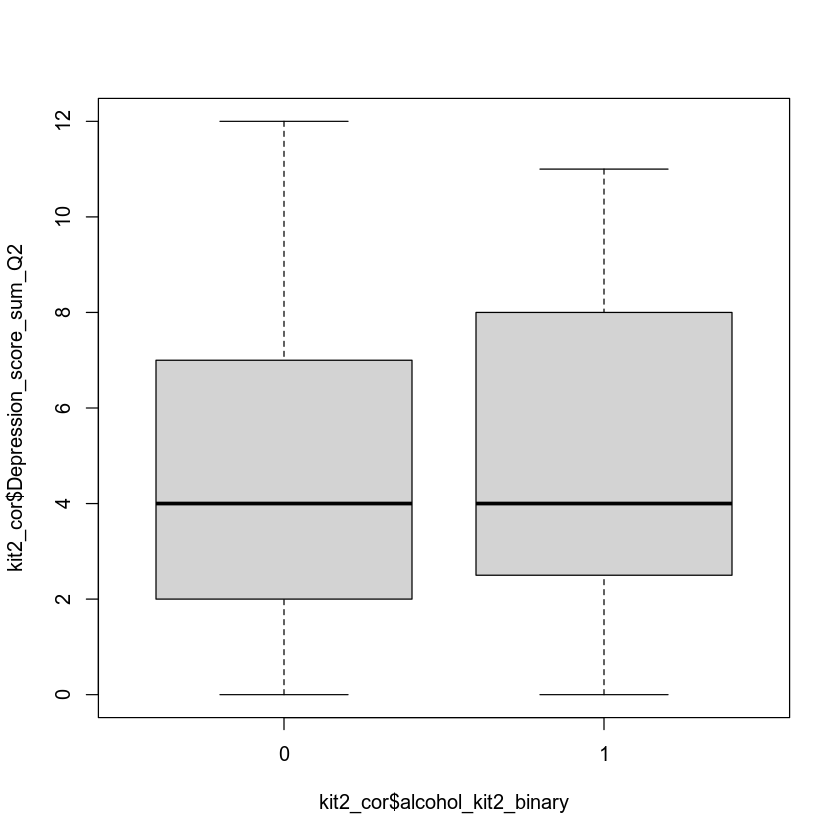

In [168]:
#alcohol_binary _ depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$alcohol_kit2_binary , na.action = NULL )
t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$alcohol_kit2_binary == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$alcohol_kit2_binary == 1 )], na.action = "na.rm")
#table(kit1_cor$Q1_X64_Alcohol_during_pregnancy)


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_gi_medication == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_gi_medication == 1)]
t = -1.6372, df = 2.0237, p-value = 0.2418
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.026537  4.010143
sample estimates:
mean of x mean of y 
 4.491803  7.000000 


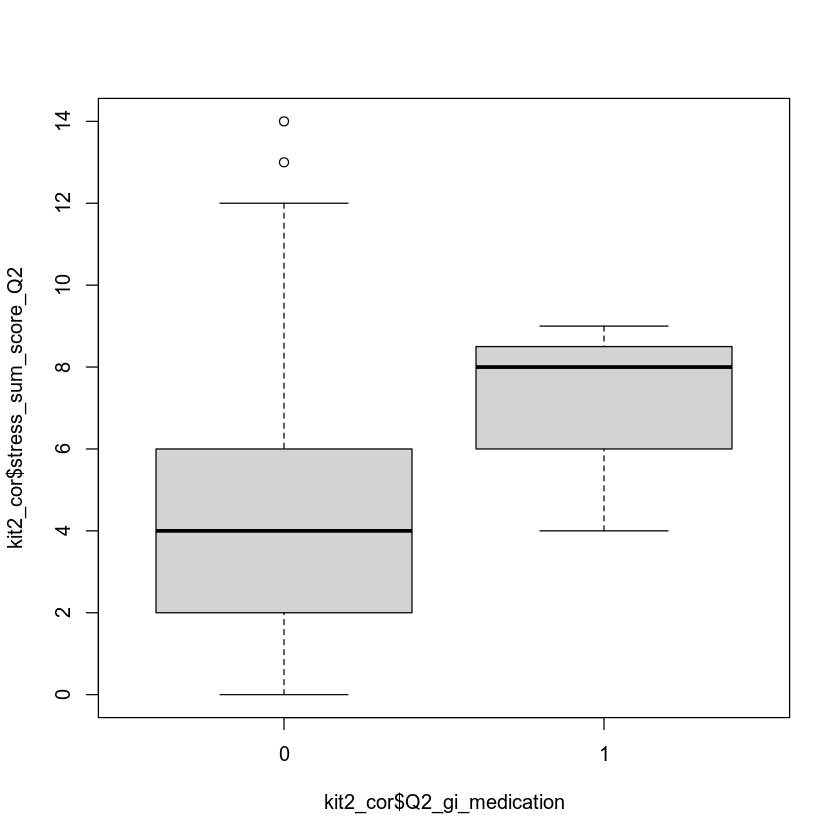

In [171]:
#gi-medication- stress

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q2_gi_medication , na.action = NULL )

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_gi_medication , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_gi_medication == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_gi_medication == 1 )], na.action = "na.rm")



	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_gi_medication == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_gi_medication == 1)]
t = -0.99212, df = 2.0118, p-value = 0.4252
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.741882   8.568446
sample estimates:
mean of x mean of y 
 4.746615  7.333333 


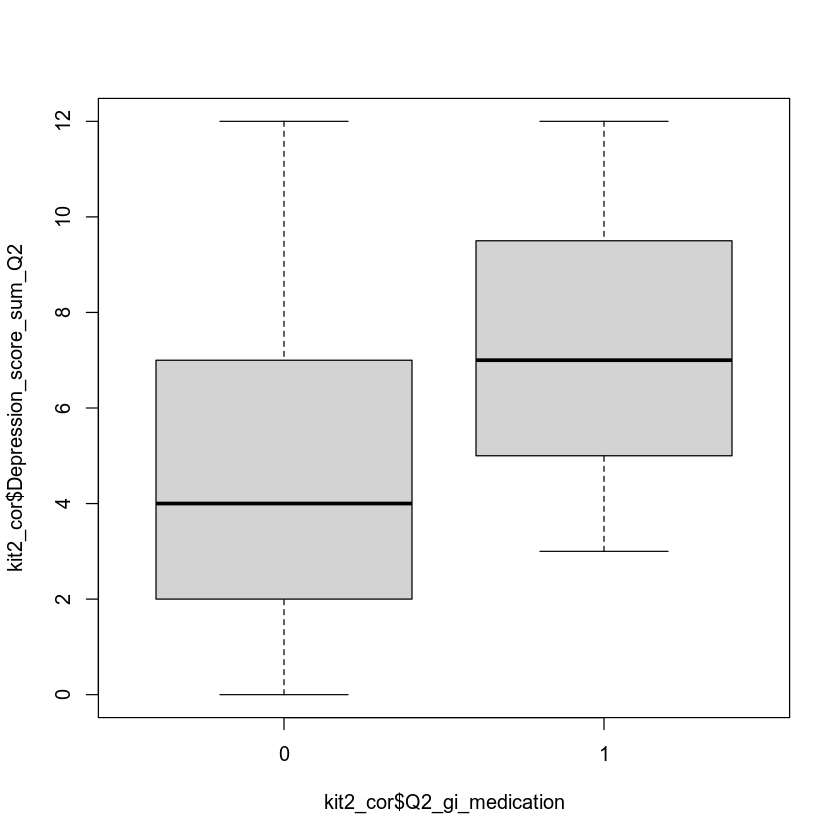

In [173]:
#gi-medication- Depression

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q2_gi_medication , na.action = NULL )

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_gi_medication , na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_gi_medication == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_gi_medication == 1 )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Nej")]
t = 0.87726, df = 17.889, p-value = 0.392
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.039197  2.528086
sample estimates:
mean of x mean of y 
 5.400000  4.655556 


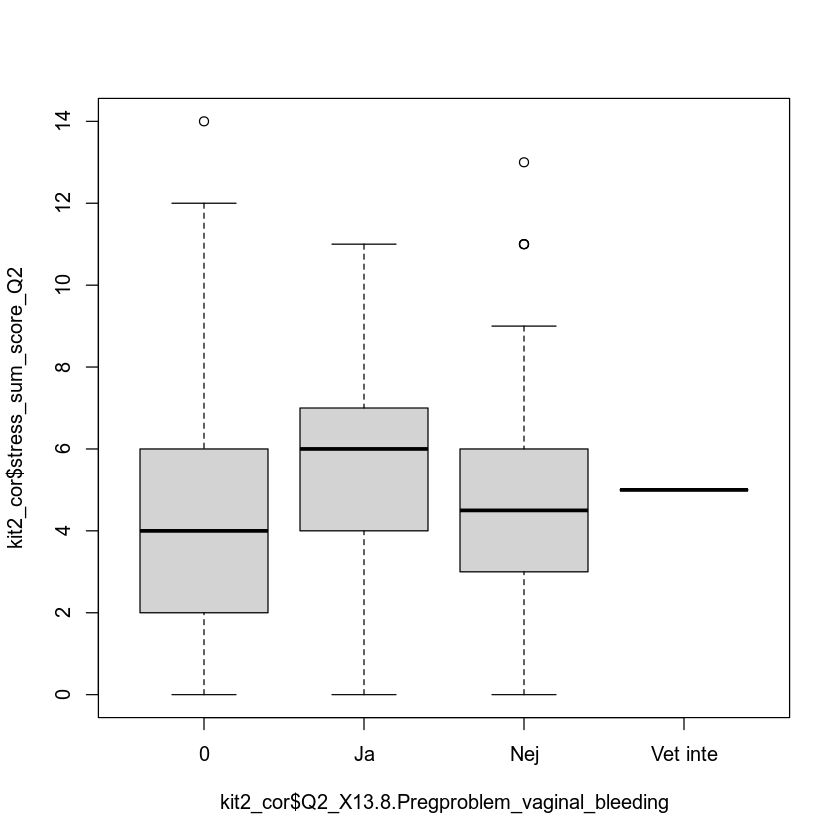

In [186]:
#vaginal bleeding_stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding , na.action = NULL )

sum(is.na(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding))

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Nej")]
t = 1.0586, df = 19.189, p-value = 0.3029
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8801818  2.6841685
sample estimates:
mean of x mean of y 
 5.785714  4.883721 


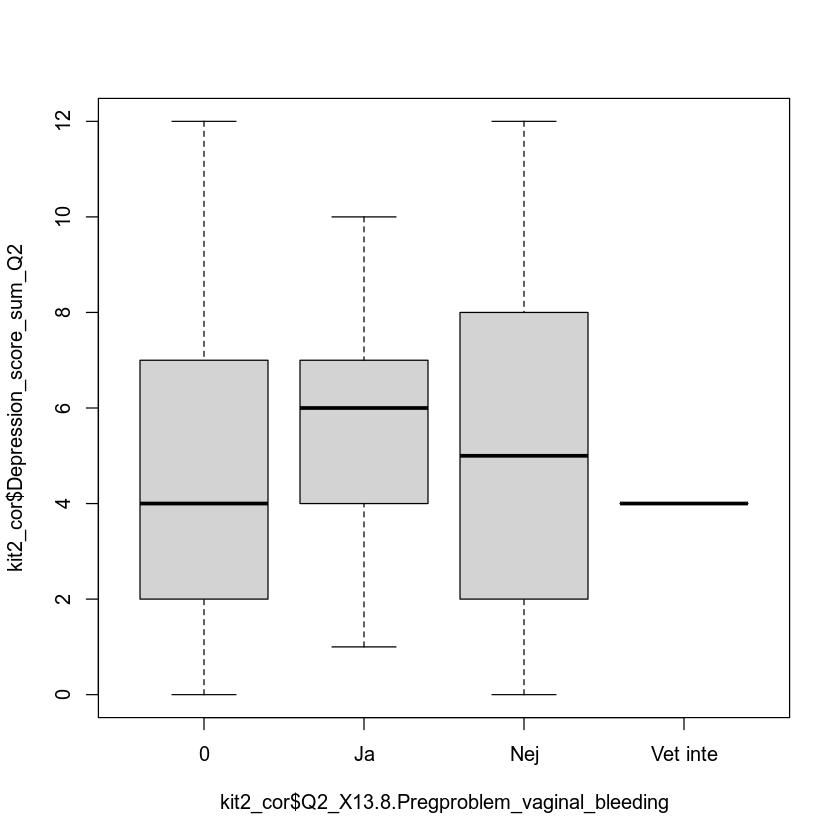

In [187]:
#vaginal bleeding_depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding , na.action = NULL )

sum(is.na(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding))

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.8.Pregproblem_vaginal_bleeding == "Nej" )], na.action = "na.rm")


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$vaginal_bleeding_binary == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$vaginal_bleeding_binary == 1)]
t = -1.1404, df = 14.624, p-value = 0.2725
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.642123  0.803017
sample estimates:
mean of x mean of y 
 4.480447  5.400000 


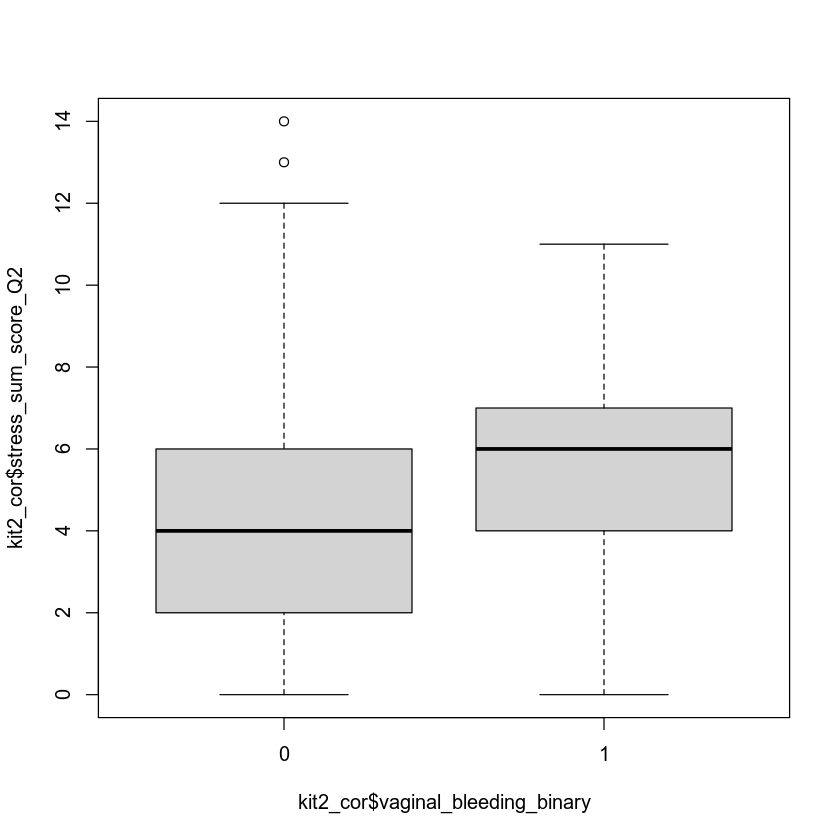

In [180]:
#vaginal bleeding_binary _stress

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$vaginal_bleeding_binary , na.action = NULL )

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_gi_medication , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$vaginal_bleeding_binary == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$vaginal_bleeding_binary == 1 )], na.action = "na.rm")


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$vaginal_bleeding_binary == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$vaginal_bleeding_binary == 1)]
t = -1.341, df = 13.917, p-value = 0.2014
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.7368253  0.6317999
sample estimates:
mean of x mean of y 
 4.733202  5.785714 


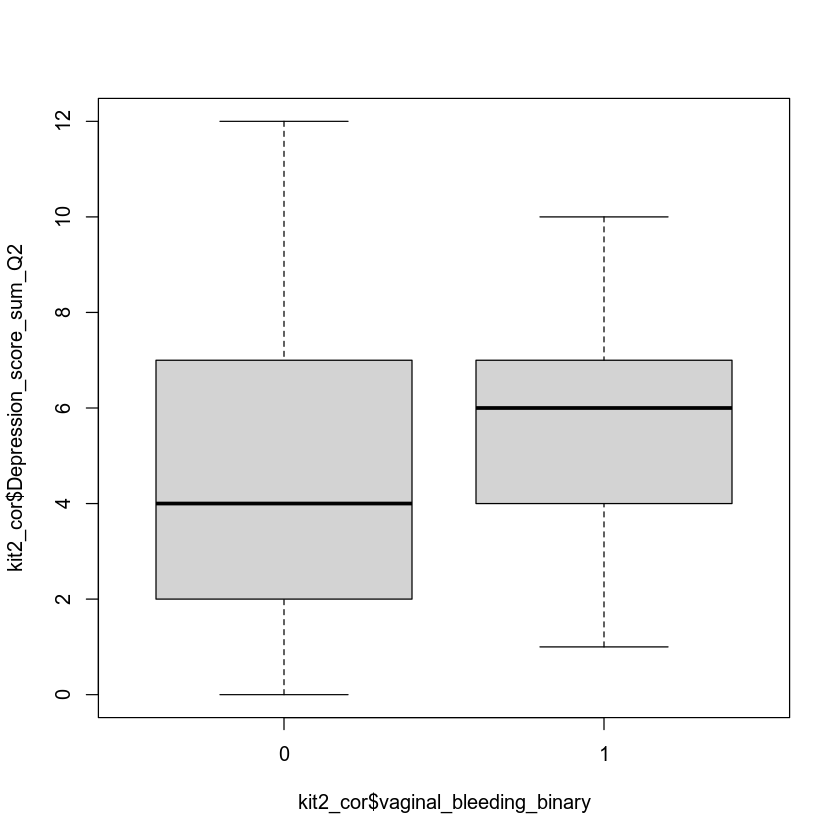

In [184]:
#vaginal bleeding_binary _ depression

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$vaginal_bleeding_binary , na.action = NULL )

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_gi_medication , na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$vaginal_bleeding_binary == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$vaginal_bleeding_binary == 1 )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Nej")]
t = -0.5124, df = 11.799, p-value = 0.6178
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.195552  1.360769
sample estimates:
mean of x mean of y 
 4.300000  4.717391 


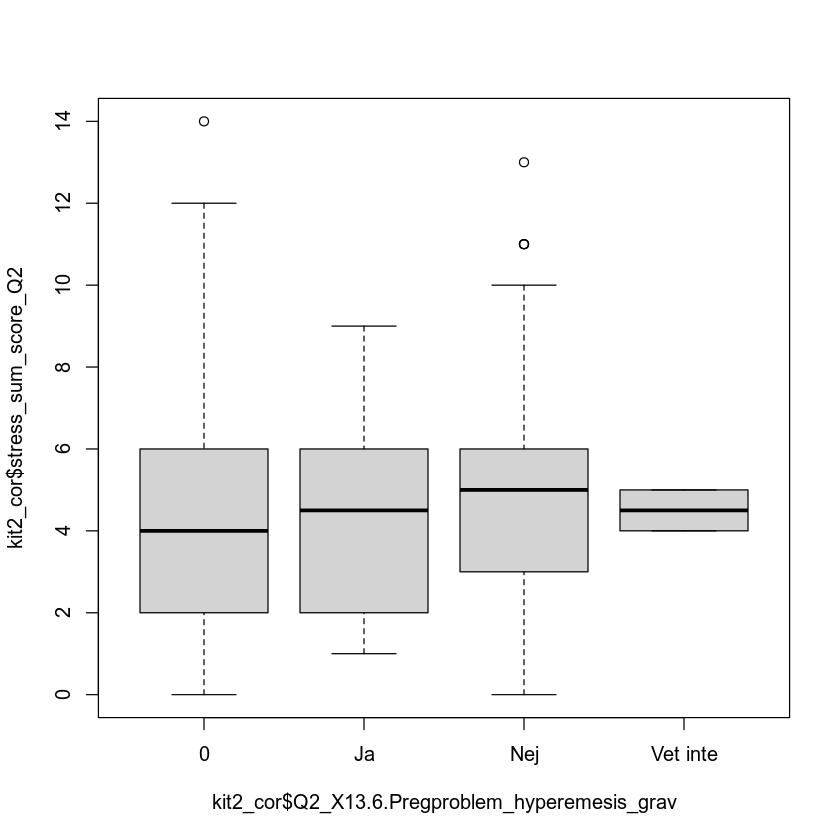

In [189]:
#hyperemesis- stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav, na.action = NULL )

sum(is.na(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_X13.6..Vilken.vilka.graviditetsrelaterade.komplikationer.har , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which( kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Nej")]
t = 0.20781, df = 9.0389, p-value = 0.84
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.861171  3.440447
sample estimates:
mean of x mean of y 
 5.222222  4.932584 


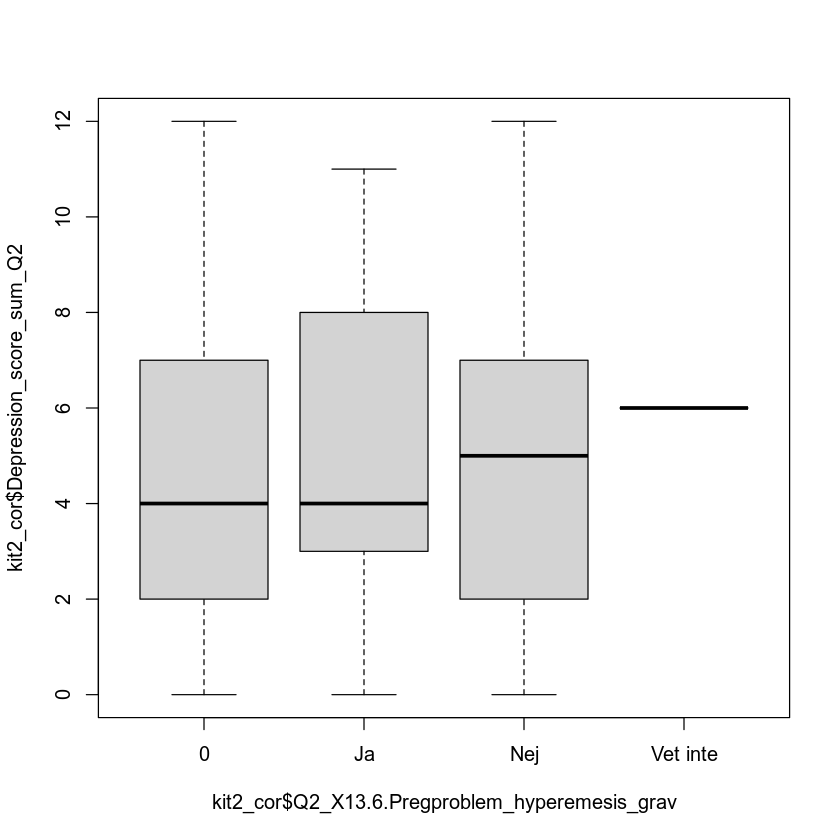

In [190]:
#hyperemesis- depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav, na.action = NULL )

sum(is.na(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_X13.6..Vilken.vilka.graviditetsrelaterade.komplikationer.har , na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which( kit2_cor$Q2_X13.6.Pregproblem_hyperemesis_grav == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X19_Natural_conception == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X19_Natural_conception == 1)]
t = -0.94092, df = 102.36, p-value = 0.349
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9546710  0.3403314
sample estimates:
mean of x mean of y 
  4.24000   4.54717 


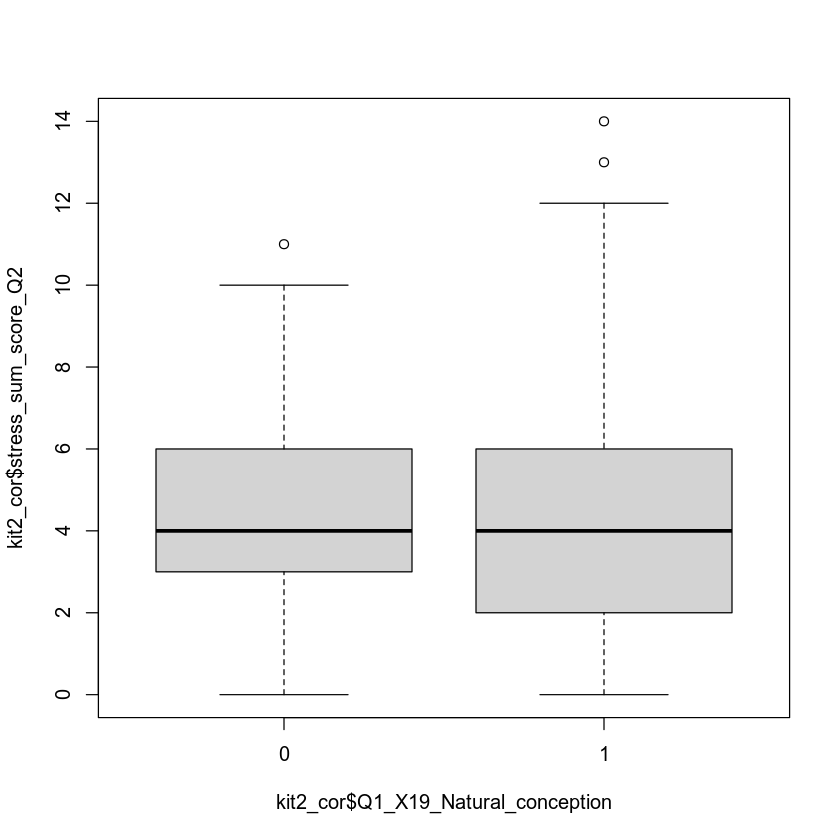

In [191]:
#Natural_conception) -stress

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q1_X19_Natural_conception, na.action = NULL )

sum(is.na(kit2_cor$Q1_X19_Natural_conception))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q1_X19_Natural_conception , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X19_Natural_conception == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X19_Natural_conception == 1 )], na.action = "na.rm")



[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X19_Natural_conception == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X19_Natural_conception == 1)]
t = -1.6975, df = 90.28, p-value = 0.09305
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.4975196  0.1175092
sample estimates:
mean of x mean of y 
 4.161765  4.851770 


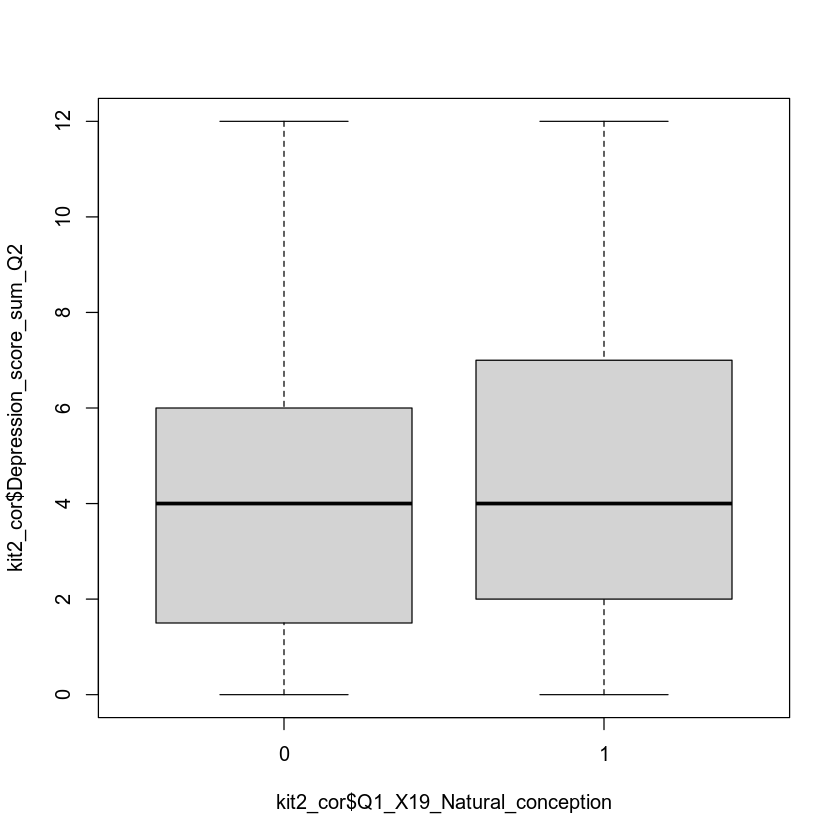

In [192]:
#Natural_conception) - depression

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q1_X19_Natural_conception, na.action = NULL )

sum(is.na(kit2_cor$Q1_X19_Natural_conception))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q1_X19_Natural_conception , na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X19_Natural_conception == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X19_Natural_conception == 1 )], na.action = "na.rm")



[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 1)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 2)]
t = 0.40735, df = 54.941, p-value = 0.6853
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8445152  1.2754032
sample estimates:
mean of x mean of y 
 4.729730  4.514286 



	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 1)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 3)]
t = 0.50481, df = 42.673, p-value = 0.6163
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7481541  1.2476136
sample estimates:
mean of x mean of y 
  4.72973   4.48000 



	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 2)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 3)]
t = 0.12514, df = 246.47, p-value = 0.9005
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5053631  0.5739346
sample estimates:
mean of x mean of y 
 4.514286  4.480000 


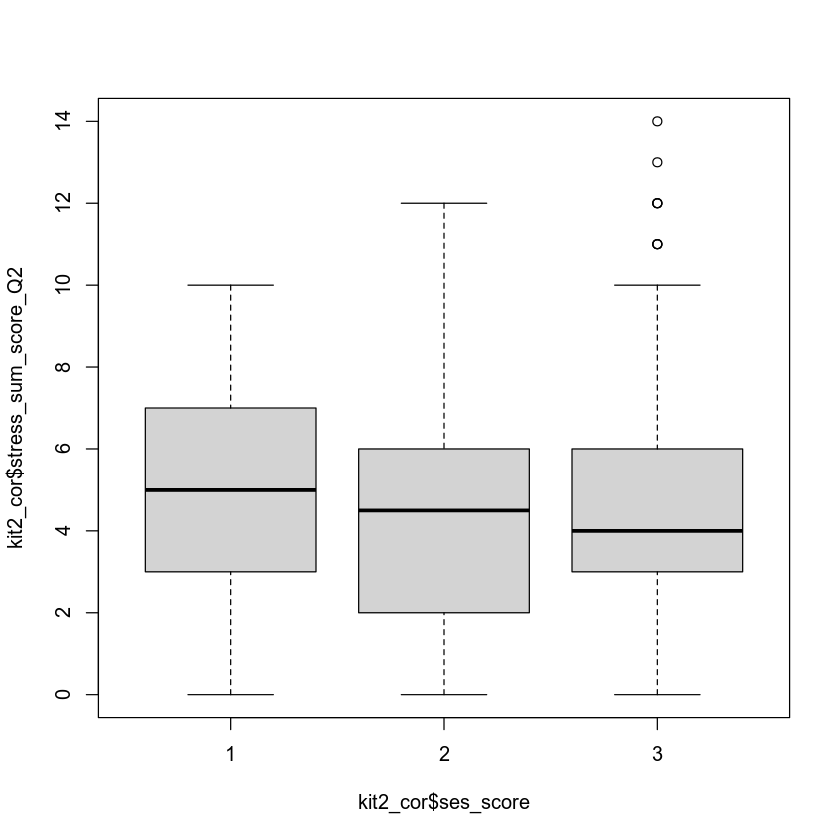

In [193]:
#ses_score_ stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$ses_score, na.action = NULL )

sum(is.na(kit2_cor$ses_score))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$ses_score, na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 1 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 2 )], na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 1 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 3 )], na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 2 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$ses_score == 3 )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 1)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 2)]
t = 0.76201, df = 59.786, p-value = 0.449
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6989664  1.5591168
sample estimates:
mean of x mean of y 
 5.114286  4.684211 



	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 1)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 3)]
t = 0.69489, df = 43.015, p-value = 0.4909
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6821214  1.3993292
sample estimates:
mean of x mean of y 
 5.114286  4.755682 



	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 2)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 3)]
t = -0.21387, df = 233.58, p-value = 0.8308
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7298731  0.5869306
sample estimates:
mean of x mean of y 
 4.684211  4.755682 


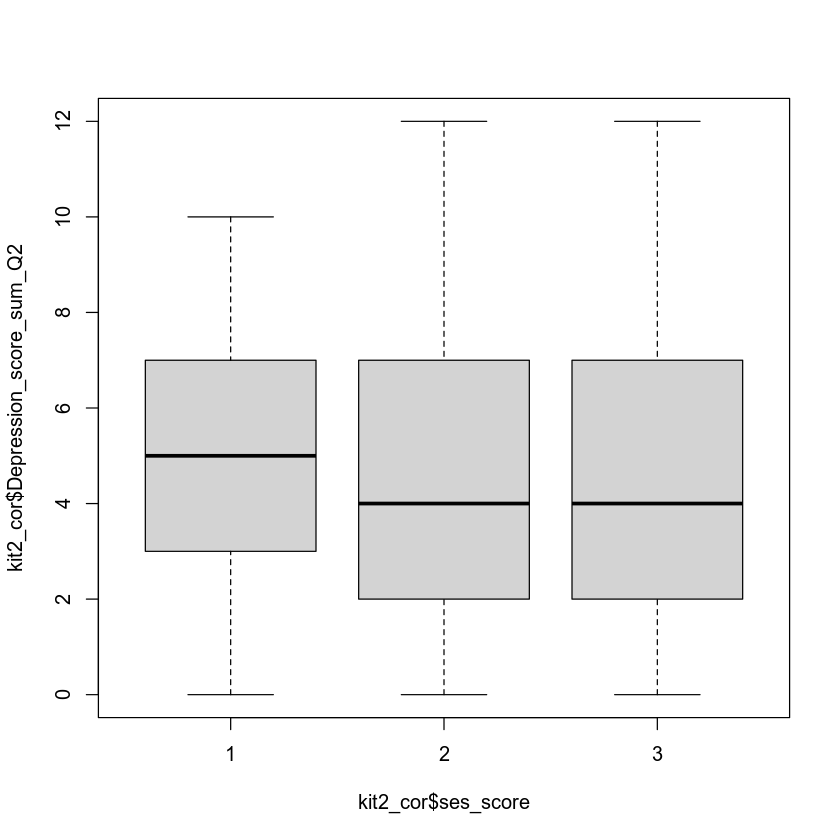

In [195]:
#ses_score_ dep
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$ses_score, na.action = NULL )

sum(is.na(kit2_cor$ses_score))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$ses_score, na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 1 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 2 )], na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 1 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 3 )], na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 2 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$ses_score == 3 )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Nej")]
t = 0.13642, df = 93.303, p-value = 0.8918
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5980739  0.6863092
sample estimates:
mean of x mean of y 
 4.544118  4.500000 


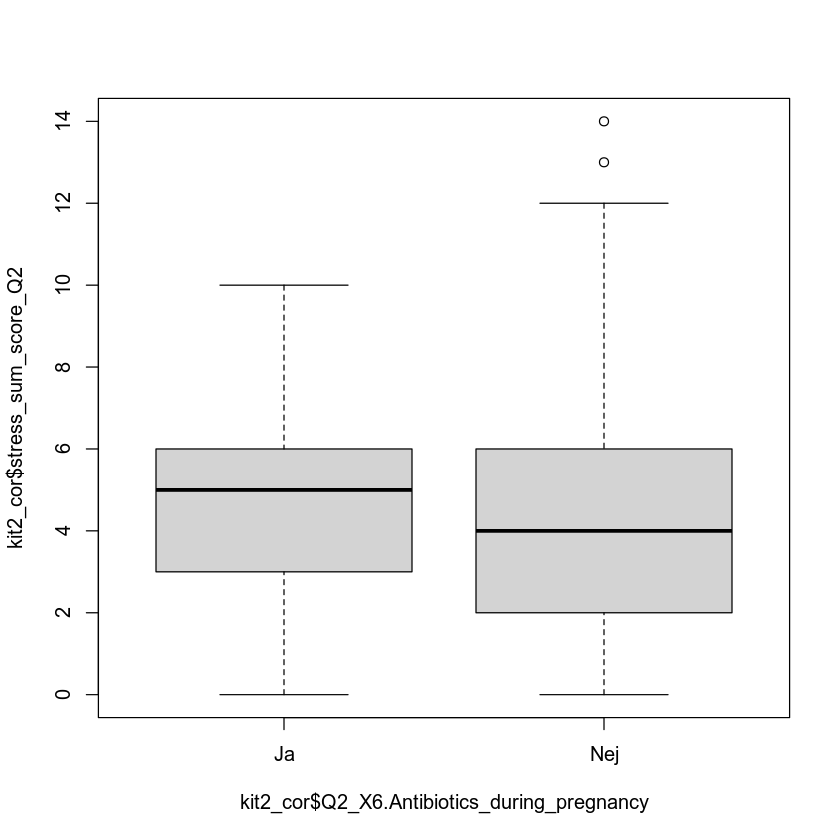

In [200]:
#Antibiotics_during_this_pregnancy - stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q2_X6.Antibiotics_during_pregnancy, na.action = NULL )

sum(is.na(kit2_cor$Q2_X6.Antibiotics_during_pregnancy))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X6..Har.du.hittills.tagit.antibiotika.vid.nägot.tillfälle.u`, na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Nej")]
t = -0.35844, df = 89.154, p-value = 0.7209
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.972475  0.675234
sample estimates:
mean of x mean of y 
 4.632353  4.780973 


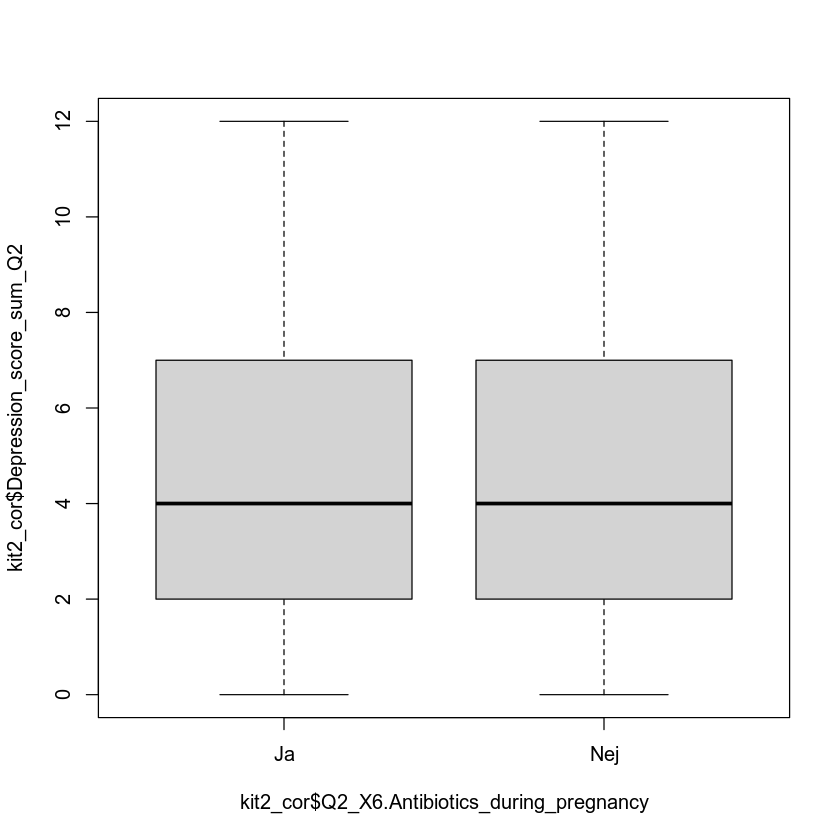

In [201]:
#Antibiotics_during_this_pregnancy - depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q2_X6.Antibiotics_during_pregnancy, na.action = NULL )

sum(is.na(kit2_cor$Q2_X6.Antibiotics_during_pregnancy))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X6..Har.du.hittills.tagit.antibiotika.vid.nägot.tillfälle.u`, na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X6.Antibiotics_during_pregnancy == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_dailyfiber == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_dailyfiber == 1)]
t = 2.2542, df = 101.19, p-value = 0.02634
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09585961 1.50164621
sample estimates:
mean of x mean of y 
 5.189873  4.391121 


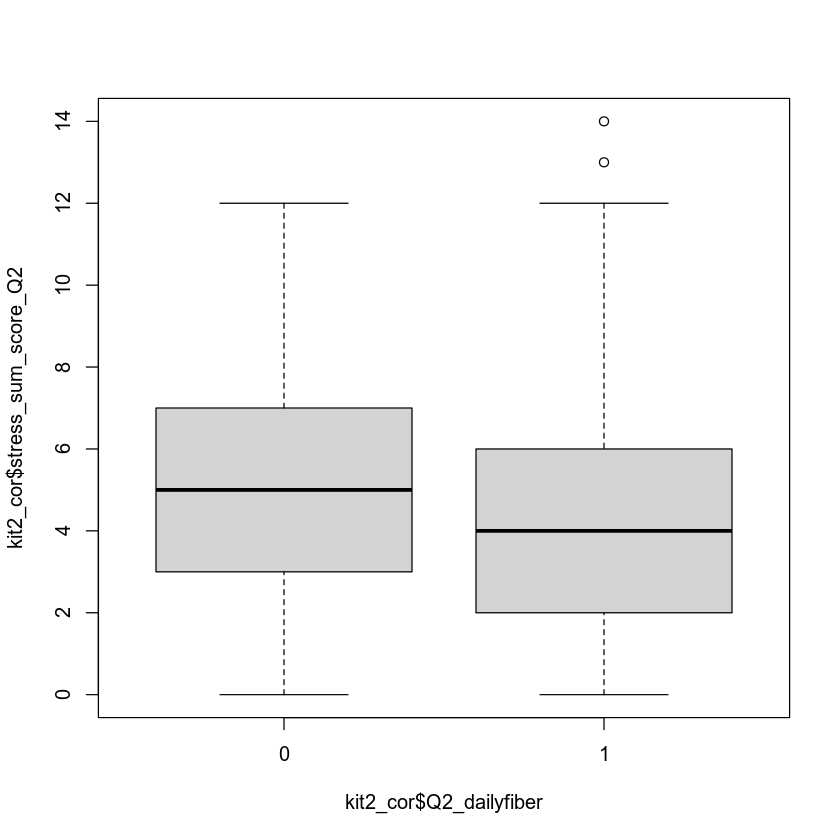

In [202]:
#Q2_dailyfiber- stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q2_dailyfiber , na.action = NULL )

sum(is.na(kit2_cor$Q2_dailyfiber))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_dailyfiber, na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_dailyfiber == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_dailyfiber == 1 )], na.action = "na.rm")



[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_dailyfiber == 0)] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_dailyfiber == 1)]
t = 1.5772, df = 94.974, p-value = 0.1181
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1675626  1.4627015
sample estimates:
mean of x mean of y 
 5.319444  4.671875 


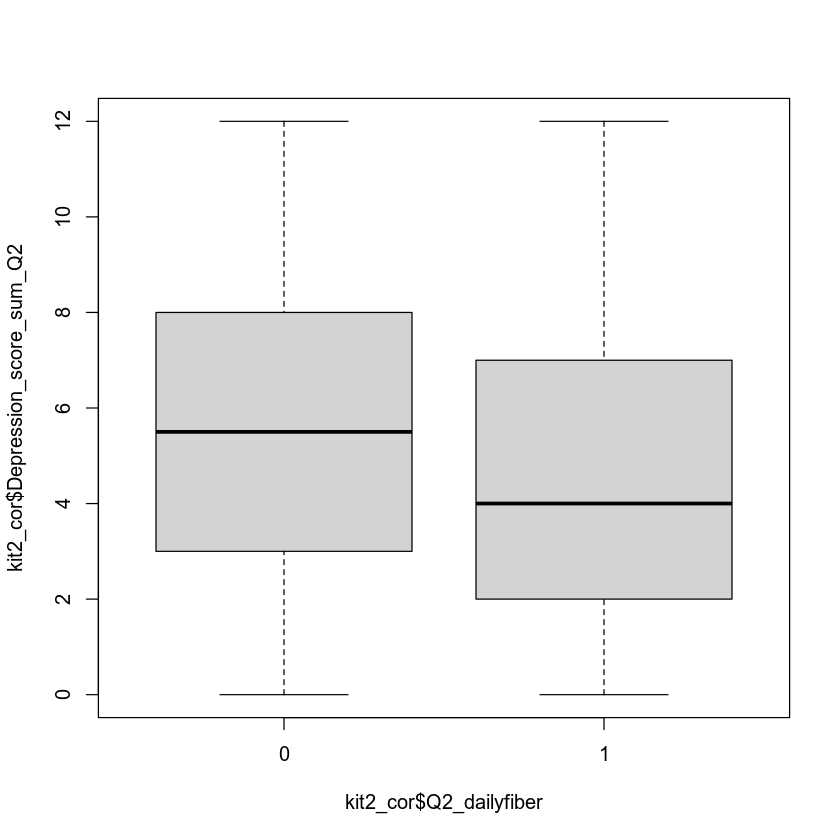

In [203]:
#Q2_dailyfiber- depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q2_dailyfiber , na.action = NULL )

sum(is.na(kit2_cor$Q2_dailyfiber))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$Q2_dailyfiber, na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_dailyfiber == 0 )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_dailyfiber == 1 )], na.action = "na.rm")



[1] 1


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Nej")]
t = -0.4364, df = 106.44, p-value = 0.6634
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7672472  0.4904051
sample estimates:
mean of x mean of y 
 4.381579  4.520000 


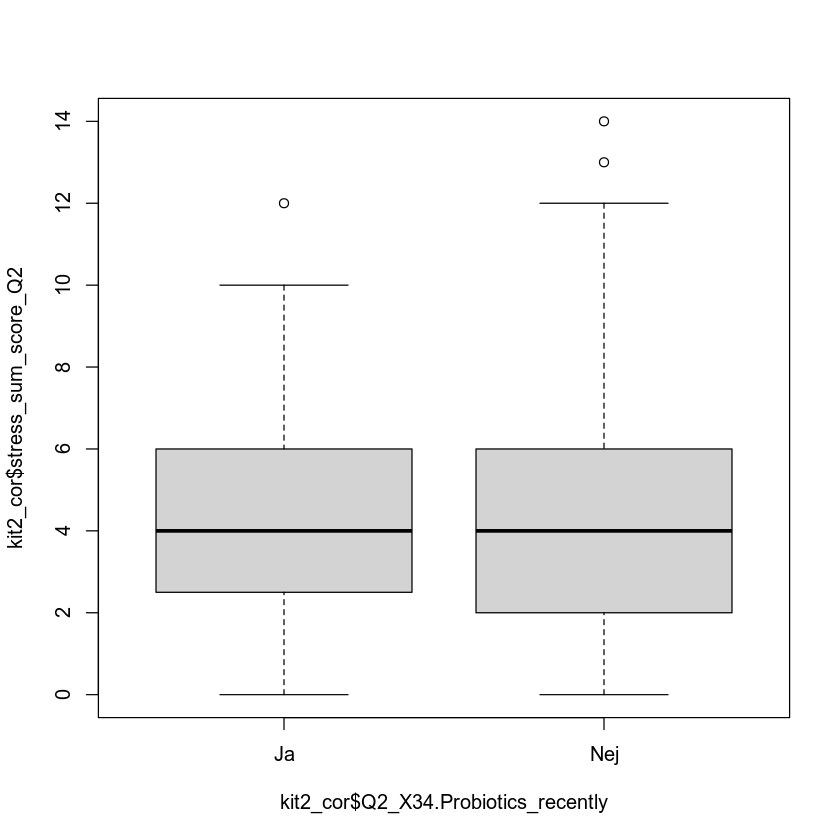

In [205]:
#probiotic- stress
boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q2_X34.Probiotics_recently, na.action = NULL )

sum(is.na(kit2_cor$Q2_X34.Probiotics_recently))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X34..Har.du.de.senaste.dagarna.ätit.produkter.med.extra.till`, na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Nej" )], na.action = "na.rm")


[1] 1


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Nej")]
t = -0.78967, df = 100.23, p-value = 0.4316
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0662447  0.4591018
sample estimates:
mean of x mean of y 
 4.500000  4.803571 


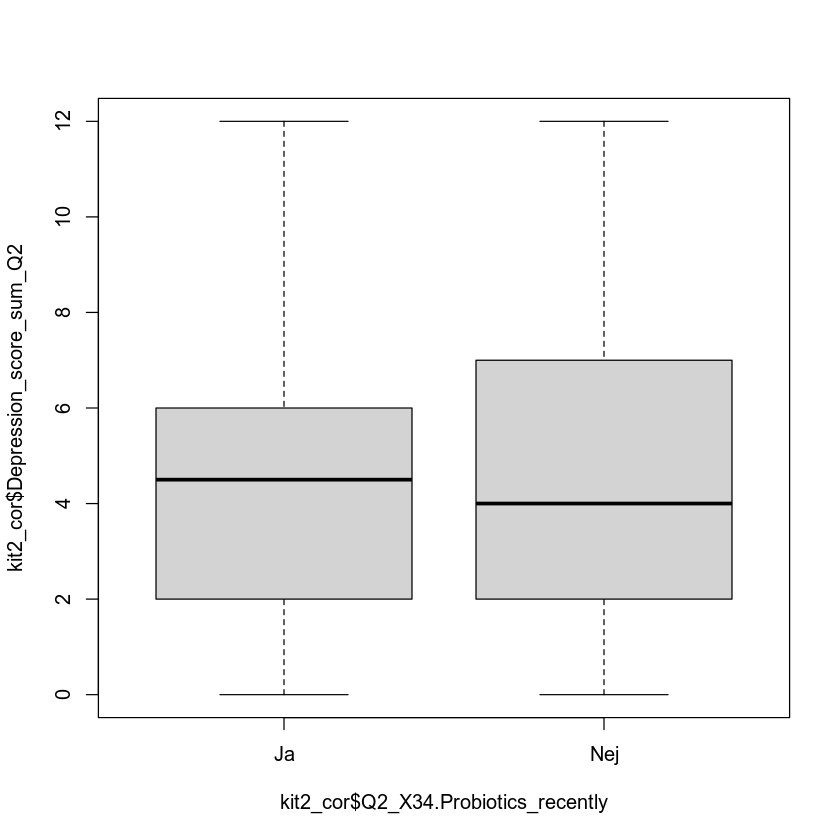

In [206]:
#probiotic- depression
boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q2_X34.Probiotics_recently, na.action = NULL )

sum(is.na(kit2_cor$Q2_X34.Probiotics_recently))

#t.test( kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X34..Har.du.de.senaste.dagarna.ätit.produkter.med.extra.till`, na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q2_X34.Probiotics_recently == "Nej" )], na.action = "na.rm")


[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Nej")]
t = -0.94906, df = 390.85, p-value = 0.3432
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7246121  0.2527939
sample estimates:
mean of x mean of y 
 4.355000  4.590909 


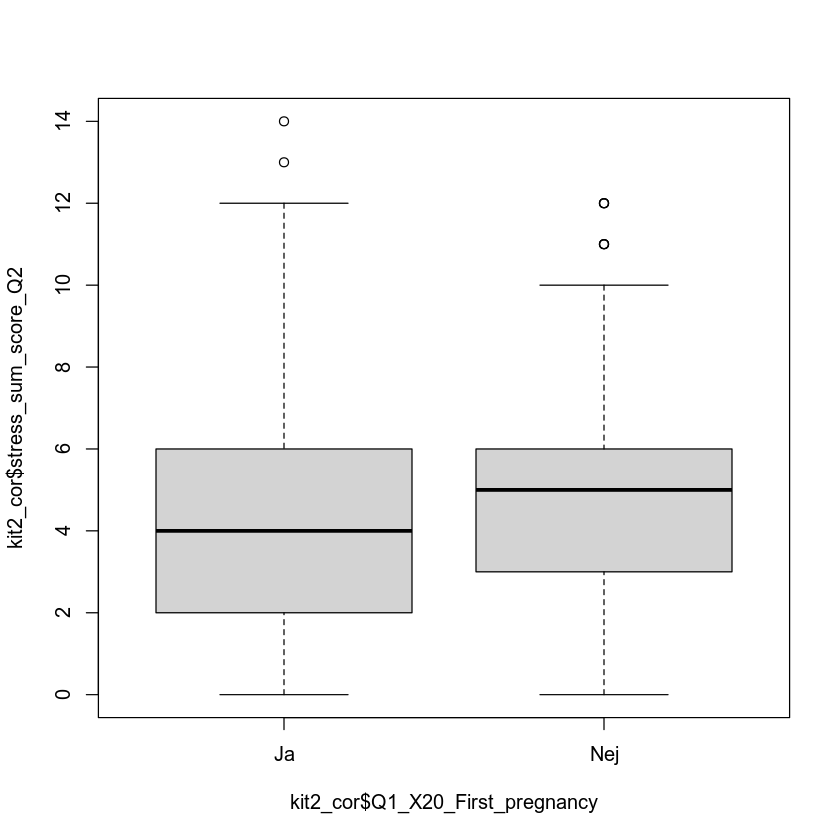

In [209]:
#first pregnancy- stress:

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q1_X20_First_pregnancy, na.action = NULL )

sum(is.na(kit2_cor$Q1_X20_First_pregnancy))

#t.test(kit2_cor$stress_sum_score_Q2 , kit2_cor$Q1_X20_First_pregnancy , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Nej")]
t = -0.50499, df = 393.36, p-value = 0.6138
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7227437  0.4273345
sample estimates:
mean of x mean of y 
 4.666667  4.814371 


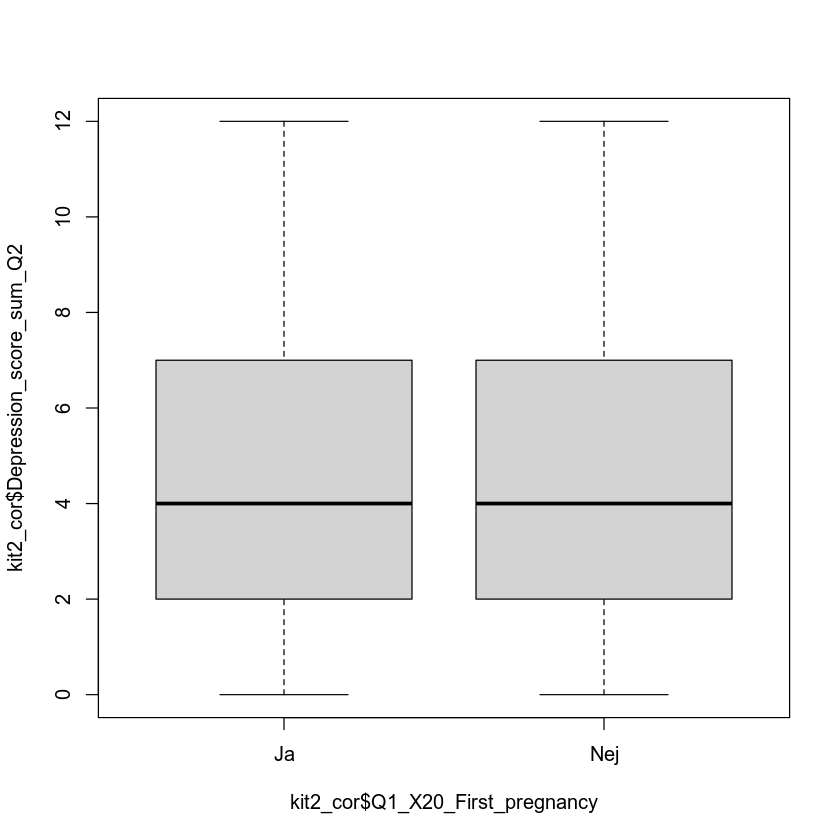

In [210]:
#first pregnancy- depression:

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q1_X20_First_pregnancy, na.action = NULL )

sum(is.na(kit2_cor$Q1_X20_First_pregnancy))

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X20_First_pregnancy == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Ja")] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Nej")]
t = 0.5209, df = 52.797, p-value = 0.6046
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6151191  1.0466488
sample estimates:
mean of x mean of y 
 4.666667  4.450902 


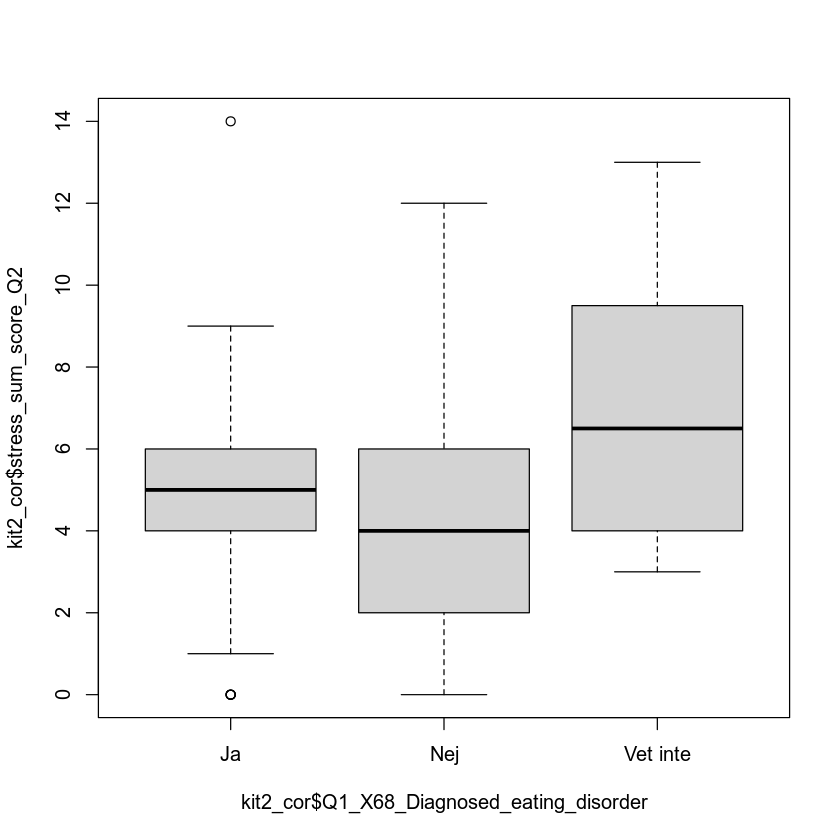

In [213]:
#eating disorder -stress
#according to q1 data 

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$Q1_X68_Diagnosed_eating_disorder, na.action = NULL )

sum(is.na(kit2_cor$Q1_X68_Diagnosed_eating_disorder))

#t.test(kit2_cor$stress_sum_score_Q2 , kit2_cor$Q1_X68_Diagnosed_eating_disorder , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Ja" )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Ja")] and kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Nej")]
t = 0.87989, df = 49.253, p-value = 0.3832
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6012675  1.5381164
sample estimates:
mean of x mean of y 
 5.186047  4.717622 


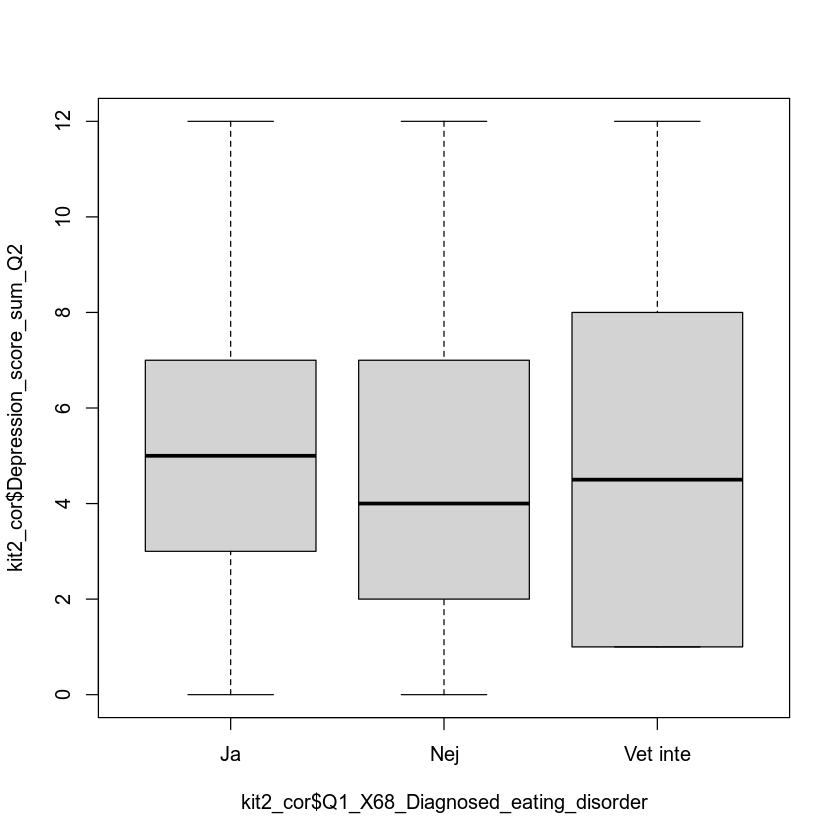

In [215]:
#eating disorder - depression
#according to q1 data 

boxplot(kit2_cor$Depression_score_sum_Q2 ~ kit2_cor$Q1_X68_Diagnosed_eating_disorder, na.action = NULL )

sum(is.na(kit2_cor$Q1_X68_Diagnosed_eating_disorder))

#t.test(kit2_cor$stress_sum_score_Q2 , kit2_cor$Q1_X68_Diagnosed_eating_disorder , na.action = "na.rm")

t.test(kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Ja" )],
       kit2_cor$Depression_score_sum_Q2[which(kit2_cor$Q1_X68_Diagnosed_eating_disorder == "Nej" )], na.action = "na.rm")

[1] 0


	Welch Two Sample t-test

data:  kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf == 0)] and kit2_cor$stress_sum_score_Q2[which(kit2_cor$Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf == 1)]
t = 0.40319, df = 1.0044, p-value = 0.7558
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -30.46257  32.48076
sample estimates:
mean of x mean of y 
 4.509091  3.500000 


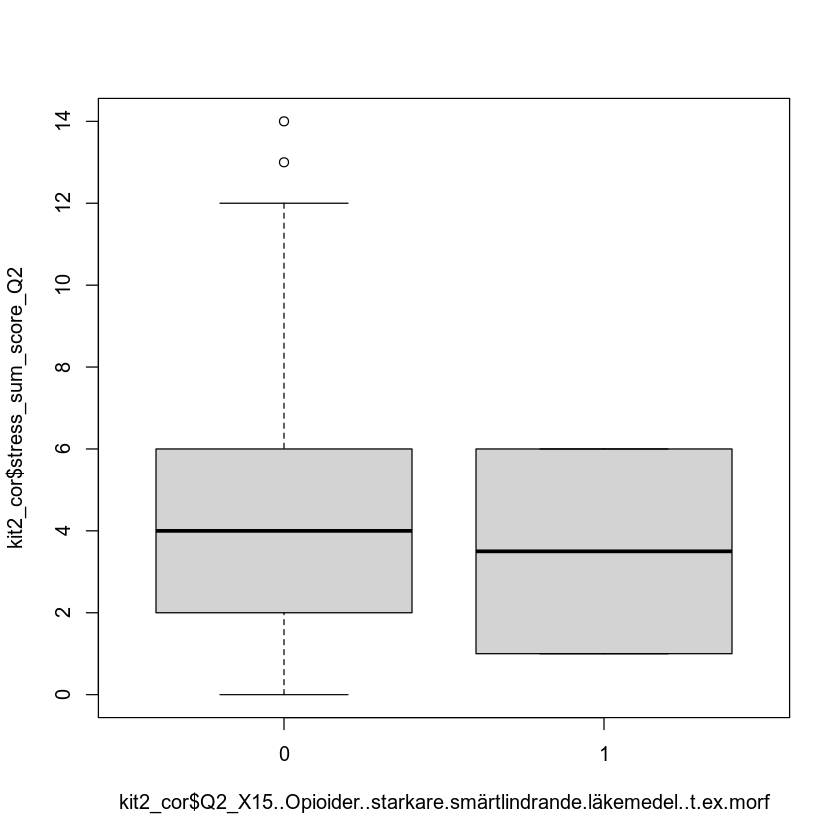

In [216]:
#opioid 

boxplot(kit2_cor$stress_sum_score_Q2 ~ kit2_cor$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`, na.action = NULL )

sum(is.na(kit2_cor$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf`))

#t.test(kit2_cor$stress_sum_score_Q2 , kit2_cor$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf` , na.action = "na.rm")

t.test(kit2_cor$stress_sum_score_Q2[which(kit2_cor$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf` == 0 )],
       kit2_cor$stress_sum_score_Q2[which(kit2_cor$`Q2_X15..Opioider..starkare.smärtlindrande.läkemedel..t.ex.morf` == 1 )], na.action = "na.rm")